In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

%matplotlib inline

# figure size in inches
rcParams['figure.figsize'] = 10,8

In [3]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

#Looking data format and types
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [4]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
df_train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

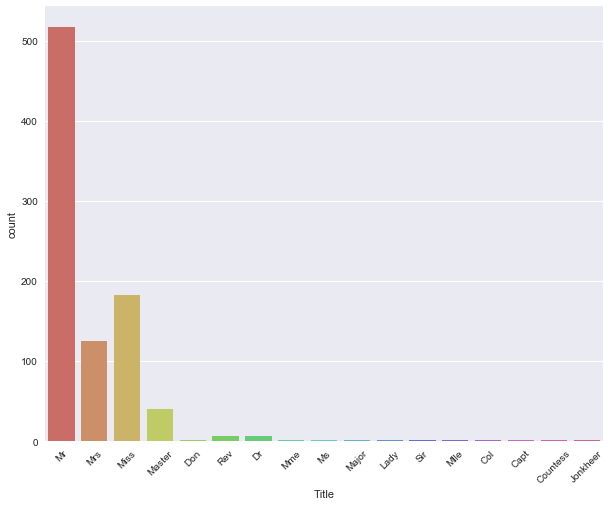

In [7]:
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xticks(rotation=45)
plt.show()

In [8]:
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [9]:
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

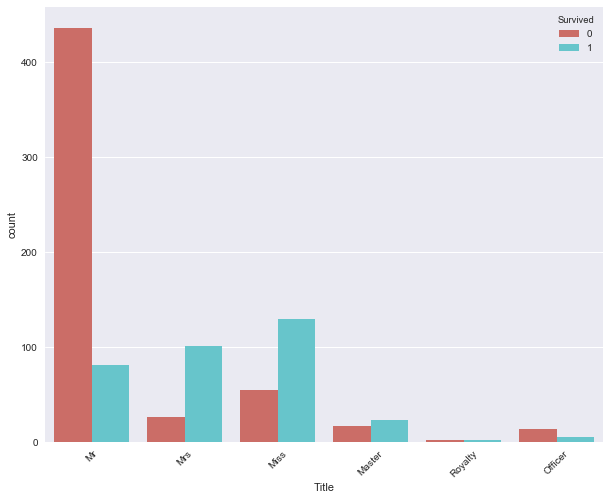

In [10]:
sns.countplot(x='Title', data=df_train, palette="hls",hue="Survived")
plt.xticks(rotation=45)
plt.show()

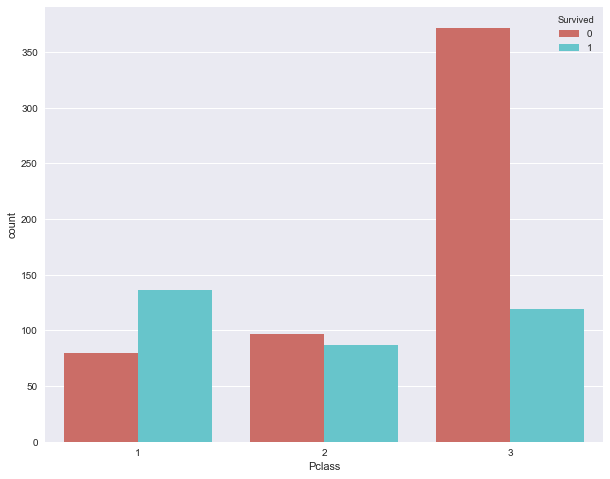

In [11]:
sns.countplot(x='Pclass', data=df_train, palette="hls",hue="Survived")

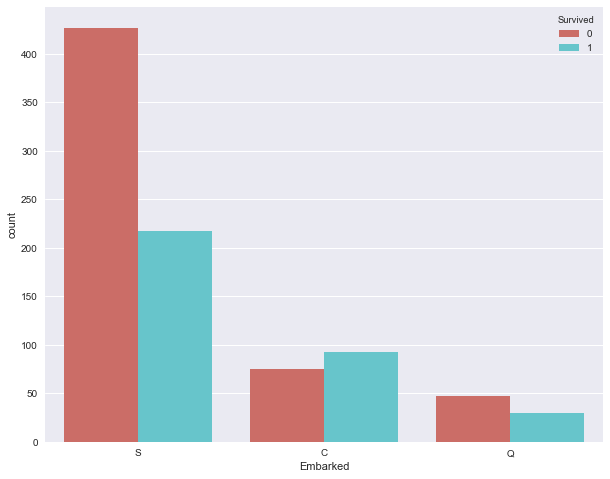

In [12]:
sns.countplot(x='Embarked', data=df_train, palette="hls",hue="Survived") #출항지

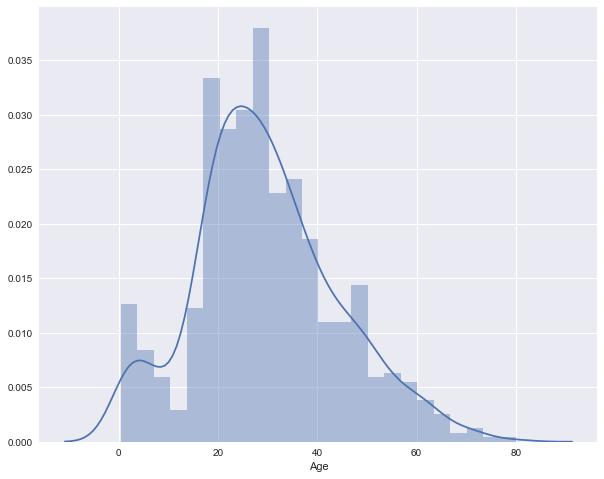

In [13]:
age_high_zero = df_train[df_train["Age"] > 0]

sns.distplot(age_high_zero["Age"], bins=24)

In [14]:
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [15]:
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')
df_test.loc[df_test.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')
print(df_train["Age"].isnull().sum())

0


my code

In [27]:
Sex_Dictionary = {
        "male":     0,
        "female":    1
}
    
# we map each title to correct category
df_train['SexNum'] = df_train.Sex.map(Sex_Dictionary)
df_test['SexNum'] = df_test.Sex.map(Sex_Dictionary)

Embarked1_Dictionary = {
        "S":     1,
        "C":     0,
        "Q":     0
}
Embarked2_Dictionary = {
        "S":     0,
        "C":     1,
        "Q":     0
}
Embarked3_Dictionary = {
        "S":     0,
        "C":     0,
        "Q":    1
}
    
# we map each title to correct category
df_train['Embarked1Num'] = df_train.Embarked.map(Embarked1_Dictionary)
df_test['Embarked1Num'] = df_test.Embarked.map(Embarked1_Dictionary)
df_train['Embarked2Num'] = df_train.Embarked.map(Embarked2_Dictionary)
df_test['Embarked2Num'] = df_test.Embarked.map(Embarked2_Dictionary)
df_train['Embarked3Num'] = df_train.Embarked.map(Embarked3_Dictionary)
df_test['Embarked3Num'] = df_test.Embarked.map(Embarked3_Dictionary)

df_train['AgeNorm'] = (df_train['Age'] - df_train['Age'].min()) / (df_train['Age'].max() - df_train['Age'].min())
df_test['AgeNorm'] = (df_test['Age'] - df_train['Age'].min()) / (df_train['Age'].max() - df_train['Age'].min())
df_train['FareNorm'] = (df_train['Fare'] - df_train['Fare'].min()) / (df_train['Fare'].max() - df_train['Fare'].min())
df_test['FareNorm'] = (df_test['Fare'] - df_train['Fare'].min()) / (df_train['Fare'].max() - df_train['Fare'].min())
df_train['SibSpNorm'] = (df_train['SibSp'] - df_train['SibSp'].min()) / (df_train['SibSp'].max() - df_train['SibSp'].min())
df_test['SibSpNorm'] = (df_test['SibSp'] - df_train['SibSp'].min()) / (df_train['SibSp'].max() - df_train['SibSp'].min())
df_train['PclassNorm'] = (df_train['Pclass'] - df_train['Pclass'].min()) / (df_train['Pclass'].max() - df_train['Pclass'].min())
df_test['PclassNorm'] = (df_test['Pclass'] - df_train['Pclass'].min()) / (df_train['Pclass'].max() - df_train['Pclass'].min())
df_train['ParchNorm'] = (df_train['Parch'] - df_train['Parch'].min()) / (df_train['Parch'].max() - df_train['Parch'].min())
df_test['ParchNorm'] = (df_test['Parch'] - df_train['Parch'].min()) / (df_train['Parch'].max() - df_train['Parch'].min())
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    ...     Title SexNum Embarked1Num  \
0      0         A/5 21171   7.2500    ...        Mr      0          1.0   
1      0          PC 17599  71.2833    ...       Mrs      1          0.0   
2      0  STON/O2. 3101282   7.9250    ...      Miss      1          1.0   
3      0        

In [55]:
import tensorflow as tf

x_data = df_train[["PclassNorm", "SexNum", "AgeNorm", "SibSpNorm", "ParchNorm", "FareNorm"]].as_matrix()#, "Embarked1Num", "Embarked2Num", "Embarked3Num"]].as_matrix()
y_data = df_train["Survived"].as_matrix()
y_data = y_data.reshape(-1, 1)

x_datatest = df_test[["PclassNorm", "SexNum", "AgeNorm", "SibSpNorm", "ParchNorm", "FareNorm"]].as_matrix()#, "Embarked1Num", "Embarked2Num", "Embarked3Num"]].as_matrix()

#x_data = [[1,2],[2,3],[3,1], [4,3], [5,3], [6,2]]
#y_data = [[0], [0], [0], [1], [1], [1]]#fail 0 pass 1
print(x_data[1])
#print(y_data)


[ 0.          1.          0.4722292   0.125       0.          0.13913574]


In [73]:

column_X = 6
hidden = 10
Bhidden = 15
Chidden = 20
nb_classes = 1 #답의 가짓수

X = tf.placeholder(tf.float64, [None,column_X], name="X")
Y = tf.placeholder(tf.float64, [None,1], name="Y")


W1 = tf.Variable(tf.random_normal([column_X, hidden], name='weight1', dtype=tf.float64, stddev=0.01), dtype=tf.float64)
b1 = tf.Variable(tf.random_normal([hidden], name='bias1', dtype=tf.float64), dtype=tf.float64)
W2 = tf.Variable(tf.random_normal([hidden, nb_classes], name='weight2', dtype=tf.float64, stddev=0.01), dtype=tf.float64)
b2 = tf.Variable(tf.random_normal([nb_classes], name='bias2', dtype=tf.float64), dtype=tf.float64)

hypo1 = tf.nn.relu(tf.matmul(X, W1) + b1)
hypothesis = tf.sigmoid(tf.matmul(hypo1, W2) + b2)
Acost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*(tf.log(1-hypothesis)))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(Acost)

Aprediction = tf.cast(hypothesis > 0.5, dtype=tf.int32)


BW1 = tf.Variable(tf.random_normal([column_X, Bhidden], name='Bweight1', dtype=tf.float64, stddev=0.01), dtype=tf.float64)
Bb1 = tf.Variable(tf.random_normal([Bhidden], name='Bbias1', dtype=tf.float64), dtype=tf.float64)
BW2 = tf.Variable(tf.random_normal([Bhidden, nb_classes], name='Bweight2', dtype=tf.float64, stddev=0.01), dtype=tf.float64)
Bb2 = tf.Variable(tf.random_normal([nb_classes], name='Bbias2', dtype=tf.float64), dtype=tf.float64)

Bhypo1 = tf.nn.relu(tf.matmul(X, BW1) + Bb1)
Bhypothesis = tf.sigmoid(tf.matmul(Bhypo1, BW2) + Bb2)
Bcost = -tf.reduce_mean(Y*tf.log(Bhypothesis) + (1-Y)*(tf.log(1-Bhypothesis)))
Boptimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(Bcost)

Bprediction = tf.cast(Bhypothesis > 0.5, dtype=tf.int32)



CW1 = tf.Variable(tf.random_normal([column_X, Chidden], name='Cweight1', dtype=tf.float64), dtype=tf.float64)
Cb1 = tf.Variable(tf.random_normal([Chidden], name='Cbias1', dtype=tf.float64), dtype=tf.float64)
CW2 = tf.Variable(tf.random_normal([Chidden, nb_classes], name='Cweight2', dtype=tf.float64), dtype=tf.float64)
Cb2 = tf.Variable(tf.random_normal([nb_classes], name='Cbias2', dtype=tf.float64), dtype=tf.float64)

Chypo1 = tf.nn.relu(tf.matmul(X, CW1) + Cb1)
Chypothesis = tf.sigmoid(tf.matmul(Chypo1, CW2) + Cb2)
Ccost = -tf.reduce_mean(Y*tf.log(Chypothesis) + (1-Y)*(tf.log(1-Chypothesis)))
Coptimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(Ccost)

Cprediction = tf.cast(Chypothesis > 0.5, dtype=tf.int32)

cost = Acost + Bcost + Ccost
#prediction = tf.cast((Aprediction + Bprediction + Cprediction > 1), dtype=tf.int32)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(100000):
    Acost_val, Bcost_val, Ccost_val, _, _, _ = sess.run([Acost, Bcost, Ccost, optimizer, Boptimizer, Coptimizer], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", Acost_val, "     ", Bcost_val, "     ", Ccost_val)
    
h, a, b, c = sess.run([hypothesis, Aprediction, Bprediction, Cprediction], feed_dict={X: x_datatest})

Aoutput = pd.DataFrame(data=a, columns=['a'])
Boutput = pd.DataFrame(data=b, columns=['a'])
Coutput = pd.DataFrame(data=c, columns=['a'])

df_add = Aoutput.add(Boutput)
df_add = df_add.add(Coutput)

result_Dictionary = {
        0:     0,
        1:     0,
        2:     1,
        3:     1
}
    
# we map each title to correct category
output = df_add.a.map(result_Dictionary)

print(output)
df_test["Survived"] = output
result = df_test[["PassengerId", "Survived"]]
#print(result)
result.to_csv("a.csv", sep=',', index=False)
print("done")

0 Cost:  0.669496414847       0.669102427102       3.02384306364
1 Cost:  0.66807358798       0.669077000857       3.02160864404
2 Cost:  0.666861375454       0.6690517678       3.01937443974
3 Cost:  0.665792627597       0.669026726495       3.0171405914
4 Cost:  0.664863122841       0.669001875519       3.01490711024
5 Cost:  0.664047998549       0.668977213458       3.01267385527
6 Cost:  0.663284589347       0.668952738908       3.01044083202
7 Cost:  0.662470274046       0.668928450473       3.00820803588
8 Cost:  0.661492863499       0.668904346772       3.00597547401
9 Cost:  0.660285055971       0.668880426428       3.00374315266
10 Cost:  0.658971746192       0.668856688077       3.00151107088
11 Cost:  0.657538135829       0.668833130366       2.99927923506
12 Cost:  0.655802124047       0.668809751948       2.99704707762
13 Cost:  0.65380221054       0.668786551488       2.99481513231
14 Cost:  0.651555237561       0.668763527659       2.99258341821
15 Cost:  0.649100640579 

174 Cost:  0.428299274423       0.666652120337       2.64264087589
175 Cost:  0.428237939268       0.666645464358       2.64049432278
176 Cost:  0.428178932798       0.666638859691       2.63834823177
177 Cost:  0.428122862797       0.666632305939       2.63620260583
178 Cost:  0.428067849109       0.666625802709       2.63405744782
179 Cost:  0.428013476223       0.666619349612       2.6319127604
180 Cost:  0.427960040456       0.666612946259       2.62976854617
181 Cost:  0.42790787325       0.666606592268       2.62762480758
182 Cost:  0.427856276361       0.666600287256       2.62548155075
183 Cost:  0.427807761666       0.666594030845       2.62333900513
184 Cost:  0.427760332107       0.666587822661       2.62119701314
185 Cost:  0.427713710973       0.666581662329       2.61905552896
186 Cost:  0.427668752055       0.666575549481       2.6169145522
187 Cost:  0.427627287974       0.666569483749       2.61477394369
188 Cost:  0.427585530015       0.66656346477       2.6126337884


349 Cost:  0.416025373906       0.666010492266       2.27675101156
350 Cost:  0.415954836666       0.666008755183       2.27472706081
351 Cost:  0.415887257278       0.666007031148       2.27270398008
352 Cost:  0.415828128828       0.66600532006       2.2706814858
353 Cost:  0.415767355434       0.666003621815       2.26865973249
354 Cost:  0.415704212307       0.666001936315       2.26663872681
355 Cost:  0.41564054653       0.666000263457       2.2646184749
356 Cost:  0.41557868727       0.665998603144       2.26259898227
357 Cost:  0.415518445988       0.665996955276       2.26058033215
358 Cost:  0.415459434035       0.665995319756       2.25856242425
359 Cost:  0.415400649449       0.665993696487       2.25654543933
360 Cost:  0.415340719155       0.665992085372       2.25452935377
361 Cost:  0.415281572663       0.665990486316       2.25251434452
362 Cost:  0.415222483524       0.665988899225       2.25050017168
363 Cost:  0.415164311155       0.665987324004       2.24848702185


526 Cost:  0.406866742218       0.665837857905       1.93322558481
527 Cost:  0.406845193599       0.665837369017       1.93138136382
528 Cost:  0.406825290136       0.665836883343       1.9295385906
529 Cost:  0.406805672027       0.665836400856       1.92769700983
530 Cost:  0.40678590095       0.665835921531       1.92585661909
531 Cost:  0.406765290452       0.665835445344       1.92401713247
532 Cost:  0.406745589494       0.665834972269       1.92217905951
533 Cost:  0.406726215046       0.665834502282       1.92034219059
534 Cost:  0.406707029183       0.665834035358       1.91850650676
535 Cost:  0.40668664492       0.665833571474       1.91667207828
536 Cost:  0.406668008125       0.665833110604       1.91483890229
537 Cost:  0.406649067167       0.665832652726       1.91300686718
538 Cost:  0.406630011889       0.665832197816       1.91117554795
539 Cost:  0.406610978657       0.66583174585       1.9093451245
540 Cost:  0.406592087454       0.665831296804       1.90751579859


693 Cost:  0.402068432754       0.665786317287       1.64334238813
694 Cost:  0.402042361732       0.665786126555       1.64172969131
695 Cost:  0.402015044509       0.665785936673       1.6401186339
696 Cost:  0.401989130431       0.665785747635       1.63850917581
697 Cost:  0.401962545412       0.665785559435       1.63690148069
698 Cost:  0.401937567776       0.665785372066       1.63529535723
699 Cost:  0.40191254965       0.665785185521       1.63369065127
700 Cost:  0.401887743772       0.665784999794       1.63208749488
701 Cost:  0.401861926386       0.665784814878       1.63048589559
702 Cost:  0.401839171016       0.665784630767       1.62888582384
703 Cost:  0.401815820666       0.665784447454       1.62728727803
704 Cost:  0.401792060726       0.665784264934       1.62569008748
705 Cost:  0.401769166743       0.665784083199       1.62409427665
706 Cost:  0.401745619002       0.665783902244       1.62250036693
707 Cost:  0.40172199152       0.665783722062       1.6209106247

876 Cost:  0.399357104361       0.665760670982       1.37589910249
877 Cost:  0.399350648958       0.66576056257       1.37458908547
878 Cost:  0.399343368791       0.665760454357       1.37328065467
879 Cost:  0.399338027084       0.66576034634       1.37197389513
880 Cost:  0.399332224253       0.665760238519       1.37066876399
881 Cost:  0.399324765745       0.665760130891       1.36936518516
882 Cost:  0.399320746952       0.665760023456       1.36806331845
883 Cost:  0.399313981298       0.665759916211       1.36676356491
884 Cost:  0.39930709056       0.665759809156       1.36546552738
885 Cost:  0.399301505635       0.665759702288       1.36416919629
886 Cost:  0.399296462689       0.665759595607       1.36287457545
887 Cost:  0.399291165906       0.66575948911       1.36158165961
888 Cost:  0.399282771519       0.665759382796       1.36029046142
889 Cost:  0.399278061156       0.665759276665       1.35900096738
890 Cost:  0.399271701922       0.665759170714       1.35771317673

1059 Cost:  0.388805723316       0.665742993703       1.16405926245
1060 Cost:  0.388768709528       0.665742904536       1.16305360983
1061 Cost:  0.388732356487       0.665742815416       1.16204963083
1062 Cost:  0.388701896993       0.665742726343       1.16104732222
1063 Cost:  0.388664591745       0.665742637315       1.16004668691
1064 Cost:  0.388624740176       0.665742548333       1.15904772409
1065 Cost:  0.388590504279       0.665742459397       1.15805042378
1066 Cost:  0.388556299724       0.665742370505       1.15705473864
1067 Cost:  0.388521544331       0.665742281657       1.15606082955
1068 Cost:  0.388487434758       0.665742192854       1.15506858945
1069 Cost:  0.388455096101       0.665742104095       1.1540779971
1070 Cost:  0.388425695933       0.665742015379       1.153089039
1071 Cost:  0.388393661148       0.665741926707       1.15210178769
1072 Cost:  0.388361054892       0.665741838077       1.15111623729
1073 Cost:  0.38833110006       0.66574174949      

1245 Cost:  0.384311274903       0.665726933406       1.0038075146
1246 Cost:  0.384260645906       0.665726848831       1.00308625058
1247 Cost:  0.384216963543       0.665726764268       1.00236649892
1248 Cost:  0.384202991979       0.665726679715       1.00164818099
1249 Cost:  0.384207268287       0.665726595173       1.00093133429
1250 Cost:  0.384208077296       0.665726510641       1.00021596242
1251 Cost:  0.384210376511       0.66572642612       0.999502062935
1252 Cost:  0.384194211495       0.66572634161       0.998789633458
1253 Cost:  0.384181671467       0.66572625711       0.998078646968
1254 Cost:  0.384158002839       0.66572617262       0.997369175062
1255 Cost:  0.384134505333       0.665726088141       0.996661181694
1256 Cost:  0.384117054897       0.665726003672       0.995954652071
1257 Cost:  0.384093211958       0.665725919213       0.995249615706
1258 Cost:  0.384069213336       0.665725834764       0.994546091367
1259 Cost:  0.38404735225       0.66572575032

1430 Cost:  0.382171012496       0.66571140886       0.893730514612
1431 Cost:  0.38214923583       0.665711325355       0.893250427796
1432 Cost:  0.382116818272       0.665711241852       0.892771436229
1433 Cost:  0.382101477426       0.665711158351       0.892293537501
1434 Cost:  0.382106989743       0.665711074853       0.891816729166
1435 Cost:  0.382116559315       0.665710991357       0.891341008812
1436 Cost:  0.382095705255       0.665710907864       0.890866373958
1437 Cost:  0.382080763709       0.665710824373       0.890392822204
1438 Cost:  0.382084273845       0.665710740884       0.889920351332
1439 Cost:  0.382090775157       0.665710657398       0.889448959031
1440 Cost:  0.382093816999       0.665710573914       0.888978643601
1441 Cost:  0.382075447755       0.665710490432       0.888509402366
1442 Cost:  0.3820486297       0.665710406953       0.888041232936
1443 Cost:  0.382054237144       0.665710323476       0.887574133059
1444 Cost:  0.382063757465       0.665

1593 Cost:  0.380889113405       0.66569781832       0.828457740094
1594 Cost:  0.380842074944       0.665697735014       0.828128382053
1595 Cost:  0.380803808766       0.665697651709       0.827799776487
1596 Cost:  0.380816171992       0.665697568403       0.827471921543
1597 Cost:  0.380833796819       0.665697485098       0.827144815368
1598 Cost:  0.380806239359       0.665697401794       0.826818456109
1599 Cost:  0.380778718896       0.66569731849       0.82649284258
1600 Cost:  0.38076976177       0.665697235185       0.826167982214
1601 Cost:  0.380775910768       0.665697151882       0.825843864084
1602 Cost:  0.380768172209       0.665697068578       0.825520486255
1603 Cost:  0.380757509897       0.665696985275       0.825197846802
1604 Cost:  0.380748047083       0.665696901972       0.82487594381
1605 Cost:  0.38074001413       0.665696818669       0.824554775372
1606 Cost:  0.380748922907       0.665696735367       0.824234339587
1607 Cost:  0.38075300895       0.665696

1751 Cost:  0.378737047191       0.665684655733       0.784666634685
1752 Cost:  0.378702763557       0.665684572401       0.784434765517
1753 Cost:  0.378694866834       0.665684489067       0.784203393154
1754 Cost:  0.378715305733       0.665684405734       0.783972515493
1755 Cost:  0.378734549187       0.665684322399       0.783742130489
1756 Cost:  0.378729064254       0.665684239065       0.783512270319
1757 Cost:  0.378674505818       0.665684155729       0.783282917699
1758 Cost:  0.378620594004       0.665684072393       0.783054057769
1759 Cost:  0.378618441628       0.665683989056       0.782825684589
1760 Cost:  0.378641255981       0.665683905719       0.782597797624
1761 Cost:  0.378659860338       0.665683822381       0.78237039473
1762 Cost:  0.378629473542       0.665683739043       0.782143473835
1763 Cost:  0.378588424023       0.665683655704       0.781917032922
1764 Cost:  0.378549451772       0.665683572364       0.78169107003
1765 Cost:  0.378547351663       0.6

1936 Cost:  0.376907529678       0.665669225544       0.748689879061
1937 Cost:  0.376914886362       0.665669142043       0.748525806427
1938 Cost:  0.376857972133       0.665669058541       0.748361980153
1939 Cost:  0.37682650686       0.665668975037       0.748198408724
1940 Cost:  0.37683481374       0.665668891532       0.748035091507
1941 Cost:  0.376832320811       0.665668808026       0.74787202784
1942 Cost:  0.376809664684       0.665668724519       0.747709217037
1943 Cost:  0.37679007644       0.665668641011       0.747546658386
1944 Cost:  0.376788492306       0.665668557501       0.747384351157
1945 Cost:  0.376798636191       0.66566847399       0.747222294601
1946 Cost:  0.376788444378       0.665668390478       0.747060487954
1947 Cost:  0.376760203473       0.665668306965       0.746898930434
1948 Cost:  0.376752088351       0.66566822345       0.746737621252
1949 Cost:  0.376758535465       0.665668139934       0.746576559603
1950 Cost:  0.376754903451       0.66566

2108 Cost:  0.375336998612       0.66565484292       0.723632394372
2109 Cost:  0.3753379109       0.665654759165       0.723501644386
2110 Cost:  0.375313057347       0.665654675409       0.723370996815
2111 Cost:  0.375288156162       0.66565459165       0.723240477625
2112 Cost:  0.37529470197       0.665654507891       0.723110086818
2113 Cost:  0.375318828537       0.665654424129       0.722979824342
2114 Cost:  0.375303318589       0.665654340366       0.722849690105
2115 Cost:  0.375281979042       0.665654256601       0.72271968397
2116 Cost:  0.375271737562       0.665654172834       0.722589766543
2117 Cost:  0.375287768137       0.665654089065       0.7224599683
2118 Cost:  0.375288817658       0.665654005295       0.722330293613
2119 Cost:  0.375256622988       0.665653921523       0.722200742617
2120 Cost:  0.375225512406       0.665653837749       0.722071315382
2121 Cost:  0.375229367202       0.665653753974       0.721942011921
2122 Cost:  0.37523160828       0.66565367

2261 Cost:  0.37451903893       0.66564200675       0.70485934883
2262 Cost:  0.374523574442       0.665641922699       0.704743540857
2263 Cost:  0.37449877326       0.665641838646       0.704627820408
2264 Cost:  0.374453913797       0.66564175459       0.704512170685
2265 Cost:  0.374433054058       0.665641670532       0.704396591775
2266 Cost:  0.374466695034       0.665641586473       0.704281042714
2267 Cost:  0.374503000546       0.665641502411       0.704165551754
2268 Cost:  0.374496008177       0.665641418346       0.704050127247
2269 Cost:  0.374451609405       0.66564133428       0.703934769605
2270 Cost:  0.374412662731       0.665641250211       0.703819479175
2271 Cost:  0.374419787537       0.665641166141       0.703704256244
2272 Cost:  0.374435931733       0.665641082068       0.703589101045
2273 Cost:  0.374456897152       0.665640997993       0.703474013765
2274 Cost:  0.374459163012       0.665640913915       0.703358994545
2275 Cost:  0.374443064725       0.66564

2436 Cost:  0.373856892222       0.665627262549       0.685519814719
2437 Cost:  0.37386133544       0.665627178078       0.685414124824
2438 Cost:  0.373857936534       0.665627093605       0.685308479383
2439 Cost:  0.373841051511       0.665627009129       0.685202878123
2440 Cost:  0.373819334647       0.665626924651       0.685097320789
2441 Cost:  0.373815828656       0.66562684017       0.684991807143
2442 Cost:  0.373829120161       0.665626755686       0.684886336959
2443 Cost:  0.373837923291       0.6656266712       0.684780910022
2444 Cost:  0.373837842594       0.665626586711       0.684675526131
2445 Cost:  0.373821902242       0.665626502219       0.684570185093
2446 Cost:  0.373798851282       0.665626417725       0.684464886727
2447 Cost:  0.373796061496       0.665626333228       0.684359630856
2448 Cost:  0.373798863789       0.665626248728       0.684254417315
2449 Cost:  0.373814307392       0.665626164226       0.684149245945
2450 Cost:  0.373828149474       0.665

2621 Cost:  0.373321893223       0.665611587708       0.666599959926
2622 Cost:  0.373304515538       0.665611502702       0.666500958146
2623 Cost:  0.373314428626       0.665611417692       0.666401991123
2624 Cost:  0.373322914622       0.66561133268       0.666303058413
2625 Cost:  0.373342891482       0.665611247664       0.666204159615
2626 Cost:  0.373354993028       0.665611162646       0.666105294361
2627 Cost:  0.373352654663       0.665611077624       0.666006462323
2628 Cost:  0.373319860991       0.665610992599       0.665907663196
2629 Cost:  0.373296116032       0.665610907571       0.665808896709
2630 Cost:  0.373304420926       0.66561082254       0.665710162611
2631 Cost:  0.373344911519       0.665610737505       0.665611415078
2632 Cost:  0.373380404871       0.665610652467       0.665512681046
2633 Cost:  0.37338072927       0.665610567426       0.665413973474
2634 Cost:  0.373335666697       0.665610482382       0.665315292709
2635 Cost:  0.373300123672       0.66

2778 Cost:  0.373048050615       0.665598201378       0.651401334173
2779 Cost:  0.373048090887       0.665598115843       0.651306676607
2780 Cost:  0.373039801886       0.665598030304       0.651212036792
2781 Cost:  0.373028056173       0.665597944761       0.651117391938
2782 Cost:  0.373026954607       0.665597859215       0.651022770587
2783 Cost:  0.373024997766       0.665597773665       0.650928173216
2784 Cost:  0.373024203598       0.665597688112       0.650833600253
2785 Cost:  0.373027839989       0.665597602555       0.650739052082
2786 Cost:  0.373026172136       0.665597516995       0.65064452905
2787 Cost:  0.373021066149       0.66559743143       0.650550031468
2788 Cost:  0.373017473244       0.665597345863       0.650455558863
2789 Cost:  0.373020529996       0.665597260291       0.650361109522
2790 Cost:  0.373017894713       0.665597174716       0.650266686094
2791 Cost:  0.373013153066       0.665597089138       0.650172301528
2792 Cost:  0.373013054547       0.6

2949 Cost:  0.372971302707       0.665583520323       0.63561545415
2950 Cost:  0.372935350227       0.665583434133       0.635525270292
2951 Cost:  0.372868230494       0.665583347938       0.635435108485
2952 Cost:  0.372841423304       0.665583261739       0.635344969407
2953 Cost:  0.372871452626       0.665583175537       0.635254853669
2954 Cost:  0.372927053002       0.66558308933       0.635164761823
2955 Cost:  0.372941414993       0.665583003119       0.635074694366
2956 Cost:  0.372916727682       0.665582916904       0.634984651747
2957 Cost:  0.372863173848       0.665582830685       0.634894634371
2958 Cost:  0.372833361089       0.665582744462       0.634804642602
2959 Cost:  0.37284859204       0.665582658235       0.634714676771
2960 Cost:  0.372875218686       0.665582572003       0.634624737175
2961 Cost:  0.37288004897       0.665582485768       0.634534824083
2962 Cost:  0.372858349031       0.665582399528       0.634444937738
2963 Cost:  0.37283785482       0.6655

3134 Cost:  0.371957310532       0.665567502793       0.61945104514
3135 Cost:  0.371978717732       0.665567415801       0.619366267418
3136 Cost:  0.371952040612       0.665567328804       0.619281518774
3137 Cost:  0.371903918345       0.665567241802       0.619196788056
3138 Cost:  0.371892948404       0.665567154795       0.619112064834
3139 Cost:  0.371904766579       0.665567067784       0.619027368249
3140 Cost:  0.371917149903       0.665566980769       0.618942698648
3141 Cost:  0.371923628126       0.665566893749       0.618858056344
3142 Cost:  0.371912014482       0.665566806724       0.61877344162
3143 Cost:  0.371887121399       0.665566719694       0.618688855359
3144 Cost:  0.371876512311       0.66556663266       0.618604298894
3145 Cost:  0.371885991562       0.665566545621       0.618519770899
3146 Cost:  0.371895965977       0.665566458578       0.618435271546
3147 Cost:  0.37190177672       0.66556637153       0.618350800989
3148 Cost:  0.371892816893       0.6655

3311 Cost:  0.371624352766       0.665552030823       0.604924406789
3312 Cost:  0.371631723622       0.665551942971       0.604845230962
3313 Cost:  0.37162977053       0.665551855114       0.604766086382
3314 Cost:  0.371619200728       0.665551767252       0.604686973029
3315 Cost:  0.371608727786       0.665551679385       0.604607890885
3316 Cost:  0.371611531838       0.665551591513       0.604528839934
3317 Cost:  0.371624885944       0.665551503635       0.604449814629
3318 Cost:  0.371636757639       0.665551415753       0.604370816058
3319 Cost:  0.371635689996       0.665551327865       0.60429184734
3320 Cost:  0.371625559219       0.665551239972       0.604212908977
3321 Cost:  0.371608916698       0.665551152074       0.604134001043
3322 Cost:  0.371604172872       0.665551064171       0.604055123605
3323 Cost:  0.371599474639       0.665550976263       0.603976276723
3324 Cost:  0.371600353294       0.665550888349       0.603897460454
3325 Cost:  0.371597199216       0.6

3492 Cost:  0.371519491471       0.665536043513       0.591133267636
3493 Cost:  0.37151330464       0.665535954688       0.591059669536
3494 Cost:  0.371479600297       0.665535865858       0.590986098063
3495 Cost:  0.371458958613       0.665535777022       0.590912554168
3496 Cost:  0.371454069247       0.66553568818       0.590839038654
3497 Cost:  0.371466923589       0.665535599332       0.59076555182
3498 Cost:  0.371490953921       0.665535510479       0.590692093936
3499 Cost:  0.371532528752       0.66553542162       0.590618665244
3500 Cost:  0.371555224037       0.665535332756       0.590545265964
3501 Cost:  0.37152692373       0.665535243886       0.590471896292
3502 Cost:  0.371478727231       0.66553515501       0.590398556407
3503 Cost:  0.371449506547       0.665535066129       0.590325246468
3504 Cost:  0.371463541473       0.665534977241       0.590251966619
3505 Cost:  0.371495530316       0.665534888349       0.590178716991
3506 Cost:  0.371517122322       0.66553

3677 Cost:  0.371339260812       0.66551951177       0.578001997175
3678 Cost:  0.371342362582       0.66551942185       0.577933984224
3679 Cost:  0.37134331876       0.665519331924       0.57786601482
3680 Cost:  0.371342244573       0.665519241992       0.577798087689
3681 Cost:  0.371342119139       0.665519152054       0.577730201374
3682 Cost:  0.371345160575       0.66551906211       0.57766234833
3683 Cost:  0.371347254246       0.665518972159       0.577594533848
3684 Cost:  0.37134482255       0.665518882202       0.577526812958
3685 Cost:  0.371337830758       0.665518792239       0.57745925303
3686 Cost:  0.371335800632       0.66551870227       0.577391908315
3687 Cost:  0.371338433262       0.665518612294       0.577324642766
3688 Cost:  0.371341849567       0.665518522312       0.577257435668
3689 Cost:  0.371346813064       0.665518432324       0.577190284598
3690 Cost:  0.371363177193       0.66551834233       0.577123187011
3691 Cost:  0.371367103497       0.665518252

3859 Cost:  0.371247945557       0.665503041338       0.566277053936
3860 Cost:  0.371248821451       0.665502950241       0.566215479715
3861 Cost:  0.371247526967       0.665502859137       0.566153927591
3862 Cost:  0.371243235307       0.665502768026       0.566092398246
3863 Cost:  0.371243970134       0.665502676908       0.56603089229
3864 Cost:  0.371250142397       0.665502585784       0.565969410272
3865 Cost:  0.371254537855       0.665502494652       0.56590795957
3866 Cost:  0.371251763091       0.665502403514       0.565846595275
3867 Cost:  0.371247894807       0.66550231237       0.56578526156
3868 Cost:  0.371246695196       0.665502221218       0.565723958253
3869 Cost:  0.371247481459       0.66550213006       0.565662686563
3870 Cost:  0.371244312614       0.665502038895       0.565601453763
3871 Cost:  0.371239680158       0.665501947723       0.565540251749
3872 Cost:  0.371243293424       0.665501856544       0.565479080323
3873 Cost:  0.37124604422       0.66550

4040 Cost:  0.371158762362       0.665486439708       0.555582186706
4041 Cost:  0.371148743263       0.665486347338       0.555525760185
4042 Cost:  0.371157902779       0.66548625496       0.555469360517
4043 Cost:  0.37117776937       0.665486162576       0.55541298765
4044 Cost:  0.371181357535       0.665486070184       0.555356641535
4045 Cost:  0.37116558464       0.665485977784       0.555300322128
4046 Cost:  0.371150811023       0.665485885378       0.555244029386
4047 Cost:  0.371142692731       0.665485792964       0.555187767039
4048 Cost:  0.37114719952       0.665485700542       0.555131506922
4049 Cost:  0.371165123183       0.665485608114       0.55507527116
4050 Cost:  0.371173154103       0.665485515678       0.555019059952
4051 Cost:  0.371183685076       0.665485423234       0.554962870231
4052 Cost:  0.371180461968       0.665485330783       0.554906671785
4053 Cost:  0.371168606109       0.665485238325       0.554850490826
4054 Cost:  0.3711475559       0.6654851

4218 Cost:  0.371049508983       0.665469879653       0.546080014581
4219 Cost:  0.371055411812       0.665469785931       0.546029571726
4220 Cost:  0.371058970802       0.665469692201       0.545979151179
4221 Cost:  0.371071395476       0.665469598463       0.545928752962
4222 Cost:  0.371072752431       0.665469504716       0.545878377095
4223 Cost:  0.371062072702       0.665469410962       0.54582801685
4224 Cost:  0.371051185026       0.665469317201       0.545777646212
4225 Cost:  0.371048355201       0.665469223431       0.545727291024
4226 Cost:  0.371053902244       0.665469129653       0.545676954821
4227 Cost:  0.371072962212       0.665469035868       0.545626628489
4228 Cost:  0.371108674937       0.665468942074       0.545576288492
4229 Cost:  0.371144643358       0.665468848273       0.545525978342
4230 Cost:  0.371168138238       0.665468754463       0.54547569957
4231 Cost:  0.371127925526       0.665468660646       0.545425407731
4232 Cost:  0.371071188334       0.6

4395 Cost:  0.371066990716       0.665453165015       0.537566770534
4396 Cost:  0.371020660801       0.665453069846       0.537521098064
4397 Cost:  0.370984118238       0.665452974669       0.537475446726
4398 Cost:  0.37099500307       0.665452879483       0.5374298163
4399 Cost:  0.371025676941       0.665452784289       0.537384202741
4400 Cost:  0.371035232455       0.665452689086       0.537338606235
4401 Cost:  0.371022334249       0.665452593875       0.537293026949
4402 Cost:  0.371019513744       0.665452498655       0.537247465032
4403 Cost:  0.370996523235       0.665452403427       0.537201920614
4404 Cost:  0.370980814587       0.66545230819       0.537156393815
4405 Cost:  0.370979376704       0.665452212945       0.537110884736
4406 Cost:  0.370984301342       0.665452117692       0.537065393472
4407 Cost:  0.370987501351       0.66545202243       0.537019908416
4408 Cost:  0.370984194028       0.665451927159       0.536974436248
4409 Cost:  0.370977723121       0.6654

4574 Cost:  0.370990337311       0.665435991803       0.529656420486
4575 Cost:  0.37101905236       0.665435895065       0.529614386203
4576 Cost:  0.371027956597       0.665435798319       0.529572355464
4577 Cost:  0.370979853374       0.665435701563       0.529530331878
4578 Cost:  0.370932694385       0.665435604799       0.5294883234
4579 Cost:  0.37092608351       0.665435508025       0.529446329834
4580 Cost:  0.370957519896       0.665435411242       0.529404346533
4581 Cost:  0.370989631347       0.665435314451       0.529362378074
4582 Cost:  0.370979453642       0.66543521765       0.529320420443
4583 Cost:  0.37095037105       0.66543512084       0.529278506886
4584 Cost:  0.370922544342       0.665435024021       0.529236642562
4585 Cost:  0.370925438945       0.665434927192       0.52919479268
4586 Cost:  0.370963325848       0.665434830355       0.52915296081
4587 Cost:  0.370999888792       0.665434733509       0.529111146693
4588 Cost:  0.371013350977       0.66543463

4761 Cost:  0.370880849142       0.665417740532       0.522142470442
4762 Cost:  0.37088757812       0.665417642039       0.522103989013
4763 Cost:  0.370888986082       0.665417543536       0.522065500137
4764 Cost:  0.370881178518       0.665417445024       0.522027021342
4765 Cost:  0.370880703137       0.665417346502       0.521988554608
4766 Cost:  0.370883225316       0.66541724797       0.521950099902
4767 Cost:  0.37087690155       0.665417149428       0.521911657195
4768 Cost:  0.370875545759       0.665417050877       0.521873226456
4769 Cost:  0.370877694502       0.665416952316       0.521834840016
4770 Cost:  0.370878501307       0.665416853745       0.521796519873
4771 Cost:  0.370879087636       0.665416755164       0.521758217474
4772 Cost:  0.370878672707       0.665416656574       0.521719929832
4773 Cost:  0.370877321909       0.665416557974       0.521681658753
4774 Cost:  0.370880039479       0.665416459364       0.521643403745
4775 Cost:  0.370880391537       0.66

4930 Cost:  0.370873783623       0.665400954487       0.515758607775
4931 Cost:  0.370845380031       0.665400854301       0.515722328239
4932 Cost:  0.370842723804       0.665400754106       0.515686075626
4933 Cost:  0.370862089279       0.6654006539       0.515649797312
4934 Cost:  0.3708798069       0.665400553683       0.515613519666
4935 Cost:  0.370887266496       0.665400453456       0.515577275462
4936 Cost:  0.370866381023       0.665400353219       0.515541087538
4937 Cost:  0.370844164458       0.665400252972       0.515504898357
4938 Cost:  0.37084241238       0.665400152714       0.515468685698
4939 Cost:  0.370860848996       0.665400052446       0.515432484044
4940 Cost:  0.370876589644       0.665399952167       0.515396291312
4941 Cost:  0.370897618092       0.665399851879       0.515360109974
4942 Cost:  0.370896794008       0.665399751579       0.515323929496
4943 Cost:  0.370880725778       0.66539965127       0.515287750315
4944 Cost:  0.370850917243       0.66539

5096 Cost:  0.370825257203       0.665384179628       0.509851249035
5097 Cost:  0.370810480703       0.665384077679       0.509816515831
5098 Cost:  0.370814924569       0.665383975719       0.509781791141
5099 Cost:  0.370825441807       0.665383873748       0.509747074968
5100 Cost:  0.370820960499       0.665383771767       0.509712367317
5101 Cost:  0.370810420833       0.665383669774       0.50967766819
5102 Cost:  0.370814814808       0.665383567771       0.509642977589
5103 Cost:  0.370817046827       0.665383465756       0.509608295516
5104 Cost:  0.370817313292       0.665383363731       0.509573621971
5105 Cost:  0.370816890531       0.665383261695       0.509538956954
5106 Cost:  0.370816021076       0.665383159647       0.509504300465
5107 Cost:  0.370813963951       0.665383057589       0.509469665232
5108 Cost:  0.37081057059       0.66538295552       0.509435080322
5109 Cost:  0.370809501736       0.665382853439       0.509400507364
5110 Cost:  0.370811049289       0.66

5263 Cost:  0.370854495441       0.665366999781       0.504206032123
5264 Cost:  0.370826583662       0.665366895954       0.504172846201
5265 Cost:  0.370792306193       0.665366792116       0.504139666205
5266 Cost:  0.370780646085       0.665366688266       0.504106484218
5267 Cost:  0.37080181608       0.665366584405       0.504073307966
5268 Cost:  0.370833347976       0.665366480532       0.504040137638
5269 Cost:  0.370867625167       0.665366376647       0.504006973405
5270 Cost:  0.370869877944       0.665366272751       0.503973819664
5271 Cost:  0.370833303945       0.665366168843       0.503940685965
5272 Cost:  0.370792513277       0.665366064924       0.503907560106
5273 Cost:  0.370785778209       0.665365960993       0.503874442068
5274 Cost:  0.370808893931       0.66536585705       0.503841331833
5275 Cost:  0.370828730806       0.665365753096       0.503808229385
5276 Cost:  0.370832565475       0.66536564913       0.503775134709
5277 Cost:  0.370819772188       0.66

5430 Cost:  0.370777503097       0.66534949743       0.498800798701
5431 Cost:  0.37078197738       0.665349391617       0.498769260721
5432 Cost:  0.370776738049       0.665349285793       0.498737729946
5433 Cost:  0.370763527952       0.665349179956       0.498706206375
5434 Cost:  0.370758675015       0.665349074107       0.498674690004
5435 Cost:  0.37075677075       0.665348968246       0.498643176499
5436 Cost:  0.370760145458       0.665348862372       0.498611664219
5437 Cost:  0.370764564867       0.665348756486       0.498580158272
5438 Cost:  0.370770678948       0.665348650588       0.49854865874
5439 Cost:  0.370772692511       0.665348544678       0.498517165698
5440 Cost:  0.370778325161       0.665348438756       0.498485680022
5441 Cost:  0.370771833928       0.665348332821       0.498454201609
5442 Cost:  0.370760220506       0.665348226874       0.498422729978
5443 Cost:  0.370754394914       0.665348120915       0.498391265165
5444 Cost:  0.370755332123       0.665

5598 Cost:  0.370755014143       0.665331546394       0.493618346864
5599 Cost:  0.370764833369       0.665331438472       0.493588161344
5600 Cost:  0.370768697343       0.665331330537       0.493557982696
5601 Cost:  0.370769626046       0.665331222589       0.493527810929
5602 Cost:  0.370761976625       0.665331114628       0.493497646051
5603 Cost:  0.370747281524       0.665331006654       0.493467575178
5604 Cost:  0.370742712341       0.665330898668       0.493437528928
5605 Cost:  0.370740711359       0.665330790668       0.493407497668
5606 Cost:  0.370738363868       0.665330682656       0.493377480581
5607 Cost:  0.370739731741       0.66533057463       0.493347476931
5608 Cost:  0.370740207697       0.665330466592       0.493317486054
5609 Cost:  0.370738553596       0.665330358541       0.493287507353
5610 Cost:  0.370742295909       0.665330250476       0.49325754012
5611 Cost:  0.370740181359       0.665330142399       0.493227583737
5612 Cost:  0.370736429182       0.6

5764 Cost:  0.370764390722       0.665313451517       0.488720085265
5765 Cost:  0.370815273303       0.665313341396       0.488691125035
5766 Cost:  0.37083594387       0.665313231261       0.488662170012
5767 Cost:  0.370810542011       0.665313121113       0.488633220771
5768 Cost:  0.370754267706       0.665313010951       0.488604277416
5769 Cost:  0.370721252184       0.665312900776       0.488575340039
5770 Cost:  0.37073878125       0.665312790587       0.488546408721
5771 Cost:  0.370774687002       0.665312680384       0.488517475048
5772 Cost:  0.370796001138       0.665312570168       0.488488512071
5773 Cost:  0.370782757675       0.665312459938       0.488459544017
5774 Cost:  0.370760324816       0.665312349694       0.488430565594
5775 Cost:  0.370731414304       0.665312239437       0.488401588694
5776 Cost:  0.37072371603       0.665312129166       0.488372613847
5777 Cost:  0.370733647761       0.665312018882       0.48834364153
5778 Cost:  0.370743648993       0.665

5940 Cost:  0.37071100694       0.665293856949       0.483711229955
5941 Cost:  0.370714046931       0.665293744368       0.483683313617
5942 Cost:  0.370739780236       0.665293631773       0.483655415305
5943 Cost:  0.370758438886       0.665293519163       0.483627528201
5944 Cost:  0.370744189133       0.665293406539       0.48359965189
5945 Cost:  0.370717083245       0.6652932939       0.483571786
5946 Cost:  0.370711392677       0.665293181247       0.483543948074
5947 Cost:  0.370707334488       0.66529306858       0.483516132696
5948 Cost:  0.370709334645       0.665292955899       0.48348832818
5949 Cost:  0.370713020368       0.665292843203       0.483460534161
5950 Cost:  0.370721224292       0.665292730492       0.483432750309
5951 Cost:  0.370739003707       0.665292617767       0.483404976328
5952 Cost:  0.370750140019       0.665292505028       0.483377211952
5953 Cost:  0.370736717639       0.665292392275       0.483349456942
5954 Cost:  0.370723274481       0.66529227

6112 Cost:  0.370705135369       0.665274278053       0.479032372779
6113 Cost:  0.370725696982       0.665274162935       0.479005679851
6114 Cost:  0.370744860004       0.665274047802       0.478978950401
6115 Cost:  0.370739308654       0.665273932655       0.478952229838
6116 Cost:  0.370743155814       0.665273817492       0.478925510663
6117 Cost:  0.37072530957       0.665273702313       0.478898793452
6118 Cost:  0.370703735822       0.66527358712       0.478872078722
6119 Cost:  0.370692492763       0.665273471911       0.478845366939
6120 Cost:  0.370699405827       0.665273356688       0.478818658523
6121 Cost:  0.370719181585       0.665273241449       0.47879195385
6122 Cost:  0.370732933407       0.665273126195       0.478765253261
6123 Cost:  0.370736874009       0.665273010926       0.478738557062
6124 Cost:  0.370727139764       0.665272895641       0.478711865529
6125 Cost:  0.370709216825       0.665272780342       0.478685178909
6126 Cost:  0.370694881652       0.66

6290 Cost:  0.370684392129       0.665253544309       0.47438553386
6291 Cost:  0.370688271084       0.665253426423       0.474360064899
6292 Cost:  0.370697772607       0.66525330852       0.4743346031
6293 Cost:  0.370704306514       0.665253190602       0.474309148451
6294 Cost:  0.370704325334       0.665253072668       0.474283700942
6295 Cost:  0.370693452253       0.665252954718       0.474258260564
6296 Cost:  0.370681473183       0.665252836752       0.474232827307
6297 Cost:  0.370682863794       0.66525271877       0.474207401166
6298 Cost:  0.37069277966       0.665252600772       0.474181982131
6299 Cost:  0.370700099396       0.665252482758       0.474156570197
6300 Cost:  0.37071476025       0.665252364728       0.474131165359
6301 Cost:  0.370719345452       0.665252246682       0.47410576761
6302 Cost:  0.370729574376       0.66525212862       0.474080376946
6303 Cost:  0.370731872709       0.665252010542       0.474054977696
6304 Cost:  0.370708649538       0.66525189

6459 Cost:  0.370671943139       0.665233390938       0.470148905437
6460 Cost:  0.370673159857       0.665233270283       0.470124348548
6461 Cost:  0.370674146894       0.665233149611       0.470099816763
6462 Cost:  0.370677092178       0.665233028923       0.470075292283
6463 Cost:  0.370678747492       0.665232908218       0.470050775146
6464 Cost:  0.370681908433       0.665232787495       0.470026265393
6465 Cost:  0.370689213003       0.665232666757       0.470001763062
6466 Cost:  0.370690023335       0.665232546001       0.46997726819
6467 Cost:  0.370683642852       0.665232425228       0.469952780813
6468 Cost:  0.370673894969       0.665232304439       0.469928300963
6469 Cost:  0.370667685093       0.665232183632       0.46990382867
6470 Cost:  0.370677380044       0.665232062809       0.469879363961
6471 Cost:  0.370687222942       0.665231941969       0.469854906861
6472 Cost:  0.370695297566       0.665231821112       0.46983045739
6473 Cost:  0.370703610183       0.66

6640 Cost:  0.370663109514       0.665211273834       0.465806169467
6641 Cost:  0.370667934492       0.665211150056       0.465782836663
6642 Cost:  0.370672907003       0.665211026261       0.465759516485
6643 Cost:  0.370670959832       0.665210902447       0.465736208051
6644 Cost:  0.370666750097       0.665210778616       0.465712911064
6645 Cost:  0.370664786729       0.665210654767       0.465689622194
6646 Cost:  0.370661879123       0.665210530901       0.465666338853
6647 Cost:  0.370662916197       0.665210407016       0.465643061249
6648 Cost:  0.370663921592       0.665210283114       0.465619789573
6649 Cost:  0.370662437793       0.665210159194       0.465596523996
6650 Cost:  0.370659646288       0.665210035257       0.465573276199
6651 Cost:  0.370657479353       0.665209911301       0.465550027425
6652 Cost:  0.370660644437       0.665209787328       0.465526787058
6653 Cost:  0.370662374024       0.665209663337       0.465503549934
6654 Cost:  0.370660607845       0

6826 Cost:  0.370666212422       0.665187940734       0.461599632945
6827 Cost:  0.3706703495       0.665187813569       0.461577640291
6828 Cost:  0.370668863236       0.665187686386       0.461555652493
6829 Cost:  0.370666299171       0.665187559184       0.461533669529
6830 Cost:  0.370670320654       0.665187431964       0.461511691457
6831 Cost:  0.370675964266       0.665187304725       0.461489719368
6832 Cost:  0.370668984708       0.665187177467       0.461467752698
6833 Cost:  0.370660143969       0.66518705019       0.461445799452
6834 Cost:  0.370653644824       0.665186922895       0.461423846294
6835 Cost:  0.37065279238       0.66518679558       0.461401905041
6836 Cost:  0.370662014725       0.665186668248       0.461379972909
6837 Cost:  0.370685390038       0.665186540896       0.461358045753
6838 Cost:  0.370697504523       0.665186413525       0.461336123813
6839 Cost:  0.370689161867       0.665186286136       0.461314208328
6840 Cost:  0.370670320698       0.6651

7002 Cost:  0.370661129931       0.665165266851       0.457817656903
7003 Cost:  0.370644989816       0.66516513631       0.457796722114
7004 Cost:  0.370646248615       0.665165005749       0.457775794258
7005 Cost:  0.370664714958       0.665164875169       0.457754873388
7006 Cost:  0.370681554069       0.665164744568       0.45773397418
7007 Cost:  0.370681770546       0.665164613949       0.457713070778
7008 Cost:  0.370671665599       0.665164483309       0.457692168074
7009 Cost:  0.370660427001       0.66516435265       0.457671284347
7010 Cost:  0.37065394101       0.665164221971       0.457650395253
7011 Cost:  0.370645169407       0.665164091272       0.45762949956
7012 Cost:  0.37064331048       0.665163960553       0.457608605671
7013 Cost:  0.370641242154       0.665163829815       0.457587714153
7014 Cost:  0.370640834917       0.665163699057       0.457566807817
7015 Cost:  0.370640518264       0.66516356828       0.457545904103
7016 Cost:  0.370641311598       0.665163

7180 Cost:  0.370665341209       0.665141715243       0.454062147671
7181 Cost:  0.370640855092       0.665141581109       0.454041180801
7182 Cost:  0.370635608731       0.665141446954       0.454020274405
7183 Cost:  0.370642936599       0.665141312778       0.45399937144
7184 Cost:  0.370654265979       0.665141178582       0.453978466198
7185 Cost:  0.370665597347       0.665141044365       0.45395756381
7186 Cost:  0.370672718487       0.665140910127       0.453936604659
7187 Cost:  0.370678838697       0.665140775868       0.45391562942
7188 Cost:  0.370663281276       0.665140641589       0.453894656796
7189 Cost:  0.370640047732       0.665140507289       0.453873682729
7190 Cost:  0.370630743356       0.665140372968       0.453852704658
7191 Cost:  0.370652802495       0.665140238626       0.453831734826
7192 Cost:  0.370704391881       0.665140104264       0.453810790359
7193 Cost:  0.370754143713       0.66513996988       0.45378983522
7194 Cost:  0.370784505706       0.6651

7360 Cost:  0.370656273123       0.665117231777       0.4503506805
7361 Cost:  0.370642644046       0.665117093819       0.450330811902
7362 Cost:  0.370625549767       0.665116955839       0.450310954309
7363 Cost:  0.3706256891       0.665116817838       0.450291098445
7364 Cost:  0.370636020892       0.665116679814       0.45027125599
7365 Cost:  0.370654555986       0.665116541769       0.450251428542
7366 Cost:  0.370660870099       0.665116403702       0.45023160381
7367 Cost:  0.370643008099       0.665116265613       0.450211789759
7368 Cost:  0.370622989037       0.665116127503       0.450191967247
7369 Cost:  0.370634100028       0.66511598937       0.450172145106
7370 Cost:  0.370651509174       0.665115851216       0.450152332081
7371 Cost:  0.3706784297       0.66511571304       0.45013252529
7372 Cost:  0.370684267471       0.665115574842       0.450112722931
7373 Cost:  0.370670505751       0.665115436622       0.450092934611
7374 Cost:  0.370642909326       0.6651152983

7538 Cost:  0.370636051816       0.665092326203       0.446937639459
7539 Cost:  0.370621047527       0.665092184268       0.446919070263
7540 Cost:  0.370625553156       0.665092042309       0.446900502269
7541 Cost:  0.370653092677       0.665091900328       0.446881944842
7542 Cost:  0.370710700351       0.665091758324       0.446863394161
7543 Cost:  0.370734778462       0.665091616296       0.446844870238
7544 Cost:  0.370700802584       0.665091474246       0.446826347927
7545 Cost:  0.370646942056       0.665091332173       0.446807824631
7546 Cost:  0.370618143187       0.665091190077       0.446789304285
7547 Cost:  0.370632225823       0.665091047958       0.446770800472
7548 Cost:  0.370667423323       0.665090905816       0.446752308228
7549 Cost:  0.370700026739       0.665090763651       0.446733819487
7550 Cost:  0.370703304001       0.665090621463       0.446715337989
7551 Cost:  0.370696970362       0.665090479252       0.446696867148
7552 Cost:  0.37065422076       0.

7714 Cost:  0.370613728505       0.665066986855       0.443765803574
7715 Cost:  0.370619286962       0.665066840786       0.443748287037
7716 Cost:  0.370620398312       0.665066694693       0.443730771335
7717 Cost:  0.370616836926       0.665066548576       0.443713273489
7718 Cost:  0.370612490417       0.665066402434       0.443695775436
7719 Cost:  0.370616248914       0.665066256269       0.443678280043
7720 Cost:  0.370617069653       0.665066110079       0.443660759755
7721 Cost:  0.37061532813       0.665065963866       0.443643238238
7722 Cost:  0.370613656749       0.665065817628       0.443625722654
7723 Cost:  0.370612265616       0.665065671366       0.443608208432
7724 Cost:  0.370611831679       0.66506552508       0.443590699325
7725 Cost:  0.370612307073       0.66506537877       0.443573195167
7726 Cost:  0.370615472012       0.665065232436       0.443555690278
7727 Cost:  0.370613661279       0.665065086077       0.443538205937
7728 Cost:  0.370616788763       0.66

7898 Cost:  0.370605121703       0.665039697892       0.440601023877
7899 Cost:  0.370606551963       0.665039547278       0.440584363816
7900 Cost:  0.370608598003       0.665039396639       0.440567720971
7901 Cost:  0.370619796029       0.665039245975       0.440551079051
7902 Cost:  0.370635131854       0.665039095285       0.440534438745
7903 Cost:  0.37064098747       0.66503894457       0.440517817498
7904 Cost:  0.37063078692       0.66503879383       0.440501197714
7905 Cost:  0.370615137747       0.665038643064       0.440484575193
7906 Cost:  0.370609097491       0.665038492273       0.440467967702
7907 Cost:  0.370609289777       0.665038341456       0.440451371407
7908 Cost:  0.370613233932       0.665038190614       0.440434776958
7909 Cost:  0.37062800553       0.665038039747       0.440418190917
7910 Cost:  0.370646072034       0.665037888854       0.44040162975
7911 Cost:  0.37064703177       0.665037737936       0.44038508422
7912 Cost:  0.370629478766       0.6650375

8084 Cost:  0.370600350627       0.665011240224       0.43768797055
8085 Cost:  0.370607784167       0.665011084774       0.43767323899
8086 Cost:  0.370617900867       0.665010929297       0.437658457212
8087 Cost:  0.370618395301       0.665010773793       0.437643668738
8088 Cost:  0.370608381015       0.665010618263       0.43762887722
8089 Cost:  0.370602545767       0.665010462706       0.437614094417
8090 Cost:  0.370599682941       0.665010307122       0.437599302829
8091 Cost:  0.370599180632       0.665010151511       0.437584499043
8092 Cost:  0.370599796317       0.665009995874       0.437569684212
8093 Cost:  0.370600971119       0.66500984021       0.437554881188
8094 Cost:  0.370603378272       0.665009684519       0.43754006444
8095 Cost:  0.370604772995       0.665009528801       0.437525246753
8096 Cost:  0.370614992191       0.665009373057       0.437510437776
8097 Cost:  0.370624894184       0.665009217286       0.43749562747
8098 Cost:  0.370622981669       0.66500

8251 Cost:  0.370623261528       0.664984904431       0.435277177122
8252 Cost:  0.370614414138       0.664984744421       0.43526332114
8253 Cost:  0.370603033079       0.664984584382       0.435249480475
8254 Cost:  0.370594088814       0.664984424315       0.435235649113
8255 Cost:  0.370592046031       0.664984264221       0.435221882979
8256 Cost:  0.370601723076       0.664984104098       0.435208199594
8257 Cost:  0.370607698966       0.664983943948       0.435194531037
8258 Cost:  0.370605792634       0.664983783769       0.435180879796
8259 Cost:  0.370598030368       0.664983623563       0.435167242262
8260 Cost:  0.370599316462       0.664983463328       0.435153617898
8261 Cost:  0.370604420836       0.664983303066       0.435140005263
8262 Cost:  0.370604327554       0.664983142775       0.435126408413
8263 Cost:  0.370597858653       0.664982982456       0.435112808421
8264 Cost:  0.37059070179       0.66498282211       0.435099034444
8265 Cost:  0.370592361286       0.66

8418 Cost:  0.370619397818       0.66495778932       0.43295433845
8419 Cost:  0.370598027792       0.664957624534       0.432940711743
8420 Cost:  0.370586880954       0.664957459718       0.432927093536
8421 Cost:  0.370591795265       0.664957294873       0.432913486088
8422 Cost:  0.370603071576       0.664957129999       0.432899882869
8423 Cost:  0.370614499153       0.664956965096       0.432886291271
8424 Cost:  0.370616452352       0.664956800163       0.432872706042
8425 Cost:  0.370603354804       0.664956635201       0.4328591293
8426 Cost:  0.370587656442       0.664956470209       0.432845561744
8427 Cost:  0.370584849849       0.664956305189       0.432832002561
8428 Cost:  0.370615728374       0.664956140139       0.432818453989
8429 Cost:  0.370659533736       0.664955975059       0.432804912793
8430 Cost:  0.370705108719       0.664955809951       0.432791379129
8431 Cost:  0.370692907325       0.664955644812       0.432777866091
8432 Cost:  0.370638708257       0.664

8599 Cost:  0.370607931103       0.664927478342       0.430605755344
8600 Cost:  0.370593837661       0.664927308126       0.430593930309
8601 Cost:  0.370582499617       0.664927137879       0.430582119247
8602 Cost:  0.370589541581       0.6649269676       0.430570280774
8603 Cost:  0.370603587229       0.664926797291       0.43055843369
8604 Cost:  0.370612866198       0.664926626952       0.430546619446
8605 Cost:  0.370604941993       0.664926456581       0.430534777998
8606 Cost:  0.37058868577       0.66492628618       0.43052292638
8607 Cost:  0.370582025701       0.664926115748       0.430511086133
8608 Cost:  0.370579347622       0.664925945285       0.430499246909
8609 Cost:  0.370583406497       0.664925774791       0.430487405454
8610 Cost:  0.370583331547       0.664925604267       0.430475570351
8611 Cost:  0.370582078884       0.664925433711       0.430463738073
8612 Cost:  0.370582321618       0.664925263125       0.430451907307
8613 Cost:  0.370581190116       0.66492

8785 Cost:  0.370581261061       0.664895279835       0.428458198033
8786 Cost:  0.370587045695       0.664895103749       0.428446729189
8787 Cost:  0.370586563382       0.664894927632       0.428435260466
8788 Cost:  0.370580468668       0.664894751482       0.428423799374
8789 Cost:  0.370577697593       0.664894575299       0.428412341779
8790 Cost:  0.370576776663       0.664894399084       0.428400897631
8791 Cost:  0.370575848755       0.664894222837       0.428389440253
8792 Cost:  0.370578389675       0.664894046557       0.428377998455
8793 Cost:  0.370583404657       0.664893870245       0.428366565941
8794 Cost:  0.370600136642       0.6648936939       0.428355134861
8795 Cost:  0.370631214786       0.664893517523       0.428343713769
8796 Cost:  0.370651821526       0.664893341114       0.428332281773
8797 Cost:  0.370642150213       0.664893164672       0.428320842403
8798 Cost:  0.370617856215       0.664892988198       0.428309409119
8799 Cost:  0.370589143735       0.6

8965 Cost:  0.370573245147       0.664863054425       0.42650775207
8966 Cost:  0.370579329124       0.664862872368       0.426497721256
8967 Cost:  0.370596751913       0.664862690277       0.426487714682
8968 Cost:  0.370614396438       0.664862508152       0.426477706422
8969 Cost:  0.370626702941       0.664862325993       0.426467699634
8970 Cost:  0.370638857268       0.6648621438       0.426457731696
8971 Cost:  0.370627616095       0.664861961573       0.426447768043
8972 Cost:  0.37059471652       0.664861779312       0.426437798886
8973 Cost:  0.370572322551       0.664861597017       0.426427843379
8974 Cost:  0.370577953083       0.664861414688       0.426417888802
8975 Cost:  0.37062033408       0.664861232324       0.426407936374
8976 Cost:  0.370667745145       0.664861049927       0.426397992758
8977 Cost:  0.37071226765       0.664860867495       0.426388048956
8978 Cost:  0.370683066693       0.66486068503       0.426378106515
8979 Cost:  0.370623219964       0.664860

9149 Cost:  0.370564539014       0.664828973836       0.424908834832
9150 Cost:  0.370572453562       0.664828785363       0.424900935877
9151 Cost:  0.370572325789       0.664828596854       0.424893035995
9152 Cost:  0.370576168871       0.66482840831       0.424885142911
9153 Cost:  0.370573768206       0.66482821973       0.424877257109
9154 Cost:  0.370569633225       0.664828031114       0.424869372593
9155 Cost:  0.370568404037       0.664827842462       0.424861527009
9156 Cost:  0.370566495577       0.664827653774       0.42485366942
9157 Cost:  0.370568152281       0.664827465051       0.4248457943
9158 Cost:  0.370575951053       0.664827276292       0.424837931257
9159 Cost:  0.37060034277       0.664827087497       0.424830090078
9160 Cost:  0.370639278538       0.664826898666       0.424822257921
9161 Cost:  0.370652586928       0.664826709799       0.424814427321
9162 Cost:  0.370626474152       0.664826520896       0.424806594718
9163 Cost:  0.37059367071       0.664826

9322 Cost:  0.370625755794       0.664795827641       0.42361017961
9323 Cost:  0.370601109776       0.664795632835       0.423603021638
9324 Cost:  0.37057871198       0.664795437991       0.423595866639
9325 Cost:  0.370561891496       0.664795243109       0.423588713405
9326 Cost:  0.370568021708       0.66479504819       0.423581560782
9327 Cost:  0.370585450124       0.664794853233       0.4235744157
9328 Cost:  0.370593887353       0.664794658239       0.423567272174
9329 Cost:  0.370586212127       0.664794463208       0.423560123653
9330 Cost:  0.370577007075       0.664794268138       0.423552979332
9331 Cost:  0.370573912173       0.664794073032       0.423545851329
9332 Cost:  0.370567832575       0.664793877887       0.423538735346
9333 Cost:  0.370562138109       0.664793682705       0.423531608966
9334 Cost:  0.370564460395       0.664793487486       0.423524491177
9335 Cost:  0.370566933341       0.664793292229       0.423517377056
9336 Cost:  0.370566218724       0.6647

9508 Cost:  0.37059291691       0.66475893773       0.422412673842
9509 Cost:  0.370593604808       0.664758735772       0.422406735342
9510 Cost:  0.370576437127       0.664758533775       0.422400819796
9511 Cost:  0.37056243445       0.664758331738       0.422394871253
9512 Cost:  0.370561060531       0.664758129662       0.422388992717
9513 Cost:  0.370567798562       0.664757927546       0.422383214754
9514 Cost:  0.37057419161       0.664757725391       0.422377446207
9515 Cost:  0.370576955192       0.664757523196       0.422371683074
9516 Cost:  0.370570410578       0.664757320961       0.422365936985
9517 Cost:  0.370561489506       0.664757118688       0.42236020006
9518 Cost:  0.370557817796       0.664756916374       0.422354473933
9519 Cost:  0.370558819345       0.664756714021       0.422348752342
9520 Cost:  0.37057289318       0.664756511629       0.422343057111
9521 Cost:  0.370571639687       0.664756309197       0.422337358369
9522 Cost:  0.370560458822       0.66475

9683 Cost:  0.370579155158       0.664722985105       0.421469257538
9684 Cost:  0.370574825196       0.664722776079       0.421464142093
9685 Cost:  0.37056283498       0.664722567012       0.42145902009
9686 Cost:  0.370555736725       0.664722357904       0.421453909373
9687 Cost:  0.370563370263       0.664722148754       0.421448840438
9688 Cost:  0.370572699682       0.664721939563       0.421443739166
9689 Cost:  0.370576121683       0.66472173033       0.421438602852
9690 Cost:  0.370568505827       0.664721521056       0.421433492067
9691 Cost:  0.370565505364       0.664721311741       0.42142841998
9692 Cost:  0.370565958171       0.664721102384       0.421423330806
9693 Cost:  0.37056077773       0.664720892986       0.421418219366
9694 Cost:  0.370557259021       0.664720683546       0.4214131027
9695 Cost:  0.370560746142       0.664720474065       0.421407998164
9696 Cost:  0.37057535299       0.664720264542       0.42140289492
9697 Cost:  0.37059356576       0.664720054

9868 Cost:  0.370561665083       0.66468359954       0.420548827053
9869 Cost:  0.370559919378       0.664683382667       0.420543993996
9870 Cost:  0.370602297008       0.664683165751       0.420539173439
9871 Cost:  0.370636470912       0.664682948792       0.42053434809
9872 Cost:  0.370626798393       0.664682731789       0.420529506663
9873 Cost:  0.370585746996       0.664682514742       0.420524709134
9874 Cost:  0.370571678943       0.664682297652       0.420519887549
9875 Cost:  0.370558630733       0.664682080518       0.420515068348
9876 Cost:  0.370552413611       0.664681863341       0.42051025896
9877 Cost:  0.37055594846       0.66468164612       0.420505460594
9878 Cost:  0.370561578907       0.664681428856       0.420500648433
9879 Cost:  0.370561246544       0.664681211548       0.420495843101
9880 Cost:  0.37056841655       0.664680994196       0.420491035863
9881 Cost:  0.370571486976       0.664680776801       0.420486225239
9882 Cost:  0.37057147223       0.664680

10033 Cost:  0.370553238688       0.664647218256       0.419800810817
10034 Cost:  0.370547414889       0.664646994044       0.41979658897
10035 Cost:  0.370548180644       0.664646769787       0.419792396641
10036 Cost:  0.370548565874       0.664646545483       0.419788198909
10037 Cost:  0.370548701619       0.664646321135       0.419783989197
10038 Cost:  0.370547818767       0.664646096741       0.419779794713
10039 Cost:  0.370544617997       0.664645872301       0.419775601767
10040 Cost:  0.370545639638       0.664645647816       0.419771398835
10041 Cost:  0.370551412543       0.664645423285       0.419767199275
10042 Cost:  0.370568699261       0.664645198708       0.419762989607
10043 Cost:  0.370575900268       0.664644974086       0.41975879676
10044 Cost:  0.370566220783       0.664644749419       0.419754599266
10045 Cost:  0.37055066213       0.664644524705       0.419750384776
10046 Cost:  0.370544868821       0.664644299946       0.419746189889
10047 Cost:  0.37056507

10212 Cost:  0.370576978168       0.664606347745       0.419040024968
10213 Cost:  0.370565457378       0.664606115189       0.419035819798
10214 Cost:  0.37054929175       0.664605882586       0.419031616613
10215 Cost:  0.370542831108       0.664605649934       0.419027395092
10216 Cost:  0.370541500278       0.664605417235       0.419023198606
10217 Cost:  0.370555645572       0.664605184488       0.419018984571
10218 Cost:  0.370591690348       0.664604951693       0.419014763138
10219 Cost:  0.370642468142       0.66460471885       0.419010567565
10220 Cost:  0.370663574307       0.66460448596       0.419006355654
10221 Cost:  0.370621974167       0.664604253022       0.419002176769
10222 Cost:  0.370563682869       0.664604020035       0.418997971224
10223 Cost:  0.370549034257       0.664603787001       0.418993750217
10224 Cost:  0.370581682728       0.664603553919       0.418989536773
10225 Cost:  0.370624719217       0.664603320789       0.41898536003
10226 Cost:  0.370633636

10390 Cost:  0.37058040454       0.664564188241       0.418364015884
10391 Cost:  0.370566467758       0.664563946975       0.41836036774
10392 Cost:  0.370549318908       0.66456370566       0.418356731694
10393 Cost:  0.370542795151       0.664563464294       0.418353086666
10394 Cost:  0.370554545355       0.664563222878       0.418349444896
10395 Cost:  0.370587640767       0.664562981412       0.418345790565
10396 Cost:  0.370602311793       0.664562739895       0.418342117158
10397 Cost:  0.37058593441       0.664562498329       0.418338493388
10398 Cost:  0.370558095282       0.664562256712       0.418334860322
10399 Cost:  0.370541814779       0.664562015045       0.418331202443
10400 Cost:  0.370549331135       0.664561773328       0.418327528598
10401 Cost:  0.370582111028       0.66456153156       0.418323879997
10402 Cost:  0.370629616059       0.664561289743       0.418320236936
10403 Cost:  0.370645911826       0.664561047875       0.418316580676
10404 Cost:  0.3706212503

10569 Cost:  0.370551578231       0.664520190123       0.417714163207
10570 Cost:  0.370550411949       0.664519939663       0.417710559558
10571 Cost:  0.37055470099       0.664519689151       0.417706978708
10572 Cost:  0.370561671101       0.664519438587       0.417703401216
10573 Cost:  0.370560913855       0.664519187969       0.417699828512
10574 Cost:  0.370552196573       0.664518937299       0.417696235983
10575 Cost:  0.370544216267       0.664518686576       0.41769265962
10576 Cost:  0.370539674936       0.664518435801       0.417689078837
10577 Cost:  0.370535902164       0.664518184973       0.417685511822
10578 Cost:  0.370543333912       0.664517934092       0.417681927798
10579 Cost:  0.370557335263       0.664517683158       0.417678369564
10580 Cost:  0.370562597614       0.664517432172       0.417674803874
10581 Cost:  0.370553348692       0.664517181133       0.417671231661
10582 Cost:  0.370544254832       0.664516930041       0.417667666412
10583 Cost:  0.3705384

10728 Cost:  0.370537736987       0.664479696504       0.417162658186
10729 Cost:  0.370534865539       0.664479437495       0.417159260351
10730 Cost:  0.370535529913       0.66447917843       0.417155860149
10731 Cost:  0.370537323454       0.66447891931       0.417152433034
10732 Cost:  0.370544545757       0.664478660136       0.417148995392
10733 Cost:  0.370561289674       0.664478400907       0.417145552995
10734 Cost:  0.370563681482       0.664478141622       0.417142148989
10735 Cost:  0.370549830755       0.664477882282       0.417138732051
10736 Cost:  0.37053615648       0.664477622888       0.417135309756
10737 Cost:  0.370533176177       0.664477363438       0.417131892256
10738 Cost:  0.370533509141       0.664477103934       0.417128468144
10739 Cost:  0.370534045148       0.664476844374       0.417125069129
10740 Cost:  0.370533297066       0.664476584759       0.417121680825
10741 Cost:  0.370532482047       0.664476325089       0.417118276726
10742 Cost:  0.37053928

10900 Cost:  0.370538801425       0.664434326147       0.416571372999
10901 Cost:  0.370537744366       0.664434057463       0.416567901599
10902 Cost:  0.370540856071       0.664433788721       0.416564475689
10903 Cost:  0.37054252575       0.664433519921       0.416561050714
10904 Cost:  0.370539578067       0.664433251064       0.416557594218
10905 Cost:  0.370540554431       0.66443298215       0.416554152247
10906 Cost:  0.370553295709       0.664432713177       0.416550735447
10907 Cost:  0.370568555536       0.664432444147       0.416547294852
10908 Cost:  0.370575397269       0.66443217506       0.416543853443
10909 Cost:  0.370571735942       0.664431905914       0.416540423098
10910 Cost:  0.370553690509       0.664431636711       0.416536967617
10911 Cost:  0.370543031311       0.66443136745       0.416533515664
10912 Cost:  0.370533139683       0.664431098132       0.416530068787
10913 Cost:  0.370530478737       0.664430828756       0.416526622151
10914 Cost:  0.370543573

11076 Cost:  0.370540744227       0.664386136839       0.41606301328
11077 Cost:  0.370569233559       0.664385857776       0.416060395751
11078 Cost:  0.370589464926       0.664385578653       0.416057789956
11079 Cost:  0.370582560635       0.664385299469       0.416055180226
11080 Cost:  0.370549884997       0.664385020224       0.416052567168
11081 Cost:  0.37052907266       0.66438474092       0.416049960495
11082 Cost:  0.370537891619       0.664384461554       0.416047348751
11083 Cost:  0.370568410153       0.664384182128       0.416044733636
11084 Cost:  0.37059246246       0.664383902642       0.416042117817
11085 Cost:  0.370601530643       0.664383623095       0.416039533252
11086 Cost:  0.370582198987       0.664383343488       0.416036901013
11087 Cost:  0.370545878557       0.66438306382       0.416034328709
11088 Cost:  0.370531527594       0.664382784092       0.416031742021
11089 Cost:  0.370546842589       0.664382504303       0.416029113302
11090 Cost:  0.3705764756

11263 Cost:  0.370532205687       0.664332883795       0.415559161208
11264 Cost:  0.370527989716       0.664332593147       0.415556396794
11265 Cost:  0.370539410167       0.664332302435       0.415553632774
11266 Cost:  0.370554139666       0.66433201166       0.415550917088
11267 Cost:  0.370560725317       0.664331720821       0.415548165239
11268 Cost:  0.370560762806       0.664331429918       0.415545420611
11269 Cost:  0.370565786119       0.664331138952       0.415542681293
11270 Cost:  0.370549774154       0.664330847923       0.415539914921
11271 Cost:  0.370531855971       0.664330556829       0.415537152096
11272 Cost:  0.370529314181       0.664330265672       0.415534419797
11273 Cost:  0.370550810944       0.664329974452       0.415531665227
11274 Cost:  0.370568980265       0.664329683167       0.415528929718
11275 Cost:  0.370571466897       0.664329391819       0.415526188755
11276 Cost:  0.370549034318       0.664329100407       0.415523449315
11277 Cost:  0.370531

11449 Cost:  0.370539148807       0.664277711459       0.415113344982
11450 Cost:  0.370538854502       0.664277408689       0.415111084919
11451 Cost:  0.370543585485       0.664277105853       0.41510880833
11452 Cost:  0.370559348967       0.664276802949       0.415106557631
11453 Cost:  0.370566430666       0.664276499978       0.415104278122
11454 Cost:  0.370552337406       0.664276196941       0.41510201222
11455 Cost:  0.370531537794       0.664275893836       0.41509977033
11456 Cost:  0.370525892784       0.664275590665       0.415097504598
11457 Cost:  0.370533320213       0.664275287427       0.41509520276
11458 Cost:  0.370541374915       0.664274984122       0.415092990211
11459 Cost:  0.370550550085       0.664274680749       0.415090740173
11460 Cost:  0.370554859508       0.66427437731       0.415088448018
11461 Cost:  0.370565455117       0.664274073804       0.415086196509
11462 Cost:  0.370569216957       0.664273770231       0.41508391094
11463 Cost:  0.37055179180

11635 Cost:  0.370570191899       0.664220226838       0.414705082714
11636 Cost:  0.370542730604       0.664219911318       0.414702970663
11637 Cost:  0.370525655458       0.664219595728       0.414700822879
11638 Cost:  0.370528434868       0.664219280067       0.414698698611
11639 Cost:  0.370542036823       0.664218964336       0.414696585808
11640 Cost:  0.370550190267       0.664218648535       0.414694474761
11641 Cost:  0.370549848791       0.664218332663       0.414692337871
11642 Cost:  0.370556926316       0.664218016721       0.414690194605
11643 Cost:  0.37055118802       0.664217700708       0.414688073195
11644 Cost:  0.370536282213       0.664217384625       0.414685963828
11645 Cost:  0.370526239311       0.664217068471       0.414683826936
11646 Cost:  0.370522158749       0.664216752247       0.414681688146
11647 Cost:  0.37052541935       0.664216435953       0.414679588488
11648 Cost:  0.37053980492       0.664216119588       0.414677476997
11649 Cost:  0.37054811

11821 Cost:  0.370542972816       0.664160310087       0.414301010783
11822 Cost:  0.370550301844       0.664159981156       0.414299091641
11823 Cost:  0.370539641791       0.664159652151       0.414297138975
11824 Cost:  0.370523896392       0.664159323072       0.414295206264
11825 Cost:  0.370519076966       0.664158993919       0.414293301613
11826 Cost:  0.370523462822       0.664158664692       0.414291392073
11827 Cost:  0.370531212913       0.664158335391       0.41428945209
11828 Cost:  0.370538664865       0.664158006016       0.414287561892
11829 Cost:  0.370538338553       0.664157676567       0.414285639623
11830 Cost:  0.37052834981       0.664157347044       0.414283710148
11831 Cost:  0.370521010657       0.664157017446       0.414281792285
11832 Cost:  0.370521159156       0.664156687775       0.41427989352
11833 Cost:  0.370528517465       0.664156358029       0.414277977592
11834 Cost:  0.370528730363       0.664156028209       0.414276070174
11835 Cost:  0.37052776

12005 Cost:  0.370521167161       0.664098520981       0.413945202596
12006 Cost:  0.370525970776       0.664098178099       0.413943011712
12007 Cost:  0.370528841886       0.66409783514       0.413940792649
12008 Cost:  0.370539612357       0.664097492102       0.413938592191
12009 Cost:  0.37054572193       0.664097148987       0.413936371302
12010 Cost:  0.370545760304       0.664096805795       0.413934147942
12011 Cost:  0.370549896402       0.664096462524       0.413931932508
12012 Cost:  0.370538502086       0.664096119176       0.41392970373
12013 Cost:  0.37052674503       0.664095775749       0.413927480625
12014 Cost:  0.370521431126       0.664095432245       0.413925282868
12015 Cost:  0.370523616967       0.664095088663       0.41392304466
12016 Cost:  0.370528142699       0.664094745003       0.413920811134
12017 Cost:  0.370534283482       0.664094401265       0.413918592078
12018 Cost:  0.370536148779       0.664094057449       0.413916382158
12019 Cost:  0.3705307538

12191 Cost:  0.370535094588       0.664033384889       0.413536036841
12192 Cost:  0.370528123789       0.664033027178       0.413533516227
12193 Cost:  0.370519345534       0.664032669385       0.413530996107
12194 Cost:  0.370519840361       0.66403231151       0.413528456294
12195 Cost:  0.370526970377       0.664031953554       0.413525915794
12196 Cost:  0.370521056486       0.664031595516       0.413523374884
12197 Cost:  0.37051515601       0.664031237395       0.413520870902
12198 Cost:  0.370518856841       0.664030879193       0.413518373069
12199 Cost:  0.370520798678       0.66403052091       0.413515826047
12200 Cost:  0.370521317213       0.664030162544       0.413513317999
12201 Cost:  0.370520128565       0.664029804096       0.413510793319
12202 Cost:  0.370517168033       0.664029445566       0.413508266223
12203 Cost:  0.37052006687       0.664029086955       0.413505752191
12204 Cost:  0.370522119621       0.664028728261       0.413503201689
12205 Cost:  0.370521723

12371 Cost:  0.370529456822       0.663967658083       0.413109083562
12372 Cost:  0.370544380666       0.663967285289       0.413106848763
12373 Cost:  0.370541848439       0.66396691241       0.41310463901
12374 Cost:  0.370529014815       0.663966539444       0.413102432737
12375 Cost:  0.370518023648       0.663966166393       0.413100206344
12376 Cost:  0.370514919559       0.663965793256       0.413097957657
12377 Cost:  0.370519803342       0.663965420033       0.413095740251
12378 Cost:  0.370530510228       0.663965046724       0.413093558925
12379 Cost:  0.370543054874       0.663964673329       0.413091332101
12380 Cost:  0.37053934563       0.663964299847       0.413089099119
12381 Cost:  0.370541845701       0.66396392628       0.413086873193
12382 Cost:  0.370544553596       0.663963552627       0.413084663042
12383 Cost:  0.370535025477       0.663963178887       0.413082399586
12384 Cost:  0.370520241806       0.663962805062       0.413080132475
12385 Cost:  0.370515596

12558 Cost:  0.370600709576       0.663896426985       0.412684878177
12559 Cost:  0.370553692664       0.663896037721       0.412682528112
12560 Cost:  0.370519472206       0.663895648366       0.412680172387
12561 Cost:  0.370524607999       0.663895258922       0.412677849186
12562 Cost:  0.37054875536       0.663894869387       0.412675525219
12563 Cost:  0.370569011808       0.663894479761       0.412673189657
12564 Cost:  0.370565356184       0.663894090045       0.412670894037
12565 Cost:  0.370548499221       0.663893700239       0.412668595522
12566 Cost:  0.370527179075       0.663893310342       0.412666295156
12567 Cost:  0.370515503199       0.663892920355       0.412663956257
12568 Cost:  0.370516501296       0.663892530277       0.412661629579
12569 Cost:  0.370525879549       0.663892140108       0.412659320142
12570 Cost:  0.370530086162       0.663891749849       0.412657037943
12571 Cost:  0.37053006179       0.6638913595       0.412654724842
12572 Cost:  0.370522981

12737 Cost:  0.370531657288       0.663825286083       0.412304874241
12738 Cost:  0.370519596664       0.663824880249       0.412302608051
12739 Cost:  0.370514185359       0.663824474321       0.412300382942
12740 Cost:  0.370509694135       0.663824068298       0.412298114602
12741 Cost:  0.370510184507       0.66382366218       0.412295838913
12742 Cost:  0.370509987451       0.663823255967       0.412293591512
12743 Cost:  0.37051452026       0.663822849659       0.412291326174
12744 Cost:  0.370515907553       0.663822443257       0.412289082815
12745 Cost:  0.370513479971       0.663822036759       0.412286835072
12746 Cost:  0.37050961887       0.663821630166       0.412284589181
12747 Cost:  0.370514756464       0.663821223478       0.412282374159
12748 Cost:  0.370509340015       0.663820816695       0.412280090057
12749 Cost:  0.370510851999       0.663820409817       0.412277832793
12750 Cost:  0.370514849953       0.663820002843       0.412275602653
12751 Cost:  0.37051574

12892 Cost:  0.370520320532       0.663761234033       0.411991276344
12893 Cost:  0.370544995013       0.663760813186       0.411989432703
12894 Cost:  0.370567315203       0.66376039224       0.411987595503
12895 Cost:  0.370565490418       0.663759971195       0.41198571517
12896 Cost:  0.370539790872       0.663759550052       0.411983832042
12897 Cost:  0.370518334918       0.663759128809       0.411981992006
12898 Cost:  0.37051327785       0.663758707467       0.411980140966
12899 Cost:  0.370517190994       0.663758286026       0.411978287305
12900 Cost:  0.370525325378       0.663757864486       0.411976442609
12901 Cost:  0.370528052984       0.663757442847       0.41197458982
12902 Cost:  0.370520638268       0.663757021109       0.411972732366
12903 Cost:  0.370515183816       0.663756599271       0.411970868521
12904 Cost:  0.370508691998       0.663756177335       0.411969023331
12905 Cost:  0.370511119914       0.663755755299       0.411967169493
12906 Cost:  0.370513875

13049 Cost:  0.370514041501       0.663693932388       0.411709074261
13050 Cost:  0.370510831591       0.663693495675       0.411707353757
13051 Cost:  0.370519563899       0.663693058859       0.411705630236
13052 Cost:  0.370530282869       0.66369262194       0.411703942329
13053 Cost:  0.370562357833       0.663692184917       0.411702222778
13054 Cost:  0.370579099604       0.663691747792       0.411700434778
13055 Cost:  0.370560474495       0.663691310562       0.411698713195
13056 Cost:  0.370524548249       0.66369087323       0.411697016887
13057 Cost:  0.370508034666       0.663690435794       0.411695277143
13058 Cost:  0.370513673802       0.663689998254       0.411693553771
13059 Cost:  0.370545547135       0.663689560612       0.411691836499
13060 Cost:  0.370601632237       0.663689122865       0.411690084259
13061 Cost:  0.370645466727       0.663688685015       0.411688345675
13062 Cost:  0.3706612304       0.663688247062       0.411686640851
13063 Cost:  0.370616719

13220 Cost:  0.370516444025       0.663617730681       0.411420391558
13221 Cost:  0.370518815422       0.6636172759       0.41141877207
13222 Cost:  0.370534928465       0.663616821011       0.411417125415
13223 Cost:  0.370545994185       0.663616366014       0.411415498778
13224 Cost:  0.3705339735       0.663615910908       0.411413863892
13225 Cost:  0.370512883291       0.663615455694       0.411412204565
13226 Cost:  0.370506323911       0.663615000373       0.411410601533
13227 Cost:  0.370509039624       0.663614544942       0.411408950087
13228 Cost:  0.370518787524       0.663614089404       0.411407298023
13229 Cost:  0.370549963239       0.663613633757       0.411405693354
13230 Cost:  0.370575118342       0.663613178002       0.411404120547
13231 Cost:  0.370618204556       0.663612722138       0.41140249442
13232 Cost:  0.370605206432       0.663612266166       0.411400854224
13233 Cost:  0.37056098711       0.663611810085       0.411399225499
13234 Cost:  0.370519553528

13405 Cost:  0.370598264379       0.66353172463       0.411111700693
13406 Cost:  0.370548950884       0.663531249333       0.411110073178
13407 Cost:  0.370511308578       0.663530773922       0.411108439634
13408 Cost:  0.3705055413       0.663530298398       0.411106829391
13409 Cost:  0.370523671235       0.66352982276       0.411105206548
13410 Cost:  0.370562398686       0.663529347008       0.411103591984
13411 Cost:  0.370607278557       0.663528871142       0.411101964619
13412 Cost:  0.370623360016       0.663528395162       0.41110033867
13413 Cost:  0.370575750679       0.663527919068       0.411098728553
13414 Cost:  0.370517398477       0.663527442861       0.411097083829
13415 Cost:  0.370513463263       0.663526966539       0.411095443381
13416 Cost:  0.370561359764       0.663526490104       0.411093848423
13417 Cost:  0.37059920499       0.663526013554       0.411092252588
13418 Cost:  0.370588168586       0.66352553689       0.411090631602
13419 Cost:  0.370547306197

13583 Cost:  0.370552543932       0.663445301413       0.410828712552
13584 Cost:  0.370539495798       0.663444805379       0.4108271269
13585 Cost:  0.370523338329       0.663444309225       0.410825595562
13586 Cost:  0.370506795049       0.663443812953       0.410824026161
13587 Cost:  0.370502939406       0.663443316561       0.410822482201
13588 Cost:  0.37050533052       0.663442820049       0.410820920912
13589 Cost:  0.370508038574       0.663442323418       0.410819350375
13590 Cost:  0.370508151344       0.663441826667       0.410817813475
13591 Cost:  0.370518211781       0.663441329797       0.410816266894
13592 Cost:  0.370519640429       0.663440832808       0.410814735724
13593 Cost:  0.370526220541       0.663440335698       0.410813175219
13594 Cost:  0.370536110221       0.663439838469       0.410811616519
13595 Cost:  0.370536592137       0.663439341121       0.41081015746
13596 Cost:  0.370527657569       0.663438843652       0.410808648183
13597 Cost:  0.370512442

13768 Cost:  0.370664873116       0.663351469666       0.410556580221
13769 Cost:  0.370584287167       0.66335095099       0.410555150461
13770 Cost:  0.370516464765       0.66335043219       0.410553686585
13771 Cost:  0.370521780512       0.663349913264       0.410552251642
13772 Cost:  0.370571837874       0.663349394212       0.410550786976
13773 Cost:  0.370622974537       0.663348875034       0.410549376182
13774 Cost:  0.370617797696       0.663348355731       0.410547938876
13775 Cost:  0.370557849316       0.663347836303       0.410546518974
13776 Cost:  0.370510696034       0.663347316748       0.410545070429
13777 Cost:  0.370517866136       0.663346797068       0.410543643165
13778 Cost:  0.370600472197       0.663346277262       0.410542213659
13779 Cost:  0.37069164577       0.663345757331       0.410540752177
13780 Cost:  0.370714117911       0.663345237273       0.410539315248
13781 Cost:  0.370627393507       0.66334471709       0.410537878052
13782 Cost:  0.370532639

13935 Cost:  0.370579271965       0.663263085096       0.410320588033
13936 Cost:  0.37058545244       0.663262544983       0.410319200118
13937 Cost:  0.370547016007       0.663262004739       0.410317788586
13938 Cost:  0.370517779251       0.663261464364       0.410316427891
13939 Cost:  0.370503279048       0.663260923857       0.410315056917
13940 Cost:  0.37050939471       0.663260383218       0.410313634139
13941 Cost:  0.370520624032       0.663259842448       0.410312245587
13942 Cost:  0.370521639245       0.663259301547       0.410310850137
13943 Cost:  0.370511699693       0.663258760514       0.410309493275
13944 Cost:  0.370504950809       0.66325821935       0.410308103186
13945 Cost:  0.370505581447       0.663257678054       0.410306703597
13946 Cost:  0.370506983558       0.663257136626       0.410305327682
13947 Cost:  0.370504010394       0.663256595067       0.410303976564
13948 Cost:  0.370499395609       0.663256053376       0.410302542716
13949 Cost:  0.37050066

14099 Cost:  0.370501107822       0.663172725397       0.410098498347
14100 Cost:  0.370518786219       0.663172163265       0.410097207342
14101 Cost:  0.370544263119       0.663171600996       0.410095922345
14102 Cost:  0.370542524461       0.663171038589       0.410094560993
14103 Cost:  0.370535915475       0.663170476045       0.410093248353
14104 Cost:  0.370521096908       0.663169913363       0.410091952499
14105 Cost:  0.370508574385       0.663169350544       0.410090655852
14106 Cost:  0.37050997728       0.663168787588       0.410089303552
14107 Cost:  0.370519502921       0.663168224494       0.410088002992
14108 Cost:  0.370521995138       0.663167661262       0.410086713544
14109 Cost:  0.370513362558       0.663167097893       0.410085407387
14110 Cost:  0.370505282912       0.663166534387       0.410084076849
14111 Cost:  0.370500251649       0.663165970742       0.410082745174
14112 Cost:  0.370503612351       0.66316540696       0.410081439276
14113 Cost:  0.3705087

14267 Cost:  0.370498787807       0.663076332086       0.409886511085
14268 Cost:  0.370500621468       0.663075746359       0.409885322667
14269 Cost:  0.370498281543       0.663075160489       0.409884118139
14270 Cost:  0.37049894363       0.663074574475       0.409882917226
14271 Cost:  0.370498107357       0.663073988317       0.409881714247
14272 Cost:  0.370497607155       0.663073402015       0.409880488855
14273 Cost:  0.370507774602       0.663072815569       0.409879277046
14274 Cost:  0.370519034826       0.66307222898       0.409878101786
14275 Cost:  0.370521741818       0.663071642246       0.409876854534
14276 Cost:  0.37051780301       0.663071055369       0.409875645311
14277 Cost:  0.370509909003       0.663070468348       0.409874454928
14278 Cost:  0.370501703997       0.663069881182       0.409873263949
14279 Cost:  0.370497541093       0.663069293873       0.409872036703
14280 Cost:  0.370497076223       0.663068706419       0.409870812285
14281 Cost:  0.37050054

14434 Cost:  0.370509230223       0.662976494072       0.409686616897
14435 Cost:  0.370499755593       0.662975883802       0.409685428947
14436 Cost:  0.370515283162       0.662975273382       0.409684267917
14437 Cost:  0.37054907907       0.662974662811       0.409683147632
14438 Cost:  0.370569137123       0.66297405209       0.409681958968
14439 Cost:  0.370569462114       0.662973441219       0.409680800743
14440 Cost:  0.370535257514       0.662972830196       0.409679560471
14441 Cost:  0.370503417878       0.662972219024       0.409678410845
14442 Cost:  0.370510552669       0.662971607701       0.409677259787
14443 Cost:  0.370534975887       0.662970996227       0.409676089666
14444 Cost:  0.370543152755       0.662970384602       0.409674909644
14445 Cost:  0.370526056374       0.662969772827       0.40967368769
14446 Cost:  0.370503760072       0.662969160901       0.409672516266
14447 Cost:  0.370501281835       0.662968548824       0.409671384768
14448 Cost:  0.37052060

14613 Cost:  0.3705014813       0.66286482204       0.409452750561
14614 Cost:  0.370512299879       0.662864184202       0.409451246402
14615 Cost:  0.370518986718       0.662863546205       0.409449731798
14616 Cost:  0.370517685371       0.66286290805       0.409448269577
14617 Cost:  0.370517838663       0.662862269738       0.409446792554
14618 Cost:  0.370516213045       0.662861631268       0.409445317399
14619 Cost:  0.370513476639       0.66286099264       0.409443823298
14620 Cost:  0.370505968736       0.662860353854       0.409442336127
14621 Cost:  0.370501996879       0.662859714909       0.409440854859
14622 Cost:  0.370499908677       0.662859075807       0.409439352809
14623 Cost:  0.370501290104       0.662858436546       0.409437882658
14624 Cost:  0.370508854987       0.662857797128       0.409436404394
14625 Cost:  0.370511622892       0.662857157551       0.409434915142
14626 Cost:  0.370505750337       0.662856517816       0.40943342168
14627 Cost:  0.37049833493

14796 Cost:  0.370528408549       0.662745426322       0.409210489757
14797 Cost:  0.370560680495       0.662744758883       0.40920928783
14798 Cost:  0.370590769215       0.662744091279       0.409208078908
14799 Cost:  0.370578098015       0.662743423509       0.409206834969
14800 Cost:  0.370531587203       0.662742755573       0.409205619357
14801 Cost:  0.370503465052       0.662742087472       0.409204403147
14802 Cost:  0.370506167168       0.662741419204       0.409203196111
14803 Cost:  0.370527819181       0.66274075077       0.409201988755
14804 Cost:  0.370537453696       0.66274008217       0.409200798068
14805 Cost:  0.370532503417       0.662739413404       0.409199604057
14806 Cost:  0.370513078186       0.662738744472       0.409198414735
14807 Cost:  0.370497769613       0.662738075374       0.409197165998
14808 Cost:  0.370499547911       0.662737406109       0.409195950342
14809 Cost:  0.370526188757       0.662736736678       0.409194761787
14810 Cost:  0.37055247

14972 Cost:  0.370523549606       0.662625363311       0.409000294781
14973 Cost:  0.370523784902       0.662624665991       0.408999117672
14974 Cost:  0.370519376062       0.662623968496       0.408997934629
14975 Cost:  0.370509103199       0.662623270828       0.40899671726
14976 Cost:  0.370504592152       0.662622572985       0.408995482233
14977 Cost:  0.370501278595       0.662621874969       0.408994360355
14978 Cost:  0.370504883908       0.662621176778       0.40899315226
14979 Cost:  0.370504441079       0.662620478414       0.408991922785
14980 Cost:  0.370500760085       0.662619779875       0.408990763455
14981 Cost:  0.37049735857       0.662619081162       0.408989573233
14982 Cost:  0.370496826301       0.662618382275       0.408988414406
14983 Cost:  0.370502212797       0.662617683213       0.408987236683
14984 Cost:  0.370510468795       0.662616983977       0.408986003663
14985 Cost:  0.370513096546       0.662616284567       0.408984850078
14986 Cost:  0.37053248

15156 Cost:  0.37051456754       0.662494080373       0.408786735538
15157 Cost:  0.370542593598       0.662493350255       0.408785647296
15158 Cost:  0.370566468279       0.662492619955       0.408784470585
15159 Cost:  0.370569415229       0.662491889472       0.408783271386
15160 Cost:  0.370560998535       0.662491158806       0.408782098286
15161 Cost:  0.370525279047       0.662490427957       0.40878096534
15162 Cost:  0.370500879543       0.662489696926       0.408779828771
15163 Cost:  0.370502064807       0.662488965711       0.408778650973
15164 Cost:  0.37051761053       0.662488234314       0.408777523395
15165 Cost:  0.370525379989       0.662487502733       0.40877638452
15166 Cost:  0.370522436606       0.662486770969       0.408775197792
15167 Cost:  0.370509994577       0.662486039022       0.408774057991
15168 Cost:  0.370497614149       0.662485306892       0.408772911477
15169 Cost:  0.370498011221       0.662484574579       0.408771795642
15170 Cost:  0.370521942

15337 Cost:  0.370514984931       0.662358903978       0.40858005
15338 Cost:  0.370497173637       0.662358139971       0.408578945673
15339 Cost:  0.370495286642       0.662357375772       0.408577863652
15340 Cost:  0.370514751696       0.662356611381       0.408576798613
15341 Cost:  0.370546165849       0.662355846798       0.408575684542
15342 Cost:  0.370561288091       0.662355082024       0.408574520337
15343 Cost:  0.370535612951       0.662354317057       0.40857341997
15344 Cost:  0.370501917876       0.662353551897       0.408572376098
15345 Cost:  0.370497727231       0.662352786546       0.408571270169
15346 Cost:  0.370523061163       0.662352021003       0.408570144238
15347 Cost:  0.370554909053       0.662351255267       0.408569036637
15348 Cost:  0.370580575328       0.662350489339       0.408567939799
15349 Cost:  0.370568449583       0.662349723218       0.408566817853
15350 Cost:  0.370545645536       0.662348956905       0.408565722952
15351 Cost:  0.3705167717

15524 Cost:  0.370516429045       0.66221264182       0.408375497155
15525 Cost:  0.370501415815       0.66221184102       0.408374383709
15526 Cost:  0.370522908248       0.662211040019       0.408373306776
15527 Cost:  0.370544165835       0.662210238816       0.408372205001
15528 Cost:  0.370535879868       0.662209437411       0.408371120527
15529 Cost:  0.370517854331       0.662208635804       0.408370066076
15530 Cost:  0.370502615775       0.662207833996       0.408368944185
15531 Cost:  0.370501338487       0.662207031985       0.408367817184
15532 Cost:  0.370507923648       0.662206229772       0.408366740519
15533 Cost:  0.370520065235       0.662205427357       0.408365658905
15534 Cost:  0.370534421437       0.66220462474       0.408364567691
15535 Cost:  0.370529780535       0.66220382192       0.40836346987
15536 Cost:  0.370511232675       0.662203018898       0.408362400161
15537 Cost:  0.370497265601       0.662202215674       0.408361325482
15538 Cost:  0.3705005405

15708 Cost:  0.370522783274       0.662061841649       0.408176570441
15709 Cost:  0.370509799262       0.662061002796       0.408175472389
15710 Cost:  0.370498439461       0.662060163731       0.408174388052
15711 Cost:  0.370499913497       0.662059324453       0.408173302787
15712 Cost:  0.370511132391       0.662058484964       0.408172262284
15713 Cost:  0.370517518557       0.662057645262       0.408171198666
15714 Cost:  0.370519872397       0.662056805349       0.408170125686
15715 Cost:  0.370521776575       0.662055965222       0.408169046234
15716 Cost:  0.370525185217       0.662055124884       0.408167949506
15717 Cost:  0.370518229648       0.662054284333       0.40816687326
15718 Cost:  0.370507449362       0.66205344357       0.408165781022
15719 Cost:  0.370499863234       0.662052602594       0.408164728724
15720 Cost:  0.370495623831       0.662051761406       0.408163654674
15721 Cost:  0.37049683693       0.662050920004       0.408162574309
15722 Cost:  0.37050438

15895 Cost:  0.370549534599       0.661901227447       0.407976098283
15896 Cost:  0.370566991872       0.661900347944       0.407975041701
15897 Cost:  0.37055379062       0.661899468219       0.407973999819
15898 Cost:  0.370513838475       0.66189858827       0.407972917081
15899 Cost:  0.370495232414       0.661897708098       0.407971866597
15900 Cost:  0.370512653944       0.661896827703       0.407970790273
15901 Cost:  0.370543136409       0.661895947085       0.407969713097
15902 Cost:  0.3705483193       0.661895066244       0.407968650163
15903 Cost:  0.370521269842       0.661894185179       0.407967616271
15904 Cost:  0.370493533505       0.661893303892       0.407966531734
15905 Cost:  0.370491477218       0.66189242238       0.407965433565
15906 Cost:  0.37052076857       0.661891540646       0.407964368778
15907 Cost:  0.370571217712       0.661890658688       0.407963264532
15908 Cost:  0.370604493547       0.661889776506       0.407962212494
15909 Cost:  0.37056591273

16081 Cost:  0.37053404131       0.661733741027       0.407775932643
16082 Cost:  0.370559928872       0.661732819019       0.407774858241
16083 Cost:  0.370562119245       0.661731896777       0.407773830737
16084 Cost:  0.37053099002       0.661730974301       0.407772813663
16085 Cost:  0.370504020791       0.66173005159       0.407771723094
16086 Cost:  0.370511795769       0.661729128645       0.407770659012
16087 Cost:  0.370536302219       0.661728205465       0.40776958325
16088 Cost:  0.370548908587       0.661727282051       0.407768494404
16089 Cost:  0.37053508062       0.661726358402       0.407767424765
16090 Cost:  0.370507505219       0.661725434518       0.407766350762
16091 Cost:  0.370494482054       0.6617245104       0.407765241854
16092 Cost:  0.370509510832       0.661723586046       0.407764076354
16093 Cost:  0.370528989733       0.661722661458       0.40776307351
16094 Cost:  0.370531808793       0.661721736635       0.407762054024
16095 Cost:  0.370514397342 

16256 Cost:  0.370504612835       0.661568766997       0.407587305937
16257 Cost:  0.370493430893       0.66156780302       0.40758623057
16258 Cost:  0.370492728746       0.661566838798       0.407585170685
16259 Cost:  0.370501456407       0.66156587433       0.407584142677
16260 Cost:  0.370521046251       0.661564909616       0.407583044198
16261 Cost:  0.370525897893       0.661563944657       0.407581951358
16262 Cost:  0.370511024426       0.661562979452       0.407580863082
16263 Cost:  0.370502499114       0.661562014001       0.407579879626
16264 Cost:  0.370496950466       0.661561048305       0.407578776876
16265 Cost:  0.370495140469       0.661560082362       0.407577644739
16266 Cost:  0.370495846013       0.661559116173       0.407576573987
16267 Cost:  0.370496296417       0.661558149739       0.407575509899
16268 Cost:  0.370497977856       0.661557183058       0.407574442767
16269 Cost:  0.37049775239       0.661556216131       0.407573346595
16270 Cost:  0.370496653

16432 Cost:  0.370524519419       0.661395267082       0.407401153739
16433 Cost:  0.370551239771       0.661394258872       0.407400116656
16434 Cost:  0.370555484819       0.661393250404       0.407399121475
16435 Cost:  0.370526829581       0.661392241679       0.407398132658
16436 Cost:  0.370495323825       0.661391232696       0.407397078914
16437 Cost:  0.37049034334       0.661390223456       0.407396042273
16438 Cost:  0.370517450802       0.661389213958       0.407395047964
16439 Cost:  0.370570961224       0.661388204203       0.407394022104
16440 Cost:  0.370590295656       0.66138719419       0.407392958099
16441 Cost:  0.370573344482       0.661386183919       0.407391945969
16442 Cost:  0.370529854843       0.66138517339       0.407390931975
16443 Cost:  0.370495093275       0.661384162603       0.407389924965
16444 Cost:  0.370495931655       0.661383151559       0.407388899494
16445 Cost:  0.37053123275       0.661382140256       0.407387842997
16446 Cost:  0.370551695

16614 Cost:  0.370490427277       0.66120746616       0.407214550445
16615 Cost:  0.370499842048       0.661206409973       0.407213567142
16616 Cost:  0.370523623138       0.661205353517       0.407212598383
16617 Cost:  0.370551391338       0.66120429679       0.407211619134
16618 Cost:  0.370568277288       0.661203239793       0.407210572495
16619 Cost:  0.370561415344       0.661202182525       0.407209524961
16620 Cost:  0.370532354912       0.661201124987       0.407208553106
16621 Cost:  0.370498719871       0.661200067179       0.407207586865
16622 Cost:  0.370490643212       0.661199009101       0.407206565934
16623 Cost:  0.370508013371       0.661197950751       0.407205524267
16624 Cost:  0.370518787142       0.661196892131       0.407204580118
16625 Cost:  0.370513847224       0.661195833241       0.407203578636
16626 Cost:  0.37050438367       0.661194774079       0.407202474911
16627 Cost:  0.370493537843       0.661193714647       0.407201525981
16628 Cost:  0.37048785

16802 Cost:  0.370501203299       0.66100407656       0.40702506935
16803 Cost:  0.370504761485       0.661002968318       0.407024031349
16804 Cost:  0.37054217581       0.661001859792       0.407023032103
16805 Cost:  0.370571241814       0.661000750982       0.407022009773
16806 Cost:  0.370556226083       0.660999641888       0.40702096761
16807 Cost:  0.370515412063       0.660998532509       0.407019925875
16808 Cost:  0.370491416577       0.660997422847       0.407018881273
16809 Cost:  0.37049942209       0.6609963129       0.407017889941
16810 Cost:  0.370526895042       0.660995202669       0.407016850549
16811 Cost:  0.370543925221       0.660994092154       0.407015791634
16812 Cost:  0.3705330498       0.660992981354       0.407014725695
16813 Cost:  0.37051132378       0.660991870269       0.407013723724
16814 Cost:  0.37049872204       0.6609907589       0.407012675081
16815 Cost:  0.370490986215       0.660989647246       0.407011596067
16816 Cost:  0.370495338322      

16989 Cost:  0.370542562505       0.660791816463       0.406830035414
16990 Cost:  0.370516802917       0.660790653804       0.406829056775
16991 Cost:  0.370492717914       0.660789490847       0.406827963411
16992 Cost:  0.370490196681       0.660788327591       0.406826910392
16993 Cost:  0.370517687179       0.660787164037       0.406825895646
16994 Cost:  0.370540270686       0.660786000184       0.406824845588
16995 Cost:  0.370554721033       0.660784836032       0.406823761564
16996 Cost:  0.37053601298       0.660783671582       0.406822737624
16997 Cost:  0.37051012453       0.660782506834       0.406821651659
16998 Cost:  0.370492888476       0.660781341786       0.406820626099
16999 Cost:  0.370488010618       0.660780176439       0.406819559898
17000 Cost:  0.370488184204       0.660779010794       0.40681853922
17001 Cost:  0.370488805216       0.660777844849       0.406817471725
17002 Cost:  0.370488427504       0.660776678605       0.406816438677
17003 Cost:  0.37048804

17170 Cost:  0.370489564721       0.660576438441       0.406604126281
17171 Cost:  0.370493018866       0.660575220486       0.406602625537
17172 Cost:  0.370507506341       0.660574002219       0.406601068141
17173 Cost:  0.370521629655       0.660572783639       0.406599442658
17174 Cost:  0.370541375049       0.660571564746       0.406597882257
17175 Cost:  0.370569276638       0.66057034554       0.406596322165
17176 Cost:  0.370573172999       0.66056912602       0.406594733315
17177 Cost:  0.370538042807       0.660567906187       0.406593105346
17178 Cost:  0.370501168518       0.660566686041       0.406591541495
17179 Cost:  0.370498011288       0.660565465582       0.406589920924
17180 Cost:  0.37052461337       0.660564244808       0.406588261303
17181 Cost:  0.370563296832       0.660563023722       0.406586631084
17182 Cost:  0.370575385857       0.660561802321       0.406585075016
17183 Cost:  0.370550219044       0.660560580607       0.406583453182
17184 Cost:  0.37052056

17352 Cost:  0.370495173833       0.660349534781       0.406342795382
17353 Cost:  0.370497400556       0.660348258503       0.406341563783
17354 Cost:  0.37049857885       0.660346981896       0.406340260042
17355 Cost:  0.370502705351       0.660345704961       0.406338964857
17356 Cost:  0.370502335996       0.660344427698       0.406337768486
17357 Cost:  0.370495404776       0.660343150106       0.406336505446
17358 Cost:  0.37049013856       0.660341872186       0.406335223168
17359 Cost:  0.370492859145       0.660340593936       0.406333958536
17360 Cost:  0.370502445623       0.660339315359       0.406332658462
17361 Cost:  0.37051545101       0.660338036452       0.406331390788
17362 Cost:  0.370512665545       0.660336757216       0.406330080725
17363 Cost:  0.370497518666       0.660335477652       0.406328792392
17364 Cost:  0.370491618383       0.660334197758       0.406327598041
17365 Cost:  0.370490834687       0.660332917535       0.40632633529
17366 Cost:  0.370503683

17528 Cost:  0.37048848319       0.660119777153       0.406117837798
17529 Cost:  0.370486076771       0.660118441758       0.406116526817
17530 Cost:  0.370486734149       0.66011710602       0.406115238401
17531 Cost:  0.370492559202       0.660115769939       0.406113925918
17532 Cost:  0.370508279748       0.660114433513       0.406112612625
17533 Cost:  0.37052798106       0.660113096743       0.406111287558
17534 Cost:  0.370549290514       0.660111759629       0.406109974775
17535 Cost:  0.370544905034       0.660110422171       0.406108761649
17536 Cost:  0.37051841058       0.660109084369       0.406107442744
17537 Cost:  0.37049757567       0.660107746223       0.406106108342
17538 Cost:  0.370488962416       0.660106407731       0.406104835515
17539 Cost:  0.370497943595       0.660105068896       0.406103579569
17540 Cost:  0.37050895293       0.660103729716       0.406102213655
17541 Cost:  0.370514122188       0.660102390191       0.406100928791
17542 Cost:  0.37050501552

17702 Cost:  0.370500168194       0.659882166547       0.405901555243
17703 Cost:  0.370486900274       0.65988076997       0.405900330598
17704 Cost:  0.370492626746       0.659879373033       0.405899192794
17705 Cost:  0.370502148315       0.659877975736       0.40589808785
17706 Cost:  0.370503858689       0.659876578079       0.405896905241
17707 Cost:  0.370504460488       0.659875180063       0.405895648742
17708 Cost:  0.370502431746       0.659873781686       0.405894477924
17709 Cost:  0.370512805645       0.659872382949       0.40589334645
17710 Cost:  0.3705090843       0.659870983851       0.405892163543
17711 Cost:  0.370495158405       0.659869584394       0.405890964955
17712 Cost:  0.370486564366       0.659868184575       0.405889760365
17713 Cost:  0.370484454139       0.659866784397       0.405888618759
17714 Cost:  0.370490227988       0.659865383857       0.405887485125
17715 Cost:  0.370503157859       0.659863982957       0.405886273697
17716 Cost:  0.3705158959

17887 Cost:  0.370493473833       0.659617578791       0.405680712495
17888 Cost:  0.370504855033       0.659616114044       0.405679479715
17889 Cost:  0.370518529833       0.659614648921       0.405678211559
17890 Cost:  0.370515885836       0.659613183419       0.405676982841
17891 Cost:  0.370496064381       0.65961171754       0.40567587369
17892 Cost:  0.370487914       0.659610251283       0.40567477356
17893 Cost:  0.370498248646       0.659608784649       0.405673553027
17894 Cost:  0.370512714297       0.659607317636       0.40567225112
17895 Cost:  0.37051668951       0.659605850245       0.405671034291
17896 Cost:  0.370511063176       0.659604382476       0.405669905342
17897 Cost:  0.370490483066       0.659602914329       0.405668769119
17898 Cost:  0.370489948629       0.659601445804       0.405667607262
17899 Cost:  0.370515396848       0.6595999769       0.405666385403
17900 Cost:  0.370524954009       0.659598507618       0.405665253482
17901 Cost:  0.370506996712   

18064 Cost:  0.370538032962       0.659352349253       0.405479922318
18065 Cost:  0.370529263947       0.659350816146       0.405478822326
18066 Cost:  0.37050454119       0.659349282645       0.405477814103
18067 Cost:  0.370489561123       0.659347748748       0.405476731406
18068 Cost:  0.37048827611       0.659346214455       0.405475533722
18069 Cost:  0.370497632173       0.659344679768       0.405474391122
18070 Cost:  0.370516938538       0.659343144684       0.405473281621
18071 Cost:  0.370522832906       0.659341609205       0.405472127608
18072 Cost:  0.370516475504       0.65934007333       0.405471052679
18073 Cost:  0.370519479663       0.659338537059       0.405469930361
18074 Cost:  0.3705096325       0.659337000393       0.405468818607
18075 Cost:  0.370494307996       0.65933546333       0.40546773338
18076 Cost:  0.370484618615       0.65933392587       0.405466652999
18077 Cost:  0.370488259117       0.659332388015       0.405465477118
18078 Cost:  0.370504230782 

18247 Cost:  0.370489050019       0.659065105923       0.405275732835
18248 Cost:  0.370497594038       0.659063498771       0.405274659944
18249 Cost:  0.370502873259       0.659061891204       0.405273545985
18250 Cost:  0.370500524832       0.659060283223       0.405272331741
18251 Cost:  0.370501451187       0.659058674828       0.405271230297
18252 Cost:  0.370498023677       0.659057066018       0.40527015372
18253 Cost:  0.37049334113       0.659055456793       0.405269027875
18254 Cost:  0.370486817136       0.659053847153       0.405267831045
18255 Cost:  0.370484231599       0.659052237098       0.405266732774
18256 Cost:  0.370486326058       0.659050626629       0.405265608024
18257 Cost:  0.370500495314       0.659049015744       0.405264399745
18258 Cost:  0.370524572575       0.659047404444       0.405263235573
18259 Cost:  0.370551496731       0.659045792729       0.405262148066
18260 Cost:  0.370583758442       0.659044180598       0.405261029771
18261 Cost:  0.3705831

18414 Cost:  0.370534388537       0.65879088682       0.405087413421
18415 Cost:  0.370521880301       0.658789208982       0.4050862941
18416 Cost:  0.37050127331       0.658787530712       0.405085176413
18417 Cost:  0.37049053179       0.65878585201       0.405083987282
18418 Cost:  0.370485097544       0.658784172875       0.405082869664
18419 Cost:  0.370487054452       0.658782493307       0.405081755336
18420 Cost:  0.370490463577       0.658780813306       0.405080602776
18421 Cost:  0.370489350886       0.658779132872       0.405079468565
18422 Cost:  0.370484803979       0.658777452005       0.4050784208
18423 Cost:  0.370485009842       0.658775770705       0.405077301748
18424 Cost:  0.370486461159       0.658774088971       0.405076157539
18425 Cost:  0.370491371354       0.658772406804       0.405074988352
18426 Cost:  0.370496574517       0.658770724204       0.405073856542
18427 Cost:  0.370493993546       0.65876904117       0.40507274527
18428 Cost:  0.370499048064   

18576 Cost:  0.37055337788       0.658513359685       0.404905706862
18577 Cost:  0.370523785238       0.658511610326       0.404904500066
18578 Cost:  0.370490650324       0.658509860516       0.404903360514
18579 Cost:  0.370485931543       0.658508110256       0.404902307483
18580 Cost:  0.370507078766       0.658506359545       0.404901213638
18581 Cost:  0.370527529646       0.658504608382       0.404900101647
18582 Cost:  0.370540181782       0.658502856769       0.404898931229
18583 Cost:  0.370520675468       0.658501104704       0.404897744069
18584 Cost:  0.370492851003       0.658499352187       0.404896651215
18585 Cost:  0.370483609158       0.658497599219       0.404895453414
18586 Cost:  0.370494200627       0.6584958458       0.404894193325
18587 Cost:  0.370497589246       0.658494091928       0.40489307133
18588 Cost:  0.370504119925       0.658492337605       0.404891821577
18589 Cost:  0.370503782738       0.65849058283       0.404890591128
18590 Cost:  0.3704937722

18743 Cost:  0.370523261291       0.658214880483       0.404679143032
18744 Cost:  0.370537252949       0.658213054235       0.404677948196
18745 Cost:  0.370529667335       0.658211227518       0.404676641051
18746 Cost:  0.370535150873       0.658209400329       0.404675241007
18747 Cost:  0.370513943557       0.658207572671       0.404673895165
18748 Cost:  0.370492815673       0.658205744541       0.404672640252
18749 Cost:  0.37048686825       0.658203915941       0.404671347806
18750 Cost:  0.370492312661       0.65820208687       0.404670003972
18751 Cost:  0.370499200763       0.658200257328       0.404668707757
18752 Cost:  0.370497666443       0.658198427314       0.404667376129
18753 Cost:  0.370497200346       0.65819659683       0.40466603331
18754 Cost:  0.37049233237       0.658194765874       0.404664785726
18755 Cost:  0.370487128428       0.658192934446       0.40466359805
18756 Cost:  0.370484313116       0.658191102547       0.404662355897
18757 Cost:  0.37049338229

18930 Cost:  0.370522999241       0.657865063609       0.404453828649
18931 Cost:  0.370522764719       0.657863147308       0.404452724379
18932 Cost:  0.370513423027       0.657861230514       0.404451583134
18933 Cost:  0.370512852189       0.657859313226       0.404450376173
18934 Cost:  0.370499026268       0.657857395445       0.404449214008
18935 Cost:  0.370490170038       0.657855477171       0.404448101402
18936 Cost:  0.370495510827       0.657853558403       0.404446934613
18937 Cost:  0.370503054017       0.657851639141       0.404445832833
18938 Cost:  0.370508767512       0.657849719385       0.404444715832
18939 Cost:  0.370502059311       0.657847799136       0.404443543391
18940 Cost:  0.370489416539       0.657845878392       0.404442369307
18941 Cost:  0.370484860009       0.657843957154       0.404441185189
18942 Cost:  0.37049325055       0.657842035422       0.404440096919
18943 Cost:  0.370521085735       0.657840113195       0.404438980847
18944 Cost:  0.370533

19098 Cost:  0.370486378578       0.657536110258       0.404264260389
19099 Cost:  0.370484643148       0.657534109348       0.404263126999
19100 Cost:  0.370486284792       0.657532107924       0.404261921167
19101 Cost:  0.370486124382       0.657530105986       0.404260754924
19102 Cost:  0.370485978257       0.657528103533       0.404259639581
19103 Cost:  0.370485582491       0.657526100565       0.404258523313
19104 Cost:  0.370485042699       0.657524097082       0.40425749813
19105 Cost:  0.370482944292       0.657522093084       0.404256282143
19106 Cost:  0.370481318997       0.657520088571       0.404255159647
19107 Cost:  0.370484753432       0.657518083543       0.404254046593
19108 Cost:  0.370490366601       0.657516077999       0.40425290945
19109 Cost:  0.370489600621       0.65751407194       0.404251749699
19110 Cost:  0.3704915077       0.657512065364       0.404250634445
19111 Cost:  0.370499940063       0.657510058274       0.404249540092
19112 Cost:  0.3704999998

19281 Cost:  0.370489692947       0.657161246725       0.40406043455
19282 Cost:  0.370484093646       0.657159149505       0.404059434044
19283 Cost:  0.370511422818       0.657157051747       0.404058381305
19284 Cost:  0.370549549306       0.657154953449       0.40405719122
19285 Cost:  0.370571952193       0.657152854613       0.404056056096
19286 Cost:  0.370576017604       0.657150755238       0.404054980786
19287 Cost:  0.37055041016       0.657148655325       0.404053798388
19288 Cost:  0.370507104127       0.657146554871       0.404052691586
19289 Cost:  0.37048516639       0.657144453879       0.404051643935
19290 Cost:  0.37048897601       0.657142352347       0.404050454387
19291 Cost:  0.370506190558       0.657140250276       0.40404941625
19292 Cost:  0.370521456031       0.657138147665       0.404048304102
19293 Cost:  0.370530986327       0.657136044515       0.4040472066
19294 Cost:  0.370531102043       0.657133940824       0.404046171659
19295 Cost:  0.370519696735 

19463 Cost:  0.370528058312       0.656770549651       0.403860914567
19464 Cost:  0.37054060268       0.656768352191       0.403859744451
19465 Cost:  0.370537330925       0.656766154168       0.403858544858
19466 Cost:  0.370508087178       0.656763955582       0.403857371042
19467 Cost:  0.370487573251       0.656761756431       0.403856149073
19468 Cost:  0.370493813702       0.656759556717       0.403854981106
19469 Cost:  0.370514784819       0.656757356439       0.403853748056
19470 Cost:  0.370544325171       0.656755155597       0.403852526144
19471 Cost:  0.370563037808       0.656752954191       0.403851270581
19472 Cost:  0.37055214431       0.65675075222       0.403850015407
19473 Cost:  0.370540998158       0.656748549685       0.403848799194
19474 Cost:  0.370514140365       0.656746346585       0.403847581568
19475 Cost:  0.370490209472       0.656744142921       0.403846340175
19476 Cost:  0.370490154235       0.656741938692       0.403845113785
19477 Cost:  0.37050562

19625 Cost:  0.370493776409       0.656407116673       0.403676728436
19626 Cost:  0.370497505431       0.656404826112       0.403675633013
19627 Cost:  0.370523366974       0.656402534964       0.403674526899
19628 Cost:  0.370548059148       0.65640024323       0.403673407902
19629 Cost:  0.370570314473       0.656397950909       0.403672336136
19630 Cost:  0.370552837726       0.656395658002       0.403671193466
19631 Cost:  0.37051015002       0.656393364507       0.403670091165
19632 Cost:  0.370483466559       0.656391070426       0.403668983683
19633 Cost:  0.370495659569       0.656388775757       0.403667910585
19634 Cost:  0.37053241288       0.656386480501       0.403666808461
19635 Cost:  0.370574131897       0.656384184658       0.403665722957
19636 Cost:  0.370583506621       0.656381888227       0.403664592219
19637 Cost:  0.370589891683       0.656379591208       0.403663482967
19638 Cost:  0.370553695883       0.656377293601       0.403662436716
19639 Cost:  0.37050548

19801 Cost:  0.370489221126       0.655994818831       0.403485010382
19802 Cost:  0.370501513854       0.655992422834       0.403483893737
19803 Cost:  0.370505629343       0.655990026225       0.403482873691
19804 Cost:  0.370495821765       0.655987629003       0.403481779371
19805 Cost:  0.370484621389       0.655985231169       0.403480687492
19806 Cost:  0.370480123048       0.655982832722       0.403479556342
19807 Cost:  0.370491614713       0.655980433663       0.40347848253
19808 Cost:  0.370522659438       0.655978033991       0.403477308694
19809 Cost:  0.370541268627       0.655975633705       0.403476295947
19810 Cost:  0.370532641964       0.655973232807       0.403475120749
19811 Cost:  0.370509864009       0.655970831295       0.403473970589
19812 Cost:  0.370486548706       0.65596842917       0.403472885547
19813 Cost:  0.370488552578       0.655966026431       0.403471739838
19814 Cost:  0.370501865832       0.655963623079       0.403470566753
19815 Cost:  0.3705044

19987 Cost:  0.370486010189       0.655538472915       0.403270137963
19988 Cost:  0.370496995082       0.655535960465       0.403268993135
19989 Cost:  0.370520167799       0.655533447374       0.403267790758
19990 Cost:  0.370554714141       0.655530933643       0.40326666329
19991 Cost:  0.370590298232       0.655528419271       0.403265466212
19992 Cost:  0.370569579565       0.655525904258       0.403264388245
19993 Cost:  0.370516513889       0.655523388605       0.403263162194
19994 Cost:  0.370486939975       0.65552087231       0.403261960607
19995 Cost:  0.370499504729       0.655518355373       0.403260830736
19996 Cost:  0.370537496617       0.655515837796       0.403259615804
19997 Cost:  0.37055906319       0.655513319576       0.403258569202
19998 Cost:  0.370543760564       0.655510800715       0.403257409277
19999 Cost:  0.37050817127       0.655508281212       0.403256225073
20000 Cost:  0.370490052101       0.655505761067       0.403255079812
20001 Cost:  0.370486585

20171 Cost:  0.370525821448       0.655065241065       0.403056650042
20172 Cost:  0.370559292806       0.655062608148       0.40305544361
20173 Cost:  0.370600360773       0.655059974561       0.403054238882
20174 Cost:  0.370610415768       0.655057340305       0.403053085148
20175 Cost:  0.370556783878       0.655054705379       0.403051929903
20176 Cost:  0.370503111625       0.655052069783       0.403050705065
20177 Cost:  0.370498237853       0.655049433517       0.403049540909
20178 Cost:  0.370532146488       0.655046796581       0.40304848496
20179 Cost:  0.370555101739       0.655044158975       0.403047320316
20180 Cost:  0.370547421544       0.655041520698       0.40304614719
20181 Cost:  0.370516743041       0.655038881751       0.403045053161
20182 Cost:  0.370488842063       0.655036242133       0.403043926919
20183 Cost:  0.370484085615       0.655033601843       0.403042813291
20184 Cost:  0.370509920779       0.655030960883       0.403041609151
20185 Cost:  0.37056303

20349 Cost:  0.37052257587       0.654585887974       0.402853318931
20350 Cost:  0.370504870308       0.654583133357       0.402852117057
20351 Cost:  0.370497578533       0.654580378043       0.402851123084
20352 Cost:  0.370486085527       0.65457762203       0.402849910873
20353 Cost:  0.370481088821       0.654574865318       0.402848704152
20354 Cost:  0.370491222844       0.654572107907       0.402847577793
20355 Cost:  0.370498726795       0.654569349797       0.402846430512
20356 Cost:  0.370516410678       0.654566590988       0.402845331322
20357 Cost:  0.370514319062       0.65456383148       0.402844156725
20358 Cost:  0.370495784334       0.654561071272       0.402843038451
20359 Cost:  0.370480783082       0.654558310365       0.402841929593
20360 Cost:  0.370487223773       0.654555548758       0.402840714379
20361 Cost:  0.370499292979       0.65455278645       0.402839514386
20362 Cost:  0.370513326397       0.654550023443       0.402838411303
20363 Cost:  0.370533250

20527 Cost:  0.370497646308       0.654084410762       0.402647750786
20528 Cost:  0.370487943641       0.654081529201       0.402646612342
20529 Cost:  0.370481286591       0.654078646912       0.402645447221
20530 Cost:  0.370483484813       0.654075763895       0.40264426003
20531 Cost:  0.370495398136       0.654072880148       0.40264308514
20532 Cost:  0.370523161461       0.654069995674       0.402642051388
20533 Cost:  0.370546370058       0.65406711047       0.402640941579
20534 Cost:  0.370538268396       0.654064224537       0.402639751386
20535 Cost:  0.370507720176       0.654061337874       0.402638547378
20536 Cost:  0.370484682237       0.654058450482       0.402637414576
20537 Cost:  0.370487053504       0.654055562361       0.402636251318
20538 Cost:  0.370504349557       0.654052673509       0.402635089734
20539 Cost:  0.370550931577       0.654049783928       0.402633907722
20540 Cost:  0.370571583485       0.654046893616       0.402632765031
20541 Cost:  0.37057561

20715 Cost:  0.370493715869       0.6535296874       0.402431949266
20716 Cost:  0.370497179023       0.653526665881       0.402430859958
20717 Cost:  0.370500783232       0.6535236436       0.402429693936
20718 Cost:  0.370494873728       0.653520620559       0.402428558423
20719 Cost:  0.370485153312       0.653517596756       0.402427409718
20720 Cost:  0.370482245481       0.653514572192       0.402426278934
20721 Cost:  0.370483165278       0.653511546866       0.402425107384
20722 Cost:  0.370483209594       0.653508520778       0.40242396027
20723 Cost:  0.370483881544       0.653505493929       0.402422775899
20724 Cost:  0.370483046804       0.653502466317       0.402421723569
20725 Cost:  0.370486736064       0.653499437942       0.40242055756
20726 Cost:  0.370487887266       0.653496408805       0.402419365834
20727 Cost:  0.370483703838       0.653493378906       0.402418306864
20728 Cost:  0.370480634778       0.653490348243       0.402417153407
20729 Cost:  0.37048781547

20902 Cost:  0.370486252693       0.652951238602       0.402218977014
20903 Cost:  0.370493321586       0.652948071681       0.402217814791
20904 Cost:  0.370500427769       0.652944903965       0.402216630896
20905 Cost:  0.370506333229       0.652941735455       0.402215450196
20906 Cost:  0.370524633396       0.65293856615       0.402214388088
20907 Cost:  0.370540278025       0.65293539605       0.402213277838
20908 Cost:  0.370528814724       0.652932225155       0.402212105894
20909 Cost:  0.370499019759       0.652929053464       0.402210983991
20910 Cost:  0.370483488622       0.652925880978       0.402209856146
20911 Cost:  0.370492398191       0.652922707696       0.402208722043
20912 Cost:  0.370519680177       0.652919533618       0.402207594169
20913 Cost:  0.370531334809       0.652916358744       0.402206395585
20914 Cost:  0.370512916086       0.652913183073       0.402205355403
20915 Cost:  0.370486967214       0.652910006606       0.402204287592
20916 Cost:  0.3704803

21076 Cost:  0.370486333532       0.652388078396       0.402021727409
21077 Cost:  0.370481717884       0.652384770469       0.402020572148
21078 Cost:  0.370479540189       0.652381461717       0.402019363408
21079 Cost:  0.370480764089       0.652378152137       0.40201820748
21080 Cost:  0.370479935095       0.652374841731       0.402017123129
21081 Cost:  0.370481635481       0.652371530497       0.402015957598
21082 Cost:  0.370488647446       0.652368218436       0.402014840114
21083 Cost:  0.370497057429       0.652364905547       0.402013711237
21084 Cost:  0.370512941881       0.652361591831       0.402012530046
21085 Cost:  0.370523629347       0.652358277287       0.402011376053
21086 Cost:  0.370512402979       0.652354961915       0.402010279625
21087 Cost:  0.370501423633       0.652351645714       0.402009196955
21088 Cost:  0.370485602445       0.652348328685       0.402008044801
21089 Cost:  0.370479931881       0.652345010827       0.402006940943
21090 Cost:  0.370487

21259 Cost:  0.370496341029       0.65176877342       0.401815196053
21260 Cost:  0.370513968811       0.651765311084       0.401814087067
21261 Cost:  0.370512831212       0.651761847886       0.401812956706
21262 Cost:  0.370495903004       0.651758383827       0.401811815254
21263 Cost:  0.370481190962       0.651754918906       0.401810693289
21264 Cost:  0.370479057181       0.651751453124       0.401809592474
21265 Cost:  0.370497201161       0.651747986479       0.401808475973
21266 Cost:  0.370520299869       0.651744518972       0.401807353636
21267 Cost:  0.370544177142       0.651741050602       0.401806266699
21268 Cost:  0.370543814951       0.65173758137       0.401805077271
21269 Cost:  0.370508077406       0.651734111276       0.401803961706
21270 Cost:  0.37048192117       0.651730640318       0.401802968153
21271 Cost:  0.370491309366       0.651727168497       0.401801830105
21272 Cost:  0.370509339526       0.651723695812       0.40180053918
21273 Cost:  0.370512204

21427 Cost:  0.370479416826       0.651174868583       0.401626178514
21428 Cost:  0.370478737616       0.651171258831       0.401625020945
21429 Cost:  0.370481711067       0.651167648186       0.401623821528
21430 Cost:  0.370484070658       0.651164036646       0.401622800516
21431 Cost:  0.370484371976       0.651160424212       0.401621723509
21432 Cost:  0.370485779919       0.651156810883       0.401620556321
21433 Cost:  0.370486127277       0.651153196659       0.401619415186
21434 Cost:  0.37048270009       0.651149581541       0.401618308518
21435 Cost:  0.370479072922       0.651145965527       0.401617190596
21436 Cost:  0.370479979204       0.651142348618       0.401616126507
21437 Cost:  0.370488260522       0.651138730813       0.40161495144
21438 Cost:  0.370497643766       0.651135112113       0.401613870469
21439 Cost:  0.370524682393       0.651131492517       0.401612714525
21440 Cost:  0.370555820008       0.651127872024       0.401611549029
21441 Cost:  0.3705553

21602 Cost:  0.370482376075       0.650529377509       0.401422165089
21603 Cost:  0.370480152869       0.650525608292       0.401421097195
21604 Cost:  0.370482099482       0.650521838147       0.401419886818
21605 Cost:  0.370483894345       0.650518067072       0.401418629711
21606 Cost:  0.370483670478       0.650514295069       0.401417500506
21607 Cost:  0.370481679478       0.650510522136       0.401416366656
21608 Cost:  0.370482154354       0.650506748273       0.401415360559
21609 Cost:  0.370484280649       0.650502973481       0.401414223588
21610 Cost:  0.370495108998       0.650499197758       0.401412956565
21611 Cost:  0.370507872856       0.650495421106       0.401411877542
21612 Cost:  0.370512486344       0.650491643523       0.401410808328
21613 Cost:  0.370503248284       0.650487865009       0.401409716293
21614 Cost:  0.37048781276       0.650484085564       0.401408598474
21615 Cost:  0.370482025596       0.650480305189       0.401407435876
21616 Cost:  0.370487

21783 Cost:  0.370489463281       0.649831822095       0.40120765311
21784 Cost:  0.370479267628       0.649827881457       0.401206307553
21785 Cost:  0.370486336299       0.649823939855       0.401204921614
21786 Cost:  0.370495318218       0.649819997286       0.401203520073
21787 Cost:  0.370495559135       0.649816053751       0.401202224618
21788 Cost:  0.370487103369       0.64981210925       0.401200841949
21789 Cost:  0.370480119636       0.649808163783       0.401199378062
21790 Cost:  0.37048354912       0.649804217349       0.401197908112
21791 Cost:  0.370482840979       0.649800269948       0.401196531554
21792 Cost:  0.370482723432       0.64979632158       0.401195115047
21793 Cost:  0.370483039216       0.649792372244       0.401193694672
21794 Cost:  0.370482572012       0.649788421941       0.401192261643
21795 Cost:  0.370484377616       0.64978447067       0.401190812206
21796 Cost:  0.370486327601       0.649780518431       0.401189383114
21797 Cost:  0.3704847162

21957 Cost:  0.370483856017       0.649131438358       0.400970594711
21958 Cost:  0.370479410618       0.649127326575       0.400969239953
21959 Cost:  0.370478708083       0.64912321379       0.40096783067
21960 Cost:  0.370484311304       0.649119100002       0.400966490946
21961 Cost:  0.370496070181       0.649114985213       0.400965103743
21962 Cost:  0.370504683821       0.649110869421       0.40096374925
21963 Cost:  0.370523215975       0.649106752626       0.400962386054
21964 Cost:  0.370525899949       0.649102634829       0.400961067502
21965 Cost:  0.370504617642       0.649098516028       0.400959700698
21966 Cost:  0.370482640788       0.649094396224       0.400958319815
21967 Cost:  0.370481402111       0.649090275416       0.400956951468
21968 Cost:  0.370498444307       0.649086153605       0.400955558565
21969 Cost:  0.370521520354       0.64908203079       0.400954136582
21970 Cost:  0.370545087562       0.64907790697       0.400952770817
21971 Cost:  0.3705420131

22130 Cost:  0.370483136747       0.648405015525       0.400734552943
22131 Cost:  0.370482068507       0.64840072728       0.400733101034
22132 Cost:  0.370483309202       0.648396437997       0.40073184392
22133 Cost:  0.370485256308       0.648392147675       0.400730575085
22134 Cost:  0.370485415191       0.648387856314       0.40072917774
22135 Cost:  0.370483200434       0.648383563914       0.400727703751
22136 Cost:  0.370478361226       0.648379270475       0.400726336496
22137 Cost:  0.370482297861       0.648374975996       0.400724881684
22138 Cost:  0.370483387082       0.648370680478       0.400723514713
22139 Cost:  0.370480971823       0.648366383919       0.400722132611
22140 Cost:  0.370476835854       0.64836208632       0.400720685255
22141 Cost:  0.370482600634       0.648357787681       0.400719197501
22142 Cost:  0.370493100045       0.648353488001       0.400717675264
22143 Cost:  0.370502596853       0.648349187281       0.400716239034
22144 Cost:  0.370498681

22313 Cost:  0.37049063398       0.647602757383       0.400427532744
22314 Cost:  0.370492172152       0.647598275519       0.400423201333
22315 Cost:  0.370498034268       0.647593792577       0.400419245533
22316 Cost:  0.370493438311       0.647589308557       0.400416766987
22317 Cost:  0.370482998395       0.647584823459       0.40041657008
22318 Cost:  0.370480057669       0.647580337283       0.400416053974
22319 Cost:  0.370479627949       0.647575850027       0.400414978605
22320 Cost:  0.370478579873       0.647571361693       0.400413653635
22321 Cost:  0.37049638193       0.64756687228       0.400412168154
22322 Cost:  0.370529058077       0.647562381787       0.40041043363
22323 Cost:  0.370580236685       0.647557890214       0.40040850362
22324 Cost:  0.370588019992       0.647553397562       0.400406468364
22325 Cost:  0.370546106727       0.647548903829       0.400404375687
22326 Cost:  0.370497228784       0.647544409016       0.400402084126
22327 Cost:  0.37048207299

22492 Cost:  0.370488726289       0.646783127169       0.400107002634
22493 Cost:  0.370481694455       0.646778448889       0.400105243591
22494 Cost:  0.370478166531       0.646773769492       0.400103598512
22495 Cost:  0.370482428696       0.646769088978       0.400101919493
22496 Cost:  0.37048758505       0.646764407346       0.400100219614
22497 Cost:  0.370487608362       0.646759724596       0.400098336443
22498 Cost:  0.370482519546       0.646755040729       0.400096486226
22499 Cost:  0.370479268714       0.646750355744       0.400094976295
22500 Cost:  0.370482232477       0.64674566964       0.400093364348
22501 Cost:  0.370484187236       0.646740982418       0.400091621465
22502 Cost:  0.370485089465       0.646736294077       0.40008978626
22503 Cost:  0.370485728931       0.646731604617       0.400087906173
22504 Cost:  0.370488424038       0.646726914037       0.40008630981
22505 Cost:  0.37048661539       0.646722222339       0.400084618443
22506 Cost:  0.3704871422

22677 Cost:  0.370481900753       0.645898404831       0.39974867869
22678 Cost:  0.370496619683       0.645893516146       0.399746806576
22679 Cost:  0.370517618099       0.645888626303       0.399745076842
22680 Cost:  0.370529689453       0.645883735302       0.399743157765
22681 Cost:  0.370517589785       0.645878843142       0.3997412925
22682 Cost:  0.370492730275       0.645873949824       0.399739470863
22683 Cost:  0.37048017635       0.645869055347       0.399737659417
22684 Cost:  0.370493186141       0.645864159711       0.399735874524
22685 Cost:  0.370515406128       0.645859262916       0.399733965237
22686 Cost:  0.370517316722       0.645854364962       0.399732128614
22687 Cost:  0.370504222038       0.645849465847       0.399730476816
22688 Cost:  0.37050344426       0.645844565573       0.399728617089
22689 Cost:  0.37048976086       0.645839664138       0.399726777757
22690 Cost:  0.370479147677       0.645834761543       0.39972501184
22691 Cost:  0.370480308603

22843 Cost:  0.37047782754       0.645070858379       0.399427847496
22844 Cost:  0.370478790251       0.645065774423       0.399426263637
22845 Cost:  0.370485767945       0.645060689273       0.399424544219
22846 Cost:  0.370493735362       0.645055602927       0.399422881334
22847 Cost:  0.370506154093       0.645050515385       0.399421208303
22848 Cost:  0.37052611328       0.645045426648       0.399419416712
22849 Cost:  0.370539638623       0.645040336715       0.399417631028
22850 Cost:  0.370520633779       0.645035245586       0.399416058733
22851 Cost:  0.370491249891       0.64503015326       0.399414432947
22852 Cost:  0.370477393007       0.645025059738       0.399412706452
22853 Cost:  0.370489777782       0.645019965019       0.399410985051
22854 Cost:  0.370529103545       0.645014869104       0.39940933225
22855 Cost:  0.370585911207       0.645009771991       0.39940779027
22856 Cost:  0.37062064495       0.64500467368       0.399406113438
22857 Cost:  0.370631231085

23014 Cost:  0.370492623145       0.644183949014       0.399179285536
23015 Cost:  0.370483989927       0.644178657453       0.399177915087
23016 Cost:  0.370477801371       0.644173364657       0.399176593467
23017 Cost:  0.370477680187       0.644168070629       0.399175207438
23018 Cost:  0.370480225668       0.644162775366       0.399173776744
23019 Cost:  0.370488395053       0.644157478869       0.399172348274
23020 Cost:  0.370489999432       0.644152181138       0.399171110599
23021 Cost:  0.370497959712       0.644146882173       0.399169674752
23022 Cost:  0.37051125253       0.644141581972       0.39916821911
23023 Cost:  0.370514144703       0.644136280537       0.399166876504
23024 Cost:  0.370499405679       0.644130977867       0.399165458013
23025 Cost:  0.370481774786       0.644125673961       0.39916406216
23026 Cost:  0.370482510158       0.644120368819       0.399162757219
23027 Cost:  0.370488972868       0.644115062442       0.399161524885
23028 Cost:  0.37049249

23200 Cost:  0.370535094712       0.643178260204       0.398916262381
23201 Cost:  0.370522413955       0.643172735354       0.398914605049
23202 Cost:  0.370494441632       0.643167209229       0.398913183708
23203 Cost:  0.370478935676       0.643161681828       0.398911774119
23204 Cost:  0.370498184795       0.643156153151       0.398910304396
23205 Cost:  0.370520108151       0.643150623199       0.398908858928
23206 Cost:  0.37051580962       0.64314509197       0.398907392324
23207 Cost:  0.370492898305       0.643139559465       0.398905870299
23208 Cost:  0.370478643635       0.643134025683       0.398904378322
23209 Cost:  0.370480347608       0.643128490625       0.398902981247
23210 Cost:  0.370477794604       0.643122954289       0.398901493484
23211 Cost:  0.370476932402       0.643117416676       0.398899964478
23212 Cost:  0.370478052097       0.643111877785       0.398898412786
23213 Cost:  0.370478730551       0.643106337617       0.398897020033
23214 Cost:  0.3704778

23383 Cost:  0.370509121703       0.642145748519       0.398643609591
23384 Cost:  0.370513053117       0.642139986535       0.398642104093
23385 Cost:  0.370508566162       0.642134223235       0.398640555054
23386 Cost:  0.370494421734       0.642128458617       0.398639119631
23387 Cost:  0.370481130913       0.642122692683       0.398637648611
23388 Cost:  0.370480845074       0.642116925432       0.398636115671
23389 Cost:  0.37048700526       0.642111156863       0.398634578634
23390 Cost:  0.370490674545       0.642105386977       0.398633151562
23391 Cost:  0.370494303324       0.642099615773       0.398631720379
23392 Cost:  0.370492599532       0.642093843251       0.398630135293
23393 Cost:  0.370503192423       0.64208806941       0.398628631001
23394 Cost:  0.370513515231       0.642082294251       0.398627032572
23395 Cost:  0.370504450809       0.642076517773       0.398625688288
23396 Cost:  0.370486368078       0.642070739976       0.398624263601
23397 Cost:  0.3704816

23568 Cost:  0.37049082053       0.641057141103       0.398359645036
23569 Cost:  0.370496735688       0.641051131742       0.39835815447
23570 Cost:  0.370497384356       0.641045121023       0.398356537468
23571 Cost:  0.370494623607       0.641039108945       0.39835510016
23572 Cost:  0.370493701876       0.64103309551       0.398353503477
23573 Cost:  0.37048639198       0.641027080715       0.398351982086
23574 Cost:  0.37048443987       0.641021064562       0.398350497216
23575 Cost:  0.370480911369       0.64101504705       0.398348986135
23576 Cost:  0.370478625985       0.641009028178       0.398347292896
23577 Cost:  0.370484588242       0.641003007947       0.398345852309
23578 Cost:  0.370490418666       0.640996986356       0.398344338287
23579 Cost:  0.370502588413       0.640990963405       0.398342777565
23580 Cost:  0.370519063674       0.640984939094       0.398341296742
23581 Cost:  0.370529333554       0.640978913422       0.3983397383
23582 Cost:  0.37051982146   

23748 Cost:  0.370480248321       0.639953365861       0.398080921887
23749 Cost:  0.370482264722       0.639947108475       0.398079389037
23750 Cost:  0.370483128327       0.639940849692       0.398077814798
23751 Cost:  0.370480364409       0.63993458951       0.398076220835
23752 Cost:  0.370481362298       0.639928327929       0.398074624231
23753 Cost:  0.370480642283       0.639922064951       0.398073114809
23754 Cost:  0.370481436788       0.639915800573       0.398071530022
23755 Cost:  0.370480807301       0.639909534796       0.398070095684
23756 Cost:  0.370482944381       0.63990326762       0.39806856842
23757 Cost:  0.370488521303       0.639896999044       0.39806689004
23758 Cost:  0.370490616404       0.639890729069       0.398065305132
23759 Cost:  0.370492388488       0.639884457693       0.398063890338
23760 Cost:  0.370488401984       0.639878184918       0.39806220015
23761 Cost:  0.370481626054       0.639871910742       0.398060649187
23762 Cost:  0.3704765602

23935 Cost:  0.370544885897       0.638758686771       0.397792826098
23936 Cost:  0.370554922823       0.638752164146       0.397791272686
23937 Cost:  0.370568292959       0.638745640082       0.397789681028
23938 Cost:  0.370545886157       0.638739114579       0.397788237988
23939 Cost:  0.370506683807       0.638732587637       0.397786813935
23940 Cost:  0.370488244306       0.638726059255       0.397785357831
23941 Cost:  0.370489804414       0.638719529433       0.39778380927
23942 Cost:  0.370505124281       0.638712998172       0.397782237235
23943 Cost:  0.370514974695       0.63870646547       0.397780739034
23944 Cost:  0.37051481371       0.638699931328       0.397779291481
23945 Cost:  0.37050229204       0.638693395745       0.397777837342
23946 Cost:  0.37048447507       0.638686858721       0.397776364617
23947 Cost:  0.370476952646       0.638680320256       0.397774803931
23948 Cost:  0.37048172573       0.63867378035       0.397773345997
23949 Cost:  0.37048769192 

24119 Cost:  0.370483645358       0.637534078167       0.397513101782
24120 Cost:  0.370479953859       0.637527287161       0.397511711993
24121 Cost:  0.370482603254       0.637520494676       0.397510282498
24122 Cost:  0.37048561799       0.637513700713       0.397508708827
24123 Cost:  0.370484471315       0.637506905271       0.397507142377
24124 Cost:  0.370481524711       0.63750010835       0.397505689353
24125 Cost:  0.37047910504       0.63749330995       0.397504250376
24126 Cost:  0.370476734547       0.63748651007       0.397502617517
24127 Cost:  0.370481456938       0.637479708711       0.397501031478
24128 Cost:  0.370494444713       0.637472905872       0.397499675603
24129 Cost:  0.37049398495       0.637466101553       0.397498220793
24130 Cost:  0.370479621946       0.637459295754       0.397496622405
24131 Cost:  0.370478293619       0.637452488474       0.397495112315
24132 Cost:  0.37047867238       0.637445679714       0.397493740628
24133 Cost:  0.37048092093 

24304 Cost:  0.370518777648       0.636252362484       0.39725310783
24305 Cost:  0.370511147461       0.636245294418       0.397251617121
24306 Cost:  0.370502721527       0.636238224834       0.397250444714
24307 Cost:  0.370489820537       0.636231153734       0.397249245187
24308 Cost:  0.37048353376       0.636224081117       0.397247901134
24309 Cost:  0.370487324616       0.636217006981       0.397246695627
24310 Cost:  0.370494061967       0.636209931329       0.397245345395
24311 Cost:  0.370495308995       0.636202854158       0.397243931627
24312 Cost:  0.370488904789       0.636195775469       0.397242533995
24313 Cost:  0.370486745748       0.636188695262       0.397241196295
24314 Cost:  0.370484406874       0.636181613536       0.397239974603
24315 Cost:  0.370482605896       0.636174530291       0.397238676338
24316 Cost:  0.370481708435       0.636167445528       0.397237441335
24317 Cost:  0.370488143953       0.636160359245       0.397236057172
24318 Cost:  0.3705002

24487 Cost:  0.370485868623       0.634933441232       0.397013567648
24488 Cost:  0.370504951193       0.6349260922       0.397012297059
24489 Cost:  0.370512411214       0.634918741614       0.397011054673
24490 Cost:  0.37050118107       0.634911389475       0.397009736197
24491 Cost:  0.370484925696       0.634904035782       0.397008456264
24492 Cost:  0.370481409466       0.634896680534       0.397007171334
24493 Cost:  0.370491606545       0.634889323732       0.397006002453
24494 Cost:  0.370494731101       0.634881965375       0.397004562149
24495 Cost:  0.37048848408       0.634874605463       0.397003372491
24496 Cost:  0.370479077956       0.634867243996       0.397002092006
24497 Cost:  0.370476267885       0.634859880974       0.397000802635
24498 Cost:  0.370477934417       0.634852516396       0.396999466384
24499 Cost:  0.370481239429       0.634845150263       0.396998130566
24500 Cost:  0.370481862679       0.634837782573       0.396996850005
24501 Cost:  0.370479135

24670 Cost:  0.370531377257       0.63356249888       0.396792495506
24671 Cost:  0.370496038487       0.63355486229       0.396791330447
24672 Cost:  0.37048285564       0.633547224112       0.39679021711
24673 Cost:  0.370497621532       0.633539584344       0.396789078915
24674 Cost:  0.370515353057       0.633531942987       0.39678774537
24675 Cost:  0.370521270225       0.633524300041       0.396786748903
24676 Cost:  0.370508987989       0.633516655505       0.396785577251
24677 Cost:  0.370485636024       0.633509009379       0.39678450573
24678 Cost:  0.370474380252       0.633501361664       0.396783252863
24679 Cost:  0.370484691702       0.633493712358       0.396782102368
24680 Cost:  0.370500783755       0.633486061461       0.396780993471
24681 Cost:  0.370529117042       0.633478408974       0.396779905068
24682 Cost:  0.370544975297       0.633470754897       0.396778656826
24683 Cost:  0.370540714973       0.633463099228       0.396777409619
24684 Cost:  0.37050446561

24855 Cost:  0.370539046566       0.632122495198       0.396577532699
24856 Cost:  0.370487659982       0.632114561537       0.396576350599
24857 Cost:  0.37051345742       0.632106626254       0.396575133665
24858 Cost:  0.37057213177       0.632098689349       0.396573859601
24859 Cost:  0.370599535166       0.63209075082       0.396572658721
24860 Cost:  0.370568828766       0.632082810669       0.396571564502
24861 Cost:  0.370510487955       0.632074868894       0.396570327916
24862 Cost:  0.370480787566       0.632066925496       0.396569152899
24863 Cost:  0.370500603894       0.632058980475       0.396568061701
24864 Cost:  0.37052889686       0.63205103383       0.39656691457
24865 Cost:  0.370531953646       0.63204308556       0.39656570392
24866 Cost:  0.370508358783       0.632035135667       0.396564442564
24867 Cost:  0.370483446224       0.632027184149       0.396563240991
24868 Cost:  0.37048631108       0.632019231007       0.396562088288
24869 Cost:  0.370520182262  

25043 Cost:  0.370500513832       0.630602258561       0.396357352626
25044 Cost:  0.370496726058       0.630594016855       0.396356231439
25045 Cost:  0.370485738195       0.630585773496       0.39635505627
25046 Cost:  0.370486710886       0.630577528482       0.396353957372
25047 Cost:  0.370484584492       0.630569281813       0.396352845701
25048 Cost:  0.370478851789       0.63056103349       0.39635163228
25049 Cost:  0.370475675852       0.630552783511       0.396350526796
25050 Cost:  0.370481741665       0.630544531878       0.396349370226
25051 Cost:  0.370501916641       0.630536278589       0.396348083118
25052 Cost:  0.370531646555       0.630528023645       0.396347010871
25053 Cost:  0.370574486072       0.630519767045       0.396345842494
25054 Cost:  0.370565428912       0.63051150879       0.396344920786
25055 Cost:  0.370517331692       0.630503248878       0.396343775294
25056 Cost:  0.370485447616       0.63049498731       0.396342542408
25057 Cost:  0.3704865183

25230 Cost:  0.370504496002       0.629032119617       0.396145695243
25231 Cost:  0.370522823888       0.629023565822       0.396144567224
25232 Cost:  0.370533171112       0.629015010344       0.396143411672
25233 Cost:  0.370513624901       0.629006453182       0.396142297262
25234 Cost:  0.370483108718       0.628997894337       0.396141064696
25235 Cost:  0.370481282252       0.628989333808       0.396140069745
25236 Cost:  0.370508553977       0.628980771595       0.396138952495
25237 Cost:  0.370529923995       0.628972207698       0.396137829416
25238 Cost:  0.370526652571       0.628963642118       0.396136739031
25239 Cost:  0.370504006185       0.628955074852       0.396135546783
25240 Cost:  0.37047998345       0.628946505903       0.396134394065
25241 Cost:  0.370479008138       0.628937935269       0.396133317325
25242 Cost:  0.370499808072       0.62892936295       0.396132127669
25243 Cost:  0.370526327653       0.628920788947       0.396131110064
25244 Cost:  0.3705298

25413 Cost:  0.3704748873       0.627438601125       0.395940666834
25414 Cost:  0.370475225225       0.627429736949       0.395939442828
25415 Cost:  0.37047370196       0.627420871064       0.395938285339
25416 Cost:  0.37048396384       0.627412003471       0.39593719034
25417 Cost:  0.370492828059       0.62740313417       0.395936170487
25418 Cost:  0.370496258669       0.627394263159       0.395935008898
25419 Cost:  0.370501845705       0.627385390439       0.395933750382
25420 Cost:  0.37050084366       0.62737651601       0.395932630685
25421 Cost:  0.370491220983       0.627367639872       0.395931471978
25422 Cost:  0.370479461088       0.627358762024       0.395930422812
25423 Cost:  0.370474669685       0.627349882467       0.395929266352
25424 Cost:  0.370474618246       0.6273410012       0.395928123282
25425 Cost:  0.370476597077       0.627332118223       0.395927019818
25426 Cost:  0.370487719829       0.627323233536       0.395925867557
25427 Cost:  0.370505133791   

25592 Cost:  0.370477304483       0.625824577535       0.395736958142
25593 Cost:  0.370483132757       0.625815405565       0.395735706716
25594 Cost:  0.370490612954       0.625806231865       0.395734664956
25595 Cost:  0.370500604942       0.625797056435       0.3957335667
25596 Cost:  0.370503554469       0.625787879275       0.395732358795
25597 Cost:  0.370515759305       0.625778700384       0.395731192014
25598 Cost:  0.370527166873       0.625769519763       0.395730091185
25599 Cost:  0.370510894665       0.625760337411       0.395728881035
25600 Cost:  0.370487039408       0.625751153328       0.395727708344
25601 Cost:  0.370476215493       0.625741967515       0.395726643461
25602 Cost:  0.370484067043       0.62573277997       0.395725502945
25603 Cost:  0.370523316871       0.625723590695       0.395724359615
25604 Cost:  0.370563529085       0.625714399688       0.395723185988
25605 Cost:  0.370601848929       0.625705206951       0.395722003698
25606 Cost:  0.37060849

25765 Cost:  0.370614927291       0.624211996959       0.39553975248
25766 Cost:  0.370584869192       0.624202524136       0.395538545551
25767 Cost:  0.370515303199       0.624193049565       0.395537475011
25768 Cost:  0.370481967948       0.624183573247       0.395536330642
25769 Cost:  0.370504169187       0.624174095181       0.395535264253
25770 Cost:  0.370541791057       0.624164615368       0.395534080679
25771 Cost:  0.370557483488       0.624155133806       0.395532957928
25772 Cost:  0.370538510668       0.624145650496       0.395531889594
25773 Cost:  0.370498957656       0.624136165439       0.395530713365
25774 Cost:  0.370481574568       0.624126678633       0.395529612995
25775 Cost:  0.370486980401       0.624117190079       0.39552853002
25776 Cost:  0.370503240357       0.624107699776       0.395527398384
25777 Cost:  0.37050873765       0.624098207726       0.395526190248
25778 Cost:  0.370503334919       0.624088713926       0.395524987287
25779 Cost:  0.37048955

25947 Cost:  0.370508195942       0.622459075498       0.395336061955
25948 Cost:  0.370502397374       0.622449283255       0.395334916676
25949 Cost:  0.370487749392       0.622439489249       0.395333896249
25950 Cost:  0.370478413318       0.622429693481       0.395332825503
25951 Cost:  0.370480262803       0.622419895951       0.395331627297
25952 Cost:  0.370495798892       0.622410096659       0.395330483062
25953 Cost:  0.370523781566       0.622400295605       0.395329381635
25954 Cost:  0.370552830835       0.622390492788       0.395328217205
25955 Cost:  0.370563744307       0.622380688209       0.395327126978
25956 Cost:  0.370546725524       0.622370881868       0.395325972108
25957 Cost:  0.370510520609       0.622361073764       0.395324909904
25958 Cost:  0.370484438759       0.622351263898       0.395323904164
25959 Cost:  0.370489139414       0.622341452269       0.395322665428
25960 Cost:  0.370510865588       0.622331638877       0.395321591087
25961 Cost:  0.37052

26132 Cost:  0.370529346712       0.620617457993       0.39511315079
26133 Cost:  0.3705193354       0.620607338777       0.395112068761
26134 Cost:  0.370494040216       0.620597217789       0.395110794333
26135 Cost:  0.370481138519       0.620587095029       0.395109662806
26136 Cost:  0.370479579651       0.620576970496       0.39510840259
26137 Cost:  0.370479428456       0.620566844192       0.395107285669
26138 Cost:  0.370478343037       0.620556716115       0.395106113592
26139 Cost:  0.370476917041       0.620546586265       0.395104773558
26140 Cost:  0.370480565098       0.620536454643       0.395103707853
26141 Cost:  0.370487165192       0.620526321249       0.395102603911
26142 Cost:  0.370507411244       0.620516186082       0.395101404095
26143 Cost:  0.370550947509       0.620506049143       0.39510025936
26144 Cost:  0.370571375467       0.620495910432       0.395098979826
26145 Cost:  0.370556750437       0.620485769947       0.395097800319
26146 Cost:  0.3705202514

26318 Cost:  0.370521133272       0.618704757295       0.394907012798
26319 Cost:  0.370538945476       0.618694307899       0.394906075979
26320 Cost:  0.370530096731       0.618683856726       0.394904989962
26321 Cost:  0.370501788291       0.618673403775       0.39490390011
26322 Cost:  0.370479537112       0.618662949048       0.394903001374
26323 Cost:  0.37047506175       0.618652492542       0.394901844912
26324 Cost:  0.37048316385       0.61864203426       0.394900763722
26325 Cost:  0.370495013161       0.6186315742       0.394899744717
26326 Cost:  0.370514098656       0.618621112362       0.394898788234
26327 Cost:  0.370527492262       0.618610648747       0.394897641228
26328 Cost:  0.370534364092       0.618600183355       0.394896447169
26329 Cost:  0.370530721735       0.618589716185       0.394895425158
26330 Cost:  0.370501436367       0.618579247238       0.394894508012
26331 Cost:  0.370479377397       0.618568776513       0.394893333645
26332 Cost:  0.37048663368

26490 Cost:  0.370519777043       0.61688131768       0.394727229067
26491 Cost:  0.370530862496       0.616870562511       0.394726284494
26492 Cost:  0.370547670805       0.616859805565       0.394725189655
26493 Cost:  0.370533448292       0.616849046841       0.394724247441
26494 Cost:  0.370498476136       0.61683828634       0.394723149748
26495 Cost:  0.370480438631       0.616827524061       0.394722079142
26496 Cost:  0.370491910864       0.616816760006       0.394721063479
26497 Cost:  0.370515956947       0.616805994173       0.394719993384
26498 Cost:  0.370525020024       0.616795226562       0.394718990521
26499 Cost:  0.370504539465       0.616784457175       0.394717973716
26500 Cost:  0.370482199151       0.61677368601       0.39471685891
26501 Cost:  0.370474335405       0.616762913068       0.394715762638
26502 Cost:  0.370479525664       0.616752138349       0.394714595411
26503 Cost:  0.370497470037       0.616741361853       0.394713662263
26504 Cost:  0.370510377

26669 Cost:  0.370511134883       0.614927847656       0.394540769028
26670 Cost:  0.370480585898       0.614916774725       0.39453982165
26671 Cost:  0.370487724432       0.614905700022       0.394538857538
26672 Cost:  0.370507857557       0.614894623547       0.394537712902
26673 Cost:  0.370513548519       0.6148835453       0.394536648661
26674 Cost:  0.37050015415       0.614872465282       0.394535604557
26675 Cost:  0.370483376732       0.614861383491       0.39453452891
26676 Cost:  0.370478590186       0.614850299928       0.394533521985
26677 Cost:  0.370489804636       0.614839214594       0.394532456961
26678 Cost:  0.37050688899       0.614828127488       0.394531222464
26679 Cost:  0.370521892455       0.61481703861       0.394530364883
26680 Cost:  0.370549976299       0.61480594796       0.394529198409
26681 Cost:  0.370547845609       0.614794855539       0.3945280407
26682 Cost:  0.370513019901       0.614783761346       0.394527045886
26683 Cost:  0.370483340695   

26853 Cost:  0.37048449704       0.612860647754       0.394341108939
26854 Cost:  0.370486183978       0.612849249701       0.394340119224
26855 Cost:  0.370491123484       0.612837849888       0.39433890092
26856 Cost:  0.37048887057       0.612826448314       0.394337819935
26857 Cost:  0.370481990949       0.612815044979       0.394336772668
26858 Cost:  0.370476405872       0.612803639884       0.394335601902
26859 Cost:  0.370477245808       0.612792233029       0.394334511568
26860 Cost:  0.370479736465       0.612780824413       0.394333474429
26861 Cost:  0.370481359334       0.612769414036       0.394332365243
26862 Cost:  0.370481025246       0.6127580019       0.394331265682
26863 Cost:  0.370478864201       0.612746588004       0.394330215004
26864 Cost:  0.370479553004       0.612735172347       0.394329099125
26865 Cost:  0.370477338292       0.612723754931       0.394328031861
26866 Cost:  0.370485030358       0.612712335754       0.394326969199
26867 Cost:  0.3704971894

27036 Cost:  0.370528915554       0.610745570481       0.394140155997
27037 Cost:  0.370531221754       0.61073385172       0.394139077101
27038 Cost:  0.370523648681       0.610722131216       0.394138078882
27039 Cost:  0.370504637299       0.610710408969       0.394136912061
27040 Cost:  0.370504471219       0.610698684979       0.3941358689
27041 Cost:  0.370502379284       0.610686959246       0.394134801991
27042 Cost:  0.370491016994       0.610675231771       0.394133602294
27043 Cost:  0.370479905369       0.610663502553       0.39413255338
27044 Cost:  0.370476340897       0.610651771593       0.394131507566
27045 Cost:  0.370481870407       0.61064003889       0.394130413475
27046 Cost:  0.370500336542       0.610628304446       0.394129301437
27047 Cost:  0.370544920188       0.610616568259       0.394128217728
27048 Cost:  0.370587296453       0.61060483033       0.394127138914
27049 Cost:  0.370634122522       0.61059309066       0.394125935219
27050 Cost:  0.370620990945

27219 Cost:  0.370495977205       0.608572133516       0.39393751157
27220 Cost:  0.37048734104       0.608560097876       0.393936322638
27221 Cost:  0.370479227361       0.608548060518       0.393935213508
27222 Cost:  0.370478853211       0.608536021441       0.393934124218
27223 Cost:  0.370487324494       0.608523980645       0.393932992792
27224 Cost:  0.370512475378       0.608511938131       0.393931909129
27225 Cost:  0.370527744291       0.608499893899       0.393930743987
27226 Cost:  0.370523633625       0.608487847949       0.393929599544
27227 Cost:  0.370500823508       0.608475800281       0.39392866455
27228 Cost:  0.370478059892       0.608463750895       0.393927456156
27229 Cost:  0.370478653137       0.608451699792       0.393926254128
27230 Cost:  0.370490946413       0.608439646971       0.393925218635
27231 Cost:  0.370496988603       0.608427592433       0.393924238638
27232 Cost:  0.370496898941       0.608415536178       0.393923137944
27233 Cost:  0.37049590

27398 Cost:  0.370504194139       0.606390523074       0.393739537749
27399 Cost:  0.370535404784       0.606378182383       0.393738501661
27400 Cost:  0.370535714949       0.606365840004       0.393737346661
27401 Cost:  0.37050550242       0.606353495936       0.39373618508
27402 Cost:  0.370482086062       0.60634115018       0.39373516047
27403 Cost:  0.370488169696       0.606328802737       0.393734114237
27404 Cost:  0.370529729546       0.606316453606       0.393733018227
27405 Cost:  0.370566943126       0.606304102788       0.393731863896
27406 Cost:  0.370578662571       0.606291750282       0.393730767755
27407 Cost:  0.370535253433       0.60627939609       0.393729639622
27408 Cost:  0.370490966032       0.606267040211       0.393728613985
27409 Cost:  0.3704794891       0.606254682645       0.393727520193
27410 Cost:  0.370509692407       0.606242323393       0.393726403382
27411 Cost:  0.370540122554       0.606229962455       0.393725280148
27412 Cost:  0.370529267185

27576 Cost:  0.370589714009       0.604167468074       0.393531561659
27577 Cost:  0.370566256546       0.60415483005       0.393530402372
27578 Cost:  0.370509826618       0.604142190375       0.393529243152
27579 Cost:  0.370483356893       0.60412954905       0.393528216842
27580 Cost:  0.370506677812       0.604116906073       0.393527083539
27581 Cost:  0.370537206063       0.604104261446       0.393525978912
27582 Cost:  0.370552940879       0.604091615169       0.393524690827
27583 Cost:  0.370527348808       0.604078967242       0.393523444646
27584 Cost:  0.370490172133       0.604066317665       0.39352234068
27585 Cost:  0.370473738186       0.604053666439       0.39352109325
27586 Cost:  0.37048934288       0.604041013563       0.393519969418
27587 Cost:  0.370519463863       0.604028359039       0.393518819381
27588 Cost:  0.370533294315       0.604015702865       0.393517677842
27589 Cost:  0.370535589229       0.604003045043       0.393516640699
27590 Cost:  0.3705126876

27758 Cost:  0.370490109309       0.6018403873       0.393320058157
27759 Cost:  0.3705093347       0.60182745275       0.39331883519
27760 Cost:  0.370525820641       0.601814516594       0.393317574782
27761 Cost:  0.370526329476       0.601801578833       0.393316381384
27762 Cost:  0.370525750191       0.601788639466       0.393315351834
27763 Cost:  0.370502454108       0.601775698494       0.393314224037
27764 Cost:  0.370480785962       0.601762755917       0.393313088788
27765 Cost:  0.370478888822       0.601749811735       0.39331181893
27766 Cost:  0.370492824149       0.60173686595       0.393310660558
27767 Cost:  0.370504726444       0.60172391856       0.393309542449
27768 Cost:  0.370504360557       0.601710969567       0.393308382138
27769 Cost:  0.370513984048       0.60169801897       0.393307195197
27770 Cost:  0.370512608698       0.601685066769       0.39330596605
27771 Cost:  0.370506097971       0.601672112966       0.39330491261
27772 Cost:  0.370489135988     

27940 Cost:  0.370485897841       0.599460124504       0.393097823771
27941 Cost:  0.370482529074       0.599446902339       0.393096647484
27942 Cost:  0.37047606879       0.599433678621       0.393095239273
27943 Cost:  0.370479472643       0.59942045335       0.393094103499
27944 Cost:  0.370481114082       0.599407226527       0.393092834887
27945 Cost:  0.370480069609       0.599393998151       0.393091564362
27946 Cost:  0.370476646411       0.599380768223       0.393090334505
27947 Cost:  0.3704765672       0.599367536744       0.393088896967
27948 Cost:  0.370490850285       0.599354303713       0.393087718619
27949 Cost:  0.370502762423       0.599341069132       0.393086715145
27950 Cost:  0.370500271553       0.599327832999       0.393085013075
27951 Cost:  0.370487186251       0.599314595317       0.39308385754
27952 Cost:  0.370475710886       0.599301356084       0.393082632632
27953 Cost:  0.370477592067       0.599288115302       0.393081420937
27954 Cost:  0.3704781611

28122 Cost:  0.370543505515       0.59702842574       0.392870103992
28123 Cost:  0.370545073883       0.597014926247       0.392868776759
28124 Cost:  0.370516562794       0.597001425261       0.392867511518
28125 Cost:  0.370488778801       0.596987922782       0.392866324358
28126 Cost:  0.370476145555       0.596974418812       0.392865043136
28127 Cost:  0.370486348948       0.596960913349       0.392863870449
28128 Cost:  0.370510801016       0.596947406395       0.392862714225
28129 Cost:  0.370531581841       0.596933897951       0.392861470859
28130 Cost:  0.370533485301       0.596920388015       0.392860140654
28131 Cost:  0.370537225342       0.596906876589       0.392858880881
28132 Cost:  0.370519648141       0.596893363674       0.392857677629
28133 Cost:  0.370508228988       0.596879849268       0.392856604328
28134 Cost:  0.370495857805       0.596866333373       0.392855130288
28135 Cost:  0.370482404322       0.59685281599       0.392853920666
28136 Cost:  0.3704812

28303 Cost:  0.37050014215       0.594561052491       0.392433281662
28304 Cost:  0.370524260965       0.594547288771       0.392431539527
28305 Cost:  0.370520625901       0.594533523625       0.392429906366
28306 Cost:  0.370502964126       0.594519757054       0.392428381928
28307 Cost:  0.370497547966       0.594505989059       0.392426815185
28308 Cost:  0.370487048976       0.59449221964       0.392425178242
28309 Cost:  0.37047842502       0.594478448798       0.39242356192
28310 Cost:  0.370478412174       0.594464676532       0.392422065557
28311 Cost:  0.370482752658       0.594450902843       0.392420580309
28312 Cost:  0.370491960595       0.594437127732       0.39241887591
28313 Cost:  0.370503977104       0.594423351199       0.392417354974
28314 Cost:  0.370501935544       0.594409573244       0.392415930979
28315 Cost:  0.370499873915       0.594395793868       0.392414365094
28316 Cost:  0.37051647079       0.594382013071       0.392412742781
28317 Cost:  0.37052460966

28483 Cost:  0.370547495618       0.592061009614       0.392168949971
28484 Cost:  0.370523625718       0.592046995933       0.392167592943
28485 Cost:  0.370497206961       0.592032980901       0.392166220129
28486 Cost:  0.37047661877       0.592018964519       0.392164713832
28487 Cost:  0.370485416472       0.592004946787       0.392163261494
28488 Cost:  0.370510361475       0.591990927706       0.392161976752
28489 Cost:  0.370518568869       0.591976907276       0.392160578256
28490 Cost:  0.370499609452       0.591962885498       0.392159158149
28491 Cost:  0.370486956913       0.591948862372       0.39215784435
28492 Cost:  0.370479098681       0.591934837899       0.39215650318
28493 Cost:  0.370474642864       0.591920812079       0.392154868991
28494 Cost:  0.37047592444       0.591906784912       0.392153567176
28495 Cost:  0.370476165822       0.591892756399       0.392152314255
28496 Cost:  0.370479377355       0.59187872654       0.392150927207
28497 Cost:  0.3704847234

28668 Cost:  0.370484396236       0.589445956258       0.391920874002
28669 Cost:  0.370486272025       0.589431700387       0.391919502541
28670 Cost:  0.370487852809       0.58941744325       0.391918042657
28671 Cost:  0.370487016204       0.589403184847       0.391916748507
28672 Cost:  0.370482103408       0.589388925179       0.391915508708
28673 Cost:  0.370474806186       0.589374664247       0.391914109048
28674 Cost:  0.370474751082       0.58936040205       0.391912689854
28675 Cost:  0.370482642628       0.58934613859       0.391911316553
28676 Cost:  0.370498986071       0.589331873867       0.391910035054
28677 Cost:  0.370510205798       0.58931760788       0.391908822423
28678 Cost:  0.370522231194       0.589303340632       0.391907421296
28679 Cost:  0.370534395857       0.589289072122       0.391906080171
28680 Cost:  0.370520310499       0.589274802351       0.391904828398
28681 Cost:  0.370492560235       0.589260531319       0.391903540629
28682 Cost:  0.370475559

28855 Cost:  0.37052347854       0.586758613591       0.391691833527
28856 Cost:  0.370514224899       0.58674412951       0.391690754572
28857 Cost:  0.370500508799       0.586729644255       0.391689649586
28858 Cost:  0.370486406799       0.586715157829       0.391688424364
28859 Cost:  0.370486402864       0.58670067023       0.391687348163
28860 Cost:  0.370495823292       0.58668618146       0.391686304139
28861 Cost:  0.370503787342       0.586671691519       0.391685333929
28862 Cost:  0.370504978759       0.586657200408       0.39168419102
28863 Cost:  0.370491796815       0.586642708127       0.391683095862
28864 Cost:  0.370478880797       0.586628214677       0.391681877091
28865 Cost:  0.370476153027       0.586613720057       0.391680935298
28866 Cost:  0.370493427261       0.58659922427       0.391679843383
28867 Cost:  0.370503709606       0.586584727315       0.391678793272
28868 Cost:  0.37050104074       0.586570229192       0.391677684453
28869 Cost:  0.370505238349

29039 Cost:  0.370503815768       0.584074334014       0.391487062051
29040 Cost:  0.370526723747       0.584059643051       0.391485827967
29041 Cost:  0.37053012085       0.584044951015       0.391484828333
29042 Cost:  0.370524987453       0.584030257905       0.391483742965
29043 Cost:  0.370509478902       0.584015563722       0.391482714536
29044 Cost:  0.370486283853       0.584000868466       0.391481543128
29045 Cost:  0.370477381797       0.583986172139       0.391480216897
29046 Cost:  0.370485924486       0.583971474741       0.391479198796
29047 Cost:  0.370503568627       0.583956776272       0.391478146939
29048 Cost:  0.370522732231       0.583942076732       0.391476904672
29049 Cost:  0.370522868995       0.583927376124       0.391475839024
29050 Cost:  0.370514855768       0.583912674446       0.391474635375
29051 Cost:  0.370507070747       0.583897971699       0.391473504815
29052 Cost:  0.370489409663       0.583883267885       0.391472478903
29053 Cost:  0.370478

29217 Cost:  0.370475192432       0.581442945894       0.391288962896
29218 Cost:  0.370488240245       0.581428072707       0.391287980134
29219 Cost:  0.370515133409       0.581413198548       0.391286847525
29220 Cost:  0.37053434623       0.581398323418       0.391285773463
29221 Cost:  0.370535131425       0.581383447317       0.391284687432
29222 Cost:  0.37051380972       0.581368570246       0.391283763058
29223 Cost:  0.370488504843       0.581353692206       0.391282419645
29224 Cost:  0.370479840793       0.581338813197       0.391281442514
29225 Cost:  0.370490594226       0.581323933219       0.391280407189
29226 Cost:  0.370501219264       0.581309052274       0.391279161252
29227 Cost:  0.370494467878       0.581294170362       0.391278212852
29228 Cost:  0.370481207223       0.581279287484       0.39127709536
29229 Cost:  0.370477734574       0.581264403639       0.391275897101
29230 Cost:  0.370485046595       0.581249518829       0.391274734898
29231 Cost:  0.37049141

29401 Cost:  0.370504998996       0.578690531414       0.391088372617
29402 Cost:  0.370478308436       0.578675489572       0.391087426821
29403 Cost:  0.370480463659       0.578660446869       0.391086319437
29404 Cost:  0.370491627873       0.578645403308       0.391085132808
29405 Cost:  0.370497006472       0.578630358888       0.391084036992
29406 Cost:  0.370491390995       0.578615313611       0.391083090566
29407 Cost:  0.37048746116       0.578600267476       0.391081963504
29408 Cost:  0.370482648877       0.578585220484       0.391080703298
29409 Cost:  0.370479292917       0.578570172637       0.39107983593
29410 Cost:  0.370484591752       0.578555123934       0.391078751002
29411 Cost:  0.370494160255       0.578540074377       0.391077673579
29412 Cost:  0.370516527598       0.578525023965       0.3910765294
29413 Cost:  0.370529877969       0.5785099727       0.391075425134
29414 Cost:  0.370519839368       0.578494920581       0.391074466066
29415 Cost:  0.37051932267

29588 Cost:  0.370513433602       0.575863434435       0.390876847635
29589 Cost:  0.370550016867       0.575848242884       0.39087536526
29590 Cost:  0.370546650178       0.575833050594       0.390873747503
29591 Cost:  0.370510744933       0.575817857564       0.390872402569
29592 Cost:  0.370480922244       0.575802663796       0.39087097385
29593 Cost:  0.370481807133       0.57578746929       0.390869412516
29594 Cost:  0.370511579989       0.575772274047       0.390867989167
29595 Cost:  0.370536255727       0.575757078067       0.390866647759
29596 Cost:  0.370529223797       0.575741881352       0.390865334866
29597 Cost:  0.370502604065       0.575726683901       0.390863868292
29598 Cost:  0.370482488478       0.575711485716       0.390862258248
29599 Cost:  0.370474328354       0.575696286797       0.390860959385
29600 Cost:  0.370490148711       0.575681087145       0.390859478588
29601 Cost:  0.370525456976       0.57566588676       0.390858133736
29602 Cost:  0.370575476

29775 Cost:  0.370540209612       0.573010460991       0.390609024877
29776 Cost:  0.370553316683       0.572995142689       0.390607726855
29777 Cost:  0.370541479469       0.572979823774       0.390606292775
29778 Cost:  0.370511261902       0.572964504245       0.390604715917
29779 Cost:  0.370481803572       0.572949184103       0.390603184627
29780 Cost:  0.370475693032       0.572933863348       0.390601697803
29781 Cost:  0.370491858374       0.572918541983       0.390600234427
29782 Cost:  0.370536677612       0.572903220006       0.390598714038
29783 Cost:  0.370566972441       0.572887897419       0.390597136681
29784 Cost:  0.370597667661       0.572872574222       0.390595731687
29785 Cost:  0.370575564717       0.572857250417       0.390594281574
29786 Cost:  0.370522727719       0.572841926004       0.390592932283
29787 Cost:  0.370482653355       0.572826600983       0.390591354195
29788 Cost:  0.370483840128       0.572811275355       0.390589806292
29789 Cost:  0.37051

29959 Cost:  0.370500272937       0.57018225664       0.390294112751
29960 Cost:  0.37047794216       0.570166836969       0.390292601546
29961 Cost:  0.370476947441       0.570151416812       0.390290922355
29962 Cost:  0.37049461563       0.570135996169       0.390289360294
29963 Cost:  0.370508953254       0.570120575042       0.390287690729
29964 Cost:  0.370514072809       0.570105153431       0.390286042567
29965 Cost:  0.370500034653       0.570089731336       0.390284324704
29966 Cost:  0.37049350803       0.570074308759       0.390282704975
29967 Cost:  0.37048370382       0.5700588857       0.390281039274
29968 Cost:  0.370475220196       0.570043462159       0.390279479303
29969 Cost:  0.370474279924       0.570028038139       0.390277743585
29970 Cost:  0.370486343385       0.570012613638       0.390276139711
29971 Cost:  0.370507466992       0.569997188659       0.390274608994
29972 Cost:  0.370531169434       0.569981763201       0.390272787272
29973 Cost:  0.370536787506

30127 Cost:  0.370493080124       0.567585485441       0.390020731601
30128 Cost:  0.370490641887       0.567569994115       0.390019276318
30129 Cost:  0.370481463487       0.567554502424       0.390017442884
30130 Cost:  0.370475876882       0.567539010367       0.390015418392
30131 Cost:  0.370473850342       0.567523517946       0.390013972261
30132 Cost:  0.370473005066       0.567508025162       0.39001248387
30133 Cost:  0.370476342946       0.567492532015       0.390010811354
30134 Cost:  0.370477028398       0.567477038506       0.390009018687
30135 Cost:  0.370474109242       0.567461544635       0.390007054849
30136 Cost:  0.370474206375       0.567446050404       0.390005655897
30137 Cost:  0.370482749296       0.567430555813       0.390004161787
30138 Cost:  0.370495004736       0.567415060863       0.390002300891
30139 Cost:  0.37049627273       0.567399565554       0.390000536847
30140 Cost:  0.370485925243       0.567384069888       0.389998937363
30141 Cost:  0.3704787

30308 Cost:  0.370493906091       0.564776307296       0.389723923475
30309 Cost:  0.370518150715       0.564760761683       0.38972238143
30310 Cost:  0.370522335998       0.564745215836       0.389720860594
30311 Cost:  0.370500468853       0.564729669757       0.389719080098
30312 Cost:  0.370476017229       0.564714123447       0.38971754382
30313 Cost:  0.37047842866       0.564698576906       0.389715987185
30314 Cost:  0.370492881052       0.564683030135       0.389714544412
30315 Cost:  0.37052039308       0.564667483135       0.389712903917
30316 Cost:  0.370521395498       0.564651935906       0.389711281941
30317 Cost:  0.370513970033       0.564636388449       0.389709511746
30318 Cost:  0.370487031934       0.564620840765       0.389708003471
30319 Cost:  0.370474464225       0.564605292855       0.389706536674
30320 Cost:  0.370483293646       0.564589744719       0.389704755483
30321 Cost:  0.370496162928       0.564574196359       0.389703122262
30322 Cost:  0.370504526

30492 Cost:  0.370478490396       0.561912750522       0.389437757565
30493 Cost:  0.37048417785       0.561897174561       0.389436278095
30494 Cost:  0.37048615324       0.561881598504       0.389434769988
30495 Cost:  0.370484028278       0.561866022351       0.389433239759
30496 Cost:  0.370480505074       0.561850446105       0.389431676661
30497 Cost:  0.370478709532       0.561834869764       0.389430338406
30498 Cost:  0.370478879477       0.561819293331       0.389428763774
30499 Cost:  0.370474570755       0.561803716806       0.389427351302
30500 Cost:  0.370478489213       0.56178814019       0.389425861212
30501 Cost:  0.37048126981       0.561772563483       0.389424230524
30502 Cost:  0.370478861263       0.561756986686       0.389422741666
30503 Cost:  0.370475995125       0.5617414098       0.389421190898
30504 Cost:  0.370478050776       0.561725832826       0.389419725133
30505 Cost:  0.370477137529       0.561710255764       0.389418318632
30506 Cost:  0.37047365336

30679 Cost:  0.370532944293       0.558999185758       0.389161199581
30680 Cost:  0.370482566228       0.558983604963       0.389159859932
30681 Cost:  0.370500730041       0.558968024214       0.389158280529
30682 Cost:  0.370563826762       0.55895244351       0.389156869495
30683 Cost:  0.370576873133       0.558936862853       0.389155662388
30684 Cost:  0.3705423219       0.558921282243       0.389154157654
30685 Cost:  0.37048919943       0.558905701682       0.38915258755
30686 Cost:  0.370479016502       0.558890121169       0.389151493447
30687 Cost:  0.370506511722       0.558874540705       0.389150115271
30688 Cost:  0.370539401231       0.558858960292       0.389148507467
30689 Cost:  0.370540952317       0.55884337993       0.389147207288
30690 Cost:  0.370506659271       0.55882779962       0.389146040687
30691 Cost:  0.370483440636       0.558812219363       0.38914462106
30692 Cost:  0.370476889486       0.558796639158       0.389143071837
30693 Cost:  0.370476884245 

30860 Cost:  0.370513930512       0.556180530241       0.388913949224
30861 Cost:  0.370487937982       0.556164969911       0.388912633846
30862 Cost:  0.370476170759       0.556149409763       0.388911649107
30863 Cost:  0.37048860569       0.556133849797       0.388909781428
30864 Cost:  0.370534259956       0.556118290015       0.388908460539
30865 Cost:  0.370570719807       0.556102730417       0.388907353836
30866 Cost:  0.370578464899       0.556087171003       0.38890588928
30867 Cost:  0.370540966822       0.556071611776       0.388904653722
30868 Cost:  0.37049440461       0.556056052734       0.388903196501
30869 Cost:  0.370482955059       0.55604049388       0.388901944977
30870 Cost:  0.370510332607       0.556024935214       0.388900818191
30871 Cost:  0.370536839528       0.556009376736       0.388899373506
30872 Cost:  0.370534912961       0.555993818448       0.388897791746
30873 Cost:  0.370511132872       0.55597826035       0.388896567785
30874 Cost:  0.3704830511

31043 Cost:  0.370472638599       0.553336776099       0.388671098927
31044 Cost:  0.370481604064       0.553321261604       0.388669657002
31045 Cost:  0.37049604189       0.553305747428       0.388668631715
31046 Cost:  0.370517338815       0.553290233574       0.388667268891
31047 Cost:  0.370539009395       0.55327472004       0.388665834291
31048 Cost:  0.370549094351       0.553259206828       0.388664509279
31049 Cost:  0.37052118044       0.553243693939       0.388663166451
31050 Cost:  0.370485677919       0.553228181374       0.388661996135
31051 Cost:  0.370475497999       0.553212669132       0.388660648436
31052 Cost:  0.37050117175       0.553197157216       0.388659144008
31053 Cost:  0.370531843524       0.553181645625       0.388658001419
31054 Cost:  0.370564667085       0.55316613436       0.388656740886
31055 Cost:  0.370555325179       0.553150623423       0.388655290222
31056 Cost:  0.370515128331       0.553135112814       0.38865380603
31057 Cost:  0.37048029011

31223 Cost:  0.370567082085       0.55055003227       0.388445351792
31224 Cost:  0.370567008198       0.550534587359       0.388444254846
31225 Cost:  0.370525853182       0.550519142901       0.388442871834
31226 Cost:  0.370482595402       0.550503698898       0.388441377028
31227 Cost:  0.370475308177       0.55048825535       0.388440507724
31228 Cost:  0.370508000696       0.550472812258       0.388439154848
31229 Cost:  0.370543645737       0.550457369624       0.388437770525
31230 Cost:  0.370576700751       0.550441927447       0.388436775835
31231 Cost:  0.370615251786       0.550426485728       0.388435524992
31232 Cost:  0.370612065332       0.550411044468       0.388434263599
31233 Cost:  0.370541389963       0.550395603669       0.388432894254
31234 Cost:  0.370486654715       0.550380163329       0.388431784064
31235 Cost:  0.370500021854       0.550364723451       0.38843063347
31236 Cost:  0.370556483584       0.550349284035       0.388429396652
31237 Cost:  0.37058321

31404 Cost:  0.370474446496       0.547762613692       0.388223587129
31405 Cost:  0.37048435551       0.547747262922       0.388222233244
31406 Cost:  0.37050682965       0.547731912739       0.388220892398
31407 Cost:  0.370534361187       0.547716563144       0.38821967681
31408 Cost:  0.370541405627       0.547701214136       0.388218425243
31409 Cost:  0.370512850033       0.547685865717       0.38821722142
31410 Cost:  0.370482756134       0.547670517888       0.388215866289
31411 Cost:  0.370486205189       0.547655170649       0.388214643892
31412 Cost:  0.370507366475       0.547639824001       0.388213354755
31413 Cost:  0.370513923504       0.547624477945       0.388212080135
31414 Cost:  0.370499382142       0.547609132481       0.388210864913
31415 Cost:  0.370486815358       0.54759378761       0.388209591387
31416 Cost:  0.370475999184       0.547578443333       0.388208412913
31417 Cost:  0.370472722179       0.547563099651       0.388207077987
31418 Cost:  0.3704762866

31584 Cost:  0.370474745235       0.545009614605       0.387993715277
31585 Cost:  0.37047554427       0.544994381013       0.387992499848
31586 Cost:  0.370475846402       0.544979148137       0.387991057295
31587 Cost:  0.370474020985       0.544963915977       0.387989619696
31588 Cost:  0.370476185465       0.544948684535       0.387988585836
31589 Cost:  0.370483416834       0.544933453809       0.387987364398
31590 Cost:  0.370487329283       0.544918223802       0.387985928325
31591 Cost:  0.370483943451       0.544902994514       0.387984604711
31592 Cost:  0.37047842454       0.544887765946       0.387983415066
31593 Cost:  0.37047549155       0.544872538098       0.387982335918
31594 Cost:  0.370475915132       0.544857310972       0.387980889227
31595 Cost:  0.370477051052       0.544842084567       0.387979394378
31596 Cost:  0.370476715725       0.544826858885       0.387978009941
31597 Cost:  0.370476520706       0.544811633926       0.387976736875
31598 Cost:  0.37047942

31770 Cost:  0.3704735161       0.542189215247       0.387756028768
31771 Cost:  0.37048011874       0.542174126744       0.387754788589
31772 Cost:  0.370485874141       0.542159039087       0.387753650307
31773 Cost:  0.370485743739       0.542143952274       0.387752208434
31774 Cost:  0.370487796247       0.542128866307       0.38775085045
31775 Cost:  0.370483776703       0.542113781187       0.387749594196
31776 Cost:  0.37047863031       0.542098696914       0.387748418029
31777 Cost:  0.370475551026       0.542083613489       0.387747119294
31778 Cost:  0.370474816483       0.542068530913       0.387745876174
31779 Cost:  0.370483748961       0.542053449186       0.387744483109
31780 Cost:  0.370487796497       0.542038368309       0.387743361905
31781 Cost:  0.370501304848       0.542023288283       0.387742181457
31782 Cost:  0.370528854681       0.542008209107       0.387740925895
31783 Cost:  0.370557280404       0.541993130784       0.387739565818
31784 Cost:  0.3705473079

31954 Cost:  0.370525525658       0.539427837834       0.387524118889
31955 Cost:  0.370495121699       0.539412916034       0.387523065799
31956 Cost:  0.370478833197       0.539397995201       0.387521725166
31957 Cost:  0.370486217984       0.539383075336       0.387520491971
31958 Cost:  0.37051115969       0.53936815644       0.387519198381
31959 Cost:  0.370526225617       0.539353238513       0.387518025611
31960 Cost:  0.370515605287       0.539338321555       0.387516661133
31961 Cost:  0.370489205474       0.539323405568       0.387515567941
31962 Cost:  0.370475926561       0.539308490552       0.387514453797
31963 Cost:  0.370474389691       0.539293576508       0.387513027398
31964 Cost:  0.370476967001       0.539278663437       0.3875118566
31965 Cost:  0.37047854926       0.539263751338       0.387510620218
31966 Cost:  0.370477772784       0.539248840214       0.387509351016
31967 Cost:  0.370474894954       0.539233930063       0.387508039343
31968 Cost:  0.3704717466

32136 Cost:  0.370534260003       0.536728638122       0.387299858362
32137 Cost:  0.370519964503       0.536713902924       0.387298585758
32138 Cost:  0.370505387083       0.53669916881       0.387297448297
32139 Cost:  0.370490841281       0.536684435779       0.387296174751
32140 Cost:  0.370477461668       0.536669703832       0.387295021239
32141 Cost:  0.370477110202       0.53665497297       0.387293793476
32142 Cost:  0.370492103713       0.536640243193       0.387292466756
32143 Cost:  0.370516412721       0.536625514503       0.387291541223
32144 Cost:  0.370525774137       0.536610786899       0.38729025811
32145 Cost:  0.370535615541       0.536596060383       0.387288938233
32146 Cost:  0.370529967584       0.536581334955       0.38728781684
32147 Cost:  0.370504446993       0.536566610615       0.387286610433
32148 Cost:  0.370482268964       0.536551887364       0.387285445951
32149 Cost:  0.370481423224       0.536537165203       0.387284089331
32150 Cost:  0.370495336

32324 Cost:  0.370475100773       0.533978123247       0.38707238263
32325 Cost:  0.370478974602       0.533963602331       0.387070521723
32326 Cost:  0.37048706472       0.53394908261       0.387068802289
32327 Cost:  0.370498484612       0.533934564086       0.387066722015
32328 Cost:  0.370495202745       0.533920046759       0.387064863525
32329 Cost:  0.370504645743       0.533905530629       0.387063111259
32330 Cost:  0.370514389597       0.533891015699       0.387061171531
32331 Cost:  0.370505102683       0.533876501967       0.38705916958
32332 Cost:  0.370486941294       0.533861989434       0.387058098162
32333 Cost:  0.370481168048       0.533847478102       0.387057037008
32334 Cost:  0.370488330969       0.53383296797       0.387055983941
32335 Cost:  0.37049734544       0.53381845904       0.387054735251
32336 Cost:  0.370497837366       0.533803951311       0.387053346633
32337 Cost:  0.370487697988       0.533789444785       0.387051759663
32338 Cost:  0.370475362453

32512 Cost:  0.370475141843       0.531269838472       0.38680628042
32513 Cost:  0.37048064677       0.531255552412       0.386804990555
32514 Cost:  0.370495590686       0.531241267653       0.38680352709
32515 Cost:  0.370511901853       0.531226984196       0.386802092803
32516 Cost:  0.370516722821       0.531212702042       0.386800829839
32517 Cost:  0.370497659049       0.531198421192       0.386799634456
32518 Cost:  0.370483579311       0.531184141645       0.386798173669
32519 Cost:  0.370473577064       0.531169863403       0.386796743156
32520 Cost:  0.370476545249       0.531155586466       0.386795585134
32521 Cost:  0.370502603559       0.531141310834       0.386794327917
32522 Cost:  0.37053542373       0.531127036509       0.38679307044
32523 Cost:  0.370563214557       0.53111276349       0.386791583829
32524 Cost:  0.370567875678       0.531098491778       0.386790154766
32525 Cost:  0.370542003693       0.531084221374       0.386788766364
32526 Cost:  0.37049571926

32694 Cost:  0.370529505867       0.528691741911       0.386561387769
32695 Cost:  0.370492936016       0.528677701468       0.386560044363
32696 Cost:  0.370473868027       0.528663662422       0.386558563011
32697 Cost:  0.37049525366       0.528649624773       0.386557311331
32698 Cost:  0.370562862465       0.528635588522       0.38655595101
32699 Cost:  0.37059941919       0.528621553668       0.386554593177
32700 Cost:  0.370594768238       0.528607520214       0.386553211925
32701 Cost:  0.370539481565       0.528593488158       0.38655178183
32702 Cost:  0.370485133578       0.528579457502       0.386550496853
32703 Cost:  0.370496324671       0.528565428246       0.386549154163
32704 Cost:  0.370538898854       0.528551400391       0.386547895548
32705 Cost:  0.370547873274       0.528537373937       0.386546482193
32706 Cost:  0.370517671879       0.528523348884       0.386545022152
32707 Cost:  0.370486454028       0.528509325234       0.386543910413
32708 Cost:  0.370476168

32871 Cost:  0.37047792928       0.526228782192       0.386326697724
32872 Cost:  0.370493233013       0.526214996523       0.386325484167
32873 Cost:  0.370515004399       0.526201212336       0.386323922699
32874 Cost:  0.370517175691       0.526187429631       0.386322524364
32875 Cost:  0.370512845116       0.526173648408       0.386321324164
32876 Cost:  0.37049240549       0.526159868668       0.386319981598
32877 Cost:  0.370477561069       0.526146090411       0.386318772571
32878 Cost:  0.370478117812       0.526132313637       0.386317464353
32879 Cost:  0.370488536221       0.526118538348       0.386316052925
32880 Cost:  0.370496907459       0.526104764544       0.38631456667
32881 Cost:  0.370494832898       0.526090992225       0.386313255358
32882 Cost:  0.370508163254       0.526077221391       0.38631203433
32883 Cost:  0.370502789577       0.526063452043       0.386310784103
32884 Cost:  0.37048886314       0.526049684182       0.386309323345
32885 Cost:  0.3704779783

33044 Cost:  0.370591516678       0.523866281351       0.38609860602
33045 Cost:  0.370575805476       0.523852758569       0.386097380614
33046 Cost:  0.370528583747       0.523839237343       0.38609576618
33047 Cost:  0.370487849466       0.523825717675       0.386094388456
33048 Cost:  0.370479220437       0.523812199564       0.386093186597
33049 Cost:  0.370500621351       0.523798683012       0.386092000994
33050 Cost:  0.370520755833       0.523785168018       0.386090712726
33051 Cost:  0.370525558773       0.523771654583       0.386089416191
33052 Cost:  0.370507889431       0.523758142708       0.386087876822
33053 Cost:  0.370484321291       0.523744632392       0.386086702272
33054 Cost:  0.3704721038       0.523731123637       0.386085515102
33055 Cost:  0.370480304502       0.523717616442       0.386084244695
33056 Cost:  0.370504033514       0.523704110808       0.386082841315
33057 Cost:  0.370528263705       0.523690606736       0.386081468414
33058 Cost:  0.370549367

33228 Cost:  0.370475558987       0.521404713747       0.385873910727
33229 Cost:  0.370476895855       0.521391484165       0.38587290172
33230 Cost:  0.370495676224       0.521378256211       0.385871818854
33231 Cost:  0.370526364552       0.521365029887       0.385870726576
33232 Cost:  0.370543562628       0.521351805192       0.385869643381
33233 Cost:  0.370525365726       0.521338582127       0.38586854215
33234 Cost:  0.37049306447       0.521325360693       0.385867408261
33235 Cost:  0.370475118062       0.52131214089       0.385866138813
33236 Cost:  0.370478202674       0.521298922718       0.385865328315
33237 Cost:  0.370485735275       0.521285706178       0.385864329193
33238 Cost:  0.370488337111       0.521272491269       0.385863205881
33239 Cost:  0.370490403925       0.521259277993       0.385861908241
33240 Cost:  0.370500167056       0.521246066349       0.385860756028
33241 Cost:  0.370499961511       0.521232856339       0.385859683495
33242 Cost:  0.370485890

33416 Cost:  0.370480009269       0.518946575004       0.385633922016
33417 Cost:  0.370476112185       0.518933657865       0.385632679027
33418 Cost:  0.370476536546       0.51892074242       0.385631535881
33419 Cost:  0.370475296501       0.518907828669       0.385630437893
33420 Cost:  0.370473230952       0.518894916612       0.385629252012
33421 Cost:  0.370476942401       0.51888200625       0.385628004593
33422 Cost:  0.370477229233       0.518869097583       0.385626571505
33423 Cost:  0.370478734413       0.518856190611       0.385625271911
33424 Cost:  0.370476433647       0.518843285335       0.385624337949
33425 Cost:  0.370474069597       0.518830381754       0.38562315225
33426 Cost:  0.370473593312       0.51881747987       0.385621942544
33427 Cost:  0.3704750068       0.518804579683       0.385620847023
33428 Cost:  0.370476320222       0.518791681192       0.385619730585
33429 Cost:  0.370482536982       0.518778784399       0.38561853595
33430 Cost:  0.370494341058

33602 Cost:  0.370483628842       0.516573452784       0.385424244046
33603 Cost:  0.370519419152       0.51656085591       0.385423063813
33604 Cost:  0.370555811335       0.516548260786       0.385422061731
33605 Cost:  0.370565799222       0.51653566741       0.385420978191
33606 Cost:  0.370540604843       0.516523075784       0.385419961808
33607 Cost:  0.370501585556       0.516510485908       0.385418797826
33608 Cost:  0.370476976877       0.516497897781       0.38541774792
33609 Cost:  0.370483067096       0.516485311405       0.385416643095
33610 Cost:  0.370500935571       0.516472726779       0.385415470476
33611 Cost:  0.370514983892       0.516460143903       0.385414440203
33612 Cost:  0.370517763002       0.516447562779       0.385413409314
33613 Cost:  0.370514268526       0.516434983406       0.385412327094
33614 Cost:  0.370508087546       0.516422405785       0.38541101641
33615 Cost:  0.370493474776       0.516409829915       0.385410041494
33616 Cost:  0.370488994

33788 Cost:  0.3705349669       0.514260797858       0.385225658668
33789 Cost:  0.370510142264       0.514248530682       0.385224485356
33790 Cost:  0.370480558908       0.514236265301       0.385223273207
33791 Cost:  0.370474911039       0.514224001715       0.385222053384
33792 Cost:  0.370490665485       0.514211739925       0.385220849211
33793 Cost:  0.370510948765       0.514199479931       0.385219593721
33794 Cost:  0.370524166989       0.514187221732       0.385218361638
33795 Cost:  0.370511905565       0.51417496533       0.385217157592
33796 Cost:  0.370487284845       0.514162710724       0.385216119038
33797 Cost:  0.370474417394       0.514150457915       0.385214898247
33798 Cost:  0.370477250811       0.514138206903       0.385213522725
33799 Cost:  0.370500827981       0.514125957688       0.385212314799
33800 Cost:  0.370525738498       0.51411371027       0.385211107714
33801 Cost:  0.370547971416       0.51410146465       0.385209812514
33802 Cost:  0.3705420077

33967 Cost:  0.370569870397       0.512093772189       0.384842896706
33968 Cost:  0.370546320883       0.512081829686       0.384841188557
33969 Cost:  0.370495508722       0.512069889013       0.384839835749
33970 Cost:  0.370474732661       0.512057950173       0.384838639538
33971 Cost:  0.370498189105       0.512046013164       0.38483716365
33972 Cost:  0.370520667586       0.512034077987       0.384835281561
33973 Cost:  0.370518424705       0.512022144642       0.384833977661
33974 Cost:  0.370526678477       0.51201021313       0.38483260434
33975 Cost:  0.370514972394       0.511998283449       0.384831049403
33976 Cost:  0.370489154654       0.511986355602       0.384829564673
33977 Cost:  0.370475853973       0.511974429588       0.384828192509
33978 Cost:  0.370485334707       0.511962505406       0.384826813465
33979 Cost:  0.370502780544       0.511950583058       0.384825325769
33980 Cost:  0.370512790644       0.511938662543       0.384823954598
33981 Cost:  0.37052361

34151 Cost:  0.370493861419       0.509927358047       0.384426109258
34152 Cost:  0.370478082411       0.50991575531       0.384424043623
34153 Cost:  0.370475320933       0.509904154434       0.384421853556
34154 Cost:  0.370486777705       0.509892555419       0.3844197369
34155 Cost:  0.370502672609       0.509880958264       0.384417426225
34156 Cost:  0.370513380716       0.509869362971       0.384415252531
34157 Cost:  0.37051607095       0.509857769538       0.384413597224
34158 Cost:  0.37050980294       0.509846177967       0.384410966274
34159 Cost:  0.37049071678       0.509834588257       0.384408886155
34160 Cost:  0.370478738682       0.509823000408       0.384407000914
34161 Cost:  0.370477230498       0.509811414421       0.384404913116
34162 Cost:  0.370481231728       0.509799830295       0.384402674797
34163 Cost:  0.370484637949       0.509788248032       0.384400711957
34164 Cost:  0.370482211927       0.50977666763       0.384398300395
34165 Cost:  0.370477164785

34335 Cost:  0.370479287846       0.507823905881       0.38409492005
34336 Cost:  0.370475599513       0.507812647524       0.384093258904
34337 Cost:  0.370485926705       0.507801391049       0.384091633255
34338 Cost:  0.370491919204       0.507790136456       0.384089849763
34339 Cost:  0.370493666518       0.507778883744       0.384088265688
34340 Cost:  0.370486334092       0.507767632914       0.384086495456
34341 Cost:  0.370474531653       0.507756383966       0.384084693086
34342 Cost:  0.370472877349       0.5077451369       0.384082858052
34343 Cost:  0.370484110396       0.507733891716       0.384081897399
34344 Cost:  0.370494108284       0.507722648414       0.384080289729
34345 Cost:  0.370501497504       0.507711406995       0.38407802766
34346 Cost:  0.370493520477       0.507700167458       0.384076374832
34347 Cost:  0.370484221923       0.507688929803       0.384074806088
34348 Cost:  0.370474087098       0.507677694031       0.384073438769
34349 Cost:  0.370472833

34519 Cost:  0.370583298229       0.505784130329       0.383800520555
34520 Cost:  0.370536083668       0.505773219509       0.383799118047
34521 Cost:  0.370487301307       0.505762310584       0.383797657885
34522 Cost:  0.370478737753       0.505751403554       0.383796468135
34523 Cost:  0.370510805161       0.505740498419       0.383794873837
34524 Cost:  0.370535488367       0.505729595178       0.383793578545
34525 Cost:  0.370536514178       0.505718693833       0.38379236275
34526 Cost:  0.370499742146       0.505707794383       0.383790937387
34527 Cost:  0.370475806385       0.505696896829       0.383789276355
34528 Cost:  0.370488083933       0.505686001169       0.383787872717
34529 Cost:  0.370543090383       0.505675107405       0.383786583865
34530 Cost:  0.370580881017       0.505664215536       0.383784991109
34531 Cost:  0.370579068028       0.505653325562       0.383783410055
34532 Cost:  0.370529231134       0.505642437483       0.383782271856
34533 Cost:  0.370479

34680 Cost:  0.370484714763       0.504051923401       0.383548679078
34681 Cost:  0.370490212173       0.50404131817       0.38354696107
34682 Cost:  0.370488337218       0.50403071484       0.383545434211
34683 Cost:  0.370479882959       0.50402011341       0.383543790273
34684 Cost:  0.370476797877       0.50400951388       0.383542107919
34685 Cost:  0.370475599521       0.503998916251       0.383540487942
34686 Cost:  0.370476273544       0.503988320523       0.383539043434
34687 Cost:  0.370475326842       0.503977726695       0.383537204484
34688 Cost:  0.370472237256       0.503967134767       0.383535598807
34689 Cost:  0.370478432208       0.50395654474       0.383534105869
34690 Cost:  0.370476152711       0.503945956614       0.383532510092
34691 Cost:  0.370473637401       0.503935370388       0.383530994999
34692 Cost:  0.370475824821       0.503924786063       0.383529499911
34693 Cost:  0.37047637949       0.503914203638       0.3835278125
34694 Cost:  0.370477591231  

34861 Cost:  0.370477086782       0.502163342581       0.383263017173
34862 Cost:  0.370478946287       0.502153081413       0.383261231708
34863 Cost:  0.370484117055       0.502142822145       0.38325936846
34864 Cost:  0.370488226333       0.502132564777       0.38325769588
34865 Cost:  0.370486339195       0.50212230931       0.383256193199
34866 Cost:  0.370484639123       0.502112055743       0.383254414284
34867 Cost:  0.370480703357       0.502101804076       0.383252411701
34868 Cost:  0.370486682379       0.502091554309       0.383250783119
34869 Cost:  0.370504612313       0.502081306442       0.38324899984
34870 Cost:  0.370507665757       0.502071060476       0.383247212984
34871 Cost:  0.370504355192       0.50206081641       0.383245487887
34872 Cost:  0.370490050179       0.502050574243       0.38324372535
34873 Cost:  0.370480066059       0.502040333977       0.383242075065
34874 Cost:  0.370476617599       0.502030095611       0.383240275161
34875 Cost:  0.37047524909

35045 Cost:  0.37047809361       0.500307252839       0.382922734689
35046 Cost:  0.37047812211       0.500297340812       0.38292083455
35047 Cost:  0.370477167794       0.50028743068       0.382919055124
35048 Cost:  0.370477937815       0.500277522441       0.382917325828
35049 Cost:  0.370476828439       0.500267616095       0.382915682631
35050 Cost:  0.370474701218       0.500257711643       0.382913925645
35051 Cost:  0.370476054901       0.500247809085       0.382912279217
35052 Cost:  0.370479213502       0.50023790842       0.382910287506
35053 Cost:  0.370479866823       0.500228009648       0.38290859589
35054 Cost:  0.370479168121       0.500218112769       0.382906898411
35055 Cost:  0.370478637365       0.500208217784       0.382905282297
35056 Cost:  0.370478633159       0.500198324692       0.382903402716
35057 Cost:  0.370481257858       0.500188433493       0.3829018467
35058 Cost:  0.37049623658       0.500178544187       0.382900056588
35059 Cost:  0.370526497512  

35231 Cost:  0.370481409129       0.498496613383       0.382619781206
35232 Cost:  0.370472917275       0.498487063268       0.382618137939
35233 Cost:  0.370475809954       0.498477515031       0.3826166853
35234 Cost:  0.37049813685       0.498467968673       0.382615193404
35235 Cost:  0.370539792974       0.498458424194       0.382613660212
35236 Cost:  0.370573304827       0.498448881594       0.382611963462
35237 Cost:  0.370546605067       0.498439340871       0.38261036052
35238 Cost:  0.370494064579       0.498429802028       0.382608851624
35239 Cost:  0.370474020865       0.498420265063       0.382607396882
35240 Cost:  0.370501755573       0.498410729975       0.38260564713
35241 Cost:  0.37054583174       0.498401196767       0.382604281788
35242 Cost:  0.370569769858       0.498391665436       0.382602845845
35243 Cost:  0.370556679116       0.498382135983       0.382601205104
35244 Cost:  0.370533776505       0.498372608408       0.382599595201
35245 Cost:  0.37049390973

35416 Cost:  0.37053413987       0.49676409259       0.382285621224
35417 Cost:  0.370547555186       0.496754908836       0.382284073692
35418 Cost:  0.370540465465       0.496745726938       0.382282202273
35419 Cost:  0.370500556686       0.496736546897       0.382280354518
35420 Cost:  0.370475048731       0.496727368712       0.382278830487
35421 Cost:  0.370484057733       0.496718192383       0.382276955782
35422 Cost:  0.370500800564       0.49670901791       0.382275721269
35423 Cost:  0.370502877249       0.496699845294       0.382273871307
35424 Cost:  0.370497548745       0.496690674533       0.382271966069
35425 Cost:  0.370483831011       0.496681509451       0.38227056469
35426 Cost:  0.370473912237       0.496672352341       0.382269052406
35427 Cost:  0.370474533071       0.496663197085       0.382267168193
35428 Cost:  0.370477096998       0.496654043683       0.382265671858
35429 Cost:  0.370486857907       0.496644892134       0.382264090879
35430 Cost:  0.370492908

35597 Cost:  0.3704835778       0.495135280562       0.381874123376
35598 Cost:  0.370515425268       0.495126459297       0.381872841163
35599 Cost:  0.370554342378       0.495117639859       0.381871368455
35600 Cost:  0.370589257529       0.495108822249       0.381869851039
35601 Cost:  0.370575294227       0.495100006466       0.381868366008
35602 Cost:  0.370517161944       0.495091192512       0.381866954993
35603 Cost:  0.370479022026       0.495082380384       0.381864990189
35604 Cost:  0.370495536327       0.495073570084       0.381863271129
35605 Cost:  0.370543583695       0.495064761611       0.381861669378
35606 Cost:  0.370562998819       0.495055954965       0.381859551207
35607 Cost:  0.370553686222       0.495047150146       0.381857558007
35608 Cost:  0.370507965981       0.495038347153       0.381855896064
35609 Cost:  0.370475836236       0.495029545987       0.381854008019
35610 Cost:  0.370481414438       0.495020746648       0.38185190792
35611 Cost:  0.37050203

35775 Cost:  0.370485084548       0.493601398871       0.381602056782
35776 Cost:  0.370476885366       0.493592983438       0.381600612643
35777 Cost:  0.370474882954       0.49358456979       0.381599312762
35778 Cost:  0.370483878583       0.493576157926       0.381598051262
35779 Cost:  0.370492621751       0.493567747847       0.381596573255
35780 Cost:  0.37048862661       0.493559339553       0.381595113749
35781 Cost:  0.37047829864       0.493550933043       0.381593670486
35782 Cost:  0.370473517633       0.493542528318       0.381592469189
35783 Cost:  0.370474500599       0.493534125376       0.381591015789
35784 Cost:  0.370476424188       0.493525724219       0.38158946643
35785 Cost:  0.370487194701       0.493517324845       0.381588079241
35786 Cost:  0.370502253562       0.493508927254       0.38158681309
35787 Cost:  0.370518260888       0.493500531447       0.381585513878
35788 Cost:  0.370506269906       0.493492137423       0.381584087986
35789 Cost:  0.3704838059

35964 Cost:  0.370489761333       0.492042510894       0.381352444703
35965 Cost:  0.370497104097       0.492034494691       0.38135107419
35966 Cost:  0.370503175227       0.492026480218       0.381349943587
35967 Cost:  0.370495258842       0.492018467477       0.381348741492
35968 Cost:  0.370480647708       0.492010456466       0.381347410132
35969 Cost:  0.370475116302       0.492002447185       0.381346262297
35970 Cost:  0.370477094568       0.491994439634       0.381344903933
35971 Cost:  0.370479764688       0.491986433812       0.381343415911
35972 Cost:  0.370477828789       0.49197842972       0.381342438204
35973 Cost:  0.370487935249       0.491970427358       0.381341010685
35974 Cost:  0.370494368837       0.491962426724       0.381339762823
35975 Cost:  0.370503031276       0.49195442782       0.381338529
35976 Cost:  0.370517661549       0.491946430644       0.381337259174
35977 Cost:  0.37051777952       0.491938435196       0.381336026469
35978 Cost:  0.370499239491

36150 Cost:  0.370476588119       0.490583227847       0.381124388474
36151 Cost:  0.370474935248       0.490575594348       0.38112304352
36152 Cost:  0.370476214591       0.490567962528       0.381122034611
36153 Cost:  0.370479922978       0.490560332387       0.381120774104
36154 Cost:  0.370479930281       0.490552703925       0.381119530585
36155 Cost:  0.370477285833       0.490545077142       0.381118295017
36156 Cost:  0.370472843259       0.490537452038       0.381117084754
36157 Cost:  0.370474360858       0.490529828611       0.381115902634
36158 Cost:  0.370475198615       0.490522206862       0.381114612517
36159 Cost:  0.370483174946       0.490514586792       0.381113445435
36160 Cost:  0.370491765503       0.490506968398       0.381112278107
36161 Cost:  0.370489798199       0.490499351682       0.381111078315
36162 Cost:  0.370482685412       0.490491736642       0.381109854648
36163 Cost:  0.370484997612       0.490484123279       0.381108688101
36164 Cost:  0.370484

36333 Cost:  0.370535572318       0.489217719596       0.380910004643
36334 Cost:  0.370497578239       0.489210400314       0.38090886543
36335 Cost:  0.370474329657       0.489203082654       0.380907781242
36336 Cost:  0.370483600407       0.489195766614       0.380906589357
36337 Cost:  0.370515726463       0.489188452196       0.380905430906
36338 Cost:  0.3705304943       0.489181139649       0.380904357099
36339 Cost:  0.370541482409       0.489173832187       0.380903232307
36340 Cost:  0.370523757385       0.489166527341       0.380902076628
36341 Cost:  0.370494906193       0.489159226748       0.380900925155
36342 Cost:  0.370475203748       0.489151927775       0.380899623051
36343 Cost:  0.370478373562       0.489144630421       0.380898595621
36344 Cost:  0.370493262986       0.489137334686       0.38089743957
36345 Cost:  0.370507549175       0.48913004057       0.380896214438
36346 Cost:  0.370508740169       0.489122748073       0.380895023261
36347 Cost:  0.3704923886

36507 Cost:  0.370511685634       0.487970538837       0.380705276733
36508 Cost:  0.370494330934       0.487963521444       0.38070402545
36509 Cost:  0.370476299557       0.487956505624       0.38070276848
36510 Cost:  0.37047673521       0.487949491379       0.380701302744
36511 Cost:  0.370512854172       0.487942478707       0.380700192493
36512 Cost:  0.370547115224       0.487935467609       0.38069905665
36513 Cost:  0.370562106665       0.487928458083       0.380697554862
36514 Cost:  0.370521320386       0.48792145013       0.380696345671
36515 Cost:  0.370479059257       0.48791444375       0.38069511563
36516 Cost:  0.37048106418       0.487907438942       0.380693942
36517 Cost:  0.370513062554       0.487900435706       0.380692505821
36518 Cost:  0.370529366508       0.487893434042       0.380691333999
36519 Cost:  0.370519845774       0.48788643395       0.380690183485
36520 Cost:  0.370489010183       0.487879435429       0.380688554517
36521 Cost:  0.370472031641     

36684 Cost:  0.370489998917       0.486752326072       0.380495091968
36685 Cost:  0.370485916416       0.48674558477       0.380493865596
36686 Cost:  0.370479856004       0.486738844992       0.38049281131
36687 Cost:  0.370474862266       0.486732104107       0.380491775736
36688 Cost:  0.370473537598       0.486725354055       0.380490687464
36689 Cost:  0.370473454804       0.486718605522       0.380489368673
36690 Cost:  0.37047249493       0.48671185851       0.380488277974
36691 Cost:  0.370472271098       0.486705113017       0.380487342925
36692 Cost:  0.370482195974       0.486698369044       0.380486128146
36693 Cost:  0.370494941597       0.48669162659       0.38048496034
36694 Cost:  0.370516436801       0.486684885655       0.380484107787
36695 Cost:  0.370537995341       0.486678141017       0.380483039982
36696 Cost:  0.370538162885       0.486671387285       0.380481806188
36697 Cost:  0.370504855813       0.486664638849       0.380480616547
36698 Cost:  0.37048001509

36861 Cost:  0.370511787885       0.485583970516       0.380296470538
36862 Cost:  0.3705335568       0.485577526567       0.380295350442
36863 Cost:  0.370542189168       0.485571083365       0.380294409481
36864 Cost:  0.370512750904       0.485564641662       0.380293340927
36865 Cost:  0.370480999183       0.485558201458       0.380291926841
36866 Cost:  0.370478858605       0.485551762752       0.380290919999
36867 Cost:  0.370494511954       0.485545325544       0.38028994831
36868 Cost:  0.370503152891       0.485538889835       0.38028872389
36869 Cost:  0.370493850254       0.485532455622       0.380287613251
36870 Cost:  0.370484440803       0.485526022907       0.380286883244
36871 Cost:  0.370477711126       0.485519591689       0.380285579509
36872 Cost:  0.370477554439       0.485513161968       0.380284421
36873 Cost:  0.37049104052       0.485506733743       0.380283507358
36874 Cost:  0.370508770061       0.485500307014       0.380282528265
36875 Cost:  0.37053290597  

37014 Cost:  0.370487221603       0.484615191132       0.380133598241
37015 Cost:  0.370493403509       0.484608972393       0.380132571523
37016 Cost:  0.370505903144       0.48460275511       0.380131456401
37017 Cost:  0.370516811267       0.484596539282       0.380130522777
37018 Cost:  0.370514788853       0.48459032491       0.380129420006
37019 Cost:  0.370493655953       0.484584111992       0.380128411264
37020 Cost:  0.370477630817       0.48457790053       0.380127399517
37021 Cost:  0.370478928212       0.484571690522       0.380126505677
37022 Cost:  0.370497110127       0.484565481968       0.380125322412
37023 Cost:  0.370514388336       0.484559274868       0.380124333615
37024 Cost:  0.370537175737       0.484553069222       0.38012330384
37025 Cost:  0.37052961465       0.484546865029       0.380122255592
37026 Cost:  0.3705002094       0.484540662289       0.380121371742
37027 Cost:  0.370478198458       0.484534461003       0.38012030997
37028 Cost:  0.370483265634 

37192 Cost:  0.370478000539       0.483530948365       0.379957868146
37193 Cost:  0.370493898651       0.483524984641       0.379957147331
37194 Cost:  0.37051899306       0.483519022326       0.379956307243
37195 Cost:  0.370555156582       0.48351306142       0.379954912902
37196 Cost:  0.370567170632       0.483507101922       0.37995393865
37197 Cost:  0.370533550829       0.483501143833       0.37995323288
37198 Cost:  0.370490403496       0.483495187151       0.379952185964
37199 Cost:  0.370475022642       0.483489231878       0.379951221267
37200 Cost:  0.370499244535       0.483483278012       0.379950290972
37201 Cost:  0.370530812618       0.483477325553       0.379949287609
37202 Cost:  0.370538925911       0.483471374926       0.379948203101
37203 Cost:  0.370525599094       0.483465425836       0.37994694703
37204 Cost:  0.370519309581       0.483459477607       0.379946305902
37205 Cost:  0.370495633429       0.483453530784       0.379945359603
37206 Cost:  0.3704763796

37368 Cost:  0.370548751075       0.482502847534       0.379802485655
37369 Cost:  0.3705170159       0.482497128028       0.379801598712
37370 Cost:  0.370488949002       0.482491409885       0.379800674558
37371 Cost:  0.370477561207       0.482485693105       0.379799833223
37372 Cost:  0.370483875411       0.482479977689       0.379799042741
37373 Cost:  0.370494652429       0.482474263737       0.379798097172
37374 Cost:  0.3704955809       0.482468552695       0.379797424807
37375 Cost:  0.370483487015       0.482462841375       0.379796436083
37376 Cost:  0.370484772495       0.482457131417       0.379795688874
37377 Cost:  0.370481445555       0.482451422822       0.379795038081
37378 Cost:  0.370481006488       0.482445715587       0.379794035071
37379 Cost:  0.370495073053       0.482440009794       0.379793087249
37380 Cost:  0.370503037533       0.482434306979       0.379792533444
37381 Cost:  0.370494498537       0.482428603837       0.379791626345
37382 Cost:  0.370480764

37529 Cost:  0.370477071416       0.481599479488       0.379667372773
37530 Cost:  0.370473587835       0.481593976724       0.379666351985
37531 Cost:  0.370473620101       0.481588477191       0.379665779358
37532 Cost:  0.370475853252       0.481582976828       0.379664797134
37533 Cost:  0.370481899187       0.481577477787       0.379663930358
37534 Cost:  0.370488158707       0.481571980067       0.379663216148
37535 Cost:  0.370505437647       0.481566485524       0.379662347623
37536 Cost:  0.370509610919       0.481560991022       0.379661366271
37537 Cost:  0.37050099914       0.481555497273       0.379660251483
37538 Cost:  0.370484277507       0.481550004845       0.379659558898
37539 Cost:  0.370477437793       0.481544514858       0.379658815689
37540 Cost:  0.370475681381       0.481539026395       0.379657718759
37541 Cost:  0.370482797241       0.481533537934       0.379656647685
37542 Cost:  0.370489115177       0.481528050793       0.379655915313
37543 Cost:  0.370489

37716 Cost:  0.370497833964       0.480593315479       0.379505010601
37717 Cost:  0.370504772195       0.480588056171       0.379504255623
37718 Cost:  0.37049435844       0.480582799471       0.379503274811
37719 Cost:  0.370478253823       0.480577543757       0.379502403279
37720 Cost:  0.370472050043       0.480572288281       0.379501706484
37721 Cost:  0.370477446694       0.48056703408       0.379500771602
37722 Cost:  0.370480934883       0.480561781656       0.379499647931
37723 Cost:  0.370488653214       0.480556531892       0.379499168803
37724 Cost:  0.370495636649       0.48055128152       0.37949835756
37725 Cost:  0.370489946333       0.480546032421       0.379497572917
37726 Cost:  0.370479422538       0.480540784595       0.379496717184
37727 Cost:  0.370477261642       0.480535540188       0.379495572942
37728 Cost:  0.370478772562       0.480530295175       0.379494618975
37729 Cost:  0.370479769642       0.480525051174       0.379494021407
37730 Cost:  0.370480167

37886 Cost:  0.370511107589       0.479717491385       0.379362967193
37887 Cost:  0.370479065041       0.479712446828       0.379362295033
37888 Cost:  0.370494414961       0.479707402163       0.379361729914
37889 Cost:  0.370533858321       0.479702359247       0.379360587494
37890 Cost:  0.370557435312       0.479697319565       0.379359749379
37891 Cost:  0.370547278266       0.479692278601       0.379359152475
37892 Cost:  0.370508938997       0.479687239223       0.379358350391
37893 Cost:  0.370477225768       0.479682203158       0.37935727997
37894 Cost:  0.370476064387       0.479677167277       0.379356435674
37895 Cost:  0.370501923732       0.479672132015       0.379355649159
37896 Cost:  0.370533037869       0.479667097983       0.379354907753
37897 Cost:  0.370553550295       0.479662065757       0.379353963771
37898 Cost:  0.37054943331       0.479657035911       0.379352977836
37899 Cost:  0.370513329077       0.479652005577       0.379352535894
37900 Cost:  0.3704794

38055 Cost:  0.370484878709       0.478882292812       0.379223837991
38056 Cost:  0.370477001032       0.478877452647       0.379222801989
38057 Cost:  0.370479065782       0.478872613671       0.379221679022
38058 Cost:  0.370484808434       0.478867777479       0.379220691431
38059 Cost:  0.370494102302       0.478862942192       0.379220089174
38060 Cost:  0.370505601448       0.47885810679       0.379219178303
38061 Cost:  0.370514833972       0.478853272758       0.379218206579
38062 Cost:  0.370510103672       0.478848442466       0.379217592326
38063 Cost:  0.370491961237       0.478843610634       0.379216758821
38064 Cost:  0.370479825844       0.47883877999       0.379215940219
38065 Cost:  0.370478204112       0.478833952265       0.379214852174
38066 Cost:  0.370486503298       0.478829125194       0.379214493329
38067 Cost:  0.370495216463       0.478824298118       0.379213468118
38068 Cost:  0.370496479525       0.47881947263       0.379212808616
38069 Cost:  0.37049396

38240 Cost:  0.37049056428       0.478007065132       0.379067085885
38241 Cost:  0.370485404363       0.478002441037       0.379066630568
38242 Cost:  0.37047604125       0.477997821292       0.379065861825
38243 Cost:  0.370474677463       0.477993199852       0.379064459119
38244 Cost:  0.370475801423       0.477988579532       0.379063578952
38245 Cost:  0.370473899376       0.477983963254       0.379063277653
38246 Cost:  0.370473648737       0.477979344881       0.379062495195
38247 Cost:  0.370483376475       0.477974728732       0.379061692034
38248 Cost:  0.370490431298       0.477970115153       0.379060767211
38249 Cost:  0.370488075646       0.477965500209       0.379059645733
38250 Cost:  0.370479311436       0.477960888262       0.379058689889
38251 Cost:  0.370473937806       0.477956277347       0.379057926521
38252 Cost:  0.370474067184       0.477951665829       0.379057116189
38253 Cost:  0.370474851021       0.477947058115       0.37905605619
38254 Cost:  0.37048130

38417 Cost:  0.370477821614       0.477206500028       0.378919386861
38418 Cost:  0.370496889183       0.477202076056       0.378918334031
38419 Cost:  0.37052600249       0.477197653357       0.37891745432
38420 Cost:  0.370534351528       0.47719323456       0.378916514706
38421 Cost:  0.370531237698       0.477188813725       0.378915918965
38422 Cost:  0.370506264943       0.477184394864       0.378914964607
38423 Cost:  0.370481295843       0.477179978841       0.37891434494
38424 Cost:  0.370477553994       0.477175561306       0.378913735689
38425 Cost:  0.370492700331       0.477171146314       0.378912787227
38426 Cost:  0.370507032772       0.477166733029       0.378911726573
38427 Cost:  0.370514105125       0.477162318792       0.378911127211
38428 Cost:  0.370522985835       0.4771579077       0.378910287584
38429 Cost:  0.370516829894       0.477153497118       0.37890943089
38430 Cost:  0.370520281571       0.477149086176       0.378908724374
38431 Cost:  0.370506970749

38572 Cost:  0.370515159221       0.476533967466       0.378796018311
38573 Cost:  0.37050768812       0.476529713847       0.37879499431
38574 Cost:  0.37049794658       0.476525458483       0.378794325051
38575 Cost:  0.370485653299       0.476521207609       0.378793626211
38576 Cost:  0.370486839454       0.47651695496       0.378792788785
38577 Cost:  0.370507792653       0.476512704443       0.378791800476
38578 Cost:  0.370541042193       0.476508455694       0.378791249064
38579 Cost:  0.370580145109       0.476504205641       0.378790560775
38580 Cost:  0.37055545564       0.476499960588       0.378789797549
38581 Cost:  0.370502567652       0.476495712751       0.378789069519
38582 Cost:  0.37048376867       0.47649146809       0.378788142895
38583 Cost:  0.370508550588       0.476487224114       0.37878714288
38584 Cost:  0.370533612471       0.47648297986       0.37878666561
38585 Cost:  0.370524625636       0.476478739728       0.378785880778
38586 Cost:  0.370501312316   

38737 Cost:  0.370509525219       0.475846170745       0.378667212447
38738 Cost:  0.370502544349       0.475842087077       0.37866630184
38739 Cost:  0.370487989953       0.475838007649       0.378665689391
38740 Cost:  0.370475763711       0.475833925459       0.37866484179
38741 Cost:  0.370473330267       0.47582984865       0.378664123669
38742 Cost:  0.370480503911       0.475825768395       0.378663299995
38743 Cost:  0.370497059655       0.475821693301       0.378662356389
38744 Cost:  0.370509882954       0.475817615534       0.378661769147
38745 Cost:  0.370502584485       0.475813541949       0.37866083178
38746 Cost:  0.370483066719       0.475809466765       0.378660343403
38747 Cost:  0.370471660955       0.475805394705       0.37865994847
38748 Cost:  0.370481092786       0.475801322087       0.378658537121
38749 Cost:  0.370516031676       0.475797251565       0.378658191116
38750 Cost:  0.370540635376       0.475793181498       0.378657619823
38751 Cost:  0.3705626065

38916 Cost:  0.370493433466       0.475131581346       0.378531475829
38917 Cost:  0.370508254194       0.475127678246       0.378531363127
38918 Cost:  0.37050484361       0.475123777368       0.378530731599
38919 Cost:  0.370490802945       0.475119876938       0.378529981624
38920 Cost:  0.370478690978       0.475115977316       0.378528922378
38921 Cost:  0.370478805691       0.475112079569       0.378528009597
38922 Cost:  0.370495405473       0.475108181187       0.37852759731
38923 Cost:  0.370514435379       0.475104286136       0.378527091808
38924 Cost:  0.370512678454       0.47510038898       0.378526150314
38925 Cost:  0.370504775165       0.475096496638       0.378525124087
38926 Cost:  0.370484933901       0.475092601155       0.378524368631
38927 Cost:  0.370474420356       0.475088710615       0.378523958418
38928 Cost:  0.37048815534       0.475084817563       0.378523165169
38929 Cost:  0.370521949992       0.475080928211       0.378522143943
38930 Cost:  0.370584088

39099 Cost:  0.370517465023       0.474433612053       0.378402949378
39100 Cost:  0.370504831309       0.474429887703       0.378402182682
39101 Cost:  0.370491516567       0.474426161055       0.378401392445
39102 Cost:  0.370479311147       0.474422437673       0.378400771796
39103 Cost:  0.370475237712       0.474418714355       0.378400243842
39104 Cost:  0.370473282992       0.474414990868       0.378399885396
39105 Cost:  0.370477275587       0.47441127142       0.378398962418
39106 Cost:  0.370480980777       0.474407549491       0.378398240909
39107 Cost:  0.370486715857       0.474403830574       0.378397710361
39108 Cost:  0.370491405934       0.474400112207       0.378396817583
39109 Cost:  0.370501833957       0.47439639315       0.378396257776
39110 Cost:  0.370517895979       0.474392678683       0.378395734017
39111 Cost:  0.370530638473       0.474388961468       0.378394861097
39112 Cost:  0.370528890531       0.474385246925       0.378394193111
39113 Cost:  0.3705095

39272 Cost:  0.370537171266       0.473802876188       0.378279054991
39273 Cost:  0.370589563349       0.473799310383       0.378278326225
39274 Cost:  0.370598382367       0.473795745149       0.37827797227
39275 Cost:  0.370545974289       0.473792181406       0.378277102923
39276 Cost:  0.370491394       0.473788617712       0.378276617524
39277 Cost:  0.37048812112       0.473785056045       0.378275931173
39278 Cost:  0.370522653064       0.473781493877       0.378275055132
39279 Cost:  0.370562916388       0.473777934298       0.378274559357
39280 Cost:  0.370558141215       0.473774373642       0.378273674751
39281 Cost:  0.370523230457       0.473770816162       0.378273147338
39282 Cost:  0.370486950263       0.473767257004       0.378272464997
39283 Cost:  0.370473759809       0.473763701637       0.378272184144
39284 Cost:  0.370494826426       0.473760143961       0.378271512283
39285 Cost:  0.370552820175       0.47375659072       0.378270530822
39286 Cost:  0.37060611632

39453 Cost:  0.370476113722       0.473171941279       0.378163753552
39454 Cost:  0.370474998045       0.473168533556       0.378163219297
39455 Cost:  0.370474127903       0.473165129141       0.378162440321
39456 Cost:  0.370476573882       0.473161724608       0.378161792643
39457 Cost:  0.370474054013       0.473158320443       0.378161075539
39458 Cost:  0.370475085671       0.473154919112       0.378160426586
39459 Cost:  0.370479112959       0.473151515709       0.378159966443
39460 Cost:  0.370479771108       0.473148116547       0.378159096724
39461 Cost:  0.370477402938       0.473144715397       0.378158611638
39462 Cost:  0.370476498534       0.473141316451       0.37815786772
39463 Cost:  0.370474941944       0.473137918534       0.378157403134
39464 Cost:  0.37047419661       0.47313451979       0.378156816249
39465 Cost:  0.370479917913       0.473131125117       0.378155874952
39466 Cost:  0.3704913168       0.473127727764       0.378155281079
39467 Cost:  0.3704933626

39640 Cost:  0.370480377812       0.472549783213       0.378048830559
39641 Cost:  0.370477540576       0.472546536748       0.378048184373
39642 Cost:  0.370476704953       0.472543288018       0.378047520117
39643 Cost:  0.370475562958       0.472540040876       0.378046996609
39644 Cost:  0.370476435773       0.472536796292       0.378046424993
39645 Cost:  0.370481077694       0.472533550038       0.378045810108
39646 Cost:  0.370486861632       0.472530305927       0.378045348204
39647 Cost:  0.370492199875       0.472527063253       0.37804464148
39648 Cost:  0.370496180984       0.472523819473       0.378044288333
39649 Cost:  0.370500734403       0.472520578361       0.378043546678
39650 Cost:  0.370494683449       0.472517337624       0.378042949183
39651 Cost:  0.370483303306       0.472514096317       0.378042489646
39652 Cost:  0.370474271548       0.472510858172       0.378041835522
39653 Cost:  0.370473739005       0.4725076194       0.378041001377
39654 Cost:  0.37049276

39818 Cost:  0.37050468064       0.471984346835       0.377942275374
39819 Cost:  0.370530731936       0.471981240938       0.377941947861
39820 Cost:  0.370555655042       0.471978137871       0.377941029836
39821 Cost:  0.370559801871       0.471975034165       0.377940356459
39822 Cost:  0.370563519265       0.471971930631       0.377940036704
39823 Cost:  0.370532559879       0.47196882878       0.377939439933
39824 Cost:  0.370492224115       0.471965728574       0.377938662319
39825 Cost:  0.370478814483       0.471962627403       0.377938128837
39826 Cost:  0.370496292316       0.47195952702       0.377937584218
39827 Cost:  0.370526645165       0.471956429777       0.377937122627
39828 Cost:  0.370543073323       0.471953331249       0.377936667574
39829 Cost:  0.370525684024       0.471950233227       0.377936149298
39830 Cost:  0.37049587609       0.471947137128       0.377935411332
39831 Cost:  0.370477333546       0.471944042163       0.377934842359
39832 Cost:  0.370473054

39974 Cost:  0.370525590588       0.471509335819       0.377850952255
39975 Cost:  0.370489791022       0.471506350585       0.3778503516
39976 Cost:  0.370477017556       0.471503367753       0.377849671336
39977 Cost:  0.370488592241       0.471500385204       0.377849212322
39978 Cost:  0.370502246174       0.471497402242       0.377848548767
39979 Cost:  0.370499662561       0.471494421088       0.377847795823
39980 Cost:  0.370488809183       0.471491441391       0.37784733707
39981 Cost:  0.370477849826       0.471488460698       0.377846815508
39982 Cost:  0.370473144212       0.471485481193       0.377846077506
39983 Cost:  0.370478278737       0.471482504374       0.377845698988
39984 Cost:  0.370493424373       0.471479525948       0.377845044542
39985 Cost:  0.37049459306       0.471476548279       0.37784460882
39986 Cost:  0.370482706781       0.471473573933       0.377843907329
39987 Cost:  0.370475740189       0.471470597989       0.377843374673
39988 Cost:  0.3704797488

40155 Cost:  0.370542295995       0.470981281761       0.377747144361
40156 Cost:  0.370556892837       0.470978430379       0.37774683233
40157 Cost:  0.370531915059       0.470975579792       0.377746386179
40158 Cost:  0.370489386494       0.470972732009       0.377745777076
40159 Cost:  0.370474995901       0.47096988279       0.377745102507
40160 Cost:  0.370484673568       0.470967034294       0.377744638135
40161 Cost:  0.370504232834       0.47096418656       0.37774396685
40162 Cost:  0.370513813522       0.47096134168       0.377743462588
40163 Cost:  0.370504569614       0.470958495345       0.37774299327
40164 Cost:  0.370487011351       0.470955649732       0.377742410478
40165 Cost:  0.370473918115       0.47095280484       0.377741699797
40166 Cost:  0.370472948705       0.470949962829       0.377741322313
40167 Cost:  0.370472509488       0.470947119416       0.37774086596
40168 Cost:  0.37047304373       0.470944276682       0.377740119754
40169 Cost:  0.370478739108  

40338 Cost:  0.370474293529       0.470471383754       0.377645315424
40339 Cost:  0.370476973055       0.470468661268       0.377645117995
40340 Cost:  0.370478297324       0.470465939691       0.377644334951
40341 Cost:  0.370480907797       0.470463220014       0.377643568042
40342 Cost:  0.370480257111       0.470460499587       0.377643190833
40343 Cost:  0.370477381911       0.470457779847       0.377642627308
40344 Cost:  0.370477358331       0.470455060794       0.377641612472
40345 Cost:  0.370476978202       0.470452342429       0.377641156681
40346 Cost:  0.370475644096       0.470449626031       0.377640975565
40347 Cost:  0.370474681131       0.470446909393       0.377640266258
40348 Cost:  0.370477024833       0.470444193082       0.377640058994
40349 Cost:  0.370477174484       0.470441477457       0.377639581583
40350 Cost:  0.370475572956       0.470438762519       0.377638935383
40351 Cost:  0.37047337531       0.47043604888       0.377638569959
40352 Cost:  0.3704751

40524 Cost:  0.370475834516       0.469976667311       0.377537893438
40525 Cost:  0.370480675551       0.469974069631       0.377536245762
40526 Cost:  0.370491662111       0.469971473332       0.377535100967
40527 Cost:  0.370497653908       0.469968876769       0.377534205218
40528 Cost:  0.370511299023       0.46996628086       0.377532811449
40529 Cost:  0.370516808576       0.469963685604       0.377531582155
40530 Cost:  0.370505500015       0.469961091001       0.37753066525
40531 Cost:  0.370488423365       0.469958497051       0.377529871117
40532 Cost:  0.370476669807       0.469955903754       0.377528372115
40533 Cost:  0.370477122936       0.469953311264       0.377527184778
40534 Cost:  0.370474649992       0.469950720188       0.377526482305
40535 Cost:  0.370477744435       0.469948128842       0.377525280148
40536 Cost:  0.370479389635       0.469945538148       0.377523785201
40537 Cost:  0.370475969049       0.469942948105       0.377522771488
40538 Cost:  0.3704732

40707 Cost:  0.370477488997       0.469511970313       0.377374585614
40708 Cost:  0.370479509607       0.46950948901       0.377373848559
40709 Cost:  0.370483870373       0.469507008329       0.377373039934
40710 Cost:  0.370483388509       0.469504528269       0.377372386301
40711 Cost:  0.3704785228       0.469502048829       0.377371725207
40712 Cost:  0.370475178441       0.469499570011       0.377370481652
40713 Cost:  0.370474365527       0.469497091813       0.377370014339
40714 Cost:  0.370478425399       0.469494614235       0.377369540282
40715 Cost:  0.370482198328       0.469492137278       0.377368190036
40716 Cost:  0.370483909679       0.469489661365       0.377367794568
40717 Cost:  0.370488005162       0.469487185764       0.377367046171
40718 Cost:  0.370490938842       0.469484710661       0.377366206171
40719 Cost:  0.370483116153       0.469482236177       0.377365428507
40720 Cost:  0.370475302576       0.469479762313       0.377364850162
40721 Cost:  0.37047730

40892 Cost:  0.37049551223       0.469063323272       0.377235568679
40893 Cost:  0.370489166846       0.469060953951       0.377234677302
40894 Cost:  0.370526700091       0.46905858522       0.377234339474
40895 Cost:  0.370559209649       0.469056217078       0.377233606774
40896 Cost:  0.370547268917       0.469053849526       0.377232873014
40897 Cost:  0.370501714198       0.469051482563       0.377232192839
40898 Cost:  0.370479007577       0.469049116189       0.377231538235
40899 Cost:  0.370489507976       0.469046750405       0.377230916638
40900 Cost:  0.370507402554       0.469044385209       0.377230532128
40901 Cost:  0.370510664019       0.469042020601       0.377229683808
40902 Cost:  0.370499382034       0.469039656582       0.377229115034
40903 Cost:  0.370483691319       0.469037293152       0.377228371299
40904 Cost:  0.370477364589       0.469034930309       0.377227568895
40905 Cost:  0.370486357018       0.469032568055       0.377227121832
40906 Cost:  0.3705002

41072 Cost:  0.370491212369       0.46864609903       0.37711899146
41073 Cost:  0.370483734331       0.468643831571       0.377118391684
41074 Cost:  0.370473872658       0.46864156467       0.377117854946
41075 Cost:  0.370475616079       0.468639298325       0.377117307783
41076 Cost:  0.370483204145       0.468637032536       0.377116564144
41077 Cost:  0.370502301079       0.468634767303       0.377115808635
41078 Cost:  0.370514961015       0.468632502627       0.377115270857
41079 Cost:  0.370519746593       0.468630238506       0.37711459122
41080 Cost:  0.370500885847       0.468627974941       0.377114056319
41081 Cost:  0.370479712757       0.468625711931       0.377113755928
41082 Cost:  0.37047483811       0.468623449477       0.377112939888
41083 Cost:  0.37048623847       0.4686211877       0.377112300991
41084 Cost:  0.37052147558       0.468618926868       0.377111534963
41085 Cost:  0.370552628775       0.468616666592       0.377110795132
41086 Cost:  0.370574831466  

41256 Cost:  0.370512610413       0.468238289986       0.37700397414
41257 Cost:  0.370490313213       0.46823612386       0.37700352874
41258 Cost:  0.37047801595       0.468233958264       0.377002897958
41259 Cost:  0.370474497451       0.468231793198       0.37700242885
41260 Cost:  0.370481159355       0.468229628662       0.37700178896
41261 Cost:  0.370494789921       0.468227464656       0.377001120184
41262 Cost:  0.370506249608       0.468225301179       0.377000478688
41263 Cost:  0.370520197919       0.468223138231       0.376999714376
41264 Cost:  0.370527141696       0.468220975813       0.376999158277
41265 Cost:  0.37054132963       0.468218813924       0.37699859877
41266 Cost:  0.370542709461       0.468216652564       0.376998049387
41267 Cost:  0.370519023179       0.468214491732       0.376997373295
41268 Cost:  0.370486462855       0.46821233143       0.376997040608
41269 Cost:  0.370474302094       0.468210171655       0.376996625753
41270 Cost:  0.370488565388  

41440 Cost:  0.370492169293       0.467848629428       0.376894872587
41441 Cost:  0.370490853857       0.467846559197       0.376894461281
41442 Cost:  0.370499875262       0.46784448947       0.376893706258
41443 Cost:  0.370517867557       0.467842420246       0.376893186945
41444 Cost:  0.370514771781       0.467840351525       0.376892748492
41445 Cost:  0.370495967427       0.467838283308       0.376892035378
41446 Cost:  0.370481738456       0.467836215593       0.376891606552
41447 Cost:  0.370483602337       0.467834148381       0.376891036575
41448 Cost:  0.370494244838       0.467832081672       0.376890898573
41449 Cost:  0.370508962018       0.467830015465       0.376889971843
41450 Cost:  0.370515708867       0.46782794976       0.376889230294
41451 Cost:  0.370503206033       0.467825884557       0.376888725835
41452 Cost:  0.370497114979       0.467823819857       0.376888096165
41453 Cost:  0.370489013491       0.467821755658       0.376887291144
41454 Cost:  0.3704817

41623 Cost:  0.370474269422       0.467478097971       0.376789384346
41624 Cost:  0.370474740393       0.467476118446       0.37678906819
41625 Cost:  0.370476147172       0.4674741394       0.376788612765
41626 Cost:  0.370499955643       0.467472160834       0.376787966569
41627 Cost:  0.370534595033       0.467470182748       0.376787366306
41628 Cost:  0.370539123608       0.46746820514       0.376786900376
41629 Cost:  0.370514762931       0.467466228012       0.3767864051
41630 Cost:  0.370483116498       0.467464251363       0.376785753002
41631 Cost:  0.370472253881       0.467462275192       0.376785197559
41632 Cost:  0.370496928012       0.467460299501       0.376784464949
41633 Cost:  0.370529066732       0.467458324288       0.376783924537
41634 Cost:  0.37055803875       0.467456349553       0.376783668511
41635 Cost:  0.370588800483       0.467454375297       0.376782906243
41636 Cost:  0.370571799698       0.467452401519       0.376782358185
41637 Cost:  0.370517885903

41805 Cost:  0.370482282227       0.467125603142       0.376686630953
41806 Cost:  0.37047491979       0.467123708804       0.376685738618
41807 Cost:  0.370478725053       0.467121814922       0.376685303011
41808 Cost:  0.370489711111       0.467119921495       0.376684363068
41809 Cost:  0.370501857471       0.467118028523       0.376684392539
41810 Cost:  0.370508269117       0.467116136007       0.376683736894
41811 Cost:  0.370514951814       0.467114243945       0.376682822615
41812 Cost:  0.37050830407       0.467112352338       0.376682466412
41813 Cost:  0.370511361494       0.467110461186       0.376682056933
41814 Cost:  0.370501893665       0.467108570488       0.376681334063
41815 Cost:  0.370485242602       0.467106680245       0.376680877156
41816 Cost:  0.370478755618       0.467104790456       0.376680276863
41817 Cost:  0.370486503739       0.467102901121       0.376679665572
41818 Cost:  0.370497265312       0.46710101224       0.376678897425
41819 Cost:  0.37050342

41977 Cost:  0.37047669342       0.466806373796       0.376586940937
41978 Cost:  0.370479735601       0.466804555976       0.376586596054
41979 Cost:  0.370480880761       0.46680273859       0.376585865306
41980 Cost:  0.37047878545       0.466800921638       0.376585357758
41981 Cost:  0.370474884336       0.466799105118       0.376584864348
41982 Cost:  0.370472520995       0.466797289032       0.376584248111
41983 Cost:  0.370479245938       0.46679547338       0.376583765447
41984 Cost:  0.370488379724       0.46679365816       0.376583253417
41985 Cost:  0.370520257619       0.466791843373       0.376582664798
41986 Cost:  0.370565062272       0.466790029019       0.376582025197
41987 Cost:  0.370579604737       0.466788215097       0.376581736079
41988 Cost:  0.370545710177       0.466786401608       0.376580769349
41989 Cost:  0.370499256453       0.466784588552       0.376580269647
41990 Cost:  0.37047605016       0.466782775927       0.376579670582
41991 Cost:  0.37049340522

42158 Cost:  0.370476088648       0.466484296423       0.376488358987
42159 Cost:  0.370473840987       0.46648255513       0.376487880409
42160 Cost:  0.370475239435       0.466480814249       0.376487292614
42161 Cost:  0.370475622564       0.46647907378       0.376486726758
42162 Cost:  0.370474718492       0.466477333721       0.376486141939
42163 Cost:  0.370486191619       0.466475594075       0.376485975366
42164 Cost:  0.370500445755       0.466473854839       0.376485247717
42165 Cost:  0.37054159146       0.466472116015       0.376484595461
42166 Cost:  0.370566758252       0.466470377602       0.376484027314
42167 Cost:  0.370554239262       0.466468639599       0.3764836314
42168 Cost:  0.370527592044       0.466466902007       0.376483262955
42169 Cost:  0.370493965401       0.466465164826       0.376482722697
42170 Cost:  0.370476685602       0.466463428055       0.376482233981
42171 Cost:  0.370483731109       0.466461691695       0.376481465182
42172 Cost:  0.3705084770

42343 Cost:  0.370479965909       0.466169096865       0.376386450996
42344 Cost:  0.370476177664       0.466167430177       0.376385800839
42345 Cost:  0.370480132997       0.466165763876       0.376385130195
42346 Cost:  0.370488138035       0.466164097966       0.376384369168
42347 Cost:  0.370493531022       0.466162432445       0.376383731477
42348 Cost:  0.370489667015       0.466160767314       0.376383172245
42349 Cost:  0.370486202458       0.46615910258       0.376382434977
42350 Cost:  0.370483527567       0.46615743823       0.376381799904
42351 Cost:  0.370474228285       0.466155774268       0.376381130536
42352 Cost:  0.370473956662       0.466154110695       0.376380359304
42353 Cost:  0.370484399576       0.466152447513       0.376379781347
42354 Cost:  0.37049640321       0.466150784719       0.376378863905
42355 Cost:  0.37050244316       0.466149122317       0.376378350804
42356 Cost:  0.370501052173       0.466147460305       0.376377649261
42357 Cost:  0.370497522

42530 Cost:  0.370507094115       0.465864111016       0.376255119234
42531 Cost:  0.370505462218       0.465862515552       0.376254563054
42532 Cost:  0.370491858551       0.465860920474       0.376253844321
42533 Cost:  0.370478142003       0.465859325748       0.376253023038
42534 Cost:  0.37047717014       0.465857731403       0.376252583672
42535 Cost:  0.370487633196       0.465856137422       0.376251729642
42536 Cost:  0.370493427       0.465854543806       0.376251069318
42537 Cost:  0.370486932009       0.465852950573       0.376250409311
42538 Cost:  0.370476007124       0.465851357692       0.376249885001
42539 Cost:  0.370472736897       0.465849765191       0.376249167368
42540 Cost:  0.370475845973       0.465848173056       0.376248699553
42541 Cost:  0.370490902555       0.465846581282       0.376247751004
42542 Cost:  0.370503519936       0.465844989892       0.376247365082
42543 Cost:  0.370518375015       0.465843398856       0.37624673615
42544 Cost:  0.3705035431

42714 Cost:  0.370474321755       0.465576667303       0.376114351096
42715 Cost:  0.37047348229       0.465575138663       0.376113635963
42716 Cost:  0.370473806347       0.465573610383       0.376112921644
42717 Cost:  0.370474956386       0.465572082446       0.376112148933
42718 Cost:  0.370482817402       0.465570554855       0.376111274138
42719 Cost:  0.370490577503       0.465569027621       0.376110742021
42720 Cost:  0.370489601466       0.465567500738       0.376109913201
42721 Cost:  0.370481865734       0.465565974196       0.376109064257
42722 Cost:  0.370473275339       0.465564448007       0.376108194089
42723 Cost:  0.370474655947       0.465562922176       0.376107388604
42724 Cost:  0.370475233827       0.465561396682       0.376106792782
42725 Cost:  0.370481146504       0.46555987154       0.376106135673
42726 Cost:  0.370494995963       0.465558346757       0.376105335307
42727 Cost:  0.370499805775       0.46555682231       0.376104441061
42728 Cost:  0.37049367

42897 Cost:  0.370476579894       0.46530265533       0.375980755178
42898 Cost:  0.370485150055       0.465301189081       0.375979698499
42899 Cost:  0.370506142205       0.465299723163       0.37597934096
42900 Cost:  0.370541879594       0.465298257577       0.375978541801
42901 Cost:  0.370545079591       0.465296792322       0.3759773319
42902 Cost:  0.370512270156       0.465295327399       0.375976690137
42903 Cost:  0.370481178521       0.465293862808       0.375976123242
42904 Cost:  0.370475765804       0.465292398548       0.375975648771
42905 Cost:  0.370507252781       0.465290934618       0.375974604873
42906 Cost:  0.370548372646       0.46528947102       0.375974076939
42907 Cost:  0.370575473191       0.465288007753       0.375973588408
42908 Cost:  0.370569457154       0.465286544817       0.375972887002
42909 Cost:  0.370550732563       0.465285082211       0.375971832943
42910 Cost:  0.370504034584       0.465283619936       0.375971158095
42911 Cost:  0.3704811523

43081 Cost:  0.370490481983       0.465038349984       0.375849998924
43082 Cost:  0.370481390126       0.46503694312       0.375849439772
43083 Cost:  0.370473736036       0.465035536571       0.375848571733
43084 Cost:  0.370475112414       0.465034130335       0.375847711096
43085 Cost:  0.370485738432       0.465032724413       0.375847087496
43086 Cost:  0.370501883523       0.465031318804       0.375846649248
43087 Cost:  0.370505874818       0.465029913509       0.375845826112
43088 Cost:  0.370518754595       0.465028508527       0.375844943171
43089 Cost:  0.370517467232       0.465027103859       0.375844504317
43090 Cost:  0.370504944026       0.465025699503       0.37584375357
43091 Cost:  0.370482374345       0.465024295461       0.375843191248
43092 Cost:  0.370477279234       0.465022891731       0.375842666444
43093 Cost:  0.370490096197       0.465021488314       0.375841686046
43094 Cost:  0.370503085018       0.46502008521       0.375841259508
43095 Cost:  0.37050356

43269 Cost:  0.370554565805       0.464779273408       0.375708912526
43270 Cost:  0.370522538655       0.464777923897       0.375707798532
43271 Cost:  0.370490265184       0.464776574684       0.375706486026
43272 Cost:  0.370476188733       0.464775225766       0.375705268928
43273 Cost:  0.370486074498       0.464773877145       0.375704547113
43274 Cost:  0.370502552059       0.464772528819       0.375702988538
43275 Cost:  0.370512256894       0.46477118079       0.375702021455
43276 Cost:  0.370504675915       0.464769833057       0.375701151331
43277 Cost:  0.370498268342       0.46476848562       0.375699935647
43278 Cost:  0.370489585848       0.464767138478       0.375698858235
43279 Cost:  0.370480393011       0.464765791632       0.375697628152
43280 Cost:  0.370477249624       0.464764445082       0.375696804348
43281 Cost:  0.370481424486       0.464763098827       0.37569564715
43282 Cost:  0.370485385441       0.464761752868       0.3756944352
43283 Cost:  0.3704874783

43444 Cost:  0.370542386344       0.464547563794       0.37552941105
43445 Cost:  0.370504824454       0.464546265022       0.375528569552
43446 Cost:  0.370478513384       0.464544966532       0.375527701798
43447 Cost:  0.370483493544       0.464543668325       0.37552688781
43448 Cost:  0.370508141984       0.464542370399       0.375525982451
43449 Cost:  0.370558961494       0.464541072755       0.375524836066
43450 Cost:  0.370582644709       0.464539775397       0.375523920282
43451 Cost:  0.37057783121       0.464538478317       0.375522956503
43452 Cost:  0.370533724786       0.464537181519       0.375521823853
43453 Cost:  0.370490406615       0.464535885002       0.375521038896
43454 Cost:  0.370482656744       0.464534588766       0.3755198595
43455 Cost:  0.370509166435       0.464533292813       0.375518994209
43456 Cost:  0.370532582234       0.46453199714       0.375518181162
43457 Cost:  0.370534820463       0.464530701749       0.375517305205
43458 Cost:  0.37051056710

43622 Cost:  0.370508220231       0.464320750039       0.375307361649
43623 Cost:  0.370478059682       0.464319500174       0.375305892975
43624 Cost:  0.370489940156       0.464318250577       0.375304754135
43625 Cost:  0.370518823712       0.464317001247       0.375303592612
43626 Cost:  0.370534646154       0.464315752184       0.375302587127
43627 Cost:  0.370523752029       0.464314503388       0.375301388815
43628 Cost:  0.370506358398       0.464313254859       0.375300057653
43629 Cost:  0.370484841396       0.464312006597       0.375299119465
43630 Cost:  0.37047653751       0.464310758602       0.375297851314
43631 Cost:  0.370486579599       0.464309510874       0.375296338702
43632 Cost:  0.370496926959       0.464308263412       0.375295267295
43633 Cost:  0.370495436928       0.464307016217       0.3752941819
43634 Cost:  0.370484980267       0.464305769289       0.375292690151
43635 Cost:  0.370476118534       0.464304522627       0.375291749981
43636 Cost:  0.37047532

43803 Cost:  0.370478965835       0.464098805488       0.375103576776
43804 Cost:  0.370504686875       0.464097602783       0.37510251598
43805 Cost:  0.370540850682       0.464096400331       0.375101510651
43806 Cost:  0.370561605071       0.464095198132       0.375100279771
43807 Cost:  0.370543216295       0.464093996187       0.37509957041
43808 Cost:  0.370529071128       0.464092794495       0.375098592838
43809 Cost:  0.370501252625       0.464091593056       0.375097121782
43810 Cost:  0.370478272607       0.464090391871       0.375096284307
43811 Cost:  0.370476514591       0.464089190938       0.375095393496
43812 Cost:  0.370490946449       0.464087990259       0.375094104587
43813 Cost:  0.370507394284       0.464086789832       0.375092980869
43814 Cost:  0.370520445683       0.464085589658       0.375092058895
43815 Cost:  0.370515045184       0.464084389737       0.375090938253
43816 Cost:  0.370502278288       0.464083190069       0.37508989954
43817 Cost:  0.37048417

43985 Cost:  0.370484391232       0.463884013461       0.374920576749
43986 Cost:  0.370478684993       0.463882855645       0.374919162017
43987 Cost:  0.370513564997       0.463881698069       0.374918346191
43988 Cost:  0.370554417758       0.463880540733       0.374917668326
43989 Cost:  0.370554287353       0.463879383636       0.374916482995
43990 Cost:  0.370528881056       0.463878226779       0.374915304574
43991 Cost:  0.370487687518       0.463877070161       0.37491471626
43992 Cost:  0.370473285042       0.463875913783       0.374914015614
43993 Cost:  0.370501771071       0.463874757645       0.374912738907
43994 Cost:  0.370569939229       0.463873601745       0.374911555723
43995 Cost:  0.370649091791       0.463872446085       0.374910968908
43996 Cost:  0.370650756304       0.463871290664       0.374909731382
43997 Cost:  0.37055973098       0.463870135482       0.374908894355
43998 Cost:  0.370484892915       0.463868980539       0.374908077848
43999 Cost:  0.3705023

44172 Cost:  0.37048346728       0.463671595043       0.374747327683
44173 Cost:  0.370500639889       0.463670480823       0.374746311491
44174 Cost:  0.370522745571       0.463669366828       0.374745364149
44175 Cost:  0.370526244207       0.46366825306       0.374744651955
44176 Cost:  0.370507782844       0.463667139519       0.374743825355
44177 Cost:  0.370485313226       0.463666026204       0.374743254188
44178 Cost:  0.370480569571       0.463664913115       0.3747420242
44179 Cost:  0.370492009787       0.463663800252       0.374741122935
44180 Cost:  0.370503813811       0.463662687615       0.374740482103
44181 Cost:  0.370511735128       0.463661575204       0.374739460904
44182 Cost:  0.370500769       0.46366046302       0.374738666747
44183 Cost:  0.370494312172       0.463659351061       0.37473771136
44184 Cost:  0.370480164216       0.463658239328       0.374736593044
44185 Cost:  0.370475962633       0.46365712782       0.374735977008
44186 Cost:  0.37048347001    

44359 Cost:  0.370515148378       0.463467122154       0.374566549089
44360 Cost:  0.370487025632       0.463466049299       0.374564988022
44361 Cost:  0.370478993264       0.463464976658       0.374563881445
44362 Cost:  0.37048637524       0.463463904231       0.374562720016
44363 Cost:  0.370497637975       0.463462832019       0.374561595808
44364 Cost:  0.37050480735       0.463461760021       0.374560319073
44365 Cost:  0.370500263216       0.463460688237       0.374559158993
44366 Cost:  0.370484437886       0.463459616667       0.374558024068
44367 Cost:  0.370474311092       0.463458545311       0.374556899027
44368 Cost:  0.370474711397       0.46345747417       0.374555701925
44369 Cost:  0.370493379963       0.463456403242       0.374554579651
44370 Cost:  0.370517907632       0.463455332527       0.374553647217
44371 Cost:  0.370552711358       0.463454262027       0.374552435955
44372 Cost:  0.370558978373       0.46345319174       0.374551072331
44373 Cost:  0.370526031

44543 Cost:  0.370541415723       0.463273260742       0.37436817382
44544 Cost:  0.37051551354       0.463272226257       0.374367007597
44545 Cost:  0.370484640514       0.463271191974       0.37436623137
44546 Cost:  0.370475715455       0.463270157895       0.374365224722
44547 Cost:  0.370494258693       0.463269124017       0.374364200002
44548 Cost:  0.370532872938       0.463268090343       0.374363460527
44549 Cost:  0.370608271501       0.463267056871       0.374362464694
44550 Cost:  0.370639253154       0.463266023601       0.374361321911
44551 Cost:  0.370616589309       0.463264990533       0.374360100898
44552 Cost:  0.370541793238       0.463263957668       0.374359161097
44553 Cost:  0.370488305277       0.463262925005       0.374358255564
44554 Cost:  0.370514306685       0.463261892544       0.374357078317
44555 Cost:  0.370567051538       0.463260860286       0.374356142712
44556 Cost:  0.370567747823       0.463259828229       0.374355282563
44557 Cost:  0.37053054

44721 Cost:  0.370475390751       0.463092305172       0.374195336841
44722 Cost:  0.370484558705       0.463091306265       0.374194242218
44723 Cost:  0.370506667259       0.46309030755       0.374193227251
44724 Cost:  0.370518564046       0.463089309028       0.374192434587
44725 Cost:  0.370510563024       0.463088310698       0.374191628544
44726 Cost:  0.370508330979       0.46308731256       0.374190395014
44727 Cost:  0.370493905819       0.463086314615       0.374189474186
44728 Cost:  0.370477500133       0.463085316862       0.374188692613
44729 Cost:  0.370475761115       0.4630843193       0.374187673216
44730 Cost:  0.370489113348       0.463083321931       0.374186700914
44731 Cost:  0.370519395226       0.463082324754       0.374185685492
44732 Cost:  0.370542652703       0.463081327769       0.374184733222
44733 Cost:  0.370562948171       0.463080330975       0.37418397135
44734 Cost:  0.370540010898       0.463079334373       0.374183077697
44735 Cost:  0.3704945686

44887 Cost:  0.370486029448       0.46292917598       0.374082330035
44888 Cost:  0.370486315048       0.462928209049       0.374081521099
44889 Cost:  0.37048617749       0.462927242301       0.374081049712
44890 Cost:  0.370482141416       0.462926275737       0.374080356788
44891 Cost:  0.370476312573       0.462925309356       0.374079580719
44892 Cost:  0.370471505538       0.462924343158       0.374079161771
44893 Cost:  0.370482169914       0.462923377144       0.374078633752
44894 Cost:  0.37048766165       0.462922411312       0.374077669713
44895 Cost:  0.370486362682       0.462921445664       0.374076838567
44896 Cost:  0.370481339366       0.462920480198       0.374076460104
44897 Cost:  0.370475720987       0.462919514916       0.374075499433
44898 Cost:  0.370475631798       0.462918549817       0.374074839775
44899 Cost:  0.37048160171       0.4629175849       0.37407439962
44900 Cost:  0.370487966377       0.462916620166       0.374073686905
44901 Cost:  0.370484616761

45069 Cost:  0.370486824825       0.462756160759       0.373964440796
45070 Cost:  0.370493246303       0.462755226301       0.373963670371
45071 Cost:  0.370512730538       0.462754292016       0.373963256041
45072 Cost:  0.37051290309       0.462753357905       0.373962701263
45073 Cost:  0.370492798984       0.462752423968       0.373962152461
45074 Cost:  0.370480625582       0.462751490203       0.373961585875
45075 Cost:  0.370472398597       0.462750556612       0.373961099188
45076 Cost:  0.370480047783       0.462749623195       0.373960350415
45077 Cost:  0.370478600494       0.46274868995       0.373959717025
45078 Cost:  0.370493953782       0.462747756878       0.373958945977
45079 Cost:  0.370517852974       0.46274682398       0.373958118957
45080 Cost:  0.37052218634       0.462745891255       0.373957426869
45081 Cost:  0.370502516825       0.462744958702       0.37395708372
45082 Cost:  0.37048081801       0.462744026322       0.373956110428
45083 Cost:  0.37048011521

45242 Cost:  0.37049112199       0.462597064572       0.373856387525
45243 Cost:  0.370477254116       0.462596159627       0.373855534906
45244 Cost:  0.37047368943       0.462595254848       0.373855011048
45245 Cost:  0.370473784091       0.462594350233       0.37385439608
45246 Cost:  0.370472763137       0.462593445783       0.373853738749
45247 Cost:  0.370473600211       0.462592541498       0.373853073159
45248 Cost:  0.370473037032       0.462591637378       0.373852229198
45249 Cost:  0.370471951387       0.462590733423       0.373851838662
45250 Cost:  0.370473394229       0.462589829632       0.373851318029
45251 Cost:  0.370478655292       0.462588926006       0.373850644946
45252 Cost:  0.370484564973       0.462588022544       0.373849841264
45253 Cost:  0.37048322493       0.462587119248       0.373849221673
45254 Cost:  0.370476538475       0.462586216123       0.373848700216
45255 Cost:  0.370471771734       0.462585313178       0.373847973468
45256 Cost:  0.370475730

45423 Cost:  0.370512741399       0.462435918456       0.373742033003
45424 Cost:  0.370495634034       0.462435042661       0.373741261984
45425 Cost:  0.370480124385       0.462434167023       0.373740753157
45426 Cost:  0.370476936672       0.462433291541       0.373740017467
45427 Cost:  0.370486482982       0.462432416216       0.3737392326
45428 Cost:  0.370493035937       0.462431541047       0.373738569971
45429 Cost:  0.370494961185       0.462430666035       0.373737810158
45430 Cost:  0.370498060651       0.462429791179       0.373737162455
45431 Cost:  0.370499206359       0.462428916479       0.373736525658
45432 Cost:  0.370493579157       0.462428041935       0.373735563535
45433 Cost:  0.370481964358       0.462427167548       0.373735426521
45434 Cost:  0.370475989157       0.462426293316       0.373734801897
45435 Cost:  0.370476042044       0.462425419241       0.37373418289
45436 Cost:  0.37048085886       0.462424545322       0.373733353243
45437 Cost:  0.370491344

45603 Cost:  0.370505135024       0.462280754522       0.37362158986
45604 Cost:  0.370531686229       0.462279906205       0.373620787425
45605 Cost:  0.370540158147       0.462279058014       0.373620198187
45606 Cost:  0.370514222941       0.462278209952       0.37361938817
45607 Cost:  0.370491622286       0.462277362094       0.373619091028
45608 Cost:  0.370476173829       0.462276514334       0.373618253584
45609 Cost:  0.370480951071       0.462275666727       0.373617549724
45610 Cost:  0.370501324769       0.462274819309       0.37361711558
45611 Cost:  0.370523116749       0.462273971988       0.373616797918
45612 Cost:  0.370526898032       0.462273124842       0.373615956671
45613 Cost:  0.370545845505       0.462272277852       0.373615190249
45614 Cost:  0.370540926807       0.462271430975       0.373614877112
45615 Cost:  0.370507793455       0.462270584292       0.373614331181
45616 Cost:  0.370478207987       0.462269737727       0.373613469003
45617 Cost:  0.37047627

45758 Cost:  0.370497959918       0.462151008125       0.373521110511
45759 Cost:  0.370523799924       0.462150182257       0.373520533321
45760 Cost:  0.370531693888       0.462149356585       0.373519768386
45761 Cost:  0.370521885638       0.462148531017       0.373519318296
45762 Cost:  0.370526925944       0.462147705606       0.373518506874
45763 Cost:  0.370512174615       0.462146880344       0.373517824849
45764 Cost:  0.370487745866       0.462146055193       0.373517284099
45765 Cost:  0.370473104729       0.462145230237       0.373516619597
45766 Cost:  0.370478534265       0.462144405362       0.373515921056
45767 Cost:  0.370505112528       0.462143580681       0.373515396085
45768 Cost:  0.370537054098       0.462142756106       0.373514777818
45769 Cost:  0.370546239364       0.462141931682       0.373514165278
45770 Cost:  0.370538802979       0.462141107416       0.373513399056
45771 Cost:  0.37053108113       0.462140283249       0.37351269967
45772 Cost:  0.3705003

45915 Cost:  0.370509601066       0.462023084517       0.373424702531
45916 Cost:  0.370517488328       0.462022280693       0.373424005196
45917 Cost:  0.370514284314       0.462021477033       0.373423947941
45918 Cost:  0.370498224605       0.462020673471       0.373423349604
45919 Cost:  0.370478651561       0.462019870045       0.373422230926
45920 Cost:  0.370474399638       0.462019066784       0.373421972812
45921 Cost:  0.370485242486       0.462018263644       0.373421631263
45922 Cost:  0.370506207969       0.462017460622       0.373420945955
45923 Cost:  0.370513130171       0.462016657745       0.373420069913
45924 Cost:  0.370504490533       0.462015855032       0.373419357318
45925 Cost:  0.370490386008       0.462015052416       0.373418808975
45926 Cost:  0.370476830498       0.462014249935       0.373418212767
45927 Cost:  0.370474618364       0.462013447624       0.373417491881
45928 Cost:  0.370485130685       0.462012645425       0.37341706331
45929 Cost:  0.370513

46073 Cost:  0.370480240435       0.461897734877       0.373334118348
46074 Cost:  0.370494329838       0.461896951999       0.373333504751
46075 Cost:  0.370510640852       0.461896169176       0.373333009604
46076 Cost:  0.370530679876       0.461895386557       0.373332265937
46077 Cost:  0.370522434848       0.461894603994       0.373331639252
46078 Cost:  0.37049812044       0.46189382163       0.373331501845
46079 Cost:  0.370482517617       0.461893039328       0.373330960037
46080 Cost:  0.370487214948       0.461892257218       0.373330189652
46081 Cost:  0.370499954859       0.461891475178       0.373329601582
46082 Cost:  0.370502843466       0.461890693324       0.373329125915
46083 Cost:  0.370512622957       0.461889911544       0.373328346791
46084 Cost:  0.370523291474       0.461889129945       0.373327884131
46085 Cost:  0.370523957496       0.461888348425       0.373327650393
46086 Cost:  0.370531250144       0.461887567082       0.373326819514
46087 Cost:  0.3705242

46251 Cost:  0.37049420685       0.461760377003       0.37302436575
46252 Cost:  0.370501240101       0.461759616506       0.37302326913
46253 Cost:  0.370515319028       0.461758856113       0.373022639251
46254 Cost:  0.370518120263       0.46175809585       0.373021643289
46255 Cost:  0.370506705632       0.461757335741       0.37302065997
46256 Cost:  0.370481751656       0.461756575715       0.373019979085
46257 Cost:  0.370474561631       0.461755815812       0.373019021119
46258 Cost:  0.370484126128       0.461755056065       0.373018128624
46259 Cost:  0.370492790735       0.46175429642       0.373017351892
46260 Cost:  0.370490354048       0.461753536885       0.373016643174
46261 Cost:  0.370484871774       0.461752777481       0.373015530883
46262 Cost:  0.370478850208       0.461752018227       0.373014667087
46263 Cost:  0.37047480472       0.461751259059       0.373013776578
46264 Cost:  0.370475401804       0.461750500013       0.373012963122
46265 Cost:  0.370476366241

46432 Cost:  0.370480500306       0.461624689048       0.372885347326
46433 Cost:  0.370484669482       0.461623950163       0.372884627185
46434 Cost:  0.370488162913       0.461623211394       0.372883890575
46435 Cost:  0.370484476991       0.461622472742       0.372883329532
46436 Cost:  0.370482206638       0.461621734205       0.372882830108
46437 Cost:  0.370481002952       0.461620995785       0.372881868765
46438 Cost:  0.37047741159       0.461620257481       0.372881824014
46439 Cost:  0.370473515751       0.461619519293       0.372881112977
46440 Cost:  0.370473401276       0.461618781222       0.372880570772
46441 Cost:  0.370480472737       0.461618043266       0.372879996327
46442 Cost:  0.370487367541       0.461617305436       0.372879584477
46443 Cost:  0.370496145748       0.461616567712       0.372878895592
46444 Cost:  0.370506022203       0.461615830105       0.372878103246
46445 Cost:  0.370500637455       0.461615092613       0.372877153693
46446 Cost:  0.370487

46618 Cost:  0.370483113552       0.461489246765       0.372779964239
46619 Cost:  0.370486293546       0.461488529187       0.372779792682
46620 Cost:  0.370498995175       0.4614878117       0.372779165374
46621 Cost:  0.370499467612       0.461487094361       0.372778378342
46622 Cost:  0.370505051066       0.461486377109       0.372778087066
46623 Cost:  0.370505233441       0.461485659952       0.372777627334
46624 Cost:  0.37049020394       0.461484942948       0.372776916093
46625 Cost:  0.370476184891       0.461484226022       0.3727761798
46626 Cost:  0.370477746975       0.461483509195       0.372775645385
46627 Cost:  0.370482426295       0.461482792522       0.372775426117
46628 Cost:  0.370483945725       0.461482075925       0.372774988386
46629 Cost:  0.370487092624       0.461481359428       0.372774007253
46630 Cost:  0.370489350344       0.461480643085       0.372773734038
46631 Cost:  0.370483673454       0.461479926817       0.372773449215
46632 Cost:  0.3704826560

46804 Cost:  0.370483630366       0.461357638166       0.37268434235
46805 Cost:  0.370492304369       0.461356940523       0.37268368116
46806 Cost:  0.370500079808       0.461356242984       0.372683207596
46807 Cost:  0.370507160033       0.46135554555       0.37268255958
46808 Cost:  0.370517632896       0.461354848219       0.372682177823
46809 Cost:  0.370527709402       0.461354150994       0.37268170351
46810 Cost:  0.370534465772       0.461353453873       0.372681073294
46811 Cost:  0.370511106761       0.461352756874       0.372680489288
46812 Cost:  0.370484687617       0.46135205996       0.372680028937
46813 Cost:  0.370481725075       0.461351363151       0.372679732814
46814 Cost:  0.370497933758       0.461350666446       0.372679055053
46815 Cost:  0.370509488049       0.461349969845       0.372678839077
46816 Cost:  0.370512147411       0.461349273348       0.372678214433
46817 Cost:  0.370504404989       0.461348576955       0.372677567855
46818 Cost:  0.37049247908

46957 Cost:  0.370502149174       0.461252094363       0.372609567403
46958 Cost:  0.37048171896       0.461251412331       0.372609010799
46959 Cost:  0.370480717863       0.4612507304       0.372608632648
46960 Cost:  0.370482401905       0.461250048568       0.372607912906
46961 Cost:  0.370490611871       0.461249366836       0.372607452577
46962 Cost:  0.370504156313       0.461248685203       0.372607154518
46963 Cost:  0.370504310107       0.46124800367       0.372606713191
46964 Cost:  0.370489283631       0.461247322237       0.372606228404
46965 Cost:  0.370478924039       0.461246640903       0.372605475824
46966 Cost:  0.370478620325       0.461245959669       0.37260529444
46967 Cost:  0.370486468144       0.461245278534       0.372604798901
46968 Cost:  0.370488252714       0.461244597499       0.372604295278
46969 Cost:  0.370482517869       0.461243916563       0.372603744876
46970 Cost:  0.370474135503       0.461243235726       0.372603108974
46971 Cost:  0.3704746167

47113 Cost:  0.370525203554       0.461146884948       0.372536821089
47114 Cost:  0.370500724591       0.46114621812       0.372536394588
47115 Cost:  0.37047871401       0.461145551388       0.372535958727
47116 Cost:  0.370478077417       0.461144884751       0.37253548408
47117 Cost:  0.370491893325       0.461144218209       0.372534901357
47118 Cost:  0.370509381868       0.461143551762       0.372534572856
47119 Cost:  0.37052095154       0.46114288541       0.372534196726
47120 Cost:  0.370506114785       0.461142219153       0.372533467142
47121 Cost:  0.370500119698       0.461141552991       0.372533282323
47122 Cost:  0.370498030371       0.461140886924       0.372533144867
47123 Cost:  0.37048900425       0.461140220953       0.372532536522
47124 Cost:  0.370479771181       0.461139555076       0.372531865758
47125 Cost:  0.370479020552       0.461138889294       0.372531349898
47126 Cost:  0.370483918495       0.461138223607       0.372531225516
47127 Cost:  0.37049109362

47267 Cost:  0.370473072533       0.461045298405       0.372465970943
47268 Cost:  0.37047404833       0.461044645911       0.372465337218
47269 Cost:  0.370477862755       0.461043993508       0.372464696639
47270 Cost:  0.370484534629       0.461043341196       0.372464419775
47271 Cost:  0.370492113558       0.461042688974       0.372463810418
47272 Cost:  0.370491603281       0.461042036844       0.372463438946
47273 Cost:  0.370491770471       0.461041384804       0.37246308619
47274 Cost:  0.370484173248       0.461040732856       0.372462468392
47275 Cost:  0.370474641119       0.461040080998       0.372462122709
47276 Cost:  0.370473695577       0.46103942923       0.372461471884
47277 Cost:  0.370474034534       0.461038777554       0.372461136014
47278 Cost:  0.370474262482       0.461038125968       0.372460443486
47279 Cost:  0.370484963977       0.461037474473       0.372460358599
47280 Cost:  0.370505524795       0.461036823069       0.372459634997
47281 Cost:  0.37051333

47437 Cost:  0.370513497196       0.460935661793       0.372386113013
47438 Cost:  0.370481978993       0.460935024516       0.372385490565
47439 Cost:  0.370485384438       0.460934387326       0.372385241754
47440 Cost:  0.370513909998       0.460933750223       0.372384732447
47441 Cost:  0.370527515464       0.460933113206       0.372384150386
47442 Cost:  0.370506779452       0.460932476276       0.372383875953
47443 Cost:  0.370479892233       0.460931839433       0.372383466014
47444 Cost:  0.370475637045       0.460931202677       0.372383164144
47445 Cost:  0.37049989878       0.460930566007       0.372382694244
47446 Cost:  0.370527654927       0.460929929424       0.372381965269
47447 Cost:  0.370539164541       0.460929292927       0.372381687262
47448 Cost:  0.370523628626       0.460928656517       0.37238112516
47449 Cost:  0.370509626431       0.460928020194       0.372380583632
47450 Cost:  0.370490436729       0.460927383957       0.372380038922
47451 Cost:  0.3704767

47621 Cost:  0.370538923962       0.460819838502       0.372301722475
47622 Cost:  0.37049800715       0.460819216774       0.372301079181
47623 Cost:  0.370477219831       0.460818595128       0.372300914533
47624 Cost:  0.370494211448       0.460817973565       0.372300446167
47625 Cost:  0.370513022006       0.460817352084       0.37229972249
47626 Cost:  0.370509891176       0.460816730684       0.372299391789
47627 Cost:  0.370500203944       0.460816109367       0.372298943678
47628 Cost:  0.370483477484       0.460815488133       0.372298229239
47629 Cost:  0.370474425256       0.46081486698       0.372297792289
47630 Cost:  0.370473325772       0.460814245909       0.372297345475
47631 Cost:  0.370478118997       0.46081362492       0.37229666393
47632 Cost:  0.370489685764       0.460813004014       0.372296439412
47633 Cost:  0.370508616462       0.460812383189       0.372295996571
47634 Cost:  0.37052631217       0.460811762446       0.37229517066
47635 Cost:  0.370528032705

47804 Cost:  0.370488024171       0.460707407743       0.372217832698
47805 Cost:  0.370479115238       0.460706800669       0.372217418704
47806 Cost:  0.370500191785       0.460706193672       0.372216936704
47807 Cost:  0.370529766078       0.460705586754       0.372216520276
47808 Cost:  0.370532396013       0.460704979913       0.372216114503
47809 Cost:  0.370527942496       0.460704373151       0.372215448177
47810 Cost:  0.370503320648       0.460703766466       0.372215340243
47811 Cost:  0.370479333907       0.460703159859       0.372214709821
47812 Cost:  0.37047942568       0.46070255333       0.372214299361
47813 Cost:  0.370491895112       0.460701946878       0.372213845451
47814 Cost:  0.370498140892       0.460701340505       0.372213066614
47815 Cost:  0.370492423863       0.460700734209       0.37221303172
47816 Cost:  0.370480056397       0.460700127991       0.372212617224
47817 Cost:  0.370477264982       0.46069952185       0.372211986267
47818 Cost:  0.370473882

47989 Cost:  0.370483150099       0.460596411472       0.372138054023
47990 Cost:  0.370487233114       0.460595818517       0.372137588839
47991 Cost:  0.370487949753       0.460595225635       0.372137378809
47992 Cost:  0.370485142341       0.460594632828       0.37213703658
47993 Cost:  0.3704819463       0.460594040095       0.372136571087
47994 Cost:  0.370480387205       0.460593447436       0.37213631295
47995 Cost:  0.370480930822       0.460592854851       0.372135925221
47996 Cost:  0.370484926315       0.46059226234       0.372135573173
47997 Cost:  0.370482728179       0.460591669903       0.372134865443
47998 Cost:  0.370476640916       0.46059107754       0.372134364766
47999 Cost:  0.370474733311       0.460590485251       0.372134016426
48000 Cost:  0.370475189843       0.460589893036       0.372133511523
48001 Cost:  0.370474562739       0.460589300895       0.372132958598
48002 Cost:  0.370477862321       0.460588708828       0.3721323812
48003 Cost:  0.370479494505 

48170 Cost:  0.370505483477       0.460490273538       0.372064480901
48171 Cost:  0.370492218163       0.460489693656       0.372063527529
48172 Cost:  0.370478752132       0.460489113845       0.372063729954
48173 Cost:  0.370473185383       0.460488534105       0.372063329685
48174 Cost:  0.370480095461       0.460487954434       0.372063306222
48175 Cost:  0.370495955584       0.460487374834       0.372062986473
48176 Cost:  0.370513818284       0.460486795304       0.37206243079
48177 Cost:  0.370545373206       0.460486215844       0.372061487746
48178 Cost:  0.370552522984       0.460485636455       0.37206107867
48179 Cost:  0.37052135239       0.460485057135       0.372060860978
48180 Cost:  0.370487365958       0.460484477886       0.372060610911
48181 Cost:  0.370479855771       0.460483898707       0.372060213941
48182 Cost:  0.370497185472       0.460483319599       0.372059708731
48183 Cost:  0.370527220469       0.46048274056       0.372059143079
48184 Cost:  0.370535753

48354 Cost:  0.370493468318       0.460384739255       0.371995579662
48355 Cost:  0.37051658483       0.460384171982       0.3719954354
48356 Cost:  0.370521032211       0.460383604775       0.371994801816
48357 Cost:  0.370504388714       0.460383037636       0.371994425807
48358 Cost:  0.37048721679       0.460382470563       0.371994192814
48359 Cost:  0.370476973332       0.460381903557       0.371993756094
48360 Cost:  0.37047760937       0.460381336617       0.371993182383
48361 Cost:  0.370479625168       0.460380769744       0.371993026897
48362 Cost:  0.370487038593       0.460380202938       0.371992759589
48363 Cost:  0.370489680638       0.460379636198       0.371992369055
48364 Cost:  0.370483661191       0.460379069525       0.371992332415
48365 Cost:  0.370477034167       0.460378502918       0.371991898894
48366 Cost:  0.370477685806       0.460377936378       0.371991384693
48367 Cost:  0.370482185997       0.460377369904       0.371991089699
48368 Cost:  0.3704850881

48532 Cost:  0.370509137257       0.460284802477       0.371895409745
48533 Cost:  0.370484566121       0.460284246849       0.371894108441
48534 Cost:  0.370475813049       0.460283691285       0.371892842444
48535 Cost:  0.370474655856       0.460283135784       0.371891931986
48536 Cost:  0.370483582736       0.460282580347       0.371891184357
48537 Cost:  0.370493394797       0.460282024973       0.37188989721
48538 Cost:  0.370507720799       0.460281469664       0.37188898182
48539 Cost:  0.37052249667       0.460280914417       0.371887738207
48540 Cost:  0.370537342866       0.460280359235       0.371886878101
48541 Cost:  0.370560018197       0.460279804115       0.371885873236
48542 Cost:  0.37056705106       0.46027924906       0.37188477463
48543 Cost:  0.370542548501       0.460278694067       0.371883762224
48544 Cost:  0.370499873606       0.460278139139       0.37188266911
48545 Cost:  0.370474106245       0.460277584274       0.371881529397
48546 Cost:  0.370484202279

48711 Cost:  0.370472344229       0.460186342468       0.371729474955
48712 Cost:  0.370477630586       0.460185797952       0.371728481524
48713 Cost:  0.370481786539       0.460185253496       0.371727486007
48714 Cost:  0.370503396477       0.460184709101       0.371726614975
48715 Cost:  0.370517337085       0.460184164766       0.37172594804
48716 Cost:  0.370508133678       0.460183620492       0.371725209965
48717 Cost:  0.370495572595       0.460183076278       0.371724052117
48718 Cost:  0.370479256719       0.460182532125       0.371723533848
48719 Cost:  0.370475360038       0.460181988032       0.371722796552
48720 Cost:  0.370482495681       0.460181443999       0.371722074804
48721 Cost:  0.370494859269       0.460180900027       0.371721139786
48722 Cost:  0.370500064834       0.460180356115       0.371720508268
48723 Cost:  0.370496389145       0.460179812263       0.371719355051
48724 Cost:  0.370492877701       0.460179268472       0.371718786861
48725 Cost:  0.370485

48886 Cost:  0.370539220101       0.460091958401       0.371592488348
48887 Cost:  0.370518970307       0.460091424216       0.371591562212
48888 Cost:  0.370495002658       0.460090890089       0.371590849128
48889 Cost:  0.37047861867       0.460090356019       0.371590051468
48890 Cost:  0.370481981448       0.460089822007       0.371589526926
48891 Cost:  0.370496021837       0.460089288052       0.371588338766
48892 Cost:  0.370514432577       0.460088754155       0.371587955766
48893 Cost:  0.370517380222       0.460088220315       0.371587140522
48894 Cost:  0.370501187199       0.460087686533       0.371586633815
48895 Cost:  0.370482955396       0.460087152808       0.371585841373
48896 Cost:  0.370476532337       0.460086619141       0.371585028665
48897 Cost:  0.370477714648       0.460086085531       0.371584454236
48898 Cost:  0.370481429312       0.460085551978       0.371583630946
48899 Cost:  0.370484869021       0.460085018483       0.371582703102
48900 Cost:  0.370484

49062 Cost:  0.370481304562       0.459998814307       0.371465062237
49063 Cost:  0.370477862454       0.459998290011       0.371464265814
49064 Cost:  0.370479125559       0.45999776577       0.371463500982
49065 Cost:  0.370481456213       0.459997241584       0.371463128178
49066 Cost:  0.370489545386       0.459996717453       0.371462624221
49067 Cost:  0.370492882956       0.459996193376       0.371461880599
49068 Cost:  0.370494679358       0.459995669354       0.371460860815
49069 Cost:  0.370491510588       0.459995145387       0.371460641081
49070 Cost:  0.37047908581       0.459994621474       0.371460074781
49071 Cost:  0.370477953632       0.459994097616       0.371459364113
49072 Cost:  0.370479434346       0.459993573813       0.371458842395
49073 Cost:  0.370483447779       0.459993050065       0.371457243386
49074 Cost:  0.370487411188       0.459992526371       0.371457259573
49075 Cost:  0.37050042874       0.459992002732       0.371456715942
49076 Cost:  0.37050530

49210 Cost:  0.370479131695       0.459921806694       0.37136512508
49211 Cost:  0.370479485701       0.459921290345       0.371364464812
49212 Cost:  0.37048401455       0.459920774049       0.371363756306
49213 Cost:  0.37048714822       0.459920257806       0.371363226335
49214 Cost:  0.370482671099       0.459919741615       0.371362690404
49215 Cost:  0.370475069627       0.459919225477       0.37136199995
49216 Cost:  0.370473167199       0.459918709391       0.371361260618
49217 Cost:  0.370481077621       0.459918193358       0.371360506912
49218 Cost:  0.370479932418       0.459917677377       0.371360314123
49219 Cost:  0.370478710597       0.459917161449       0.371359529194
49220 Cost:  0.370477863808       0.459916645573       0.371358608766
49221 Cost:  0.370474650167       0.45991612975       0.371357979518
49222 Cost:  0.370474837216       0.459915613979       0.371357196665
49223 Cost:  0.370477946795       0.459915098261       0.371356834969
49224 Cost:  0.3704798817

49394 Cost:  0.370474251734       0.459827669299       0.371245736995
49395 Cost:  0.370483080539       0.459827162386       0.371245001363
49396 Cost:  0.370526089817       0.459826655523       0.37124424375
49397 Cost:  0.37056109212       0.45982614871       0.371243689217
49398 Cost:  0.370586107913       0.459825641948       0.371243039267
49399 Cost:  0.370558272475       0.459825135235       0.371242443949
49400 Cost:  0.370500447008       0.459824628572       0.371242018303
49401 Cost:  0.370477747269       0.459824121958       0.371241166329
49402 Cost:  0.370502732459       0.459823615395       0.371240565081
49403 Cost:  0.370540736763       0.459823108882       0.371239997657
49404 Cost:  0.370546294504       0.459822602418       0.371239374925
49405 Cost:  0.370512506548       0.459822096005       0.371238628049
49406 Cost:  0.370479234263       0.459821589641       0.371238181014
49407 Cost:  0.370475189478       0.459821083327       0.371237447891
49408 Cost:  0.37049083

49549 Cost:  0.370505911024       0.459749686066       0.371149254267
49550 Cost:  0.370523836727       0.459749186739       0.371147848316
49551 Cost:  0.370517070884       0.459748687459       0.371147535178
49552 Cost:  0.370488237822       0.459748188228       0.371147220349
49553 Cost:  0.370472981186       0.459747689044       0.371146466683
49554 Cost:  0.370488492083       0.459747189908       0.371145646216
49555 Cost:  0.370515134074       0.45974669082       0.371145072252
49556 Cost:  0.370530546208       0.45974619178       0.371144290362
49557 Cost:  0.370520980024       0.459745692788       0.371143580097
49558 Cost:  0.370507252077       0.459745193843       0.371143093428
49559 Cost:  0.370487923639       0.459744694947       0.371142319159
49560 Cost:  0.37047526989       0.459744196098       0.371141705356
49561 Cost:  0.370476231217       0.459743697297       0.371141047778
49562 Cost:  0.370489994042       0.459743198543       0.371140641429
49563 Cost:  0.37049769

49730 Cost:  0.370477073565       0.459660082618       0.371039899271
49731 Cost:  0.370486079135       0.459659591852       0.371039374941
49732 Cost:  0.370499975141       0.459659101131       0.371038589583
49733 Cost:  0.370535868217       0.459658610457       0.371037982891
49734 Cost:  0.37054634619       0.459658119828       0.371037492985
49735 Cost:  0.370541921584       0.459657629245       0.371036704842
49736 Cost:  0.370512797882       0.459657138708       0.371036010071
49737 Cost:  0.370485427063       0.459656648217       0.37103547912
49738 Cost:  0.370480876406       0.459656157771       0.371035099706
49739 Cost:  0.37049756068       0.459655667371       0.371034621248
49740 Cost:  0.370510797519       0.459655177016       0.371033830441
49741 Cost:  0.370503760911       0.459654686708       0.371033289847
49742 Cost:  0.370492522166       0.459654196445       0.371032492153
49743 Cost:  0.370481227693       0.459653706228       0.371031972685
49744 Cost:  0.37047921

49907 Cost:  0.370510665969       0.459573956064       0.370938423823
49908 Cost:  0.370543964684       0.459573473467       0.370937832759
49909 Cost:  0.370570268973       0.459572990914       0.370937205603
49910 Cost:  0.370569205236       0.459572508404       0.370937067646
49911 Cost:  0.370522427945       0.459572025939       0.370936514713
49912 Cost:  0.370482234242       0.459571543517       0.370935782441
49913 Cost:  0.370487509613       0.459571061139       0.370935151182
49914 Cost:  0.370517843378       0.459570578805       0.370934803158
49915 Cost:  0.370541272947       0.459570096514       0.370934473673
49916 Cost:  0.370527649505       0.459569614267       0.370933644529
49917 Cost:  0.370494793462       0.459569132064       0.370933065983
49918 Cost:  0.370475384978       0.459568649905       0.370932998878
49919 Cost:  0.370485462034       0.459568167789       0.370932595129
49920 Cost:  0.370510003624       0.459567685718       0.370931719357
49921 Cost:  0.37052

50066 Cost:  0.370539726821       0.459497765985       0.370851726202
50067 Cost:  0.370538995314       0.45949729021       0.370851399567
50068 Cost:  0.370537935527       0.459496814478       0.370850591417
50069 Cost:  0.370523010575       0.459496338787       0.370850142636
50070 Cost:  0.370492169434       0.459495863138       0.370849725489
50071 Cost:  0.370474490482       0.459495387531       0.370849174992
50072 Cost:  0.370483227731       0.459494911966       0.370848464893
50073 Cost:  0.370527661378       0.459494436443       0.37084800075
50074 Cost:  0.370582407758       0.459493960962       0.370847372487
50075 Cost:  0.370638561381       0.459493485523       0.370846754884
50076 Cost:  0.370618852092       0.459493010126       0.370846251701
50077 Cost:  0.370543993487       0.459492534771       0.370845774623
50078 Cost:  0.370487847475       0.459492059457       0.370845099001
50079 Cost:  0.370486723948       0.459491584186       0.370844540456
50080 Cost:  0.3705237

50227 Cost:  0.370478609886       0.459421699458       0.37076697657
50228 Cost:  0.370485646337       0.4594212303       0.370766553342
50229 Cost:  0.37048990296       0.459420761183       0.37076616929
50230 Cost:  0.370492488765       0.459420292106       0.37076570957
50231 Cost:  0.370486267796       0.459419823069       0.370765399892
50232 Cost:  0.370476043511       0.459419354072       0.370764816174
50233 Cost:  0.370472271513       0.459418885116       0.370764124753
50234 Cost:  0.37048117038       0.459418416199       0.370763809403
50235 Cost:  0.370491750835       0.459417947323       0.370763276783
50236 Cost:  0.370510644332       0.459417478487       0.370762753493
50237 Cost:  0.370525235622       0.459417009691       0.370762404464
50238 Cost:  0.370526491143       0.459416540935       0.370761996544
50239 Cost:  0.370499238399       0.459416072219       0.370761580355
50240 Cost:  0.37047623751       0.459415603544       0.370761133115
50241 Cost:  0.37047937163  

50401 Cost:  0.370505040184       0.459340662227       0.37069394932
50402 Cost:  0.370491335839       0.459340199909       0.370693438949
50403 Cost:  0.370478121704       0.459339737629       0.370693056714
50404 Cost:  0.370479545508       0.459339275388       0.370692854166
50405 Cost:  0.370478307981       0.459338813185       0.370692264061
50406 Cost:  0.370489752065       0.45933835102       0.370691425344
50407 Cost:  0.370501194692       0.459337888894       0.370691414191
50408 Cost:  0.370498291852       0.459337426806       0.370690897558
50409 Cost:  0.370486715304       0.459336964756       0.370690824681
50410 Cost:  0.370478342054       0.459336502745       0.370690184502
50411 Cost:  0.370477535646       0.459336040772       0.370689600592
50412 Cost:  0.37048101247       0.459335578838       0.370689476019
50413 Cost:  0.370483482096       0.459335116941       0.370689268853
50414 Cost:  0.370484669557       0.459334655083       0.370688363407
50415 Cost:  0.37048008

50582 Cost:  0.370506983627       0.459257598514       0.370620819384
50583 Cost:  0.370486320577       0.459257142985       0.370620265768
50584 Cost:  0.370477570421       0.459256687492       0.370620154516
50585 Cost:  0.37048160712       0.459256232036       0.370619586712
50586 Cost:  0.370498823794       0.459255776617       0.37061913116
50587 Cost:  0.370530225       0.459255321234       0.370618668589
50588 Cost:  0.370534286711       0.459254865888       0.370618457402
50589 Cost:  0.37053563073       0.459254410578       0.370617804735
50590 Cost:  0.370507499006       0.459253955305       0.3706173993
50591 Cost:  0.370480616577       0.459253500069       0.370617324375
50592 Cost:  0.370481997062       0.459253044869       0.370616846953
50593 Cost:  0.370501585553       0.459252589705       0.370616523425
50594 Cost:  0.370520585047       0.459252134578       0.370616156474
50595 Cost:  0.370517603946       0.459251679488       0.370615711193
50596 Cost:  0.370497646945 

50769 Cost:  0.370481798307       0.459173041299       0.370532934047
50770 Cost:  0.370488413839       0.459172592455       0.370532147004
50771 Cost:  0.370505181796       0.459172143645       0.370531183759
50772 Cost:  0.370537406405       0.459171694871       0.370530314161
50773 Cost:  0.370557346632       0.459171246131       0.370529528145
50774 Cost:  0.370535386506       0.459170797426       0.370528956731
50775 Cost:  0.370508070297       0.459170348756       0.370528405325
50776 Cost:  0.370483239541       0.45916990012       0.370527341597
50777 Cost:  0.370483209804       0.45916945152       0.370526728526
50778 Cost:  0.370499844911       0.459169002954       0.370526251515
50779 Cost:  0.370515158928       0.459168554423       0.370525419184
50780 Cost:  0.370520838677       0.459168105927       0.370524753778
50781 Cost:  0.370513737183       0.459167657466       0.370523919948
50782 Cost:  0.370496470847       0.45916720904       0.370523455457
50783 Cost:  0.37048497

50956 Cost:  0.370473826228       0.459089225553       0.370333540709
50957 Cost:  0.370478306471       0.459088756789       0.370332992428
50958 Cost:  0.370475421588       0.45908828806       0.370331831582
50959 Cost:  0.370477243622       0.459087819367       0.370330617108
50960 Cost:  0.370476891161       0.459087350711       0.370329674366
50961 Cost:  0.370475907961       0.45908688209       0.370329020222
50962 Cost:  0.370476591172       0.459086413506       0.370328180783
50963 Cost:  0.370476078565       0.459085944957       0.370326679989
50964 Cost:  0.370477892087       0.459085476445       0.37032575579
50965 Cost:  0.370476718662       0.459085007968       0.370324807969
50966 Cost:  0.370474069264       0.459084539527       0.370323681008
50967 Cost:  0.37047300372       0.459084071122       0.370322591843
50968 Cost:  0.370473341806       0.459083602753       0.370321462653
50969 Cost:  0.370472539533       0.459083134419       0.370320858532
50970 Cost:  0.370476691

51141 Cost:  0.370503062123       0.459000541077       0.370158785499
51142 Cost:  0.37052128747       0.459000071871       0.370157726039
51143 Cost:  0.370518218619       0.458999602694       0.370156686874
51144 Cost:  0.370492623639       0.458999133547       0.370155996818
51145 Cost:  0.370478743966       0.458998664429       0.370154705759
51146 Cost:  0.370482485196       0.458998195341       0.370153877804
51147 Cost:  0.370492866363       0.458997726283       0.370153053457
51148 Cost:  0.370497096743       0.458997257254       0.370151943055
51149 Cost:  0.370490187216       0.458996788254       0.370150917235
51150 Cost:  0.37048436356       0.458996319284       0.370150203303
51151 Cost:  0.370478634818       0.458995850344       0.370149281979
51152 Cost:  0.370473630272       0.458995381433       0.370148347432
51153 Cost:  0.370475333031       0.458994912551       0.370147474311
51154 Cost:  0.370487945812       0.458994443699       0.370146600201
51155 Cost:  0.3705111

51330 Cost:  0.370476114825       0.458910553619       0.36999731376
51331 Cost:  0.370474146878       0.458910080434       0.369996504211
51332 Cost:  0.370477894232       0.458909609283       0.369995697065
51333 Cost:  0.370485451639       0.45890913816       0.369995116073
51334 Cost:  0.370498443678       0.458908664832       0.369994304157
51335 Cost:  0.370515039388       0.458908178399       0.369993323284
51336 Cost:  0.370515402495       0.458907695542       0.369992543275
51337 Cost:  0.370495660965       0.458907212712       0.369991615754
51338 Cost:  0.370477000292       0.45890672991       0.36999070321
51339 Cost:  0.370477401108       0.458906247135       0.369989875813
51340 Cost:  0.370485525847       0.458905764387       0.369989501328
51341 Cost:  0.370488766805       0.458905281667       0.369988242204
51342 Cost:  0.370482795305       0.458904800093       0.369987664891
51343 Cost:  0.37048144956       0.458904319941       0.36998698341
51344 Cost:  0.37047792866

51515 Cost:  0.37047608859       0.458824893127       0.36985026843
51516 Cost:  0.370474066117       0.458824436884       0.369849526227
51517 Cost:  0.370491951845       0.458823980665       0.369848615779
51518 Cost:  0.370517084263       0.458823524471       0.369847928158
51519 Cost:  0.370526773538       0.458823068302       0.369847358581
51520 Cost:  0.370512725375       0.458822612158       0.369846546656
51521 Cost:  0.370487683596       0.458822156039       0.369845518323
51522 Cost:  0.370475547646       0.458821699946       0.369844772066
51523 Cost:  0.370472281009       0.458821243877       0.369844220965
51524 Cost:  0.370473335813       0.458820787833       0.369843399821
51525 Cost:  0.370485283661       0.458820331814       0.369842434827
51526 Cost:  0.370501010332       0.45881987582       0.369841936215
51527 Cost:  0.370519682418       0.458819419851       0.369841584972
51528 Cost:  0.370538409987       0.458818963907       0.369840774087
51529 Cost:  0.37052719

51700 Cost:  0.370485759177       0.458741745865       0.369772286855
51701 Cost:  0.370490170617       0.458741306616       0.369771544944
51702 Cost:  0.370485636271       0.458740867391       0.369771264958
51703 Cost:  0.370478591859       0.458740428192       0.369771311579
51704 Cost:  0.37047960164       0.458739989017       0.369770769193
51705 Cost:  0.370478661922       0.458739549868       0.369770292066
51706 Cost:  0.370477058831       0.458739110743       0.369770294229
51707 Cost:  0.370474579455       0.458738671644       0.369769901904
51708 Cost:  0.370479177948       0.458738232569       0.369769432723
51709 Cost:  0.370480657758       0.458737793519       0.369768907227
51710 Cost:  0.370486035727       0.458737354494       0.369768460549
51711 Cost:  0.370485217432       0.458736915494       0.36976804004
51712 Cost:  0.370493865732       0.458736476519       0.369767873497
51713 Cost:  0.370503559498       0.458736037569       0.369767633209
51714 Cost:  0.3705045

51887 Cost:  0.370506848323       0.458659842794       0.369707191851
51888 Cost:  0.370497716547       0.458659404073       0.369707000876
51889 Cost:  0.370481754255       0.458658965975       0.369706748473
51890 Cost:  0.370475779752       0.458658528717       0.369706426612
51891 Cost:  0.370477308966       0.458658091482       0.369706180483
51892 Cost:  0.370480250224       0.45865765427       0.369705761859
51893 Cost:  0.370481004453       0.458657217081       0.369705061504
51894 Cost:  0.370481393973       0.458656779915       0.369704866213
51895 Cost:  0.370483109935       0.458656342772       0.369704661721
51896 Cost:  0.37048291627       0.458655905653       0.369703957679
51897 Cost:  0.370490204429       0.458655468556       0.36970385983
51898 Cost:  0.370499985255       0.458655031482       0.369703908332
51899 Cost:  0.370497606532       0.458654594431       0.369703323143
51900 Cost:  0.370495516543       0.458654157403       0.369702714163
51901 Cost:  0.37048495

52074 Cost:  0.370479253029       0.45857939336       0.369644630473
52075 Cost:  0.370485159016       0.458578968517       0.369644416481
52076 Cost:  0.370491081321       0.458578543698       0.369644213743
52077 Cost:  0.370492136122       0.458578118903       0.369643572174
52078 Cost:  0.370480758371       0.458577694131       0.369643262635
52079 Cost:  0.37047439928       0.458577269382       0.369643441041
52080 Cost:  0.370477532829       0.458576844656       0.369642899892
52081 Cost:  0.370490447205       0.458576419954       0.369642162455
52082 Cost:  0.37051583897       0.458575995276       0.369642002117
52083 Cost:  0.370538366067       0.45857557062       0.369642180989
52084 Cost:  0.370532571356       0.458575145988       0.369641644611
52085 Cost:  0.370499157479       0.45857472138       0.369641266453
52086 Cost:  0.370476782821       0.458574296794       0.369641226376
52087 Cost:  0.370480039475       0.458573872232       0.369640400193
52088 Cost:  0.3705097316

52261 Cost:  0.370489644685       0.45850036197       0.369583481068
52262 Cost:  0.370485439723       0.458499942243       0.369583363885
52263 Cost:  0.370482170333       0.458499522538       0.369582901399
52264 Cost:  0.370480837638       0.458499102856       0.369582834736
52265 Cost:  0.370484162626       0.458498683196       0.369582263467
52266 Cost:  0.37047800277       0.458498263559       0.369582035189
52267 Cost:  0.370474849438       0.458497843944       0.369581772125
52268 Cost:  0.370480660113       0.458497424351       0.369581546529
52269 Cost:  0.37048836157       0.458497004781       0.369581049278
52270 Cost:  0.370491299338       0.458496585233       0.369580724038
52271 Cost:  0.370487385869       0.458496165707       0.369580304813
52272 Cost:  0.370482811463       0.458495746204       0.369580176548
52273 Cost:  0.370482090948       0.458495326723       0.369579862439
52274 Cost:  0.370476925876       0.458494907264       0.369579678577
52275 Cost:  0.37047212

52442 Cost:  0.370484015608       0.458423535173       0.369532748079
52443 Cost:  0.37051373571       0.458423074526       0.369532532013
52444 Cost:  0.370537275695       0.4584226139       0.369532309241
52445 Cost:  0.370522199665       0.458422153296       0.369531976304
52446 Cost:  0.370497921689       0.458421692713       0.369531761099
52447 Cost:  0.370483054997       0.458421232152       0.36953174263
52448 Cost:  0.370491071308       0.45842077235       0.369531415632
52449 Cost:  0.370522582276       0.458420314408       0.369530490208
52450 Cost:  0.370548948833       0.458419856488       0.36953007564
52451 Cost:  0.370537167425       0.458419399606       0.369530382009
52452 Cost:  0.370499398979       0.458418944314       0.369530198867
52453 Cost:  0.370476882631       0.458418489042       0.369529672127
52454 Cost:  0.370488771542       0.458418033791       0.369529387963
52455 Cost:  0.370516666472       0.458417578561       0.369529311301
52456 Cost:  0.37054642228

52623 Cost:  0.370473056453       0.458340894535       0.369486206541
52624 Cost:  0.37047861809       0.45834041542       0.369486078774
52625 Cost:  0.370484629382       0.458339936325       0.36948557738
52626 Cost:  0.370488972601       0.458339457248       0.369485262633
52627 Cost:  0.370487191698       0.458338978192       0.369485085462
52628 Cost:  0.370493073361       0.458338499155       0.369484741566
52629 Cost:  0.370497720015       0.458338020137       0.369484367456
52630 Cost:  0.370487409994       0.458337541138       0.369483988904
52631 Cost:  0.370476354191       0.45833706216       0.369483910736
52632 Cost:  0.370475034572       0.4583365832       0.369483780924
52633 Cost:  0.370483894738       0.45833610426       0.369483335743
52634 Cost:  0.370500429079       0.458335625339       0.369483025529
52635 Cost:  0.370523325909       0.458335146437       0.369482949882
52636 Cost:  0.370531306785       0.458334667555       0.369482970956
52637 Cost:  0.370544363129

52806 Cost:  0.370486465805       0.458254450397       0.369440101601
52807 Cost:  0.370480534327       0.458253989449       0.369439449833
52808 Cost:  0.370483405346       0.458253528517       0.369439396867
52809 Cost:  0.370484237693       0.4582530676       0.369439539076
52810 Cost:  0.370482313813       0.4582526067       0.369439407585
52811 Cost:  0.370483309681       0.458252145816       0.369439024087
52812 Cost:  0.37049183396       0.458251684947       0.369438716543
52813 Cost:  0.370506202112       0.458251224095       0.369438557261
52814 Cost:  0.370502887073       0.458250763259       0.369437861663
52815 Cost:  0.370487732252       0.458250302438       0.369437973489
52816 Cost:  0.370474562167       0.458249841634       0.369437909042
52817 Cost:  0.370477004407       0.458249380845       0.369437553855
52818 Cost:  0.370490057972       0.458248920072       0.369437167506
52819 Cost:  0.37050107578       0.458248459316       0.369436848748
52820 Cost:  0.37051568288

52992 Cost:  0.370487690272       0.458167709943       0.369394239365
52993 Cost:  0.370479952777       0.458167240792       0.369394047001
52994 Cost:  0.370475367021       0.458166771655       0.369394022019
52995 Cost:  0.37047604178       0.458166302534       0.369393974103
52996 Cost:  0.370485918097       0.458165833428       0.369393406778
52997 Cost:  0.370501914596       0.458165364336       0.369393225066
52998 Cost:  0.370507572202       0.45816489526       0.369393367219
52999 Cost:  0.370512267443       0.458164426199       0.369393023707
53000 Cost:  0.37051662408       0.458163957153       0.369392304376
53001 Cost:  0.370514820971       0.458163488122       0.369392269715
53002 Cost:  0.370493796637       0.458163019106       0.36939195011
53003 Cost:  0.370480565832       0.458162550105       0.36939173169
53004 Cost:  0.370486546564       0.458162081119       0.369391255321
53005 Cost:  0.370498414908       0.458161612148       0.369390993241
53006 Cost:  0.3705050454

53176 Cost:  0.370518302328       0.45808163585       0.369349520624
53177 Cost:  0.37048824951       0.458081169409       0.369349612132
53178 Cost:  0.370475807357       0.458080702983       0.369349066056
53179 Cost:  0.37048385535       0.458080236572       0.36934898964
53180 Cost:  0.370511048407       0.458079770175       0.369348900864
53181 Cost:  0.370533690857       0.458079303792       0.369348307227
53182 Cost:  0.370530009068       0.458078837424       0.369348291598
53183 Cost:  0.370509799951       0.45807837107       0.36934803572
53184 Cost:  0.370483023898       0.458077904731       0.369347714109
53185 Cost:  0.370475947279       0.458077438406       0.369347600912
53186 Cost:  0.370477759004       0.458076972096       0.369347390182
53187 Cost:  0.37049216188       0.4580765058       0.369347284907
53188 Cost:  0.370512719628       0.458076039518       0.369346863516
53189 Cost:  0.370521518395       0.458075573251       0.369346594355
53190 Cost:  0.370514259696  

53361 Cost:  0.370509560054       0.457993167354       0.369305176113
53362 Cost:  0.37049515834       0.457992677564       0.369305165518
53363 Cost:  0.370476681022       0.457992187789       0.369305296219
53364 Cost:  0.370476633032       0.457991698027       0.369304940804
53365 Cost:  0.370475012319       0.45799120828       0.369304544589
53366 Cost:  0.370476177219       0.457990718547       0.369304284917
53367 Cost:  0.370480453016       0.457990228829       0.369304064842
53368 Cost:  0.370480526469       0.457989739125       0.369303885907
53369 Cost:  0.370478017701       0.457989249435       0.369303551049
53370 Cost:  0.370475356953       0.457988759759       0.369302934108
53371 Cost:  0.370475104433       0.457988270097       0.369302954937
53372 Cost:  0.370482477507       0.45798778045       0.369302850953
53373 Cost:  0.370487019609       0.457987290817       0.369302542618
53374 Cost:  0.370484446979       0.457986801198       0.369302381715
53375 Cost:  0.37047746

53547 Cost:  0.370489146873       0.457902307554       0.369261592873
53548 Cost:  0.370481087855       0.45790182035       0.369261388238
53549 Cost:  0.370473321297       0.457901333159       0.369260905208
53550 Cost:  0.370477485151       0.457900845982       0.369260570316
53551 Cost:  0.370496271514       0.457900358819       0.369260465086
53552 Cost:  0.370505841567       0.457899871669       0.369260272125
53553 Cost:  0.370497670322       0.457899384533       0.369260112845
53554 Cost:  0.370497750033       0.457898897411       0.369259611007
53555 Cost:  0.370491219707       0.457898410302       0.369259369422
53556 Cost:  0.370479536795       0.457897923207       0.369259109134
53557 Cost:  0.370474275045       0.457897436125       0.369259287007
53558 Cost:  0.370473818841       0.457896949057       0.369258887133
53559 Cost:  0.370474755532       0.457896462003       0.369258746415
53560 Cost:  0.370484496017       0.457895974962       0.369258655319
53561 Cost:  0.370502

53733 Cost:  0.370477760761       0.457811919209       0.369219459412
53734 Cost:  0.37047994652       0.457811434497       0.36921904802
53735 Cost:  0.370480675087       0.457810949798       0.369219119159
53736 Cost:  0.370478104909       0.457810465112       0.369218779043
53737 Cost:  0.370475733401       0.457809980439       0.369218860146
53738 Cost:  0.370476704411       0.45780949578       0.369218383196
53739 Cost:  0.370475816049       0.457809011134       0.369218304557
53740 Cost:  0.370476941735       0.457808526501       0.369218378202
53741 Cost:  0.37047797473       0.457808041881       0.369218138813
53742 Cost:  0.370499668552       0.457807557274       0.369218008799
53743 Cost:  0.370536024199       0.457807072681       0.369217483487
53744 Cost:  0.370551561822       0.457806588101       0.369217332676
53745 Cost:  0.370521182345       0.457806103534       0.369217184213
53746 Cost:  0.370484229591       0.45780561898       0.369216597751
53747 Cost:  0.3704787854

53917 Cost:  0.370476577019       0.457721789817       0.369177227793
53918 Cost:  0.370473269722       0.457721282309       0.369177128472
53919 Cost:  0.370473531929       0.457720774815       0.369176744145
53920 Cost:  0.370475209236       0.457720267335       0.369176493688
53921 Cost:  0.370480007398       0.457719759868       0.369176400558
53922 Cost:  0.370479295249       0.457719252414       0.369176144708
53923 Cost:  0.370474317457       0.457718744973       0.369176003465
53924 Cost:  0.370472327046       0.457718237546       0.369175694608
53925 Cost:  0.370484045773       0.457717730133       0.369175700654
53926 Cost:  0.370507512364       0.457717222733       0.369175225736
53927 Cost:  0.370530481914       0.457716715346       0.369174895763
53928 Cost:  0.370536551248       0.457716207973       0.369174779573
53929 Cost:  0.370510249702       0.457715700612       0.36917434709
53930 Cost:  0.370485343724       0.457715193266       0.369174219235
53931 Cost:  0.370486

54102 Cost:  0.370485761301       0.457613905653       0.36913210554
54103 Cost:  0.370483892819       0.457613287936       0.36913166088
54104 Cost:  0.37048103498       0.457612670236       0.369131650985
54105 Cost:  0.370480787113       0.457612052554       0.369131230113
54106 Cost:  0.370483294145       0.457611434891       0.369131225236
54107 Cost:  0.370486033888       0.457610817245       0.369130946386
54108 Cost:  0.370484774155       0.457610199618       0.369130404351
54109 Cost:  0.370480670419       0.457609582009       0.369130684217
54110 Cost:  0.370479866775       0.457608964417       0.369130060744
54111 Cost:  0.370483335635       0.457608346844       0.369129713159
54112 Cost:  0.370483583239       0.457607729288       0.369129763119
54113 Cost:  0.370479252884       0.457607111751       0.36912966459
54114 Cost:  0.370474011397       0.457606494231       0.369129359686
54115 Cost:  0.37047597327       0.457605876729       0.36912885027
54116 Cost:  0.37049193414

54284 Cost:  0.370507546614       0.457494354509       0.369089470259
54285 Cost:  0.370516970141       0.457493641812       0.369089264313
54286 Cost:  0.370512769375       0.457492929136       0.369088707575
54287 Cost:  0.370492738468       0.457492216483       0.369088260642
54288 Cost:  0.37047270948       0.457491503851       0.369088491441
54289 Cost:  0.370478346217       0.457490773839       0.36908808481
54290 Cost:  0.370487345692       0.457490004899       0.369087889157
54291 Cost:  0.370497072329       0.457489235987       0.369087620238
54292 Cost:  0.370515975795       0.457488467102       0.369087310245
54293 Cost:  0.37050925186       0.457487698244       0.369086988916
54294 Cost:  0.37048846803       0.457486929414       0.369086712483
54295 Cost:  0.370475405789       0.45748616061       0.369086546607
54296 Cost:  0.370476697868       0.457485391834       0.369086245967
54297 Cost:  0.370485566018       0.457484623084       0.369085872582
54298 Cost:  0.3704962472

54472 Cost:  0.370484965496       0.457350467807       0.369046033484
54473 Cost:  0.370484580889       0.457349703178       0.369045665589
54474 Cost:  0.370482141074       0.457348938571       0.369045509165
54475 Cost:  0.37048536931       0.457348173984       0.369045565079
54476 Cost:  0.370484546232       0.457347409419       0.369045123131
54477 Cost:  0.37049047708       0.457346644874       0.36904490046
54478 Cost:  0.370493635873       0.45734588035       0.369044935829
54479 Cost:  0.370501116725       0.457345115847       0.369044583648
54480 Cost:  0.370494668398       0.457344351365       0.369044393611
54481 Cost:  0.37048462976       0.457343586903       0.369044267642
54482 Cost:  0.370475329929       0.457342822463       0.369043725671
54483 Cost:  0.370474433851       0.457342058043       0.369043804858
54484 Cost:  0.370483605234       0.457341293644       0.369043384233
54485 Cost:  0.370499395115       0.457340529265       0.369043221778
54486 Cost:  0.3705117671

54654 Cost:  0.370502569744       0.457210409454       0.369004829525
54655 Cost:  0.370496641938       0.457209591       0.369004647533
54656 Cost:  0.370481419907       0.457208772568       0.369004393468
54657 Cost:  0.370473705032       0.457207954159       0.369004236666
54658 Cost:  0.370484732935       0.457207135772       0.369003799111
54659 Cost:  0.370502619052       0.457206317407       0.369003839248
54660 Cost:  0.370520843165       0.457205499065       0.369003522194
54661 Cost:  0.370523295113       0.457204680745       0.369003030316
54662 Cost:  0.370524782147       0.457203862447       0.369003171785
54663 Cost:  0.370499062691       0.457203044171       0.369003335743
54664 Cost:  0.370478418366       0.457202225918       0.369002699361
54665 Cost:  0.370483385424       0.457201407687       0.369002199589
54666 Cost:  0.370499021218       0.457200589478       0.369002491544
54667 Cost:  0.370512923359       0.457199771292       0.369002195141
54668 Cost:  0.37050620

54838 Cost:  0.370499802681       0.457060176157       0.368964623799
54839 Cost:  0.370485590047       0.457059361598       0.368964667078
54840 Cost:  0.370477167738       0.457058547059       0.368964167004
54841 Cost:  0.370478381402       0.457057732541       0.368963931154
54842 Cost:  0.370487918053       0.457056918042       0.368963733201
54843 Cost:  0.370508099719       0.457056103564       0.368963276441
54844 Cost:  0.370514357588       0.457055289107       0.368963037506
54845 Cost:  0.370506876304       0.457054474669       0.368962781631
54846 Cost:  0.370487812352       0.457053660252       0.368962572454
54847 Cost:  0.370476377861       0.457052845855       0.368962814584
54848 Cost:  0.370479417009       0.457052031478       0.368962416232
54849 Cost:  0.370499613864       0.457051217122       0.368961955509
54850 Cost:  0.370528559036       0.457050402785       0.368961777035
54851 Cost:  0.370534847011       0.457049588469       0.368961488565
54852 Cost:  0.37050

55025 Cost:  0.370589266142       0.4569082003       0.36892554147
55026 Cost:  0.370554726401       0.456907389442       0.368925412412
55027 Cost:  0.370498147772       0.456906578603       0.368925210867
55028 Cost:  0.370479057319       0.456905767783       0.368924886406
55029 Cost:  0.370500470067       0.456904956983       0.368924632456
55030 Cost:  0.370528841487       0.456904146202       0.368924445551
55031 Cost:  0.370537798139       0.456903335441       0.368924504846
55032 Cost:  0.370521045004       0.456902524699       0.368924380911
55033 Cost:  0.370489021955       0.456901713976       0.36892430264
55034 Cost:  0.370473761809       0.456900903273       0.368924038879
55035 Cost:  0.37048595124       0.456900092589       0.368923922996
55036 Cost:  0.370511115022       0.456899281925       0.368923795431
55037 Cost:  0.370534682094       0.45689847128       0.368923282186
55038 Cost:  0.370521068734       0.456897660654       0.368923232979
55039 Cost:  0.37049176645

55214 Cost:  0.37048863121       0.456755289629       0.368890396757
55215 Cost:  0.370477339322       0.456754482389       0.368890194603
55216 Cost:  0.37047676086       0.456753675168       0.36888987574
55217 Cost:  0.370488321212       0.456752867966       0.368889699164
55218 Cost:  0.370507518589       0.456752060782       0.368889685147
55219 Cost:  0.370512631974       0.456751253618       0.368889422811
55220 Cost:  0.370500637965       0.456750446472       0.368889427313
55221 Cost:  0.370493733787       0.456749639346       0.368889241892
55222 Cost:  0.370480746882       0.456748832238       0.368888972106
55223 Cost:  0.370473305128       0.456748025149       0.368889233882
55224 Cost:  0.370474056938       0.456747218079       0.368888955384
55225 Cost:  0.370482018431       0.456746411028       0.368888311685
55226 Cost:  0.37051063435       0.456745603996       0.368888395114
55227 Cost:  0.370545213022       0.456744796982       0.368888648541
55228 Cost:  0.370545341

55391 Cost:  0.370565580616       0.456612700942       0.368858427016
55392 Cost:  0.370533943498       0.456611897019       0.368858241826
55393 Cost:  0.370502669863       0.456611093115       0.368857996059
55394 Cost:  0.370478949804       0.45661028923       0.368857793039
55395 Cost:  0.37047907527       0.456609485363       0.36885755592
55396 Cost:  0.370495821077       0.456608681514       0.368857496472
55397 Cost:  0.370504140426       0.456607877685       0.368857582589
55398 Cost:  0.370501644655       0.456607073873       0.368857066389
55399 Cost:  0.370501986972       0.456606270081       0.36885678245
55400 Cost:  0.370505603055       0.456605466307       0.368856939915
55401 Cost:  0.370495357615       0.456604662551       0.368856742211
55402 Cost:  0.370483233733       0.456603858814       0.368856139104
55403 Cost:  0.370479279576       0.456603055096       0.36885615776
55404 Cost:  0.3704833546       0.456602251396       0.368855828605
55405 Cost:  0.370500146881

55580 Cost:  0.370515134916       0.456461087735       0.368824529817
55581 Cost:  0.370542759204       0.456460287294       0.368824629824
55582 Cost:  0.370529507924       0.456459486871       0.368824245517
55583 Cost:  0.370497449724       0.456458686466       0.368823906088
55584 Cost:  0.370482667716       0.45645788608       0.368823836504
55585 Cost:  0.370496881027       0.456457085712       0.36882363703
55586 Cost:  0.370522721638       0.456456285362       0.368823548387
55587 Cost:  0.370527914284       0.45645548503       0.368823509285
55588 Cost:  0.370518000612       0.456454684717       0.368823349085
55589 Cost:  0.370503470849       0.456453884422       0.368823073921
55590 Cost:  0.370485411768       0.456453084145       0.368822773545
55591 Cost:  0.370478614354       0.456452283886       0.368822319876
55592 Cost:  0.370485132139       0.456451483646       0.368822419142
55593 Cost:  0.370501587251       0.456450683423       0.368822251058
55594 Cost:  0.37050288

55765 Cost:  0.370493457465       0.456313315403       0.368791637039
55766 Cost:  0.370482816744       0.456312518315       0.368792023273
55767 Cost:  0.37048213938       0.456311721245       0.368791700891
55768 Cost:  0.370486864062       0.456310924193       0.368791739813
55769 Cost:  0.370498938567       0.456310127159       0.368791371645
55770 Cost:  0.370510110449       0.456309330143       0.368791120678
55771 Cost:  0.370511211886       0.456308533145       0.368790990854
55772 Cost:  0.370505697365       0.456307736165       0.368790904115
55773 Cost:  0.370489153305       0.456306939203       0.368790906149
55774 Cost:  0.370477580649       0.456306142259       0.368790652938
55775 Cost:  0.370480883601       0.456305345332       0.368790271032
55776 Cost:  0.370491557786       0.456304548424       0.368789868764
55777 Cost:  0.370492766257       0.456303751534       0.368790121029
55778 Cost:  0.370483777955       0.456302954662       0.368790262245
55779 Cost:  0.370475

55950 Cost:  0.370476371745       0.456166158775       0.368759322656
55951 Cost:  0.370476421781       0.456165364991       0.368759436263
55952 Cost:  0.370476814983       0.456164571224       0.36875901645
55953 Cost:  0.37047763616       0.456163777474       0.368759106712
55954 Cost:  0.370485251841       0.456162983743       0.368758775788
55955 Cost:  0.370489786094       0.456162190029       0.368758818284
55956 Cost:  0.370487795609       0.456161396333       0.368758879597
55957 Cost:  0.370481521896       0.456160602654       0.368758447371
55958 Cost:  0.370474227886       0.456159808994       0.368758320554
55959 Cost:  0.370473389555       0.456159015351       0.3687580321
55960 Cost:  0.370480758952       0.456158221725       0.368757785113
55961 Cost:  0.370488368613       0.456157428118       0.368757749524
55962 Cost:  0.370496882032       0.456156634528       0.368757307691
55963 Cost:  0.370511007327       0.456155840956       0.368757632639
55964 Cost:  0.370513596

56135 Cost:  0.37047852226       0.456019608867       0.368728003723
56136 Cost:  0.370479555234       0.456018818339       0.368727809289
56137 Cost:  0.370481782015       0.456018027828       0.368727819837
56138 Cost:  0.370481579393       0.456017237334       0.368727690323
56139 Cost:  0.370477718517       0.456016446858       0.368727640184
56140 Cost:  0.370483006715       0.456015656399       0.368727355871
56141 Cost:  0.370481108382       0.456014865958       0.368726910853
56142 Cost:  0.370473349694       0.456014075534       0.368726522688
56143 Cost:  0.370479488872       0.456013285127       0.368726913917
56144 Cost:  0.370490494171       0.456012494739       0.368726836442
56145 Cost:  0.370494333002       0.456011704367       0.36872614209
56146 Cost:  0.370487783296       0.456010914013       0.368725930626
56147 Cost:  0.370477651002       0.456010123677       0.368725995596
56148 Cost:  0.370475531766       0.456009333358       0.368725879461
56149 Cost:  0.3704776

56321 Cost:  0.370475740481       0.455872869869       0.36869641173
56322 Cost:  0.370475746756       0.455872082569       0.368696045389
56323 Cost:  0.370474160004       0.455871295287       0.368696151845
56324 Cost:  0.370471808278       0.455870508021       0.368695812977
56325 Cost:  0.370477438166       0.455869720773       0.368695405598
56326 Cost:  0.370477700784       0.455868933542       0.36869551852
56327 Cost:  0.37047912971       0.455868146328       0.368695571469
56328 Cost:  0.370478745259       0.455867359131       0.368695103518
56329 Cost:  0.370476829898       0.455866571952       0.368694774871
56330 Cost:  0.370475905888       0.45586578479       0.368694908015
56331 Cost:  0.370476157329       0.455864997645       0.368694545596
56332 Cost:  0.370482081256       0.455864210517       0.368694164358
56333 Cost:  0.370489380636       0.455863423407       0.368694117203
56334 Cost:  0.37048817065       0.455862636314       0.368693854679
56335 Cost:  0.3704904691

56509 Cost:  0.370476119599       0.455725159189       0.368663641199
56510 Cost:  0.370482973303       0.455724375109       0.368663309712
56511 Cost:  0.370498202307       0.455723591046       0.368663055106
56512 Cost:  0.370516195991       0.455722807       0.368662639509
56513 Cost:  0.370510734314       0.455722022971       0.368662700631
56514 Cost:  0.37049913893       0.455721238959       0.368662844492
56515 Cost:  0.37047984804       0.455720454963       0.3686624203
56516 Cost:  0.370472175348       0.455719670985       0.368662170229
56517 Cost:  0.370484415487       0.455718887024       0.368662022177
56518 Cost:  0.370490032083       0.45571810308       0.368661852157
56519 Cost:  0.370497081495       0.455717319153       0.368661725681
56520 Cost:  0.370496911624       0.455716535243       0.368661396376
56521 Cost:  0.370486337164       0.45571575135       0.368661541979
56522 Cost:  0.370477285499       0.455714967474       0.368661337667
56523 Cost:  0.370476722277  

56694 Cost:  0.370506422314       0.455580392725       0.368629731319
56695 Cost:  0.370481098198       0.455579611773       0.368629777859
56696 Cost:  0.37047957925       0.455578830838       0.368629759723
56697 Cost:  0.370500885136       0.455578049919       0.368629410567
56698 Cost:  0.370518172363       0.455577269017       0.368629090688
56699 Cost:  0.370519473046       0.455576488132       0.368629084679
56700 Cost:  0.370501703461       0.455575707264       0.368628769133
56701 Cost:  0.370482218911       0.455574926412       0.368628399491
56702 Cost:  0.370477273024       0.455574145577       0.3686281799
56703 Cost:  0.370479152671       0.455573364759       0.36862842495
56704 Cost:  0.370485399705       0.455572583958       0.368628150884
56705 Cost:  0.370487526507       0.455571803174       0.368627602213
56706 Cost:  0.370482187958       0.455571022406       0.368627378678
56707 Cost:  0.370475408694       0.455570241656       0.368627450474
56708 Cost:  0.370474085

56880 Cost:  0.370484001404       0.455435423509       0.36859705807
56881 Cost:  0.370484762977       0.455434645663       0.36859698722
56882 Cost:  0.370481586708       0.455433867834       0.368597013054
56883 Cost:  0.370477587726       0.455433090021       0.368596420074
56884 Cost:  0.370475024788       0.455432312225       0.36859653159
56885 Cost:  0.370474675099       0.455431534445       0.368596277107
56886 Cost:  0.370482116749       0.455430756682       0.368595975129
56887 Cost:  0.370494942589       0.455429978936       0.368595755161
56888 Cost:  0.370516244824       0.455429201206       0.368595425242
56889 Cost:  0.37052978212       0.455428423493       0.368595494855
56890 Cost:  0.370525691101       0.455427645796       0.368595053835
56891 Cost:  0.370502645692       0.455426868116       0.368594810691
56892 Cost:  0.370482021275       0.455426090452       0.368594668718
56893 Cost:  0.37048461957       0.455425312805       0.368594677941
56894 Cost:  0.3705007872

57066 Cost:  0.370476324356       0.455291028629       0.368565018475
57067 Cost:  0.370481107195       0.455290253853       0.368565132898
57068 Cost:  0.370500693742       0.455289479092       0.36856517926
57069 Cost:  0.370516987024       0.455288704349       0.368564809523
57070 Cost:  0.370523873587       0.455287929621       0.368564369882
57071 Cost:  0.370509793247       0.455287154911       0.368564130734
57072 Cost:  0.370488236739       0.455286380216       0.368564504184
57073 Cost:  0.370475691706       0.455285605538       0.368564423331
57074 Cost:  0.370480816938       0.455284830876       0.368564118402
57075 Cost:  0.370492195369       0.455284056231       0.368564095436
57076 Cost:  0.370515852973       0.455283281602       0.36856361961
57077 Cost:  0.370531232265       0.455282506989       0.368563125969
57078 Cost:  0.370541243202       0.455281732393       0.368563355115
57079 Cost:  0.370541088002       0.455280957814       0.368563357411
57080 Cost:  0.3705101

57252 Cost:  0.370560914991       0.455147201421       0.368506890065
57253 Cost:  0.370514270687       0.455146429679       0.368505738558
57254 Cost:  0.370483043833       0.455145657953       0.368505125266
57255 Cost:  0.370496762534       0.455144886244       0.368504674712
57256 Cost:  0.370526312413       0.45514411455       0.368504533425
57257 Cost:  0.370531214548       0.455143342873       0.368503827799
57258 Cost:  0.370516010692       0.455142571212       0.368503307317
57259 Cost:  0.37049224952       0.455141799568       0.368503050616
57260 Cost:  0.37047827694       0.455141027939       0.368502560886
57261 Cost:  0.370482789657       0.455140256327       0.368501694595
57262 Cost:  0.370505625492       0.455139484731       0.368501511837
57263 Cost:  0.370537963679       0.455138713151       0.368501001062
57264 Cost:  0.370548341519       0.455137941588       0.368500244929
57265 Cost:  0.37054495996       0.455137170041       0.368499904688
57266 Cost:  0.370510365

57436 Cost:  0.370474956573       0.455005473077       0.368426242583
57437 Cost:  0.370477870941       0.455004704304       0.368425730135
57438 Cost:  0.370491071266       0.455003935548       0.368425596826
57439 Cost:  0.370509467292       0.455003166807       0.368424848107
57440 Cost:  0.370524042423       0.455002398082       0.368424688817
57441 Cost:  0.370538258779       0.455001629374       0.368424197253
57442 Cost:  0.370541048123       0.455000860682       0.368424109365
57443 Cost:  0.370539757756       0.455000092005       0.368423815257
57444 Cost:  0.370509983192       0.454999323345       0.368423084177
57445 Cost:  0.370482211788       0.454998554701       0.368422826383
57446 Cost:  0.370480062784       0.454997786072       0.368422297875
57447 Cost:  0.370496362733       0.45499701746       0.36842180763
57448 Cost:  0.370519568177       0.454996248864       0.368421542484
57449 Cost:  0.370526193943       0.454995480284       0.368421151076
57450 Cost:  0.3705093

57622 Cost:  0.370492963579       0.454862756572       0.368360124042
57623 Cost:  0.370493537347       0.45486199077       0.368359674979
57624 Cost:  0.370484079442       0.454861224983       0.368359116813
57625 Cost:  0.370476691694       0.454860459212       0.368358933101
57626 Cost:  0.370479434399       0.454859693457       0.368358907991
57627 Cost:  0.37049174776       0.454858927718       0.368358766819
57628 Cost:  0.370493481282       0.454858161995       0.368358440863
57629 Cost:  0.370484546669       0.454857396288       0.368358030655
57630 Cost:  0.370477300667       0.454856630597       0.368357542681
57631 Cost:  0.370478142633       0.454855864921       0.368357344394
57632 Cost:  0.37048422182       0.454855099261       0.368356801756
57633 Cost:  0.370499405551       0.454854333618       0.368356376767
57634 Cost:  0.370512807402       0.45485356799       0.3683561956
57635 Cost:  0.370508958584       0.454852802378       0.368355955755
57636 Cost:  0.37049742985

57778 Cost:  0.370486465676       0.454743482897       0.36831214332
57779 Cost:  0.370494093246       0.454742719562       0.368311925764
57780 Cost:  0.370504634228       0.454741956243       0.368311992945
57781 Cost:  0.370508166503       0.45474119294       0.368311401424
57782 Cost:  0.370520136201       0.454740429652       0.368310665114
57783 Cost:  0.370534170249       0.454739666381       0.368310554739
57784 Cost:  0.370521800125       0.454738903125       0.368310557041
57785 Cost:  0.370493676186       0.454738139884       0.368310142482
57786 Cost:  0.37047809546       0.45473737666       0.368309505029
57787 Cost:  0.370482865759       0.454736613451       0.368309513655
57788 Cost:  0.37049501865       0.454735850258       0.368309411584
57789 Cost:  0.370499052599       0.454735087081       0.368308827096
57790 Cost:  0.370500841588       0.454734323919       0.36830912287
57791 Cost:  0.370496527185       0.454733560773       0.368308866635
57792 Cost:  0.37048772886

57931 Cost:  0.37060549708       0.454626875372       0.368269274565
57932 Cost:  0.370530135331       0.454626114438       0.368268820901
57933 Cost:  0.370480104356       0.454625353519       0.368268575676
57934 Cost:  0.370495651739       0.454624592616       0.368268189245
57935 Cost:  0.370542056884       0.454623831729       0.3682681174
57936 Cost:  0.370561481342       0.454623070857       0.368267803904
57937 Cost:  0.370539784581       0.454622310001       0.36826761037
57938 Cost:  0.370491829885       0.454621549161       0.368267244293
57939 Cost:  0.370473628736       0.454620788336       0.368266806123
57940 Cost:  0.370490119036       0.454620027527       0.368266501058
57941 Cost:  0.370509100717       0.454619266734       0.368266624066
57942 Cost:  0.370532285176       0.454618505956       0.368266266622
57943 Cost:  0.370530310902       0.454617745194       0.368265981836
57944 Cost:  0.370509291101       0.454616984447       0.368265882597
57945 Cost:  0.370487215

58099 Cost:  0.370586074669       0.454499257056       0.368226096741
58100 Cost:  0.370570048719       0.454498498736       0.368225717529
58101 Cost:  0.370510996994       0.454497740432       0.36822551652
58102 Cost:  0.370479701918       0.454496982143       0.368225025149
58103 Cost:  0.370506040011       0.45449622387       0.368224666024
58104 Cost:  0.370555542798       0.454495465612       0.368224677237
58105 Cost:  0.370573688375       0.45449470737       0.368224369724
58106 Cost:  0.37053863002       0.454493949143       0.368224057121
58107 Cost:  0.370495248751       0.454493190932       0.368223955301
58108 Cost:  0.370475134836       0.454492432736       0.368223492153
58109 Cost:  0.370483531504       0.454491674556       0.368223506271
58110 Cost:  0.370502529479       0.454490916391       0.368223018601
58111 Cost:  0.370511805672       0.454490158242       0.368222777981
58112 Cost:  0.370505424305       0.454489400108       0.368222339198
58113 Cost:  0.370498033

58265 Cost:  0.370481577932       0.454373587648       0.368185658205
58266 Cost:  0.370480116697       0.454372831891       0.368185020284
58267 Cost:  0.370478225545       0.454372076148       0.36818571495
58268 Cost:  0.370475979222       0.454371320421       0.368185158428
58269 Cost:  0.370475633531       0.45437056471       0.368185226904
58270 Cost:  0.370474430738       0.454369809014       0.368184642568
58271 Cost:  0.370473300748       0.454369053333       0.368184004189
58272 Cost:  0.370472429498       0.454368297668       0.368184232733
58273 Cost:  0.370473177306       0.454367542018       0.368184027108
58274 Cost:  0.3704787279       0.454366786383       0.368183541741
58275 Cost:  0.37048914699       0.454366030764       0.368183307572
58276 Cost:  0.370507227271       0.45436527516       0.368183293092
58277 Cost:  0.370544726749       0.454364519572       0.368183063748
58278 Cost:  0.370551154211       0.454363763998       0.368182499007
58279 Cost:  0.37052212607

58442 Cost:  0.370476184936       0.454240057338       0.368145124039
58443 Cost:  0.370482981925       0.45423930429       0.368144925658
58444 Cost:  0.370486751233       0.454238551257       0.368144740561
58445 Cost:  0.370483727434       0.45423779824       0.368144768542
58446 Cost:  0.37048630987       0.454237045237       0.368144468472
58447 Cost:  0.370484892196       0.45423629225       0.36814435262
58448 Cost:  0.370476936309       0.454235539279       0.368144046843
58449 Cost:  0.370472600051       0.454234786322       0.368143662133
58450 Cost:  0.370473791812       0.454234033381       0.368143552002
58451 Cost:  0.370475817588       0.454233280455       0.368143412974
58452 Cost:  0.370472569585       0.454232527544       0.368142953467
58453 Cost:  0.370474279848       0.454231774649       0.368142557524
58454 Cost:  0.370481473522       0.454231021769       0.368142695957
58455 Cost:  0.370486829169       0.454230268904       0.368142434643
58456 Cost:  0.3704947138

58619 Cost:  0.370516313036       0.454107004696       0.368090369248
58620 Cost:  0.370524121621       0.454106254335       0.368089816037
58621 Cost:  0.370510195053       0.45410550399       0.368089235712
58622 Cost:  0.370485710733       0.454104753661       0.368089274882
58623 Cost:  0.370472550648       0.454104003346       0.36808865684
58624 Cost:  0.370483908699       0.454103253046       0.368088484397
58625 Cost:  0.370509472648       0.454102502762       0.368088486772
58626 Cost:  0.370537372354       0.454101752492       0.368087852643
58627 Cost:  0.370579393749       0.454101002238       0.368087483912
58628 Cost:  0.370590183544       0.454100251999       0.368087160746
58629 Cost:  0.370545863945       0.454099501775       0.368086560687
58630 Cost:  0.370494721717       0.454098751566       0.368086346323
58631 Cost:  0.370482984373       0.454098001372       0.368086133354
58632 Cost:  0.370509552163       0.454097251193       0.368085519347
58633 Cost:  0.3705378

58800 Cost:  0.370492870255       0.453971435253       0.368027193479
58801 Cost:  0.370480663248       0.45397068762       0.368026862235
58802 Cost:  0.370479883926       0.453969940002       0.368026224683
58803 Cost:  0.370491833277       0.453969192398       0.368026057943
58804 Cost:  0.370495252324       0.45396844481       0.36802563316
58805 Cost:  0.370488678621       0.453967697237       0.368025348855
58806 Cost:  0.370481692207       0.453966949679       0.368024947296
58807 Cost:  0.370480801268       0.453966202136       0.368024693161
58808 Cost:  0.370482376112       0.453965454607       0.368024239666
58809 Cost:  0.370480514811       0.453964707094       0.368023879431
58810 Cost:  0.370485807442       0.453963959596       0.368023444293
58811 Cost:  0.370491122338       0.453963212113       0.368023140556
58812 Cost:  0.370488476945       0.453962464645       0.368022865004
58813 Cost:  0.370485428105       0.453961717191       0.368022546212
58814 Cost:  0.37048543

58981 Cost:  0.370492309166       0.453836357493       0.367963008416
58982 Cost:  0.370475399962       0.453835612566       0.36796231942
58983 Cost:  0.370478502712       0.453834867654       0.367962114162
58984 Cost:  0.370480818279       0.453834122757       0.367962179548
58985 Cost:  0.370495790031       0.453833377874       0.367961944259
58986 Cost:  0.37050495103       0.453832633007       0.36796144014
58987 Cost:  0.370495459771       0.453831888154       0.367960709599
58988 Cost:  0.37048124213       0.453831143316       0.367960397774
58989 Cost:  0.370477425962       0.453830398493       0.367960171143
58990 Cost:  0.370480463006       0.453829653685       0.367959939439
58991 Cost:  0.37048607048       0.453828908892       0.367959391268
58992 Cost:  0.370491379026       0.453828164114       0.367958687181
58993 Cost:  0.370489705182       0.453827419351       0.367959315113
58994 Cost:  0.370479166532       0.453826674602       0.367958565138
58995 Cost:  0.3704727740

59143 Cost:  0.370540647317       0.453715873124       0.367907171782
59144 Cost:  0.370497390826       0.453715130602       0.367907154987
59145 Cost:  0.370475088822       0.453714388095       0.367906881624
59146 Cost:  0.370492776229       0.453713645602       0.367906192033
59147 Cost:  0.370529288744       0.453712903125       0.367905775155
59148 Cost:  0.370558746509       0.453712160662       0.367905739604
59149 Cost:  0.37055021093       0.453711418214       0.367905273829
59150 Cost:  0.370525057209       0.453710675781       0.367904915344
59151 Cost:  0.370497755381       0.453709933362       0.367904499355
59152 Cost:  0.370479299054       0.453709190959       0.367904351641
59153 Cost:  0.370485161673       0.45370844857       0.367903975958
59154 Cost:  0.370503521251       0.453707706196       0.367903644744
59155 Cost:  0.370509496297       0.453706963837       0.367903265137
59156 Cost:  0.370506662636       0.453706221492       0.367902722133
59157 Cost:  0.3704965

59317 Cost:  0.370478600446       0.453586896544       0.367852568297
59318 Cost:  0.370481024236       0.453586156588       0.367852526023
59319 Cost:  0.370478214085       0.453585416647       0.367851842634
59320 Cost:  0.370473265935       0.453584676721       0.367851560471
59321 Cost:  0.37047448846       0.45358393681       0.367851386632
59322 Cost:  0.370475818166       0.453583196913       0.367851020107
59323 Cost:  0.370476141666       0.453582457031       0.367850986424
59324 Cost:  0.370475874275       0.453581717163       0.367850448813
59325 Cost:  0.37047984791       0.453580977311       0.367850473735
59326 Cost:  0.370485683815       0.453580237473       0.367850155552
59327 Cost:  0.370506002311       0.453579497649       0.367849619807
59328 Cost:  0.370516973902       0.453578757841       0.367849513214
59329 Cost:  0.370524792215       0.453578018047       0.367849037873
59330 Cost:  0.370507228099       0.453577278268       0.367848328837
59331 Cost:  0.37049072

59500 Cost:  0.370480065974       0.453451728926       0.367794719376
59501 Cost:  0.370474039911       0.453450991651       0.36779440944
59502 Cost:  0.370473852316       0.453450254391       0.367793846828
59503 Cost:  0.370477886546       0.453449517146       0.36779356003
59504 Cost:  0.370482223929       0.453448779915       0.367793304467
59505 Cost:  0.370496088589       0.453448042699       0.367792800202
59506 Cost:  0.370509956921       0.453447305497       0.367792601093
59507 Cost:  0.370506738998       0.45344656831       0.367792402466
59508 Cost:  0.370488822891       0.453445831138       0.367791933295
59509 Cost:  0.370475939637       0.45344509398       0.367791526992
59510 Cost:  0.370476480196       0.453444356837       0.367791141259
59511 Cost:  0.370490060978       0.453443619709       0.367791067908
59512 Cost:  0.370512089699       0.453442882595       0.367790705883
59513 Cost:  0.370544523191       0.453442145495       0.367790250862
59514 Cost:  0.370561611

59679 Cost:  0.370495602148       0.453319988908       0.367741272189
59680 Cost:  0.370492432402       0.453319254239       0.367740862217
59681 Cost:  0.370484161662       0.453318519584       0.367740451189
59682 Cost:  0.370477556671       0.453317784944       0.367740338907
59683 Cost:  0.370474813032       0.453317050318       0.367740036724
59684 Cost:  0.370475986267       0.453316315707       0.367739746016
59685 Cost:  0.370476815679       0.45331558111       0.367739690555
59686 Cost:  0.370480354521       0.453314846528       0.367739265472
59687 Cost:  0.370479900486       0.45331411196       0.3677389756
59688 Cost:  0.370485985585       0.453313377407       0.367739034082
59689 Cost:  0.370505306743       0.453312642869       0.36773859628
59690 Cost:  0.370515481022       0.453311908345       0.367738128282
59691 Cost:  0.370508201658       0.453311173835       0.367737630897
59692 Cost:  0.370499051538       0.45331043934       0.367737829199
59693 Cost:  0.37048570134

59863 Cost:  0.370554068928       0.453185053545       0.367688452762
59864 Cost:  0.370549732342       0.453184321537       0.36768831385
59865 Cost:  0.370516760374       0.453183589543       0.367688005061
59866 Cost:  0.370481816776       0.453182857564       0.367687967848
59867 Cost:  0.370477826204       0.4531821256       0.36768769147
59868 Cost:  0.370511680518       0.453181393649       0.36768720895
59869 Cost:  0.370550105183       0.453180661714       0.367686898765
59870 Cost:  0.370554604465       0.453179929792       0.367686543363
59871 Cost:  0.370561344998       0.453179197885       0.367686253621
59872 Cost:  0.370530861427       0.453178465993       0.367686172011
59873 Cost:  0.370490048859       0.453177734115       0.367685811898
59874 Cost:  0.370475861632       0.453177002251       0.367685255193
59875 Cost:  0.370492742502       0.453176270402       0.367685118163
59876 Cost:  0.370520849806       0.453175538567       0.367685357419
59877 Cost:  0.3705339251

60048 Cost:  0.370484206299       0.453049877006       0.367636516066
60049 Cost:  0.370476163031       0.453049147657       0.367636328456
60050 Cost:  0.370475893237       0.453048418323       0.367636188134
60051 Cost:  0.370473193573       0.453047689003       0.367636546292
60052 Cost:  0.370477947459       0.453046959698       0.367636247155
60053 Cost:  0.370482743725       0.453046230407       0.367635227275
60054 Cost:  0.37048390823       0.45304550113       0.367635241466
60055 Cost:  0.370479838865       0.453044771868       0.367634809356
60056 Cost:  0.370473531349       0.45304404262       0.367634587783
60057 Cost:  0.370476658436       0.453043313386       0.367634710816
60058 Cost:  0.370477627061       0.453042584166       0.367634183302
60059 Cost:  0.370487459207       0.453041854961       0.367634056269
60060 Cost:  0.370510916357       0.453041128142       0.367633721329
60061 Cost:  0.370539815611       0.453040408452       0.367633609113
60062 Cost:  0.37054286

60225 Cost:  0.370494932476       0.452922568848       0.367546205028
60226 Cost:  0.370482346178       0.452921851467       0.367545287398
60227 Cost:  0.370485977523       0.452921134099       0.367544753511
60228 Cost:  0.370498173147       0.452920416746       0.367544263468
60229 Cost:  0.370502233912       0.452919699406       0.367543499009
60230 Cost:  0.370500495231       0.452918982081       0.36754322038
60231 Cost:  0.370491532461       0.452918264769       0.367542264803
60232 Cost:  0.370485123802       0.452917547471       0.367541892053
60233 Cost:  0.370474196617       0.452916830187       0.367541037645
60234 Cost:  0.370477660821       0.452916112918       0.367540386072
60235 Cost:  0.37048696653       0.452915395662       0.367539982645
60236 Cost:  0.370492595865       0.45291467842       0.367539128828
60237 Cost:  0.370489684322       0.452913961192       0.367538758088
60238 Cost:  0.370482696178       0.452913243978       0.367537772954
60239 Cost:  0.37047832

60407 Cost:  0.370493097727       0.452792234704       0.367461000762
60408 Cost:  0.370496248909       0.452791519854       0.367460662899
60409 Cost:  0.370491076687       0.452790805017       0.367460104279
60410 Cost:  0.37048431398       0.452790090195       0.367459548752
60411 Cost:  0.370480370759       0.452789375386       0.36745920949
60412 Cost:  0.370477309716       0.452788660591       0.367458863249
60413 Cost:  0.370476422152       0.45278794581       0.367458794877
60414 Cost:  0.370477311206       0.452787231042       0.367458395767
60415 Cost:  0.370477092825       0.452786516289       0.367457692473
60416 Cost:  0.370480581646       0.452785801549       0.367457941601
60417 Cost:  0.37048842664       0.452785086824       0.367457734921
60418 Cost:  0.37050082353       0.452784372112       0.367456952827
60419 Cost:  0.370506142513       0.452783657414       0.367456453272
60420 Cost:  0.370498459429       0.45278294273       0.36745636733
60421 Cost:  0.370487747213

60591 Cost:  0.37047912461       0.452661985077       0.367407036079
60592 Cost:  0.370481270246       0.452661282099       0.367406724415
60593 Cost:  0.370486305247       0.452660579134       0.367406422525
60594 Cost:  0.37048804486       0.452659876183       0.367406705054
60595 Cost:  0.370491996521       0.452659173245       0.367406379766
60596 Cost:  0.3704866607       0.452658470321       0.367405719755
60597 Cost:  0.370479645128       0.45265776741       0.367405718755
60598 Cost:  0.370476073175       0.452657064512       0.367405938655
60599 Cost:  0.370475736698       0.452656361629       0.367405780929
60600 Cost:  0.370479284214       0.452655658758       0.367405305226
60601 Cost:  0.370496040229       0.452654955902       0.367404632113
60602 Cost:  0.370510460988       0.452654253058       0.367405561552
60603 Cost:  0.370523269581       0.452653550229       0.36740527313
60604 Cost:  0.370515758028       0.452652847412       0.3674042066
60605 Cost:  0.37049501653  

60768 Cost:  0.370477700519       0.452538710591       0.367370856493
60769 Cost:  0.370478006353       0.452538019373       0.367370690185
60770 Cost:  0.370481043115       0.452537328168       0.367370623775
60771 Cost:  0.37048570558       0.452536636977       0.367370449686
60772 Cost:  0.370487006436       0.452535945798       0.367370395667
60773 Cost:  0.370482569613       0.452535254633       0.367370195008
60774 Cost:  0.37047724167       0.452534563482       0.367369808357
60775 Cost:  0.370477150257       0.452533872343       0.367369683351
60776 Cost:  0.370478035855       0.452533181217       0.367369621158
60777 Cost:  0.370478740542       0.452532490105       0.367369511141
60778 Cost:  0.370479570595       0.452531799006       0.367368856392
60779 Cost:  0.370477013521       0.45253110792       0.367368980155
60780 Cost:  0.370471470308       0.452530416847       0.367368747118
60781 Cost:  0.370473906301       0.452529725787       0.367368610583
60782 Cost:  0.37047159

60951 Cost:  0.370481699829       0.452411192206       0.367337492889
60952 Cost:  0.370520856255       0.452410453924       0.367337166791
60953 Cost:  0.370561042759       0.452409715655       0.36733672698
60954 Cost:  0.370559618251       0.452408977401       0.367336775094
60955 Cost:  0.370525779577       0.45240823916       0.367336966872
60956 Cost:  0.370486057131       0.452407500934       0.367336379568
60957 Cost:  0.370477058239       0.452406762722       0.367335984799
60958 Cost:  0.37049695245       0.452406024523       0.36733634879
60959 Cost:  0.370535802532       0.452405286339       0.367335904694
60960 Cost:  0.370557189912       0.452404548168       0.367335586083
60961 Cost:  0.37054825359       0.452403810012       0.367335481948
60962 Cost:  0.37052288592       0.45240307187       0.367335369783
60963 Cost:  0.370491334466       0.452402333741       0.367335492807
60964 Cost:  0.370480555372       0.452401595627       0.367335128275
60965 Cost:  0.370495895201

61093 Cost:  0.370484375182       0.452306495365       0.367313381874
61094 Cost:  0.370481374884       0.452305759051       0.367312649119
61095 Cost:  0.370492489729       0.452305022751       0.367312207917
61096 Cost:  0.37050297662       0.452304286465       0.367312975855
61097 Cost:  0.370503739875       0.452303550193       0.367312135449
61098 Cost:  0.37048814247       0.452302813934       0.367312146526
61099 Cost:  0.370474026678       0.452302077689       0.367311950731
61100 Cost:  0.370473947643       0.452301341458       0.367312287163
61101 Cost:  0.370491318402       0.452300605241       0.367312029622
61102 Cost:  0.370525589716       0.452299869037       0.367311424531
61103 Cost:  0.370561567053       0.452299132847       0.367311414504
61104 Cost:  0.370567620406       0.452298396671       0.367311157259
61105 Cost:  0.370524417484       0.452297660508       0.367310922865
61106 Cost:  0.370490411653       0.45229692436       0.367310694734
61107 Cost:  0.37047831

61245 Cost:  0.370573066272       0.452194732747       0.367287724613
61246 Cost:  0.370536022029       0.452193998509       0.367287381109
61247 Cost:  0.370488866131       0.452193264286       0.367287371435
61248 Cost:  0.370485743692       0.452192530076       0.367287014935
61249 Cost:  0.370516779323       0.452191795879       0.367287370861
61250 Cost:  0.370533676349       0.452191061696       0.36728677553
61251 Cost:  0.370523518227       0.452190327527       0.367287040778
61252 Cost:  0.370494760758       0.452189593371       0.367286947801
61253 Cost:  0.370475310328       0.452188859229       0.367286629424
61254 Cost:  0.370482251185       0.4521881251       0.36728616313
61255 Cost:  0.370520660037       0.452187390985       0.367286284825
61256 Cost:  0.370541553532       0.452186656884       0.367286182938
61257 Cost:  0.370542300033       0.452185922796       0.367286246873
61258 Cost:  0.370505669648       0.452185188721       0.367285871107
61259 Cost:  0.370479033

61397 Cost:  0.370495256337       0.452085113251       0.36726411622
61398 Cost:  0.370534851622       0.452084400593       0.36726404693
61399 Cost:  0.370552478889       0.452083687948       0.367263833312
61400 Cost:  0.370552707019       0.452082975315       0.367263406435
61401 Cost:  0.370515813393       0.452082262696       0.367263283494
61402 Cost:  0.370478996915       0.45208155009       0.367263373277
61403 Cost:  0.370481725698       0.452080837496       0.367263486842
61404 Cost:  0.370522057042       0.452080124915       0.367262832946
61405 Cost:  0.370544016388       0.452079412348       0.367262716414
61406 Cost:  0.370526844315       0.452078699793       0.36726271509
61407 Cost:  0.370491000355       0.452077987251       0.367262259033
61408 Cost:  0.370473090697       0.452077274722       0.36726266465
61409 Cost:  0.370481232222       0.452076562206       0.367262002882
61410 Cost:  0.370518085502       0.452075849703       0.367261813295
61411 Cost:  0.3705562179

61570 Cost:  0.370517637766       0.451962723798       0.367238489252
61571 Cost:  0.370537269676       0.451962022926       0.367238846873
61572 Cost:  0.370529836595       0.451961322068       0.36723795346
61573 Cost:  0.370508185067       0.451960621222       0.367237680209
61574 Cost:  0.370488492807       0.451959920388       0.367237887578
61575 Cost:  0.370475094862       0.451959219567       0.36723761065
61576 Cost:  0.370482291346       0.451958518759       0.367237338221
61577 Cost:  0.370496482689       0.451957817964       0.367237616116
61578 Cost:  0.370507575488       0.451957117181       0.367237302262
61579 Cost:  0.370499801534       0.45195641641       0.367236868121
61580 Cost:  0.370481674883       0.451955715653       0.367236714044
61581 Cost:  0.370473462005       0.451955014908       0.367236609234
61582 Cost:  0.370486219598       0.451954314175       0.367236898307
61583 Cost:  0.370522770467       0.451953613455       0.367236755238
61584 Cost:  0.37054005

61753 Cost:  0.370484714093       0.451834674024       0.367211305503
61754 Cost:  0.370531563369       0.451833975454       0.367211270803
61755 Cost:  0.370572658983       0.451833276897       0.367211152529
61756 Cost:  0.370594739577       0.451832578353       0.3672109611
61757 Cost:  0.370581390543       0.451831879821       0.367210740963
61758 Cost:  0.370529283163       0.451831181302       0.367210785918
61759 Cost:  0.370485406584       0.451830482795       0.367210564945
61760 Cost:  0.370477834915       0.4518297843       0.367210417002
61761 Cost:  0.370497304909       0.451829085819       0.367210262634
61762 Cost:  0.370511807034       0.451828387349       0.367210124822
61763 Cost:  0.370515299808       0.451827688893       0.367209980403
61764 Cost:  0.37049579018       0.451826990449       0.367210051065
61765 Cost:  0.370481637596       0.451826292017       0.367209753874
61766 Cost:  0.370472614062       0.451825593598       0.367209372603
61767 Cost:  0.3704767725

61935 Cost:  0.370494132908       0.451708320587       0.367185458353
61936 Cost:  0.370509713327       0.451707633726       0.36718511007
61937 Cost:  0.370527415668       0.451706946876       0.367185157403
61938 Cost:  0.370527860813       0.451706260039       0.367184893798
61939 Cost:  0.370501525533       0.451705573214       0.367184947558
61940 Cost:  0.370479446294       0.451704886401       0.367184607746
61941 Cost:  0.370479191447       0.451704199601       0.367184349394
61942 Cost:  0.370497930552       0.451703512812       0.367184120461
61943 Cost:  0.370515363025       0.451702826037       0.367183945139
61944 Cost:  0.370509851224       0.451702139273       0.367183696889
61945 Cost:  0.370493252806       0.451701452522       0.367183671184
61946 Cost:  0.370477354107       0.451700765782       0.367183346366
61947 Cost:  0.370475801078       0.451700079056       0.367183135096
61948 Cost:  0.370476917525       0.451699392341       0.367182982026
61949 Cost:  0.370487

62117 Cost:  0.370476702292       0.451584518112       0.367159413837
62118 Cost:  0.370477592283       0.451583851921       0.367159367075
62119 Cost:  0.370496487712       0.451583185741       0.367159132065
62120 Cost:  0.370520379017       0.451582523608       0.367158849863
62121 Cost:  0.370526270192       0.451581866437       0.367159300164
62122 Cost:  0.370514695875       0.451581209277       0.367159026914
62123 Cost:  0.370489187113       0.45158055213       0.36715872781
62124 Cost:  0.370475531099       0.451579894994       0.367158613472
62125 Cost:  0.370472564632       0.45157923787       0.367158615314
62126 Cost:  0.370476286282       0.451578580758       0.367158435171
62127 Cost:  0.370478322328       0.451577923657       0.367158162781
62128 Cost:  0.370477278651       0.451577266569       0.367158326515
62129 Cost:  0.370475103887       0.451576609492       0.367158081242
62130 Cost:  0.370478596784       0.451575952427       0.367158060134
62131 Cost:  0.37048793

62305 Cost:  0.370505014756       0.451461712986       0.367133443369
62306 Cost:  0.370508996443       0.451461066809       0.367133077071
62307 Cost:  0.370496045674       0.451460420643       0.367132738763
62308 Cost:  0.370479070956       0.451459774489       0.36713297538
62309 Cost:  0.370476886532       0.451459128346       0.367132900168
62310 Cost:  0.370498018525       0.451458482214       0.367132466674
62311 Cost:  0.37054452253       0.451457836095       0.367132561877
62312 Cost:  0.370597834264       0.451457189986       0.367133083099
62313 Cost:  0.370623994062       0.451456543889       0.36713279832
62314 Cost:  0.370576750356       0.451455897804       0.367132231205
62315 Cost:  0.370507315169       0.45145525173       0.367131838214
62316 Cost:  0.370480021       0.451454605667       0.367131738646
62317 Cost:  0.370508433237       0.451453959616       0.367131466726
62318 Cost:  0.370547674143       0.451453313577       0.367131463558
62319 Cost:  0.370555338364

62490 Cost:  0.370482409972       0.45134327977       0.367108254097
62491 Cost:  0.370495370174       0.451342644384       0.367107946355
62492 Cost:  0.370498004863       0.45134200901       0.367107975866
62493 Cost:  0.370485417824       0.451341373647       0.367107456317
62494 Cost:  0.370476169895       0.451340738295       0.367107638959
62495 Cost:  0.370475213079       0.451340102954       0.3671075257
62496 Cost:  0.370480227297       0.451339467625       0.367107380777
62497 Cost:  0.370495404237       0.451338832307       0.367106834488
62498 Cost:  0.370500849844       0.451338197       0.367107012012
62499 Cost:  0.370489454196       0.451337561704       0.367106774175
62500 Cost:  0.370492151401       0.451336926419       0.367106625376
62501 Cost:  0.370487520179       0.451336291146       0.36710668056
62502 Cost:  0.370478486365       0.451335655883       0.36710671847
62503 Cost:  0.370483077408       0.451335020632       0.367106328977
62504 Cost:  0.370489161787  

62675 Cost:  0.370494798105       0.451228056016       0.367083279171
62676 Cost:  0.370510605169       0.451227448063       0.367083200166
62677 Cost:  0.370510892632       0.451226840121       0.367083266689
62678 Cost:  0.370495766668       0.45122623219       0.36708255666
62679 Cost:  0.370484907622       0.45122562427       0.367082818311
62680 Cost:  0.370486298567       0.45122501636       0.367082974002
62681 Cost:  0.370480871344       0.451224408462       0.367082846632
62682 Cost:  0.370477567313       0.451223800574       0.36708232098
62683 Cost:  0.370490041407       0.451223192698       0.367082324941
62684 Cost:  0.370501780303       0.451222584832       0.367082313483
62685 Cost:  0.370501764449       0.451221976977       0.367082069007
62686 Cost:  0.370492635856       0.451221369133       0.367081968801
62687 Cost:  0.370483255074       0.451220761299       0.367081734539
62688 Cost:  0.370479924648       0.451220153477       0.367081678976
62689 Cost:  0.3704822386

62862 Cost:  0.370494220026       0.451114615799       0.367058910498
62863 Cost:  0.370494791762       0.451114017966       0.367058713466
62864 Cost:  0.37050718711       0.451113420143       0.367058444969
62865 Cost:  0.37051325751       0.451112822331       0.367058274661
62866 Cost:  0.370499445954       0.451112224529       0.367058232359
62867 Cost:  0.370480813436       0.451111626738       0.367057704342
62868 Cost:  0.370474577608       0.451111028957       0.367057669409
62869 Cost:  0.370485713515       0.451110431188       0.367057810844
62870 Cost:  0.370506728045       0.451109833428       0.367057259242
62871 Cost:  0.370547484676       0.45110923568       0.367056904188
62872 Cost:  0.37056629002       0.451108637942       0.367057068785
62873 Cost:  0.370580984505       0.451108040214       0.367057015516
62874 Cost:  0.370551066377       0.451107442497       0.367056891726
62875 Cost:  0.370499903711       0.451106844791       0.367056767822
62876 Cost:  0.370478563

63041 Cost:  0.370535084065       0.451008834107       0.367035367635
63042 Cost:  0.370500270254       0.451008246129       0.367034976466
63043 Cost:  0.370478617871       0.451007658162       0.367034875034
63044 Cost:  0.370476641055       0.451007070204       0.367034688831
63045 Cost:  0.370489871945       0.451006482257       0.367034374587
63046 Cost:  0.370513002464       0.451005894321       0.367034350541
63047 Cost:  0.370516625469       0.451005306394       0.36703427805
63048 Cost:  0.370505716747       0.451004718478       0.367033823589
63049 Cost:  0.370492799866       0.451004130573       0.367033861554
63050 Cost:  0.370479350031       0.451003542678       0.367033777945
63051 Cost:  0.370477631418       0.451002954793       0.367033645205
63052 Cost:  0.370483805444       0.451002366918       0.367033536532
63053 Cost:  0.370489797302       0.451001779054       0.367033552138
63054 Cost:  0.370491621557       0.4510011912       0.36703336967
63055 Cost:  0.370490675

63226 Cost:  0.370494326708       0.450900634017       0.366975527005
63227 Cost:  0.370482620702       0.450900055784       0.366975166058
63228 Cost:  0.370478370486       0.450899477561       0.366974967376
63229 Cost:  0.370492281071       0.450898899349       0.366974602801
63230 Cost:  0.370521403875       0.450898321146       0.366973891462
63231 Cost:  0.370543247067       0.450897742954       0.366973509944
63232 Cost:  0.370557548703       0.450897164772       0.366973519166
63233 Cost:  0.370532509857       0.4508965866       0.366972589226
63234 Cost:  0.370493797093       0.450896008438       0.36697207059
63235 Cost:  0.370480402306       0.450895430287       0.366971596324
63236 Cost:  0.370495032158       0.450894852145       0.366971218682
63237 Cost:  0.370521390692       0.450894274014       0.366970815821
63238 Cost:  0.370529320298       0.450893695893       0.366970412087
63239 Cost:  0.370508237457       0.450893117782       0.366970162805
63240 Cost:  0.37048465

63397 Cost:  0.370560626011       0.450802266381       0.366878564337
63398 Cost:  0.370561884084       0.450801697929       0.366878331336
63399 Cost:  0.37054357057       0.450801129487       0.366877911581
63400 Cost:  0.370496096648       0.450800561055       0.366877635778
63401 Cost:  0.370476138426       0.450799992633       0.366877416679
63402 Cost:  0.37050301801       0.450799424221       0.366877118035
63403 Cost:  0.370537718712       0.450798855819       0.366876869184
63404 Cost:  0.370558143659       0.450798287427       0.366876609728
63405 Cost:  0.370526112647       0.450797719045       0.366876518925
63406 Cost:  0.370484713976       0.450797150674       0.36687604148
63407 Cost:  0.370476727367       0.450796582312       0.366875617038
63408 Cost:  0.370492977879       0.45079601396       0.366875426718
63409 Cost:  0.370506149745       0.450795445618       0.366875143826
63410 Cost:  0.370504819828       0.450794877286       0.366874587569
63411 Cost:  0.370497689

63579 Cost:  0.370488105442       0.450698972231       0.366825817445
63580 Cost:  0.370472385123       0.450698405589       0.36682549148
63581 Cost:  0.370481478608       0.450697838956       0.366825213927
63582 Cost:  0.370519007818       0.450697272333       0.366825290625
63583 Cost:  0.370551660987       0.450696705721       0.366824529207
63584 Cost:  0.370559601438       0.450696139118       0.366824093795
63585 Cost:  0.370519464312       0.450695572524       0.36682383236
63586 Cost:  0.370478611143       0.450695005941       0.366823489277
63587 Cost:  0.370477393023       0.450694439368       0.366823237002
63588 Cost:  0.370507243986       0.450693872804       0.366823164827
63589 Cost:  0.370528937182       0.450693306251       0.366822906599
63590 Cost:  0.370527715212       0.450692739707       0.366822564555
63591 Cost:  0.370495522394       0.450692173173       0.366822837175
63592 Cost:  0.370473324913       0.450691606649       0.36682250912
63593 Cost:  0.37048494

63764 Cost:  0.370485599616       0.450591836363       0.366789525383
63765 Cost:  0.370518389368       0.450591252386       0.366789509155
63766 Cost:  0.370531330887       0.450590668419       0.366789544311
63767 Cost:  0.370544320119       0.450590084461       0.366788944194
63768 Cost:  0.37051814296       0.450589500513       0.366789264645
63769 Cost:  0.370484947356       0.450588916575       0.366789008588
63770 Cost:  0.370476136778       0.450588332647       0.366788785637
63771 Cost:  0.370487421184       0.450587748728       0.366788741058
63772 Cost:  0.370499272785       0.45058716482       0.36678848869
63773 Cost:  0.370502480916       0.450586580921       0.366788352039
63774 Cost:  0.370489308823       0.450585997031       0.366788245505
63775 Cost:  0.370476745354       0.450585413152       0.366787813497
63776 Cost:  0.370471853241       0.450584829282       0.366787781268
63777 Cost:  0.370478370411       0.450584245422       0.366787634428
63778 Cost:  0.37050255

63950 Cost:  0.370531480837       0.450483383919       0.366759292172
63951 Cost:  0.370486247839       0.450482801748       0.366759411665
63952 Cost:  0.370482756105       0.450482219588       0.366759232901
63953 Cost:  0.370509503501       0.450481637437       0.366758975247
63954 Cost:  0.370535419431       0.450481055295       0.36675870205
63955 Cost:  0.370575873457       0.450480473164       0.366758596207
63956 Cost:  0.370576772255       0.450479891042       0.366758541779
63957 Cost:  0.37056136335       0.450479308929       0.36675858959
63958 Cost:  0.370515248653       0.450478726827       0.366758136327
63959 Cost:  0.370484100271       0.450478144734       0.366757773068
63960 Cost:  0.370482080181       0.450477562651       0.366758271663
63961 Cost:  0.370502526354       0.450476980577       0.36675813297
63962 Cost:  0.370522825147       0.450476398513       0.366757696209
63963 Cost:  0.370530782688       0.450475816459       0.366757521118
63964 Cost:  0.370518375

64137 Cost:  0.370510037091       0.450374686206       0.366720478269
64138 Cost:  0.370515218439       0.450374105842       0.366719937546
64139 Cost:  0.370510874879       0.450373525488       0.366720019089
64140 Cost:  0.370493981038       0.450372945144       0.366720166919
64141 Cost:  0.370479512428       0.450372364809       0.366719544365
64142 Cost:  0.370478254181       0.450371784484       0.366719175541
64143 Cost:  0.370480408901       0.450371204168       0.366719329326
64144 Cost:  0.370495093234       0.450370623862       0.36671911204
64145 Cost:  0.37050626705       0.450370043566       0.366718774071
64146 Cost:  0.370500949696       0.450369463279       0.366718140998
64147 Cost:  0.370487103418       0.450368883002       0.366718521196
64148 Cost:  0.370478665749       0.450368302734       0.366718360505
64149 Cost:  0.370481418778       0.450367722477       0.366717454307
64150 Cost:  0.370485816208       0.450367142228       0.366717451829
64151 Cost:  0.3704871

64317 Cost:  0.370512879907       0.450276468509       0.366684414007
64318 Cost:  0.370495207487       0.450275935513       0.366684187904
64319 Cost:  0.370486372061       0.450275402527       0.366683668799
64320 Cost:  0.370476211492       0.45027486955       0.366683569837
64321 Cost:  0.370474446494       0.450274336583       0.366683485791
64322 Cost:  0.370485208002       0.450273803625       0.366683395332
64323 Cost:  0.370504184226       0.450273271919       0.366683093736
64324 Cost:  0.370514800271       0.450272746072       0.366682815507
64325 Cost:  0.370516905647       0.450272220235       0.366683001069
64326 Cost:  0.370507128615       0.450271694408       0.366682604805
64327 Cost:  0.370508922098       0.450271168591       0.366682455602
64328 Cost:  0.370504397944       0.450270642783       0.366682418781
64329 Cost:  0.370487390597       0.450270116985       0.366682258379
64330 Cost:  0.370474960596       0.450269591197       0.366681508324
64331 Cost:  0.370475

64488 Cost:  0.370483467656       0.450187253878       0.366651260191
64489 Cost:  0.370474092916       0.45018673643       0.366650880214
64490 Cost:  0.370478891224       0.450186218991       0.366650703953
64491 Cost:  0.370483519426       0.450185701562       0.366650500823
64492 Cost:  0.370481666777       0.450185187315       0.366650503597
64493 Cost:  0.370484148132       0.450184676769       0.366650438143
64494 Cost:  0.370482965954       0.450184166233       0.366650211948
64495 Cost:  0.370476772108       0.450183655706       0.366649860326
64496 Cost:  0.370473314129       0.450183145189       0.366649966579
64497 Cost:  0.370476605616       0.450182634681       0.366650205644
64498 Cost:  0.370484037102       0.450182124183       0.366649816406
64499 Cost:  0.370515093909       0.450181613694       0.366649047037
64500 Cost:  0.370533408202       0.450181103214       0.366649583202
64501 Cost:  0.370520884793       0.450180592744       0.366649603157
64502 Cost:  0.370493

64671 Cost:  0.370483893126       0.450094065657       0.366616848576
64672 Cost:  0.370472920033       0.450093534177       0.366616799895
64673 Cost:  0.370485277894       0.450093002706       0.366616522173
64674 Cost:  0.370518400806       0.450092471243       0.366616028356
64675 Cost:  0.370554896499       0.45009193979       0.366615808488
64676 Cost:  0.370583500211       0.450091408345       0.366615825578
64677 Cost:  0.370558825742       0.450090876909       0.366615558665
64678 Cost:  0.370504380733       0.450090345481       0.366615365352
64679 Cost:  0.370476940692       0.450089814063       0.366615203554
64680 Cost:  0.370492146805       0.450089282653       0.366615188863
64681 Cost:  0.37053023716       0.450088751252       0.366615164281
64682 Cost:  0.370552223352       0.45008821986       0.366614644198
64683 Cost:  0.37055727699       0.450087688476       0.36661427606
64684 Cost:  0.370526740828       0.450087157101       0.366614335411
64685 Cost:  0.3704849687

64853 Cost:  0.370537568456       0.450001183958       0.366583074337
64854 Cost:  0.370554877629       0.450000688136       0.366582896845
64855 Cost:  0.370548787081       0.450000192323       0.366583188628
64856 Cost:  0.370506123486       0.449999696519       0.366582713926
64857 Cost:  0.370478376902       0.449999200724       0.366582104449
64858 Cost:  0.370490333798       0.449998704938       0.366582398425
64859 Cost:  0.370514296485       0.449998209161       0.366582152782
64860 Cost:  0.370527756882       0.449997713392       0.36658210772
64861 Cost:  0.370513326824       0.449997217633       0.366582183044
64862 Cost:  0.370498627844       0.449996721882       0.366581890133
64863 Cost:  0.370483004424       0.44999622614       0.366581955482
64864 Cost:  0.370477410727       0.449995730407       0.36658157989
64865 Cost:  0.370485138659       0.449995234683       0.366581552835
64866 Cost:  0.370491406765       0.449994738967       0.36658140665
64867 Cost:  0.370489032

65031 Cost:  0.370484925753       0.449913371593       0.366550732319
65032 Cost:  0.37049352781       0.449912883563       0.366550512398
65033 Cost:  0.370519205467       0.449912395541       0.366550334467
65034 Cost:  0.370542446777       0.449911907528       0.366550096304
65035 Cost:  0.370563896149       0.449911419523       0.366550225562
65036 Cost:  0.37054252884       0.449910931527       0.366549962856
65037 Cost:  0.370498257716       0.44991044354       0.366549921624
65038 Cost:  0.370474660476       0.449909955562       0.366549667728
65039 Cost:  0.370490550277       0.449909467592       0.366549440023
65040 Cost:  0.370513837728       0.449908979631       0.366549411311
65041 Cost:  0.370520522578       0.449908491679       0.366549084276
65042 Cost:  0.370500805208       0.449908003735       0.36654886698
65043 Cost:  0.370483198287       0.4499075158       0.366548798393
65044 Cost:  0.370475667169       0.449907027874       0.366548480527
65045 Cost:  0.37048067468

65214 Cost:  0.370475508776       0.449825040108       0.366517921357
65215 Cost:  0.370478092599       0.449824559783       0.366517705568
65216 Cost:  0.37048235016       0.449824079466       0.366517717743
65217 Cost:  0.370489613308       0.449823599158       0.366517454518
65218 Cost:  0.370499137851       0.449823118858       0.366517416687
65219 Cost:  0.370520182147       0.449822638567       0.366517081879
65220 Cost:  0.370527238406       0.449822158285       0.366516924641
65221 Cost:  0.370518086376       0.449821678011       0.36651675351
65222 Cost:  0.370499073722       0.449821197746       0.366516551918
65223 Cost:  0.370481993181       0.449820717489       0.366516221853
65224 Cost:  0.370477352989       0.449820237241       0.366515999485
65225 Cost:  0.370475879523       0.449819757001       0.366516015528
65226 Cost:  0.370477425766       0.44981927677       0.366515798239
65227 Cost:  0.370479289719       0.449818796548       0.366515484727
65228 Cost:  0.37047616

65389 Cost:  0.370497624712       0.449740975067       0.36648778611
65390 Cost:  0.370501157023       0.449740495277       0.366487381463
65391 Cost:  0.370500705203       0.449740015496       0.366487329406
65392 Cost:  0.370496346412       0.449739535723       0.366486808463
65393 Cost:  0.370490355134       0.449739055958       0.366487021562
65394 Cost:  0.370480573813       0.449738576201       0.366486611989
65395 Cost:  0.370475549207       0.449738096452       0.366486491371
65396 Cost:  0.370474833359       0.449737616712       0.366486567964
65397 Cost:  0.370477901218       0.44973713698       0.366486338997
65398 Cost:  0.370484251187       0.449736657256       0.366485827336
65399 Cost:  0.370491118816       0.44973617754       0.366485483278
65400 Cost:  0.370491668545       0.449735697833       0.36648552857
65401 Cost:  0.370483350289       0.449735218134       0.366485404027
65402 Cost:  0.370478023681       0.449734741385       0.366485012561
65403 Cost:  0.370475185

65562 Cost:  0.370481644376       0.4496593218       0.366457306793
65563 Cost:  0.370514291824       0.449658855258       0.366456843752
65564 Cost:  0.370547764231       0.449658388725       0.366456791733
65565 Cost:  0.370536871713       0.4496579222       0.366456987463
65566 Cost:  0.370495477541       0.449657455683       0.366457037298
65567 Cost:  0.370473998712       0.449656989175       0.366456385611
65568 Cost:  0.37048686505       0.449656522675       0.366455968781
65569 Cost:  0.370504281328       0.449656056183       0.366456153197
65570 Cost:  0.370523622706       0.449655589699       0.366455757071
65571 Cost:  0.370519899514       0.449655123224       0.366455721266
65572 Cost:  0.370505977308       0.449654656757       0.366455662362
65573 Cost:  0.370488651894       0.449654190298       0.366455474939
65574 Cost:  0.370479720518       0.449653723848       0.366455271786
65575 Cost:  0.370473834954       0.449653257406       0.366454957537
65576 Cost:  0.3704777033

65743 Cost:  0.37049379483       0.449575170934       0.366426470134
65744 Cost:  0.370490470358       0.449574711953       0.36642618044
65745 Cost:  0.370480981186       0.449574253546       0.366425981164
65746 Cost:  0.370474044707       0.449573800045       0.366425930484
65747 Cost:  0.370476640872       0.449573346552       0.366425299391
65748 Cost:  0.370499034956       0.449572893068       0.366425216727
65749 Cost:  0.370510543927       0.449572439592       0.366425151062
65750 Cost:  0.370537497881       0.449571986125       0.366424701485
65751 Cost:  0.370540493196       0.449571532667       0.366424448954
65752 Cost:  0.37052007201       0.449571079217       0.366424978724
65753 Cost:  0.370487747813       0.449570625775       0.366423662954
65754 Cost:  0.370477848982       0.449570172342       0.366423777281
65755 Cost:  0.370492390329       0.449569718917       0.366423624634
65756 Cost:  0.37051304655       0.4495692655       0.366423468812
65757 Cost:  0.37051792257

65926 Cost:  0.37048657666       0.449496585314       0.366394762666
65927 Cost:  0.370476022293       0.449496162502       0.366394617795
65928 Cost:  0.370472963723       0.449495739699       0.366394750404
65929 Cost:  0.370472625707       0.449495316905       0.366394500572
65930 Cost:  0.370477233103       0.449494894121       0.366394161475
65931 Cost:  0.370486680227       0.449494471347       0.366393917384
65932 Cost:  0.370495902138       0.449494048583       0.366393716517
65933 Cost:  0.370506655118       0.449493625828       0.366393478297
65934 Cost:  0.370499938036       0.449493203082       0.366393187533
65935 Cost:  0.370483550598       0.449492780347       0.366392925455
65936 Cost:  0.370475396374       0.44949235762       0.366392601417
65937 Cost:  0.370478780601       0.449491934904       0.366392400438
65938 Cost:  0.370490072733       0.449491512196       0.366391985544
65939 Cost:  0.370513175203       0.449491089499       0.366392419127
65940 Cost:  0.3705325

66101 Cost:  0.370474236701       0.44942276076       0.366364705548
66102 Cost:  0.370478600506       0.44942234383       0.366364855267
66103 Cost:  0.370489508086       0.449421926911       0.3663651139
66104 Cost:  0.370492474166       0.44942151       0.366364772364
66105 Cost:  0.370498173272       0.449421093098       0.366364452847
66106 Cost:  0.370500196478       0.449420676206       0.36636460155
66107 Cost:  0.370489652527       0.449420259323       0.366364647698
66108 Cost:  0.370474939607       0.44941984245       0.366364072775
66109 Cost:  0.370471009917       0.449419425585       0.366363648902
66110 Cost:  0.370476407424       0.44941900873       0.366363541618
66111 Cost:  0.370491171488       0.449418591884       0.366363412228
66112 Cost:  0.37051276143       0.449418175047       0.366363641679
66113 Cost:  0.370551641894       0.449417758219       0.366363238734
66114 Cost:  0.370554887518       0.449417341401       0.366362728732
66115 Cost:  0.370516122042     

66284 Cost:  0.370513051952       0.449340379422       0.366334014326
66285 Cost:  0.370491664217       0.449339905714       0.366333866026
66286 Cost:  0.370474668031       0.449339432014       0.366333638697
66287 Cost:  0.370475676132       0.449338958322       0.366333726318
66288 Cost:  0.370515014646       0.449338484639       0.366333410321
66289 Cost:  0.370567458744       0.449338010963       0.366333381973
66290 Cost:  0.370632599687       0.449337537295       0.366332973265
66291 Cost:  0.370618230226       0.449337063636       0.366332712023
66292 Cost:  0.370545566935       0.449336589984       0.366332730794
66293 Cost:  0.370486356962       0.449336116341       0.366332521483
66294 Cost:  0.37048689734       0.449335642706       0.366332323415
66295 Cost:  0.370524716514       0.449335169078       0.366332013489
66296 Cost:  0.370562431586       0.449334697317       0.366332181908
66297 Cost:  0.370551798721       0.44933422999       0.36633179916
66298 Cost:  0.37051786

66463 Cost:  0.370498102151       0.449257759591       0.366304348727
66464 Cost:  0.370492882619       0.449257316254       0.366304244855
66465 Cost:  0.370480733591       0.449256872925       0.366303859703
66466 Cost:  0.370475751724       0.449256429603       0.366303587661
66467 Cost:  0.37047702842       0.449255986289       0.366303478509
66468 Cost:  0.370478547665       0.449255542983       0.366303539586
66469 Cost:  0.370478468715       0.449255099684       0.366303393879
66470 Cost:  0.37047791167       0.449254656392       0.366302851127
66471 Cost:  0.370477128471       0.449254213108       0.366302700599
66472 Cost:  0.370475856689       0.449253769831       0.366302357547
66473 Cost:  0.370474610117       0.449253326562       0.366302330614
66474 Cost:  0.370476414185       0.4492528833       0.366302330103
66475 Cost:  0.370471754674       0.449252440046       0.366302148365
66476 Cost:  0.370474236334       0.449251996799       0.366301998149
66477 Cost:  0.370474542

66640 Cost:  0.370492415185       0.44918002437       0.366274859694
66641 Cost:  0.370507194193       0.449179587638       0.366274755675
66642 Cost:  0.370503039395       0.449179150912       0.366274754502
66643 Cost:  0.370498898269       0.449178714194       0.366274208136
66644 Cost:  0.370498507035       0.449178277484       0.366274482167
66645 Cost:  0.370488876564       0.449177840781       0.366273939229
66646 Cost:  0.370476047564       0.449177404085       0.366273868858
66647 Cost:  0.37047528068       0.449176967397       0.366273613149
66648 Cost:  0.370488380589       0.449176530717       0.366273469964
66649 Cost:  0.370512798499       0.449176094044       0.366273001254
66650 Cost:  0.370538146414       0.449175657378       0.366273377295
66651 Cost:  0.370563491032       0.44917522072       0.366272889656
66652 Cost:  0.370543660193       0.449174784069       0.366272678248
66653 Cost:  0.370502117806       0.449174347426       0.366272522981
66654 Cost:  0.37048040

66821 Cost:  0.370537771903       0.449101821219       0.366245124075
66822 Cost:  0.370494155741       0.4491013909       0.36624507712
66823 Cost:  0.370478369877       0.449100960588       0.366244838799
66824 Cost:  0.370505815298       0.449100530284       0.366244579855
66825 Cost:  0.370537949449       0.449100099987       0.366244690199
66826 Cost:  0.370532303042       0.449099669697       0.366244401963
66827 Cost:  0.370502194174       0.449099239415       0.366244289139
66828 Cost:  0.370479002789       0.449098809141       0.366244109877
66829 Cost:  0.370479504584       0.449098378874       0.366244307415
66830 Cost:  0.3704960167       0.449097948614       0.366244042729
66831 Cost:  0.37051305441       0.449097518362       0.366243754164
66832 Cost:  0.370517677715       0.449097088117       0.366243242984
66833 Cost:  0.370505984315       0.44909665788       0.366243297821
66834 Cost:  0.370496328537       0.44909622765       0.366243069501
66835 Cost:  0.370491449288 

66994 Cost:  0.370491337499       0.449027871214       0.366217328137
66995 Cost:  0.37049667326       0.449027447291       0.366217094118
66996 Cost:  0.370488090702       0.449027023375       0.366217044039
66997 Cost:  0.370475764394       0.449026599466       0.366217537397
66998 Cost:  0.370472520949       0.449026175566       0.366216871375
66999 Cost:  0.370482223197       0.449025751672       0.366216701719
67000 Cost:  0.370504436234       0.449025327786       0.366216768822
67001 Cost:  0.370510746906       0.449024903907       0.366216704836
67002 Cost:  0.370527563027       0.449024480036       0.366216383679
67003 Cost:  0.370530526423       0.449024056173       0.366215954245
67004 Cost:  0.370507002005       0.449023632316       0.366216269459
67005 Cost:  0.370481711199       0.449023208468       0.366216639629
67006 Cost:  0.370480971742       0.449022784626       0.366216212471
67007 Cost:  0.370496750421       0.449022360793       0.366215777186
67008 Cost:  0.370508

67131 Cost:  0.370482607717       0.448970812458       0.366196222354
67132 Cost:  0.370490264604       0.448970403177       0.366196079921
67133 Cost:  0.37051286439       0.448969993905       0.366196115767
67134 Cost:  0.370523062562       0.44896958464       0.366196106702
67135 Cost:  0.370542532793       0.448969175384       0.366195550144
67136 Cost:  0.370542037894       0.448968766135       0.366195647635
67137 Cost:  0.370504348322       0.448968356895       0.366195915008
67138 Cost:  0.370478416855       0.448967947663       0.366195349099
67139 Cost:  0.370491070741       0.448967538438       0.366195175494
67140 Cost:  0.370522221819       0.448967129222       0.366195193386
67141 Cost:  0.370541823321       0.448966720013       0.366195182212
67142 Cost:  0.370516397983       0.448966310813       0.36619456952
67143 Cost:  0.370482363878       0.448965901621       0.366194564478
67144 Cost:  0.370477009022       0.448965492436       0.366194373594
67145 Cost:  0.37050699

67348 Cost:  0.370514358107       0.448882742257       0.366162267201
67349 Cost:  0.370482610508       0.448882339053       0.366162219293
67350 Cost:  0.370494046621       0.448881935856       0.366161894235
67351 Cost:  0.370523189051       0.448881532667       0.366161373934
67352 Cost:  0.370542698116       0.448881129486       0.366161224652
67353 Cost:  0.370530161123       0.448880726313       0.366161221236
67354 Cost:  0.370497771097       0.448880323147       0.366161116474
67355 Cost:  0.370474430179       0.448879919989       0.366161259278
67356 Cost:  0.370480647034       0.44887951684       0.366161015634
67357 Cost:  0.370495139685       0.448879113698       0.366161163238
67358 Cost:  0.370524387119       0.448878710563       0.366161031115
67359 Cost:  0.370525719121       0.448878307437       0.366160641652
67360 Cost:  0.370522527345       0.448877904318       0.366160502897
67361 Cost:  0.370495762082       0.448877501207       0.366160944915
67362 Cost:  0.370477

67497 Cost:  0.370487560121       0.448822877425       0.366139460578
67498 Cost:  0.370494859363       0.448822483229       0.366139019133
67499 Cost:  0.3705003551       0.448822089042       0.366138864434
67500 Cost:  0.37049836383       0.448821694863       0.36613878163
67501 Cost:  0.370495530963       0.448821300692       0.366138528767
67502 Cost:  0.370496984314       0.44882090653       0.366138415054
67503 Cost:  0.370494530871       0.448820512375       0.366138213313
67504 Cost:  0.370486075633       0.448820118229       0.366138135269
67505 Cost:  0.370481674268       0.448819724091       0.366137968549
67506 Cost:  0.370477491905       0.448819329961       0.366137892
67507 Cost:  0.370476511238       0.448818935839       0.366137626319
67508 Cost:  0.370479840147       0.448818541725       0.366137475638
67509 Cost:  0.3704808859       0.44881814762       0.366137128199
67510 Cost:  0.370485722523       0.448817753523       0.366136965682
67511 Cost:  0.370483279636    

67619 Cost:  0.370495354701       0.448775228512       0.366120628164
67620 Cost:  0.370506561702       0.448774839022       0.3661204525
67621 Cost:  0.370501275614       0.448774449539       0.366120196045
67622 Cost:  0.370485740896       0.448774060065       0.366119691125
67623 Cost:  0.370476306018       0.448773670599       0.366119743758
67624 Cost:  0.370477063413       0.448773281141       0.366119719557
67625 Cost:  0.370492194323       0.448772891692       0.36611922887
67626 Cost:  0.370500444054       0.44877250225       0.366118941745
67627 Cost:  0.370512899861       0.448772112817       0.366118967243
67628 Cost:  0.370507049314       0.448771723392       0.366118924728
67629 Cost:  0.370492028807       0.448771333975       0.366118606672
67630 Cost:  0.370476996769       0.448770944567       0.366118591823
67631 Cost:  0.370476787622       0.448770555166       0.366118530509
67632 Cost:  0.370484813251       0.448770165774       0.366118353414
67633 Cost:  0.370505049

67755 Cost:  0.370503583188       0.448722332215       0.366100362497
67756 Cost:  0.370487775895       0.44872194382       0.36610022274
67757 Cost:  0.370479797271       0.448721555434       0.366099717185
67758 Cost:  0.370485156416       0.448721167055       0.366099639159
67759 Cost:  0.370493386298       0.448720778685       0.366099328982
67760 Cost:  0.370498674986       0.448720390322       0.366098894975
67761 Cost:  0.370495608286       0.448720001967       0.366098976509
67762 Cost:  0.370482577187       0.448719613621       0.366099180558
67763 Cost:  0.370472913543       0.448719225282       0.366098621795
67764 Cost:  0.370479581541       0.448718836951       0.366098113909
67765 Cost:  0.370516007998       0.448718448628       0.366098201039
67766 Cost:  0.370546628022       0.448718060313       0.366097842263
67767 Cost:  0.370573190279       0.448717672005       0.366098094458
67768 Cost:  0.370549688356       0.448717283706       0.366098071169
67769 Cost:  0.3704989

67914 Cost:  0.370497510404       0.448660880032       0.366075296896
67915 Cost:  0.370522207359       0.448660496398       0.366075381412
67916 Cost:  0.370517308453       0.448660112772       0.36607517534
67917 Cost:  0.370491659533       0.448659729154       0.366074675357
67918 Cost:  0.370473866587       0.448659345544       0.366074882924
67919 Cost:  0.370482965536       0.448658961942       0.366074596626
67920 Cost:  0.370494817104       0.448658578348       0.366074498522
67921 Cost:  0.370510584154       0.448658194762       0.366074278868
67922 Cost:  0.370510223042       0.448657811184       0.366074187489
67923 Cost:  0.370498286453       0.448657427614       0.366073916578
67924 Cost:  0.370479699964       0.448657044051       0.366073939673
67925 Cost:  0.370476355294       0.448656660497       0.366073632854
67926 Cost:  0.370492107785       0.448656276951       0.366073574713
67927 Cost:  0.370506445766       0.448655893412       0.3660732743
67928 Cost:  0.37050118

68064 Cost:  0.3704767829       0.448603699281       0.366052872754
68065 Cost:  0.370477764807       0.448603320199       0.366052895269
68066 Cost:  0.370476655972       0.448602941125       0.366053307258
68067 Cost:  0.370477555905       0.448602562059       0.366052521074
68068 Cost:  0.370477620838       0.448602183002       0.366052459908
68069 Cost:  0.370474399773       0.448601803952       0.366052231579
68070 Cost:  0.370477167499       0.44860142491       0.366052292101
68071 Cost:  0.370477916424       0.448601045876       0.366051982252
68072 Cost:  0.370476286785       0.448600666851       0.366051868151
68073 Cost:  0.37047486092       0.448600287833       0.366051951939
68074 Cost:  0.370476390853       0.448599908823       0.366051633418
68075 Cost:  0.370492528269       0.448599529822       0.366051644074
68076 Cost:  0.370529519946       0.448599150828       0.3660512228
68077 Cost:  0.370561450677       0.448598771842       0.366050787691
68078 Cost:  0.37059262251

68197 Cost:  0.370482436554       0.448553351261       0.366032421984
68198 Cost:  0.370502992085       0.448552973233       0.366033096676
68199 Cost:  0.370540858102       0.448552595213       0.366032595151
68200 Cost:  0.370556047956       0.448552217201       0.366032086352
68201 Cost:  0.3705542383       0.448551839197       0.366031795435
68202 Cost:  0.370557134821       0.4485514612       0.366032486474
68203 Cost:  0.370525512381       0.448551083211       0.366032153359
68204 Cost:  0.370503843754       0.44855070523       0.366031854936
68205 Cost:  0.370486381171       0.448550327257       0.366032051693
68206 Cost:  0.370481739254       0.448549949292       0.366031991015
68207 Cost:  0.370488282413       0.448549571335       0.366031770945
68208 Cost:  0.370497450175       0.448549193385       0.366031443168
68209 Cost:  0.370499332707       0.448548815443       0.36603132156
68210 Cost:  0.370491342632       0.448548437509       0.366031020284
68211 Cost:  0.37048067967

68331 Cost:  0.370488984161       0.448502764756       0.366012643465
68332 Cost:  0.370494205006       0.448502387765       0.366012507602
68333 Cost:  0.370490718209       0.448502010782       0.366012249193
68334 Cost:  0.370482017563       0.448501633807       0.366012323319
68335 Cost:  0.370474976818       0.448501256839       0.366012439798
68336 Cost:  0.37047501013       0.448500879879       0.366011697789
68337 Cost:  0.370478003242       0.448500502927       0.366011728158
68338 Cost:  0.370484006008       0.448500125982       0.366011974243
68339 Cost:  0.370484428486       0.448499749045       0.366011582436
68340 Cost:  0.370494073787       0.448499372116       0.366010889316
68341 Cost:  0.370495008866       0.448498995194       0.366011421675
68342 Cost:  0.370486451876       0.44849861828       0.366011406102
68343 Cost:  0.370477039725       0.448498241373       0.36601092344
68344 Cost:  0.370474973991       0.448497864475       0.366010802817
68345 Cost:  0.37048314

68497 Cost:  0.370484623972       0.448440731547       0.365987649859
68498 Cost:  0.370519300367       0.448440367727       0.36598715332
68499 Cost:  0.370563282973       0.448440003916       0.365987164667
68500 Cost:  0.370588456989       0.448439640115       0.365987166291
68501 Cost:  0.370572324989       0.448439276322       0.365986818411
68502 Cost:  0.370525690817       0.448438912537       0.365987022209
68503 Cost:  0.370482105588       0.448438548762       0.365986398622
68504 Cost:  0.370480188703       0.448438184996       0.365986468985
68505 Cost:  0.370509687267       0.448437821238       0.365986367401
68506 Cost:  0.370533844392       0.448437457489       0.3659862249
68507 Cost:  0.370522774524       0.44843709375       0.365986116807
68508 Cost:  0.370489011092       0.448436730019       0.365986004904
68509 Cost:  0.370473815905       0.448436366296       0.365985819053
68510 Cost:  0.370481866357       0.448436002583       0.365985937527
68511 Cost:  0.370493282

68667 Cost:  0.370521521623       0.448379006758       0.36596213197
68668 Cost:  0.370534245325       0.448378644397       0.365962086286
68669 Cost:  0.370528337195       0.448378282044       0.365961930722
68670 Cost:  0.3705010976       0.4483779197       0.365961864825
68671 Cost:  0.370479944955       0.448377557364       0.3659614188
68672 Cost:  0.370482316439       0.448377195036       0.365961239364
68673 Cost:  0.370500153975       0.448376832717       0.365961084512
68674 Cost:  0.37051769065       0.448376470406       0.365960896481
68675 Cost:  0.370522690514       0.448376108103       0.365960979094
68676 Cost:  0.370508722008       0.448375745809       0.365960763277
68677 Cost:  0.370498721652       0.448375383523       0.36596064117
68678 Cost:  0.370486280003       0.448375021245       0.365960463798
68679 Cost:  0.370477622491       0.448374658976       0.36596048712
68680 Cost:  0.370478845955       0.448374296715       0.365960157083
68681 Cost:  0.370486571364   

68821 Cost:  0.370486582244       0.448323300125       0.365939274123
68822 Cost:  0.370487552774       0.448322939024       0.36593925426
68823 Cost:  0.370487818684       0.448322577931       0.365938966103
68824 Cost:  0.370478381558       0.448322216846       0.365939094202
68825 Cost:  0.370471736999       0.448321855769       0.365938852677
68826 Cost:  0.370474586859       0.4483214947       0.36593861102
68827 Cost:  0.370476165319       0.448321133639       0.36593854032
68828 Cost:  0.370474657023       0.448320772586       0.365938448532
68829 Cost:  0.370474576814       0.448320411541       0.365938384297
68830 Cost:  0.370472977153       0.448320050504       0.365938169412
68831 Cost:  0.370478368228       0.448319689475       0.365938459072
68832 Cost:  0.37047312564       0.448319328454       0.365938058428
68833 Cost:  0.370478719637       0.448318967441       0.365937999518
68834 Cost:  0.370480890602       0.448318606436       0.365937856568
68835 Cost:  0.37047810827

68963 Cost:  0.370493769663       0.448272103521       0.365918248636
68964 Cost:  0.370518260016       0.448271743546       0.365918313091
68965 Cost:  0.370540825221       0.448271383579       0.365917841544
68966 Cost:  0.370552820413       0.44827102362       0.365918507161
68967 Cost:  0.370519485291       0.448270663669       0.365917676757
68968 Cost:  0.370482965499       0.448270303725       0.365917775129
68969 Cost:  0.370479921786       0.44826994379       0.365917794108
68970 Cost:  0.37050444472       0.448269583862       0.365917422911
68971 Cost:  0.370534892888       0.448269223942       0.36591757369
68972 Cost:  0.370535580658       0.44826886403       0.36591754601
68973 Cost:  0.370511628352       0.448268504125       0.365917169172
68974 Cost:  0.370499883844       0.448268144229       0.365917524863
68975 Cost:  0.370485129459       0.44826778434       0.365917213025
68976 Cost:  0.370474816968       0.448267424459       0.365917080727
68977 Cost:  0.370474673195

69136 Cost:  0.370504917737       0.448210176767       0.365892897651
69137 Cost:  0.370475531722       0.448209820651       0.365893091252
69138 Cost:  0.370480622344       0.448209464542       0.365892932441
69139 Cost:  0.370508769957       0.448209108441       0.365893196943
69140 Cost:  0.370535049575       0.448208752349       0.365892705509
69141 Cost:  0.370535059923       0.448208396264       0.365892345893
69142 Cost:  0.370518072764       0.448208040187       0.365892350749
69143 Cost:  0.370494579481       0.448207684118       0.365892015814
69144 Cost:  0.370475872376       0.448207328056       0.365892241704
69145 Cost:  0.370478140772       0.448206972003       0.365892064101
69146 Cost:  0.370488124343       0.448206615957       0.365891801317
69147 Cost:  0.37049196584       0.44820625992       0.365891608518
69148 Cost:  0.37048472084       0.44820590389       0.365891728149
69149 Cost:  0.370480717821       0.448205547868       0.365891474102
69150 Cost:  0.370477661

69318 Cost:  0.370527428601       0.44814579046       0.36586763856
69319 Cost:  0.370483018096       0.448145438116       0.365867485004
69320 Cost:  0.370511584193       0.44814508578       0.365867056584
69321 Cost:  0.370580259828       0.448144733451       0.365866707171
69322 Cost:  0.370623408285       0.448144381131       0.365867181639
69323 Cost:  0.370580287314       0.448144028818       0.365866828305
69324 Cost:  0.37050632342       0.448143676514       0.36586698139
69325 Cost:  0.370485717961       0.448143324217       0.365866717939
69326 Cost:  0.370524613286       0.448142971928       0.365866364344
69327 Cost:  0.370573154951       0.448142619647       0.365866557411
69328 Cost:  0.370577982124       0.448142267374       0.365866230486
69329 Cost:  0.37055344693       0.448141915109       0.365866268736
69330 Cost:  0.370513456963       0.448141562852       0.365866445692
69331 Cost:  0.370482524736       0.448141210603       0.365866321625
69332 Cost:  0.37047799887

69499 Cost:  0.370475222558       0.448082143824       0.365848894235
69500 Cost:  0.370473580199       0.44808179289       0.36584891256
69501 Cost:  0.370475223776       0.448081441965       0.365848660006
69502 Cost:  0.37048419941       0.448081091046       0.365848335294
69503 Cost:  0.370493847789       0.448080740136       0.365848631997
69504 Cost:  0.370496941296       0.448080389233       0.365848416815
69505 Cost:  0.370485888922       0.448080038338       0.365848275189
69506 Cost:  0.370480158654       0.44807968745       0.365848487654
69507 Cost:  0.370476736501       0.44807933657       0.365848017279
69508 Cost:  0.370477298199       0.448078985698       0.36584766789
69509 Cost:  0.370479973918       0.448078634833       0.36584776545
69510 Cost:  0.370479832662       0.448078283976       0.365847629967
69511 Cost:  0.370487210834       0.448077933127       0.365847330086
69512 Cost:  0.370482966675       0.448077582285       0.365847484498
69513 Cost:  0.370474356609

69681 Cost:  0.370486188435       0.44801839892       0.365829925485
69682 Cost:  0.370476300246       0.44801804936       0.365829928872
69683 Cost:  0.370478017953       0.448017699809       0.365829922009
69684 Cost:  0.370477546202       0.448017350264       0.365829815704
69685 Cost:  0.37048725666       0.448017000727       0.365829530784
69686 Cost:  0.370495203054       0.448016651198       0.365829508013
69687 Cost:  0.370492620728       0.448016301676       0.365829525725
69688 Cost:  0.370484102033       0.448015952161       0.365829468105
69689 Cost:  0.370478034244       0.448015602654       0.365829323249
69690 Cost:  0.370476808118       0.448015253155       0.365829711371
69691 Cost:  0.370481671213       0.448014903662       0.365829306744
69692 Cost:  0.370482520496       0.448014554177       0.365829297159
69693 Cost:  0.370478529187       0.4480142047       0.365829250977
69694 Cost:  0.370472553652       0.44801385523       0.365829365667
69695 Cost:  0.37047348691

69863 Cost:  0.37047964508       0.447954971496       0.365813249941
69864 Cost:  0.370478284433       0.44795462548       0.365812990066
69865 Cost:  0.370474697596       0.447954279472       0.365812404129
69866 Cost:  0.370474132435       0.447953933472       0.365812265013
69867 Cost:  0.370476691949       0.447953587479       0.365812396152
69868 Cost:  0.370477080187       0.447953241493       0.365812523201
69869 Cost:  0.370474151925       0.447952895515       0.365812137603
69870 Cost:  0.370487335652       0.447952549545       0.365812033166
69871 Cost:  0.370495725111       0.447952203582       0.365811788396
69872 Cost:  0.370493502081       0.447951857627       0.365812039148
69873 Cost:  0.370485148629       0.447951511679       0.365811892461
69874 Cost:  0.370478518081       0.447951165738       0.365811560649
69875 Cost:  0.370478826541       0.447950819805       0.365811483932
69876 Cost:  0.370495704751       0.44795047388       0.3658114137
69877 Cost:  0.3705138303

70042 Cost:  0.370478810785       0.447893377234       0.365795191711
70043 Cost:  0.370480897786       0.447893038031       0.365795254824
70044 Cost:  0.37048220145       0.447892698837       0.365795471247
70045 Cost:  0.370479920284       0.44789235965       0.365795198341
70046 Cost:  0.370475986013       0.447892020472       0.365795065457
70047 Cost:  0.370473741908       0.447891681303       0.36579497383
70048 Cost:  0.370489118861       0.447891342142       0.36579485415
70049 Cost:  0.370503957432       0.447891002989       0.365794798826
70050 Cost:  0.370503336749       0.447890663845       0.365794415773
70051 Cost:  0.37048969494       0.447890324709       0.3657943667
70052 Cost:  0.370486717575       0.447889985581       0.365794353735
70053 Cost:  0.370478920137       0.447889646462       0.365794291121
70054 Cost:  0.370475337243       0.447889307351       0.365794198576
70055 Cost:  0.370477369793       0.447888968249       0.36579403432
70056 Cost:  0.370483420438 

70226 Cost:  0.370482735514       0.447831147738       0.365778219272
70227 Cost:  0.370477826976       0.447830811491       0.365778457395
70228 Cost:  0.370491011908       0.447830475252       0.365777986563
70229 Cost:  0.370504585568       0.447830139021       0.365777392683
70230 Cost:  0.370513462065       0.447829802798       0.365777563654
70231 Cost:  0.370505628204       0.447829466584       0.365778191861
70232 Cost:  0.370492547974       0.447829130378       0.365777121685
70233 Cost:  0.370491366942       0.447828794181       0.365777433603
70234 Cost:  0.37048238796       0.447828457992       0.365777431675
70235 Cost:  0.370474304931       0.447828121811       0.365777154933
70236 Cost:  0.37047122134       0.447827785638       0.36577681924
70237 Cost:  0.370476443713       0.447827449474       0.365777050514
70238 Cost:  0.370495474844       0.447827113318       0.365776930562
70239 Cost:  0.370516956415       0.44782677717       0.36577676387
70240 Cost:  0.3705174637

70410 Cost:  0.370513629784       0.447769416142       0.365760660558
70411 Cost:  0.370504403931       0.447769081389       0.365760687089
70412 Cost:  0.37048560307       0.447768746645       0.365760351108
70413 Cost:  0.370477128424       0.447768411909       0.365760385896
70414 Cost:  0.370483256508       0.44776807718       0.365760432816
70415 Cost:  0.370499398255       0.447767742459       0.36576035625
70416 Cost:  0.370510459855       0.447767407746       0.365760198366
70417 Cost:  0.37052163803       0.447767073042       0.365759986273
70418 Cost:  0.370515727477       0.447766738345       0.365759920266
70419 Cost:  0.37049603859       0.447766403656       0.365759774779
70420 Cost:  0.370478527293       0.447766068975       0.365759691502
70421 Cost:  0.370475678256       0.447765734302       0.36575982928
70422 Cost:  0.370484643579       0.447765399636       0.365759697967
70423 Cost:  0.370510023808       0.447765064979       0.365759680724
70424 Cost:  0.37054021326

70591 Cost:  0.370488861866       0.447708953566       0.365744568675
70592 Cost:  0.370483839096       0.447708620223       0.365744513253
70593 Cost:  0.370481951396       0.447708286887       0.365744348179
70594 Cost:  0.370484128844       0.447707953559       0.365744250415
70595 Cost:  0.370486562505       0.447707620239       0.365744113782
70596 Cost:  0.370487249066       0.447707286926       0.365744095859
70597 Cost:  0.370497163338       0.447706953621       0.365743997246
70598 Cost:  0.37049909047       0.447706620323       0.365743903734
70599 Cost:  0.370497578676       0.447706287033       0.365743523474
70600 Cost:  0.370487647883       0.447705953751       0.36574355325
70601 Cost:  0.370476386417       0.447705620476       0.365743356058
70602 Cost:  0.370474015581       0.447705287209       0.365743413802
70603 Cost:  0.370491604156       0.44770495395       0.365743095623
70604 Cost:  0.370519115773       0.447704620698       0.365742780062
70605 Cost:  0.37053803

70778 Cost:  0.370481958984       0.447646749769       0.36572755673
70779 Cost:  0.370493283538       0.44764641783       0.365727865363
70780 Cost:  0.370493325587       0.447646085899       0.365727883131
70781 Cost:  0.370484318431       0.447645753976       0.365727674177
70782 Cost:  0.37047842677       0.44764542206       0.365727220986
70783 Cost:  0.370476535961       0.447645090151       0.365727430541
70784 Cost:  0.370477514993       0.447644758249       0.365727125573
70785 Cost:  0.370479771717       0.447644426355       0.365727199167
70786 Cost:  0.370479252605       0.447644094469       0.365726786151
70787 Cost:  0.370477230854       0.447643762589       0.365726794649
70788 Cost:  0.370475022978       0.447643430717       0.365727011361
70789 Cost:  0.370475925807       0.447643098853       0.365727136843
70790 Cost:  0.37048375591       0.447642766996       0.365726732808
70791 Cost:  0.370505039657       0.447642435146       0.365726523422
70792 Cost:  0.3705297773

70965 Cost:  0.370486112116       0.447584804404       0.365711530672
70966 Cost:  0.37047369866       0.447584473825       0.365711542118
70967 Cost:  0.370476572514       0.447584143253       0.365711343681
70968 Cost:  0.370508388027       0.447583812689       0.365711391269
70969 Cost:  0.370542137027       0.447583482131       0.36571159752
70970 Cost:  0.370570585375       0.447583151581       0.365711686721
70971 Cost:  0.370543479387       0.447582821038       0.36571152265
70972 Cost:  0.370496834936       0.447582490502       0.365710984768
70973 Cost:  0.370475619071       0.447582159973       0.365711040353
70974 Cost:  0.370488948312       0.447581829452       0.365711075188
70975 Cost:  0.370511386482       0.447581498937       0.365710916806
70976 Cost:  0.370519466077       0.44758116843       0.365710725291
70977 Cost:  0.370502517639       0.447580837929       0.365710304114
70978 Cost:  0.370480401834       0.447580507436       0.365710449894
70979 Cost:  0.370471304

71146 Cost:  0.370476636732       0.447525085045       0.36569610406
71147 Cost:  0.370475621527       0.447524755742       0.365696245162
71148 Cost:  0.370473306771       0.447524426446       0.36569629002
71149 Cost:  0.37047350844       0.447524097157       0.365696034571
71150 Cost:  0.370473329604       0.447523767875       0.365695924034
71151 Cost:  0.370471294537       0.4475234386       0.365695645466
71152 Cost:  0.370473317385       0.447523109332       0.365695529074
71153 Cost:  0.370472665185       0.447522780071       0.36569582182
71154 Cost:  0.3704735114       0.447522450817       0.365695438863
71155 Cost:  0.370474087044       0.447522121569       0.36569560668
71156 Cost:  0.370473018194       0.447521792329       0.365695370969
71157 Cost:  0.37047496234       0.447521463096       0.365695342124
71158 Cost:  0.370472367977       0.447521133869       0.365695206129
71159 Cost:  0.370476151367       0.44752080465       0.365695119147
71160 Cost:  0.370483452609    

71330 Cost:  0.370473082113       0.447464609163       0.365680738602
71331 Cost:  0.370479306358       0.44746428112       0.365681069893
71332 Cost:  0.370482779137       0.447463953084       0.365680933479
71333 Cost:  0.370480255772       0.447463625054       0.36568110481
71334 Cost:  0.370473862503       0.447463297032       0.36568107587
71335 Cost:  0.370475242074       0.447462969016       0.365680908585
71336 Cost:  0.370480125849       0.447462641006       0.365680686555
71337 Cost:  0.370484059758       0.447462313004       0.365680558717
71338 Cost:  0.370483556096       0.447461985008       0.365680275807
71339 Cost:  0.370479457301       0.447461657019       0.365680415513
71340 Cost:  0.370478045624       0.447461329037       0.365680310686
71341 Cost:  0.370479391857       0.447461001061       0.365680079168
71342 Cost:  0.370478457886       0.447460673093       0.365680232405
71343 Cost:  0.370483098367       0.447460345131       0.36568022263
71344 Cost:  0.370481872

71516 Cost:  0.370496512773       0.447403708191       0.365665774585
71517 Cost:  0.370480879614       0.447403381385       0.365665960788
71518 Cost:  0.370474345367       0.447403054586       0.365665538722
71519 Cost:  0.370485563086       0.447402727794       0.36566556613
71520 Cost:  0.370522242181       0.447402401008       0.365665536777
71521 Cost:  0.370548245716       0.447402074229       0.365665501174
71522 Cost:  0.370539900823       0.447401747457       0.365665370425
71523 Cost:  0.370516704781       0.447401420691       0.365665157255
71524 Cost:  0.370486406577       0.447401093931       0.365665133397
71525 Cost:  0.370478462266       0.447400767178       0.365665320631
71526 Cost:  0.370492547504       0.447400440432       0.365665157627
71527 Cost:  0.370504807791       0.447400113692       0.365665096819
71528 Cost:  0.37051724242       0.447399786959       0.36566511506
71529 Cost:  0.370525739672       0.447399460232       0.365665029007
71530 Cost:  0.37052044

71698 Cost:  0.370501240054       0.447344336722       0.365652180407
71699 Cost:  0.370525157199       0.447344011095       0.3656520169
71700 Cost:  0.37054273738       0.447343685474       0.365651437226
71701 Cost:  0.370530544832       0.44734335986       0.365651311018
71702 Cost:  0.370500529842       0.447343034252       0.365651257282
71703 Cost:  0.370482455367       0.44734270865       0.36565090043
71704 Cost:  0.370488204364       0.447342383055       0.365650902765
71705 Cost:  0.370505643657       0.447342057466       0.365651051859
71706 Cost:  0.370537205324       0.447341731884       0.365651003767
71707 Cost:  0.370549453772       0.447341406308       0.3656506302
71708 Cost:  0.370563311073       0.447341080738       0.365650418699
71709 Cost:  0.370546057526       0.447340755175       0.365650613551
71710 Cost:  0.370501956283       0.447340429618       0.365650359951
71711 Cost:  0.370476296961       0.447340104067       0.365650067724
71712 Cost:  0.37049221946  

71875 Cost:  0.370478055044       0.447286799401       0.365638560908
71876 Cost:  0.370485724069       0.44728647489       0.365638506321
71877 Cost:  0.370491503511       0.447286150386       0.365638464347
71878 Cost:  0.370498016722       0.447285825888       0.365638025194
71879 Cost:  0.370496700888       0.447285501396       0.365637916438
71880 Cost:  0.370486409265       0.447285176911       0.365637927368
71881 Cost:  0.37048449429       0.447284852432       0.365637767394
71882 Cost:  0.370482620861       0.447284527959       0.365637959139
71883 Cost:  0.370482295283       0.447284203492       0.365637814227
71884 Cost:  0.370483651257       0.447283879031       0.365637403205
71885 Cost:  0.37048526216       0.447283554577       0.365637269963
71886 Cost:  0.370484757574       0.447283230129       0.365637231558
71887 Cost:  0.370491903009       0.447282905687       0.365637229323
71888 Cost:  0.37049506048       0.447282581251       0.36563707423
71889 Cost:  0.3705141486

72054 Cost:  0.370490047136       0.447228810488       0.365624522926
72055 Cost:  0.370480948232       0.447228487079       0.365624722457
72056 Cost:  0.370473665594       0.447228163676       0.365623969478
72057 Cost:  0.370472523319       0.44722784028       0.365624647042
72058 Cost:  0.370483010221       0.447227516889       0.365624653121
72059 Cost:  0.370494157366       0.447227193505       0.365624039651
72060 Cost:  0.370505635475       0.447226870127       0.365623878066
72061 Cost:  0.370507872097       0.447226546755       0.365623751076
72062 Cost:  0.370502036568       0.447226223388       0.365623736959
72063 Cost:  0.370486780719       0.447225900028       0.365623639046
72064 Cost:  0.370473723675       0.447225576674       0.365623517773
72065 Cost:  0.370474744243       0.447225253326       0.36562333703
72066 Cost:  0.370488863873       0.447224929985       0.365623307737
72067 Cost:  0.370517210151       0.447224606649       0.365623282117
72068 Cost:  0.3705650

72221 Cost:  0.370483165829       0.447174884904       0.365611632166
72222 Cost:  0.370478407113       0.447174562499       0.365611399134
72223 Cost:  0.370476855337       0.447174240101       0.365611479811
72224 Cost:  0.370478888509       0.447173917709       0.365611394924
72225 Cost:  0.370490839356       0.447173595322       0.365611446111
72226 Cost:  0.370496033804       0.447173272941       0.365612050651
72227 Cost:  0.370491701031       0.447172950567       0.365611173469
72228 Cost:  0.370482359464       0.447172628198       0.365611033061
72229 Cost:  0.37047598269       0.447172305835       0.365611264401
72230 Cost:  0.370474229551       0.447171983479       0.365611377271
72231 Cost:  0.370481579163       0.447171661128       0.365611369958
72232 Cost:  0.370498805389       0.447171338783       0.365611486063
72233 Cost:  0.370505881677       0.447171016444       0.365611293387
72234 Cost:  0.370532511194       0.447170694111       0.365610695067
72235 Cost:  0.370555

72401 Cost:  0.370509835713       0.447116947224       0.365598375096
72402 Cost:  0.370500713025       0.447116625878       0.365598586741
72403 Cost:  0.37048486151       0.447116304538       0.365598309852
72404 Cost:  0.370475171956       0.447115983204       0.365598191567
72405 Cost:  0.370482397783       0.447115661875       0.365598527173
72406 Cost:  0.370486216644       0.447115340553       0.365598250288
72407 Cost:  0.370500181204       0.447115019236       0.36559788441
72408 Cost:  0.370501929104       0.447114697925       0.365598441832
72409 Cost:  0.370490281457       0.44711437662       0.365598344956
72410 Cost:  0.370482013171       0.447114055321       0.365598240982
72411 Cost:  0.370484540917       0.447113734027       0.365598329384
72412 Cost:  0.370489530502       0.44711341274       0.365598084775
72413 Cost:  0.370486076244       0.447113091458       0.365598007478
72414 Cost:  0.370487740306       0.447112770182       0.365598115927
72415 Cost:  0.370484968

72584 Cost:  0.370519373881       0.447058237045       0.365585621561
72585 Cost:  0.370542734381       0.447057916751       0.365585331812
72586 Cost:  0.370542821571       0.447057596463       0.365585449797
72587 Cost:  0.370522726982       0.447057276181       0.365585330311
72588 Cost:  0.370491809024       0.447056955904       0.365585008745
72589 Cost:  0.37047652185       0.447056635633       0.36558523187
72590 Cost:  0.370480526752       0.447056315368       0.365584980453
72591 Cost:  0.370487969802       0.447055995109       0.365584833832
72592 Cost:  0.370493547586       0.447055674855       0.365584642182
72593 Cost:  0.370495510942       0.447055354606       0.365584972152
72594 Cost:  0.370492034598       0.447055034364       0.365584787833
72595 Cost:  0.370481792002       0.447054714127       0.365584666113
72596 Cost:  0.370475256171       0.447054393896       0.365584272831
72597 Cost:  0.370476910027       0.44705407367       0.36558440005
72598 Cost:  0.370475662

72764 Cost:  0.370476645266       0.447000675134       0.365572528746
72765 Cost:  0.370487522202       0.447000355853       0.365572439152
72766 Cost:  0.370496802741       0.447000036578       0.365572260135
72767 Cost:  0.370505373864       0.446999717308       0.365572027908
72768 Cost:  0.370497631055       0.446999398044       0.365572054317
72769 Cost:  0.370486627029       0.446999078785       0.365571779369
72770 Cost:  0.370478962664       0.446998759532       0.365571923498
72771 Cost:  0.370480754651       0.446998440284       0.365571870591
72772 Cost:  0.370485964132       0.446998121042       0.365571852858
72773 Cost:  0.370497276489       0.446997801805       0.36557176152
72774 Cost:  0.370497494758       0.446997482574       0.365572136917
72775 Cost:  0.370487807594       0.446997163349       0.365571462954
72776 Cost:  0.370476541112       0.446996844129       0.365571671297
72777 Cost:  0.37047265232       0.446996524915       0.365571631377
72778 Cost:  0.3704746

72943 Cost:  0.370473281008       0.446943611906       0.365560168511
72944 Cost:  0.370473259496       0.446943293612       0.365560056021
72945 Cost:  0.370480089019       0.446942975322       0.365560015423
72946 Cost:  0.370495203727       0.446942657038       0.365559896088
72947 Cost:  0.370523145564       0.44694233876       0.365559781394
72948 Cost:  0.370526821318       0.446942020487       0.365559678354
72949 Cost:  0.370507474303       0.44694170222       0.365559712238
72950 Cost:  0.370485009886       0.446941383958       0.365559915966
72951 Cost:  0.370477445949       0.446941065701       0.36555937918
72952 Cost:  0.370485440156       0.44694074745       0.365559591912
72953 Cost:  0.370502936192       0.446940429204       0.365559626271
72954 Cost:  0.370517985462       0.446940110964       0.365559335466
72955 Cost:  0.370520015585       0.446939792729       0.36555924744
72956 Cost:  0.370511116653       0.4469394745       0.365559542986
72957 Cost:  0.370511278573

73125 Cost:  0.370484565547       0.446885771519       0.365547924487
73126 Cost:  0.370485949841       0.446885454208       0.365547379816
73127 Cost:  0.370479810549       0.446885136901       0.365547784589
73128 Cost:  0.370478739715       0.4468848196       0.365547767566
73129 Cost:  0.370479352851       0.446884502304       0.36554761335
73130 Cost:  0.370480831212       0.446884185014       0.36554740076
73131 Cost:  0.370482420798       0.446883867729       0.365547440835
73132 Cost:  0.370481845301       0.446883550449       0.365547014051
73133 Cost:  0.370478690526       0.446883233175       0.365547114974
73134 Cost:  0.37047419993       0.446882915906       0.365547050012
73135 Cost:  0.370476487484       0.446882598642       0.365546782241
73136 Cost:  0.370496019164       0.446882281384       0.365546691361
73137 Cost:  0.370514171291       0.446881964131       0.365546750768
73138 Cost:  0.370515601847       0.446881646883       0.365546629297
73139 Cost:  0.3704968334

73304 Cost:  0.370475053614       0.446829057377       0.365535633693
73305 Cost:  0.370487453132       0.446828741013       0.365536267844
73306 Cost:  0.370507622931       0.446828424655       0.365535296861
73307 Cost:  0.370512033378       0.446828108302       0.365534883097
73308 Cost:  0.370499508595       0.446827791954       0.365535451673
73309 Cost:  0.370478685072       0.446827475612       0.365535577742
73310 Cost:  0.370472772656       0.446827159275       0.365535406183
73311 Cost:  0.370474434978       0.446826842943       0.365535606628
73312 Cost:  0.370491738152       0.446826526616       0.365535042653
73313 Cost:  0.370509594672       0.446826210295       0.365535247845
73314 Cost:  0.370518392681       0.446825893978       0.365535661275
73315 Cost:  0.37051281611       0.446825577667       0.365535359136
73316 Cost:  0.370490970635       0.446825261361       0.365534986004
73317 Cost:  0.370475999731       0.446824945061       0.365534989129
73318 Cost:  0.370482

73468 Cost:  0.37055336143       0.446777243532       0.365525161183
73469 Cost:  0.37055229715       0.446776928022       0.365524769257
73470 Cost:  0.370529520395       0.446776612517       0.365524597022
73471 Cost:  0.370489880697       0.446776297018       0.365524713388
73472 Cost:  0.370481587747       0.446775981523       0.36552461254
73473 Cost:  0.370505022311       0.446775666034       0.365524628206
73474 Cost:  0.370522932011       0.44677535055       0.365524426119
73475 Cost:  0.370524575767       0.446775035071       0.365524343268
73476 Cost:  0.370502323239       0.446774719597       0.365524418325
73477 Cost:  0.370479068       0.446774404129       0.365524122296
73478 Cost:  0.370472512671       0.446774088666       0.365524206592
73479 Cost:  0.370476078252       0.446773773207       0.365523876443
73480 Cost:  0.3704811694       0.446773457754       0.365523512202
73481 Cost:  0.370481445004       0.446773142306       0.365523749012
73482 Cost:  0.370478081311  

73648 Cost:  0.370490475839       0.44672053444       0.365513307675
73649 Cost:  0.370479330406       0.446720219851       0.365513105378
73650 Cost:  0.370473389533       0.446719905268       0.365512285192
73651 Cost:  0.370474204114       0.446719590689       0.365512909128
73652 Cost:  0.370484532576       0.446719276116       0.365512803818
73653 Cost:  0.370490005915       0.446718961547       0.365512796228
73654 Cost:  0.370503030595       0.446718646984       0.365512478141
73655 Cost:  0.370514732081       0.446718332425       0.365512610176
73656 Cost:  0.370512779147       0.446718017872       0.365512630013
73657 Cost:  0.370492653218       0.446717703324       0.36551223357
73658 Cost:  0.370475871504       0.446717388781       0.365512393457
73659 Cost:  0.370479038071       0.446717074243       0.365512108107
73660 Cost:  0.370488834969       0.44671675971       0.365511751791
73661 Cost:  0.370491441334       0.446716445182       0.365512277022
73662 Cost:  0.37048316

73827 Cost:  0.370495154541       0.446664303418       0.365501514547
73828 Cost:  0.370504015624       0.446663989729       0.365501634353
73829 Cost:  0.370509918094       0.446663676046       0.365501387876
73830 Cost:  0.370515652586       0.446663362368       0.365501377875
73831 Cost:  0.370501867567       0.446663048694       0.365501166691
73832 Cost:  0.370482400138       0.446662735026       0.365501555693
73833 Cost:  0.370471856206       0.446662421363       0.365501215966
73834 Cost:  0.370483441432       0.446662107704       0.365501352753
73835 Cost:  0.370508082165       0.446661794051       0.365501354284
73836 Cost:  0.370532145126       0.446661480402       0.365501019691
73837 Cost:  0.370539908363       0.446661166759       0.365500853769
73838 Cost:  0.37052891234       0.446660853121       0.365500924168
73839 Cost:  0.370498506386       0.446660539487       0.365500663032
73840 Cost:  0.370477792163       0.446660225859       0.365500454276
73841 Cost:  0.370482

74001 Cost:  0.3704857183       0.446609796344       0.365490521154
74002 Cost:  0.370473482365       0.446609483516       0.365490195475
74003 Cost:  0.370481120492       0.446609170694       0.365490422254
74004 Cost:  0.370507333661       0.446608857877       0.365490366827
74005 Cost:  0.370540086689       0.446608545065       0.365490230343
74006 Cost:  0.370560420393       0.446608232257       0.365490222648
74007 Cost:  0.370543207597       0.446607919455       0.365490131521
74008 Cost:  0.370511297564       0.446607606657       0.365490125473
74009 Cost:  0.370481480779       0.446607293864       0.365489922431
74010 Cost:  0.370484885811       0.446606981077       0.365489997595
74011 Cost:  0.37050816419       0.446606668294       0.365489943004
74012 Cost:  0.370514244379       0.446606355516       0.365489902147
74013 Cost:  0.370494504203       0.446606042743       0.365489676446
74014 Cost:  0.370480972852       0.446605729974       0.365489476057
74015 Cost:  0.37047935

74174 Cost:  0.370487466388       0.446555749964       0.365479491399
74175 Cost:  0.370488757747       0.44655543798       0.365479590636
74176 Cost:  0.370485375504       0.446555126001       0.36547949906
74177 Cost:  0.370479374503       0.446554814027       0.365479242447
74178 Cost:  0.370474687095       0.446554502058       0.365479533616
74179 Cost:  0.370475958793       0.446554190093       0.365479258098
74180 Cost:  0.370475162443       0.446553878134       0.365478936414
74181 Cost:  0.370474163024       0.446553566179       0.3654790362
74182 Cost:  0.370473597927       0.446553254229       0.365478930328
74183 Cost:  0.370473699103       0.446552942284       0.365478772339
74184 Cost:  0.370476192113       0.446552630344       0.365478676029
74185 Cost:  0.370490011597       0.446552318408       0.365479058725
74186 Cost:  0.370518644188       0.446552006478       0.365478912873
74187 Cost:  0.370535838977       0.446551694552       0.365478708294
74188 Cost:  0.370533786

74343 Cost:  0.370497081536       0.446503093066       0.365469562685
74344 Cost:  0.370496833932       0.446502781894       0.365469374121
74345 Cost:  0.370486982875       0.446502470727       0.365469028307
74346 Cost:  0.370477058121       0.446502159565       0.365468990515
74347 Cost:  0.37047424775       0.446501848407       0.365468769583
74348 Cost:  0.370483694277       0.446501537254       0.365468757326
74349 Cost:  0.370509789768       0.446501226106       0.365469020355
74350 Cost:  0.370546649514       0.446500914963       0.36546865587
74351 Cost:  0.370576889857       0.446500603824       0.365468569755
74352 Cost:  0.37057385179       0.446500292691       0.365468580853
74353 Cost:  0.370534444279       0.446499981562       0.365468445209
74354 Cost:  0.370489413104       0.446499670438       0.365468751389
74355 Cost:  0.370481297954       0.446499359318       0.365468296362
74356 Cost:  0.37050796178       0.446499048204       0.365468245738
74357 Cost:  0.370550767

74511 Cost:  0.370525618738       0.446450882815       0.365459338528
74512 Cost:  0.370534808937       0.446450572439       0.365459392246
74513 Cost:  0.370519755249       0.446450262068       0.36545937081
74514 Cost:  0.370493307158       0.446449951702       0.365458855989
74515 Cost:  0.370477594921       0.44644964134       0.365458872496
74516 Cost:  0.370483461249       0.446449330983       0.365458706604
74517 Cost:  0.370495188937       0.446449020631       0.365458584958
74518 Cost:  0.370503663511       0.446448710283       0.365458159257
74519 Cost:  0.37050050876       0.44644839994       0.365458260725
74520 Cost:  0.370498144506       0.446448089602       0.365458565373
74521 Cost:  0.370489444572       0.446447779269       0.365458584607
74522 Cost:  0.37048121603       0.44644746894       0.365458058589
74523 Cost:  0.370477456222       0.446447158616       0.365458124826
74524 Cost:  0.370479197409       0.446446848297       0.365458057294
74525 Cost:  0.37047551500

74680 Cost:  0.370524305064       0.446398495835       0.365449151983
74681 Cost:  0.370499735328       0.44639818625       0.365448999036
74682 Cost:  0.370478739956       0.446397876669       0.365448930468
74683 Cost:  0.370477864316       0.446397567092       0.365448888389
74684 Cost:  0.370486472946       0.446397257521       0.365448536251
74685 Cost:  0.370494324342       0.446396947954       0.365448236211
74686 Cost:  0.370502519775       0.446396638392       0.365448605982
74687 Cost:  0.370500008922       0.446396328834       0.365448919868
74688 Cost:  0.370485844246       0.446396019281       0.365448769086
74689 Cost:  0.370479163076       0.446395709733       0.365448135441
74690 Cost:  0.370475540853       0.446395400189       0.365448368575
74691 Cost:  0.370473977274       0.44639509065       0.365448403417
74692 Cost:  0.370478378273       0.446394781115       0.365448773858
74693 Cost:  0.3704828562       0.446394471586       0.365448456737
74694 Cost:  0.370484048

74851 Cost:  0.37056109299       0.446344795178       0.365439344625
74852 Cost:  0.370561198346       0.446344481044       0.36543953412
74853 Cost:  0.370555657038       0.446344166914       0.365439048285
74854 Cost:  0.370511551977       0.446343852788       0.365439098918
74855 Cost:  0.370481588155       0.446343538667       0.365439387795
74856 Cost:  0.370477857523       0.44634322455       0.365439286835
74857 Cost:  0.370503900757       0.446342910438       0.365439328788
74858 Cost:  0.370522382078       0.44634259633       0.36543938827
74859 Cost:  0.370514496225       0.446342282227       0.365439264546
74860 Cost:  0.370487552321       0.446341968128       0.365439160059
74861 Cost:  0.3704724838       0.446341654739       0.365439243945
74862 Cost:  0.370491914803       0.446341342883       0.365439105685
74863 Cost:  0.370516485355       0.446341031032       0.365438927833
74864 Cost:  0.370543172047       0.446340719186       0.365438727795
74865 Cost:  0.370553465903

75031 Cost:  0.370562027219       0.446288703386       0.365429710015
75032 Cost:  0.370530258688       0.446288392287       0.365429455879
75033 Cost:  0.370486979109       0.446288081193       0.36542934064
75034 Cost:  0.370477722277       0.446287770103       0.36542917826
75035 Cost:  0.370507304968       0.446287459018       0.365429189763
75036 Cost:  0.370542027608       0.446287147937       0.365429052461
75037 Cost:  0.370558432397       0.446286836861       0.365428945589
75038 Cost:  0.370530898565       0.446286525789       0.36542912895
75039 Cost:  0.370500453618       0.446286214721       0.365429055783
75040 Cost:  0.37048005874       0.446285903658       0.365428702429
75041 Cost:  0.370478274421       0.446285592599       0.365428812706
75042 Cost:  0.370491237693       0.446285281545       0.365429052357
75043 Cost:  0.37050198054       0.446284970495       0.365428826878
75044 Cost:  0.370496721933       0.446284659449       0.365428702693
75045 Cost:  0.3704855809

75187 Cost:  0.370553005565       0.446240225396       0.365420929563
75188 Cost:  0.370510402385       0.446239914985       0.36542097676
75189 Cost:  0.37047929465       0.446239604579       0.36542111708
75190 Cost:  0.370485800548       0.446239294177       0.365421004989
75191 Cost:  0.370511009785       0.44623898378       0.365420776822
75192 Cost:  0.370523595621       0.446238673386       0.365420766907
75193 Cost:  0.370509861239       0.446238362998       0.365420893085
75194 Cost:  0.370497757947       0.446238052613       0.365420530751
75195 Cost:  0.370481763672       0.446237742233       0.365420523082
75196 Cost:  0.37047534515       0.446237431858       0.365420424439
75197 Cost:  0.370477934871       0.446237121487       0.36542055255
75198 Cost:  0.370483084852       0.44623681112       0.365420279401
75199 Cost:  0.370486462032       0.446236500757       0.365420611986
75200 Cost:  0.370491935701       0.446236190399       0.365420401838
75201 Cost:  0.370485432724

75352 Cost:  0.370482250293       0.446189066863       0.365412003298
75353 Cost:  0.370479095956       0.446188757174       0.365412090795
75354 Cost:  0.37049362837       0.446188447489       0.365412169742
75355 Cost:  0.370523506112       0.446188137808       0.365412020927
75356 Cost:  0.370564926045       0.446187828132       0.365411868513
75357 Cost:  0.370578408844       0.44618751846       0.365412027468
75358 Cost:  0.370547795763       0.446187208792       0.365411842593
75359 Cost:  0.370499848526       0.446186899129       0.365411588196
75360 Cost:  0.370482524829       0.44618658947       0.365411591136
75361 Cost:  0.370503720872       0.446186279815       0.365411547662
75362 Cost:  0.370530144495       0.446185970165       0.365411575756
75363 Cost:  0.370537220107       0.446185660519       0.365411961417
75364 Cost:  0.370518538583       0.446185350877       0.365412111062
75365 Cost:  0.370487692235       0.44618504124       0.365411427339
75366 Cost:  0.370473353

75531 Cost:  0.370524115746       0.446133701594       0.365402534483
75532 Cost:  0.370535262083       0.44613339268       0.365402802705
75533 Cost:  0.370520728201       0.446133083771       0.365402635063
75534 Cost:  0.370503600859       0.446132774866       0.365402471829
75535 Cost:  0.370489951595       0.446132465965       0.365402591757
75536 Cost:  0.370487831252       0.446132157069       0.365402542275
75537 Cost:  0.370488558399       0.446131848176       0.365402336161
75538 Cost:  0.370483958798       0.446131539288       0.365402259794
75539 Cost:  0.370477074961       0.446131230405       0.365402251085
75540 Cost:  0.370473965017       0.446130921526       0.365402376624
75541 Cost:  0.370477260023       0.446130612651       0.365402221298
75542 Cost:  0.370479706864       0.44613030378       0.365402164991
75543 Cost:  0.370477246291       0.446129994914       0.365401964775
75544 Cost:  0.37047263929       0.446129686052       0.365401746464
75545 Cost:  0.37047231

75709 Cost:  0.370533378137       0.446078782704       0.365393490813
75710 Cost:  0.370514590898       0.446078474555       0.365393287413
75711 Cost:  0.370489810316       0.44607816641       0.365393154247
75712 Cost:  0.370473722771       0.446077858269       0.36539331629
75713 Cost:  0.370474532494       0.446077550133       0.365392920096
75714 Cost:  0.370483927482       0.446077242       0.365392998775
75715 Cost:  0.370514618245       0.446076933873       0.365393115073
75716 Cost:  0.370529760507       0.446076625749       0.365392913599
75717 Cost:  0.370561796039       0.44607631763       0.365392850387
75718 Cost:  0.370551863519       0.446076009515       0.365392622472
75719 Cost:  0.37051431021       0.446075701404       0.365392767857
75720 Cost:  0.370478682374       0.446075393298       0.365392620196
75721 Cost:  0.370482486187       0.446075085196       0.365392439059
75722 Cost:  0.37051194903       0.446074777098       0.365392537633
75723 Cost:  0.370537014212 

75875 Cost:  0.370518409759       0.446028141759       0.365384574249
75876 Cost:  0.370525581787       0.446027838133       0.365384912635
75877 Cost:  0.370515028353       0.446027534511       0.365384755997
75878 Cost:  0.370491235268       0.446027230894       0.365384569493
75879 Cost:  0.370476598886       0.446026927281       0.365384642085
75880 Cost:  0.370479089062       0.446026623673       0.365384597739
75881 Cost:  0.370489744793       0.446026320069       0.365384548988
75882 Cost:  0.37049287761       0.446026016469       0.365384883546
75883 Cost:  0.370495473839       0.446025712874       0.365384422213
75884 Cost:  0.370487246892       0.446025409284       0.365384484166
75885 Cost:  0.370479173146       0.446025105698       0.365384580041
75886 Cost:  0.370477005026       0.446024802116       0.365384373756
75887 Cost:  0.370480221868       0.446024498539       0.365384669938
75888 Cost:  0.370478659604       0.446024194966       0.365383987083
75889 Cost:  0.370476

76044 Cost:  0.370590007937       0.44597712056       0.365375985157
76045 Cost:  0.370549483603       0.445976819258       0.365376370151
76046 Cost:  0.370498390731       0.445976517961       0.365376216891
76047 Cost:  0.370478510334       0.445976216668       0.365376212306
76048 Cost:  0.370495756821       0.445975915379       0.365375972912
76049 Cost:  0.370539209288       0.445975614095       0.365376134147
76050 Cost:  0.370570607675       0.445975312815       0.365375829536
76051 Cost:  0.370563439034       0.44597501154       0.365375964886
76052 Cost:  0.370560850814       0.445974710269       0.365376012402
76053 Cost:  0.370529226918       0.445974409003       0.36537580383
76054 Cost:  0.370493620986       0.445974107742       0.365375831277
76055 Cost:  0.370476100798       0.445973806485       0.365375542847
76056 Cost:  0.370479291704       0.445973505232       0.365375557235
76057 Cost:  0.370492153023       0.445973203984       0.365375944659
76058 Cost:  0.37050285

76208 Cost:  0.370487747782       0.445927766822       0.365368041302
76209 Cost:  0.370490309575       0.445927466251       0.365368263522
76210 Cost:  0.370493650426       0.445927165685       0.365367917662
76211 Cost:  0.370487486086       0.445926865123       0.365367574299
76212 Cost:  0.370481859923       0.445926564565       0.365367998063
76213 Cost:  0.370477239455       0.445926264012       0.365367552687
76214 Cost:  0.370476373106       0.445925963464       0.365367481481
76215 Cost:  0.370477947317       0.445925662919       0.365367402466
76216 Cost:  0.370478901913       0.44592536238       0.365367454537
76217 Cost:  0.370476386046       0.445925061844       0.365367362329
76218 Cost:  0.370472948195       0.445924761313       0.365367144156
76219 Cost:  0.370474261382       0.445924460787       0.365367238339
76220 Cost:  0.370476861955       0.445924160264       0.365367130967
76221 Cost:  0.370486230599       0.445923859747       0.365367136029
76222 Cost:  0.370515

76372 Cost:  0.370494154543       0.445878531972       0.365359865454
76373 Cost:  0.370552059668       0.44587823212       0.365359408557
76374 Cost:  0.370570341585       0.445877932273       0.365359349337
76375 Cost:  0.370531546107       0.44587763243       0.365360013955
76376 Cost:  0.370484017529       0.445877332592       0.365359373955
76377 Cost:  0.370475322272       0.445877032758       0.36535907538
76378 Cost:  0.370493420222       0.445876732928       0.365359457868
76379 Cost:  0.370507430701       0.445876433102       0.36535948635
76380 Cost:  0.37050699078       0.445876133281       0.365359192702
76381 Cost:  0.370496961051       0.445875833464       0.36535907363
76382 Cost:  0.370493664318       0.445875533652       0.365359117545
76383 Cost:  0.370491982434       0.445875233844       0.36535913838
76384 Cost:  0.370487319688       0.44587493404       0.365359081391
76385 Cost:  0.370478473688       0.445874634241       0.365358684677
76386 Cost:  0.370474309375 

76536 Cost:  0.370486126179       0.445829414289       0.365351738783
76537 Cost:  0.370515226263       0.445829115148       0.365351800593
76538 Cost:  0.370526834059       0.44582881601       0.365351810218
76539 Cost:  0.370509746124       0.445828516877       0.365351518201
76540 Cost:  0.370497035337       0.445828217749       0.365351458568
76541 Cost:  0.370486153536       0.445827918624       0.365351653573
76542 Cost:  0.370476154985       0.445827619504       0.365351409421
76543 Cost:  0.370476257374       0.445827320388       0.365351541271
76544 Cost:  0.370490981179       0.445827021277       0.365351259747
76545 Cost:  0.370508204482       0.44582672217       0.365351061196
76546 Cost:  0.370517278162       0.445826423067       0.365351255313
76547 Cost:  0.37050956668       0.445826123968       0.365351036593
76548 Cost:  0.370494582521       0.445825824874       0.365351067535
76549 Cost:  0.370477345268       0.445825525784       0.365350868991
76550 Cost:  0.37047185

76705 Cost:  0.370500577023       0.445778920225       0.365343498965
76706 Cost:  0.370475614386       0.445778621807       0.365342919323
76707 Cost:  0.370479346056       0.445778323393       0.365342941188
76708 Cost:  0.370501591006       0.445778024983       0.365343737221
76709 Cost:  0.370518940658       0.445777726578       0.365343150946
76710 Cost:  0.370522765822       0.445777428176       0.365342998957
76711 Cost:  0.370500772431       0.445777129779       0.365343057006
76712 Cost:  0.370477160608       0.445776831386       0.365343357614
76713 Cost:  0.370473503686       0.445776532998       0.365343184683
76714 Cost:  0.370497090497       0.445776234614       0.365343031034
76715 Cost:  0.370534153503       0.445775936234       0.365343318945
76716 Cost:  0.370568565261       0.445775637858       0.365343079511
76717 Cost:  0.37055285524       0.445775339486       0.365342896922
76718 Cost:  0.370501756692       0.445775041119       0.365343184456
76719 Cost:  0.370473

76874 Cost:  0.370489981437       0.445728547742       0.365335645126
76875 Cost:  0.370495428065       0.44572825004       0.365335246936
76876 Cost:  0.37049133271       0.445727952341       0.365335237648
76877 Cost:  0.37048173227       0.445727654647       0.365334772958
76878 Cost:  0.370472842912       0.445727356957       0.365334880635
76879 Cost:  0.37047275199       0.445727059271       0.365335484136
76880 Cost:  0.370473581005       0.445726761589       0.365335271382
76881 Cost:  0.370484447603       0.445726463912       0.365335039814
76882 Cost:  0.370513729199       0.445726166238       0.365334520038
76883 Cost:  0.370548551059       0.445725868569       0.365334609077
76884 Cost:  0.370547526267       0.445725570904       0.365334798645
76885 Cost:  0.370516072953       0.445725273244       0.365334663697
76886 Cost:  0.370483354079       0.445724975587       0.365334508896
76887 Cost:  0.370475498472       0.445724677935       0.365334266374
76888 Cost:  0.370496905

77031 Cost:  0.370510376294       0.445681859834       0.365327878209
77032 Cost:  0.370489120814       0.44568156279       0.365327702557
77033 Cost:  0.370478691838       0.44568126575       0.365327968403
77034 Cost:  0.370472231018       0.445680968713       0.365327609327
77035 Cost:  0.370480345386       0.445680671681       0.365327591736
77036 Cost:  0.370489944824       0.445680374654       0.365327778722
77037 Cost:  0.370493650538       0.44568007763       0.365327705713
77038 Cost:  0.370498006248       0.445679780611       0.365327853604
77039 Cost:  0.370493259455       0.445679483595       0.365328274762
77040 Cost:  0.37048116779       0.445679186584       0.36532799217
77041 Cost:  0.370474249947       0.445678889577       0.36532788103
77042 Cost:  0.370479386312       0.445678592574       0.365327545
77043 Cost:  0.370483943324       0.445678295576       0.365327648599
77044 Cost:  0.370490412349       0.445677998581       0.365327637101
77045 Cost:  0.370487535269  

77200 Cost:  0.370543987273       0.445631718371       0.365319846626
77201 Cost:  0.370502256471       0.445631422028       0.365319454534
77202 Cost:  0.370473327044       0.44563112569       0.365319620249
77203 Cost:  0.370481260566       0.445630829355       0.365319655492
77204 Cost:  0.370500163727       0.445630533025       0.365319548513
77205 Cost:  0.370506860763       0.445630236699       0.365319739309
77206 Cost:  0.370515862216       0.445629940377       0.365319379063
77207 Cost:  0.370513657566       0.445629644059       0.365319638178
77208 Cost:  0.370493587737       0.445629347746       0.365319371076
77209 Cost:  0.370476821118       0.445629051436       0.365319393737
77210 Cost:  0.370473576492       0.445628755131       0.365319361892
77211 Cost:  0.370484791728       0.44562845883       0.365318793748
77212 Cost:  0.370504866542       0.445628162532       0.365319010836
77213 Cost:  0.370527593909       0.445627866239       0.365318958649
77214 Cost:  0.3705350

77363 Cost:  0.370589088743       0.445583468945       0.365311672272
77364 Cost:  0.370564431504       0.445583173273       0.365311347465
77365 Cost:  0.370503503099       0.445582877606       0.365311219874
77366 Cost:  0.370481121756       0.445582581942       0.365311271279
77367 Cost:  0.370509709358       0.445582286283       0.365311005206
77368 Cost:  0.370538124484       0.445581990627       0.36531134781
77369 Cost:  0.370527269371       0.445581694976       0.365311443188
77370 Cost:  0.370497328882       0.445581399329       0.365311560145
77371 Cost:  0.370478777199       0.445581103685       0.365311141195
77372 Cost:  0.37049096589       0.445580808046       0.365310590388
77373 Cost:  0.370529776901       0.445580512412       0.365311223281
77374 Cost:  0.370568044456       0.445580216781       0.365311373371
77375 Cost:  0.370579508863       0.445579921154       0.365310921314
77376 Cost:  0.370535211459       0.445579625531       0.365310508808
77377 Cost:  0.3704875

77529 Cost:  0.370570518747       0.445534443374       0.365297558727
77530 Cost:  0.370515909477       0.44553414838       0.365297599484
77531 Cost:  0.370479426069       0.445533853389       0.365297627253
77532 Cost:  0.370484605658       0.445533558403       0.365297111113
77533 Cost:  0.370512432514       0.44553326342       0.365297088571
77534 Cost:  0.370536957976       0.445532968442       0.365297480299
77535 Cost:  0.370529782973       0.445532673468       0.365296842188
77536 Cost:  0.370504756875       0.445532378497       0.365296976049
77537 Cost:  0.370479371607       0.445532083531       0.365297098897
77538 Cost:  0.370471794952       0.445531788569       0.3652969501
77539 Cost:  0.370483705982       0.445531493611       0.365296649918
77540 Cost:  0.37050289898       0.445531198657       0.365296359461
77541 Cost:  0.370543134642       0.445530903707       0.365296621925
77542 Cost:  0.37056543354       0.445530608761       0.365296680637
77543 Cost:  0.37056033501

77708 Cost:  0.370474923163       0.445481703846       0.36528332605
77709 Cost:  0.370488800682       0.445481409575       0.365283121458
77710 Cost:  0.370513794696       0.445481115308       0.365283330665
77711 Cost:  0.370522782166       0.445480821045       0.365283112557
77712 Cost:  0.370508351775       0.445480526787       0.365283365651
77713 Cost:  0.370485613926       0.445480232532       0.365282964267
77714 Cost:  0.37047453883       0.445479938281       0.365283049887
77715 Cost:  0.370478546567       0.445479644034       0.365282937758
77716 Cost:  0.370487960891       0.445479349792       0.365282931342
77717 Cost:  0.370489988789       0.445479055553       0.365282586932
77718 Cost:  0.370487443542       0.445478761318       0.365282563107
77719 Cost:  0.370494536184       0.445478467088       0.365282756448
77720 Cost:  0.37049269136       0.445478172861       0.365283023189
77721 Cost:  0.37048367832       0.445477878638       0.365282654853
77722 Cost:  0.370476248

77891 Cost:  0.370479125264       0.445427990625       0.365270072329
77892 Cost:  0.370479511795       0.445427698595       0.365269982889
77893 Cost:  0.370478755814       0.44542740657       0.365269992601
77894 Cost:  0.370477455622       0.445427114548       0.365269843796
77895 Cost:  0.370473583415       0.445426822531       0.365269643586
77896 Cost:  0.370477145097       0.445426530518       0.365269432945
77897 Cost:  0.370479670537       0.445426238509       0.365269734713
77898 Cost:  0.370479496441       0.445425946504       0.365269360655
77899 Cost:  0.370477179306       0.445425654503       0.365269135785
77900 Cost:  0.370474795054       0.445425362506       0.365269545214
77901 Cost:  0.370473622751       0.445425070513       0.365269306761
77902 Cost:  0.370474362694       0.445424778525       0.365269213448
77903 Cost:  0.370473193626       0.44542448654       0.365268945724
77904 Cost:  0.370473317823       0.44542419456       0.365268929306
77905 Cost:  0.37047714

78053 Cost:  0.370495428135       0.445380735012       0.365259129442
78054 Cost:  0.370533224849       0.445380443642       0.365258900525
78055 Cost:  0.370561188843       0.445380152275       0.365258640307
78056 Cost:  0.370541472999       0.445379860913       0.365258908718
78057 Cost:  0.370498281881       0.445379569555       0.365259009507
78058 Cost:  0.37047471508       0.4453792782       0.365258460598
78059 Cost:  0.370492979839       0.44537898685       0.365258187408
78060 Cost:  0.370527923995       0.445378695504       0.365258418856
78061 Cost:  0.370533020174       0.445378404162       0.365258491499
78062 Cost:  0.370516637523       0.445378112824       0.365258254131
78063 Cost:  0.370509048049       0.44537782149       0.365257844338
78064 Cost:  0.370499048675       0.44537753016       0.365257871626
78065 Cost:  0.370482249552       0.445377238834       0.365257947436
78066 Cost:  0.370477788822       0.445376947512       0.365257617862
78067 Cost:  0.37048672746

78232 Cost:  0.370494924186       0.445328643874       0.365246307648
78233 Cost:  0.370502280518       0.445328353223       0.365246312706
78234 Cost:  0.370494618643       0.445328062576       0.365245889301
78235 Cost:  0.370480870893       0.445327771934       0.365246085097
78236 Cost:  0.37047603886       0.445327481295       0.365246093224
78237 Cost:  0.370480013745       0.44532719066       0.365245905751
78238 Cost:  0.370482872081       0.445326900029       0.365245789388
78239 Cost:  0.370482500393       0.445326609402       0.36524546813
78240 Cost:  0.370478917736       0.44532631878       0.365245924342
78241 Cost:  0.370474843043       0.445326028161       0.365245296129
78242 Cost:  0.370472537804       0.445325737546       0.36524561145
78243 Cost:  0.370474131625       0.445325446935       0.365245644604
78244 Cost:  0.37048176677       0.445325156328       0.365245177273
78245 Cost:  0.370498160262       0.445324865726       0.365245697799
78246 Cost:  0.37051420325

78414 Cost:  0.370487695592       0.44527581107       0.365233583256
78415 Cost:  0.370479096719       0.445275521143       0.365233814383
78416 Cost:  0.370496658638       0.44527523122       0.365233572595
78417 Cost:  0.37051913973       0.445274941301       0.365233449556
78418 Cost:  0.370522565648       0.445274651387       0.365233579115
78419 Cost:  0.37050227857       0.445274361476       0.36523352192
78420 Cost:  0.370480650361       0.445274071569       0.365233047288
78421 Cost:  0.370472993084       0.445273781666       0.365233174412
78422 Cost:  0.370485646734       0.445273491767       0.365233135411
78423 Cost:  0.370524475065       0.445273201872       0.36523312189
78424 Cost:  0.37058599275       0.445272911981       0.365233308218
78425 Cost:  0.370615922242       0.445272622094       0.365233490944
78426 Cost:  0.370581748172       0.44527233221       0.365233321403
78427 Cost:  0.370511223045       0.445272042331       0.365233008388
78428 Cost:  0.370475444848 

78593 Cost:  0.370518757175       0.445223977067       0.365221935988
78594 Cost:  0.370488306749       0.445223687846       0.365222229784
78595 Cost:  0.370474128514       0.445223398629       0.36522196095
78596 Cost:  0.370484426042       0.445223109415       0.365221888555
78597 Cost:  0.370510394666       0.445222820206       0.365222033913
78598 Cost:  0.370531160396       0.445222531       0.365221908951
78599 Cost:  0.370552429768       0.445222241798       0.365221724952
78600 Cost:  0.370545912734       0.445221952601       0.365221734595
78601 Cost:  0.370506431307       0.445221663407       0.365221816357
78602 Cost:  0.37047873374       0.445221374217       0.365221611023
78603 Cost:  0.370488572344       0.445221085031       0.365221788709
78604 Cost:  0.370516511129       0.445220795849       0.365221114433
78605 Cost:  0.370551666954       0.445220506671       0.365221592107
78606 Cost:  0.37057319523       0.445220217497       0.365221659833
78607 Cost:  0.37055891002

78760 Cost:  0.370474790483       0.445175731345       0.365211912256
78761 Cost:  0.370480899953       0.445175442776       0.365211678776
78762 Cost:  0.370489085856       0.445175154211       0.365211519832
78763 Cost:  0.370499857939       0.44517486565       0.365211189769
78764 Cost:  0.370513827898       0.445174577093       0.365211515565
78765 Cost:  0.370541417868       0.44517428854       0.365211554873
78766 Cost:  0.370540485788       0.445173999991       0.365211522523
78767 Cost:  0.37050841194       0.445173711445       0.365211062946
78768 Cost:  0.37048653202       0.445173422904       0.36521104215
78769 Cost:  0.370480486359       0.445173134366       0.365211382249
78770 Cost:  0.370490662477       0.445172845832       0.365211212254
78771 Cost:  0.370498762812       0.445172557302       0.365210665773
78772 Cost:  0.370503823882       0.445172268776       0.365210402285
78773 Cost:  0.370496962956       0.445171980254       0.365210490634
78774 Cost:  0.3704831428

78939 Cost:  0.370482821117       0.445124325924       0.365201027854
78940 Cost:  0.370485678314       0.445124039251       0.365200776341
78941 Cost:  0.370522710141       0.445123752582       0.36520046258
78942 Cost:  0.370567573558       0.445123465917       0.365200139316
78943 Cost:  0.370566268531       0.445123179256       0.365200399065
78944 Cost:  0.370539659505       0.445122892599       0.365200230894
78945 Cost:  0.370496372229       0.445122605946       0.365199869257
78946 Cost:  0.370472845252       0.445122319297       0.365199697383
78947 Cost:  0.370491998726       0.445122032652       0.365199815019
78948 Cost:  0.370521586178       0.445121746011       0.365199685628
78949 Cost:  0.370564259171       0.445121459373       0.365200143874
78950 Cost:  0.37058239626       0.44512117274       0.365199715216
78951 Cost:  0.370570643721       0.445120886111       0.365199486386
78952 Cost:  0.37051591742       0.445120599485       0.365199013794
78953 Cost:  0.370480379

79101 Cost:  0.370478694359       0.445077936248       0.365190676002
79102 Cost:  0.37048351912       0.445077650212       0.365190234949
79103 Cost:  0.370482997241       0.445077364179       0.365190267174
79104 Cost:  0.37047944009       0.445077078151       0.365190476758
79105 Cost:  0.370476702011       0.445076792126       0.365190379322
79106 Cost:  0.370476401237       0.445076506105       0.365190281038
79107 Cost:  0.370484523394       0.445076220088       0.365190224335
79108 Cost:  0.370495040641       0.445075934075       0.365190389336
79109 Cost:  0.37050281225       0.445075648066       0.365190487958
79110 Cost:  0.37050475737       0.445075362061       0.365189556511
79111 Cost:  0.370503106874       0.44507507606       0.365189680198
79112 Cost:  0.370509030034       0.445074790062       0.365190295065
79113 Cost:  0.370501165116       0.445074504069       0.365190186131
79114 Cost:  0.370485695131       0.445074218079       0.365189515935
79115 Cost:  0.3704775731

79238 Cost:  0.370497903459       0.445038785557       0.365182000121
79239 Cost:  0.37051148453       0.445038500054       0.365182086441
79240 Cost:  0.370509959524       0.445038214554       0.365181969811
79241 Cost:  0.370493548304       0.445037929059       0.365181771671
79242 Cost:  0.370478135885       0.445037643567       0.365181665624
79243 Cost:  0.370475829555       0.445037358079       0.365181508798
79244 Cost:  0.370484155745       0.445037072595       0.365181121012
79245 Cost:  0.370488404361       0.445036787115       0.365181449374
79246 Cost:  0.370483430352       0.445036501639       0.365181637694
79247 Cost:  0.370483012552       0.445036216167       0.36518112309
79248 Cost:  0.370479234264       0.445035930698       0.365181123527
79249 Cost:  0.370477432895       0.445035645234       0.365181982457
79250 Cost:  0.370478236266       0.445035359773       0.36518099805
79251 Cost:  0.370478470397       0.445035074316       0.365181146854
79252 Cost:  0.37048776

79411 Cost:  0.370477209014       0.444989450986       0.365171531061
79412 Cost:  0.370476252089       0.44498916615       0.36517104719
79413 Cost:  0.370471741437       0.444988881318       0.365171479405
79414 Cost:  0.370473000426       0.44498859649       0.365171498063
79415 Cost:  0.370474506838       0.444988311666       0.365171318777
79416 Cost:  0.370475286922       0.444988026845       0.365171442976
79417 Cost:  0.370474795951       0.444987742029       0.365171159234
79418 Cost:  0.370475895157       0.444987457216       0.365171619545
79419 Cost:  0.370477568207       0.444987172407       0.365171352826
79420 Cost:  0.370477764295       0.444986887602       0.365171089799
79421 Cost:  0.370477308044       0.444986602801       0.365171276068
79422 Cost:  0.370483002232       0.444986318004       0.365171696901
79423 Cost:  0.370488623389       0.44498603321       0.36517135775
79424 Cost:  0.370492910998       0.444985748421       0.365170954143
79425 Cost:  0.3704980694

79583 Cost:  0.370476402063       0.444940289801       0.365161313049
79584 Cost:  0.370477061296       0.44493999938       0.365161087718
79585 Cost:  0.370480629021       0.444939708963       0.365161123813
79586 Cost:  0.370478815362       0.44493941855       0.365160993112
79587 Cost:  0.370482583284       0.444939128141       0.36516099257
79588 Cost:  0.370485266415       0.444938837736       0.365161180203
79589 Cost:  0.370481276336       0.444938547336       0.365161124446
79590 Cost:  0.370475555988       0.444938256939       0.365160803807
79591 Cost:  0.370474083322       0.444937966546       0.365161294764
79592 Cost:  0.370472509315       0.444937676158       0.365160967501
79593 Cost:  0.370471986525       0.444937385773       0.36516077376
79594 Cost:  0.370474103928       0.444937095392       0.365160694978
79595 Cost:  0.370473681499       0.444936805016       0.365160531532
79596 Cost:  0.370491494997       0.444936514643       0.365160106796
79597 Cost:  0.370531921

79759 Cost:  0.370478441739       0.444889236511       0.365151480527
79760 Cost:  0.370477359249       0.444888946778       0.365151471174
79761 Cost:  0.370475261608       0.44488865705       0.365151126103
79762 Cost:  0.370476570185       0.444888367325       0.365151179624
79763 Cost:  0.370481345156       0.444888077604       0.365150972214
79764 Cost:  0.370498523542       0.444887787886       0.365151113638
79765 Cost:  0.370513684981       0.444887498173       0.365150760555
79766 Cost:  0.370508463598       0.444887208463       0.365150511888
79767 Cost:  0.370491061205       0.444886918758       0.365150660968
79768 Cost:  0.370477274267       0.444886629056       0.365150888547
79769 Cost:  0.370479524278       0.444886339357       0.365150656227
79770 Cost:  0.37049665609       0.444886049663       0.36515098932
79771 Cost:  0.370505117694       0.444885759973       0.365150770626
79772 Cost:  0.370494382294       0.444885470286       0.365150631928
79773 Cost:  0.37047719

79918 Cost:  0.370477814995       0.444843216648       0.365140422838
79919 Cost:  0.37048471008       0.444842927517       0.365140307983
79920 Cost:  0.370510646121       0.444842638388       0.365140365588
79921 Cost:  0.370521819669       0.444842349264       0.365140373109
79922 Cost:  0.370523592947       0.444842060144       0.365140220754
79923 Cost:  0.370500100886       0.444841771027       0.365139784738
79924 Cost:  0.370487791469       0.444841481914       0.365139794314
79925 Cost:  0.370479655622       0.444841192804       0.365139708916
79926 Cost:  0.370474370215       0.444840903699       0.365139632366
79927 Cost:  0.37047902717       0.444840614597       0.365139343279
79928 Cost:  0.3704886222       0.444840325499       0.365139435399
79929 Cost:  0.370499687202       0.444840036404       0.365139217198
79930 Cost:  0.370496448201       0.444839747314       0.365139172995
79931 Cost:  0.370481743736       0.444839458227       0.365139395264
79932 Cost:  0.370474677

80077 Cost:  0.370504277382       0.444797291574       0.36512776705
80078 Cost:  0.370501899805       0.444797003035       0.365127587101
80079 Cost:  0.370493206544       0.4447967145       0.365127811442
80080 Cost:  0.370478776939       0.444796425968       0.36512775874
80081 Cost:  0.37047213737       0.44479613744       0.365127591296
80082 Cost:  0.370475266622       0.444795848916       0.365127442272
80083 Cost:  0.370501193469       0.444795560395       0.365127288802
80084 Cost:  0.370527386643       0.444795271878       0.365127392636
80085 Cost:  0.3705690183       0.444794983365       0.365127156042
80086 Cost:  0.370569028685       0.444794694855       0.365127211397
80087 Cost:  0.370532287929       0.444794406349       0.365126727487
80088 Cost:  0.370484305834       0.444794117847       0.365126764625
80089 Cost:  0.370477661806       0.444793829349       0.365126718483
80090 Cost:  0.370516146729       0.444793540854       0.365126743275
80091 Cost:  0.370555779069 

80238 Cost:  0.370508499962       0.444750884474       0.365108909858
80239 Cost:  0.370488333398       0.444750596531       0.365108990497
80240 Cost:  0.370474620847       0.444750308591       0.365108292915
80241 Cost:  0.37047811917       0.444750020655       0.365108128023
80242 Cost:  0.370492077057       0.444749732723       0.365108052879
80243 Cost:  0.370506797045       0.444749444795       0.36510795804
80244 Cost:  0.370505707185       0.44474915687       0.365107563644
80245 Cost:  0.37050059749       0.444748868949       0.365107429362
80246 Cost:  0.370483352327       0.444748581031       0.365107526056
80247 Cost:  0.3704744454       0.444748293117       0.365107213324
80248 Cost:  0.370478292277       0.444748005207       0.365107260843
80249 Cost:  0.370486229222       0.444747717301       0.365106970364
80250 Cost:  0.370497965218       0.444747429398       0.365106830053
80251 Cost:  0.370493167936       0.444747141499       0.365106492139
80252 Cost:  0.3704850529 

80412 Cost:  0.370525184557       0.444700837822       0.365080206553
80413 Cost:  0.370545415888       0.44470055052       0.365079070189
80414 Cost:  0.370531631112       0.444700263221       0.365078814966
80415 Cost:  0.370510357502       0.444699975926       0.365079061893
80416 Cost:  0.370485834554       0.444699688635       0.365078531613
80417 Cost:  0.370479846121       0.444699401347       0.365078057111
80418 Cost:  0.370491919601       0.444699114063       0.365078399208
80419 Cost:  0.370508718146       0.444698826783       0.365078607163
80420 Cost:  0.370516430378       0.444698539506       0.36507800607
80421 Cost:  0.370519457074       0.444698252234       0.365077829255
80422 Cost:  0.370512549016       0.444697964964       0.365077875877
80423 Cost:  0.370493664839       0.444697677699       0.36507739748
80424 Cost:  0.370488126267       0.444697390437       0.365077712383
80425 Cost:  0.37049191551       0.444697103179       0.365076985516
80426 Cost:  0.370489852

80597 Cost:  0.37047930278       0.444647739798       0.365050789485
80598 Cost:  0.3704949953       0.444647446551       0.365050870196
80599 Cost:  0.370506728958       0.444647153309       0.36505151507
80600 Cost:  0.370510426314       0.44464686007       0.365051271606
80601 Cost:  0.370508730696       0.444646566836       0.365050671035
80602 Cost:  0.370510486156       0.444646273606       0.365050327415
80603 Cost:  0.370503290531       0.444645980379       0.365050457693
80604 Cost:  0.370491257895       0.444645687157       0.365050415877
80605 Cost:  0.370481035942       0.444645393939       0.365050441787
80606 Cost:  0.370476468855       0.444645100725       0.365050155034
80607 Cost:  0.370480327077       0.444644807515       0.365049514251
80608 Cost:  0.370488006029       0.444644514309       0.365049813002
80609 Cost:  0.370496384995       0.444644221107       0.365049799402
80610 Cost:  0.370499124888       0.444643927909       0.365049856429
80611 Cost:  0.3704914259

80783 Cost:  0.37047856556       0.444593264535       0.365023826131
80784 Cost:  0.370476460485       0.444592972025       0.365023916038
80785 Cost:  0.370478642803       0.444592679519       0.365023887935
80786 Cost:  0.370481351172       0.444592387017       0.365023636574
80787 Cost:  0.370480439898       0.444592094518       0.365023811681
80788 Cost:  0.37047680615       0.444591802024       0.365023541937
80789 Cost:  0.370473512379       0.444591509533       0.365023182031
80790 Cost:  0.370473366893       0.444591217047       0.365023305853
80791 Cost:  0.370472544169       0.444590924564       0.365022921943
80792 Cost:  0.370473972613       0.444590632085       0.365022871816
80793 Cost:  0.370487617343       0.44459033961       0.36502255369
80794 Cost:  0.370501473239       0.444590047139       0.36502255659
80795 Cost:  0.370516942703       0.444589754671       0.365022135974
80796 Cost:  0.370524589503       0.444589462208       0.365021997303
80797 Cost:  0.3705289937

80965 Cost:  0.370477398599       0.444540091408       0.364998125865
80966 Cost:  0.37047469583       0.4445397996       0.364998134695
80967 Cost:  0.370471945127       0.444539507796       0.364997971777
80968 Cost:  0.370475951027       0.444539215996       0.364997661447
80969 Cost:  0.370489843985       0.444538924199       0.364997871398
80970 Cost:  0.370499425771       0.444538632407       0.364997355111
80971 Cost:  0.370503605322       0.444538340618       0.364997391212
80972 Cost:  0.370504707709       0.444538048833       0.364997525749
80973 Cost:  0.370511579887       0.444537757052       0.364996949101
80974 Cost:  0.370527300181       0.444537465275       0.364996930717
80975 Cost:  0.370538811524       0.444537173501       0.364996622677
80976 Cost:  0.370521483088       0.444536881732       0.364996378951
80977 Cost:  0.3704927349       0.444536589966       0.364996718301
80978 Cost:  0.370476825933       0.444536298204       0.36499634217
80979 Cost:  0.37048558821

81141 Cost:  0.370488800546       0.444488792091       0.364980507096
81142 Cost:  0.370482941764       0.444488500955       0.364980031789
81143 Cost:  0.37050835479       0.444488209823       0.364980387946
81144 Cost:  0.370531534566       0.444487918694       0.364980672846
81145 Cost:  0.370544066475       0.44448762757       0.364980213094
81146 Cost:  0.370525661136       0.444487336449       0.364979667876
81147 Cost:  0.370494781132       0.444487045333       0.364979960083
81148 Cost:  0.370473330111       0.44448675422       0.364979973013
81149 Cost:  0.370476501999       0.44448646311       0.364979613152
81150 Cost:  0.370496165009       0.444486172005       0.364979774054
81151 Cost:  0.370519065934       0.444485880903       0.364979843598
81152 Cost:  0.370541565725       0.444485589806       0.364979283579
81153 Cost:  0.370547478279       0.444485298712       0.364979276157
81154 Cost:  0.370522043335       0.444485007622       0.364979463227
81155 Cost:  0.370487651

81317 Cost:  0.370509303885       0.444437610711       0.364973328125
81318 Cost:  0.37051255936       0.444437320243       0.364973196936
81319 Cost:  0.370494383772       0.44443702978       0.364973092587
81320 Cost:  0.370475758884       0.44443673932       0.364973020392
81321 Cost:  0.37047397957       0.444436448864       0.364972289121
81322 Cost:  0.370483403328       0.444436158411       0.364972814537
81323 Cost:  0.370506694011       0.444435867963       0.36497262883
81324 Cost:  0.370532077596       0.444435577518       0.364972458033
81325 Cost:  0.370531344716       0.444435287077       0.364972580076
81326 Cost:  0.370521540329       0.44443499664       0.364972338028
81327 Cost:  0.370502987972       0.444434706207       0.364971595334
81328 Cost:  0.370480108209       0.444434415777       0.364971861466
81329 Cost:  0.370478072611       0.444434125351       0.364972002807
81330 Cost:  0.37049251086       0.444433834929       0.364971828665
81331 Cost:  0.370498429609

81487 Cost:  0.370510862973       0.444388285618       0.36496510993
81488 Cost:  0.370532475511       0.444387995793       0.364964927579
81489 Cost:  0.370536058256       0.444387705973       0.364964766316
81490 Cost:  0.370520012423       0.444387416156       0.364964400354
81491 Cost:  0.370495283188       0.444387126343       0.364964950573
81492 Cost:  0.370480278699       0.444386836534       0.364964536429
81493 Cost:  0.37047382132       0.444386546728       0.364964885126
81494 Cost:  0.370477783064       0.444386256927       0.364964614438
81495 Cost:  0.370496843349       0.444385967129       0.36496467457
81496 Cost:  0.370538423274       0.444385677334       0.364964620254
81497 Cost:  0.370575837572       0.444385387544       0.364964835492
81498 Cost:  0.370606463401       0.444385097757       0.36496492636
81499 Cost:  0.370596301763       0.444384807975       0.364964667955
81500 Cost:  0.37053587619       0.444384518196       0.364964659342
81501 Cost:  0.3704870364

81658 Cost:  0.37047809172       0.444338780489       0.364957380967
81659 Cost:  0.370474582381       0.444338491309       0.364957132069
81660 Cost:  0.370478179038       0.444338202133       0.364957431472
81661 Cost:  0.370479989248       0.444337912961       0.364957605919
81662 Cost:  0.370483877478       0.444337623793       0.364957352785
81663 Cost:  0.370494643115       0.444337334628       0.364957409853
81664 Cost:  0.370506868104       0.444337045468       0.364957176501
81665 Cost:  0.37053037589       0.444336756311       0.364957168489
81666 Cost:  0.370537750485       0.444336467157       0.3649573649
81667 Cost:  0.370523799417       0.444336178008       0.364956928663
81668 Cost:  0.370506119971       0.444335888862       0.364957121308
81669 Cost:  0.370484900339       0.44433559972       0.364956918888
81670 Cost:  0.370474116709       0.444335310582       0.364956729273
81671 Cost:  0.370478155588       0.444335021448       0.364956801866
81672 Cost:  0.3704853118

81844 Cost:  0.370477302796       0.444285350872       0.364949731827
81845 Cost:  0.370477923267       0.44428506477       0.364949674809
81846 Cost:  0.370488802611       0.444284778672       0.364949403778
81847 Cost:  0.370500660098       0.444284492577       0.364949396059
81848 Cost:  0.370510156629       0.444284206486       0.364949242304
81849 Cost:  0.370509514808       0.444283920399       0.364949439833
81850 Cost:  0.370499043122       0.444283634315       0.364949748173
81851 Cost:  0.37048531927       0.444283348235       0.364949000699
81852 Cost:  0.370479131253       0.444283062159       0.364949024929
81853 Cost:  0.370483387751       0.444282776087       0.364948772921
81854 Cost:  0.370490486404       0.444282490018       0.364948793008
81855 Cost:  0.370489038655       0.444282203953       0.364948636259
81856 Cost:  0.37047928193       0.444281917891       0.364948947789
81857 Cost:  0.370479397453       0.444281631834       0.364948916815
81858 Cost:  0.37047984

82022 Cost:  0.370559436396       0.444234482824       0.364942222704
82023 Cost:  0.370526797788       0.444234197378       0.364941704545
82024 Cost:  0.370489409961       0.444233911935       0.364941823091
82025 Cost:  0.370479959739       0.444233626497       0.364942067389
82026 Cost:  0.37049761945       0.444233341062       0.364941901516
82027 Cost:  0.37051992816       0.444233055631       0.364942107137
82028 Cost:  0.370527250913       0.444232770203       0.36494148731
82029 Cost:  0.370505422767       0.444232484779       0.364941743801
82030 Cost:  0.370479331841       0.444232199359       0.364941877669
82031 Cost:  0.370473929083       0.444231913942       0.364941896904
82032 Cost:  0.370493228158       0.44423162853       0.364942016906
82033 Cost:  0.370532679998       0.44423134312       0.364942002121
82034 Cost:  0.370549541153       0.444231057715       0.364941582369
82035 Cost:  0.370562711338       0.444230772313       0.364941646911
82036 Cost:  0.3705431438

82192 Cost:  0.370507783347       0.444186009778       0.364934367473
82193 Cost:  0.370496051049       0.444185724956       0.364934337763
82194 Cost:  0.370481962392       0.444185440138       0.36493406118
82195 Cost:  0.370475529704       0.444185155323       0.364934043497
82196 Cost:  0.370484089658       0.444184870513       0.36493412953
82197 Cost:  0.370495552337       0.444184585705       0.364934121456
82198 Cost:  0.370502051825       0.444184300902       0.364933977555
82199 Cost:  0.370508697251       0.444184016102       0.364933876498
82200 Cost:  0.370505474036       0.444183731306       0.364933821613
82201 Cost:  0.370505455102       0.444183446513       0.364933835321
82202 Cost:  0.370489977537       0.444183161724       0.364934032593
82203 Cost:  0.370479791836       0.444182876939       0.364933892966
82204 Cost:  0.370478956583       0.444182592158       0.364933808922
82205 Cost:  0.370484486808       0.44418230738       0.364933853192
82206 Cost:  0.37048690

82375 Cost:  0.370523206972       0.444133948365       0.364925943818
82376 Cost:  0.370508056481       0.444133664213       0.364926147267
82377 Cost:  0.370486048412       0.444133380064       0.364926300858
82378 Cost:  0.370479182129       0.44413309592       0.364926140294
82379 Cost:  0.370488728097       0.444132811779       0.364926141809
82380 Cost:  0.370506068624       0.444132527641       0.364926284601
82381 Cost:  0.37051126507       0.444132243508       0.364925733083
82382 Cost:  0.370497952951       0.444131959377       0.364925758784
82383 Cost:  0.370483005652       0.444131675251       0.364926136555
82384 Cost:  0.370481556454       0.444131391128       0.364925885842
82385 Cost:  0.37047873566       0.444131107009       0.364925386375
82386 Cost:  0.370476752395       0.444130822894       0.36492538667
82387 Cost:  0.370477000828       0.444130538782       0.364925104714
82388 Cost:  0.370477800701       0.444130254674       0.36492508243
82389 Cost:  0.3704780431

82557 Cost:  0.370518741655       0.444082292859       0.364915810598
82558 Cost:  0.37054093579       0.444082009372       0.364915737207
82559 Cost:  0.370564636308       0.444081725888       0.364915474314
82560 Cost:  0.370553800808       0.444081442408       0.364915750206
82561 Cost:  0.370521588184       0.444081158931       0.364915764422
82562 Cost:  0.370499869294       0.444080875458       0.364915609141
82563 Cost:  0.370479458459       0.444080591989       0.364915472713
82564 Cost:  0.370480896539       0.444080308523       0.364915105255
82565 Cost:  0.370503461128       0.444080025061       0.364914869752
82566 Cost:  0.37051951403       0.444079741603       0.364915040985
82567 Cost:  0.370506992358       0.444079458148       0.364915307783
82568 Cost:  0.37048644334       0.444079174697       0.364914945627
82569 Cost:  0.370477323604       0.444078891249       0.36491510293
82570 Cost:  0.370481636625       0.444078607806       0.364914937349
82571 Cost:  0.370489752

82742 Cost:  0.370477583233       0.444029909673       0.364908096546
82743 Cost:  0.370479519597       0.444029626859       0.364908848488
82744 Cost:  0.37048099547       0.444029344049       0.364908424229
82745 Cost:  0.370479885698       0.444029061243       0.364908290064
82746 Cost:  0.370476556862       0.44402877844       0.364908427694
82747 Cost:  0.370473905722       0.44402849564       0.364908804939
82748 Cost:  0.370476709547       0.444028212845       0.364908571724
82749 Cost:  0.370481683026       0.444027930053       0.364908383777
82750 Cost:  0.370482548876       0.444027647264       0.364908445342
82751 Cost:  0.370483244912       0.44402736448       0.364908963058
82752 Cost:  0.370482489645       0.444027081699       0.364908941723
82753 Cost:  0.370477121929       0.444026798921       0.364909052252
82754 Cost:  0.370479774278       0.444026516147       0.364908938532
82755 Cost:  0.370477183744       0.444026233377       0.364908358784
82756 Cost:  0.370479001

82926 Cost:  0.370475133345       0.443977933127       0.364902405655
82927 Cost:  0.370477683384       0.443977650981       0.364901956037
82928 Cost:  0.370491526396       0.44397736884       0.364902045917
82929 Cost:  0.370505140805       0.443977086702       0.364902153857
82930 Cost:  0.370499842802       0.443976804567       0.36490206222
82931 Cost:  0.370483636268       0.443976522436       0.364901940051
82932 Cost:  0.370473268715       0.443976240309       0.364901988188
82933 Cost:  0.370477419535       0.443975958186       0.364901590064
82934 Cost:  0.370500929449       0.443975676066       0.364901612356
82935 Cost:  0.370536571172       0.44397539395       0.364901903164
82936 Cost:  0.370565859942       0.443975111837       0.36490160653
82937 Cost:  0.370568500873       0.443974829728       0.364901190054
82938 Cost:  0.370540937274       0.443974547623       0.364901601259
82939 Cost:  0.370493371463       0.443974265521       0.364901981228
82940 Cost:  0.370480928

83112 Cost:  0.370502545749       0.443925516493       0.36489522527
83113 Cost:  0.370485740099       0.443925235022       0.364895263812
83114 Cost:  0.370473813228       0.443924953555       0.364895095177
83115 Cost:  0.370475778093       0.443924672091       0.364895118774
83116 Cost:  0.370491701832       0.443924390631       0.364894938957
83117 Cost:  0.370508705786       0.443924109174       0.364894813603
83118 Cost:  0.370518237007       0.443923827721       0.364895259527
83119 Cost:  0.370514018248       0.443923546272       0.364895285358
83120 Cost:  0.370493496705       0.443923264826       0.364894657792
83121 Cost:  0.370475271222       0.443922983384       0.364894791673
83122 Cost:  0.370477094779       0.443922701945       0.364894820773
83123 Cost:  0.370494233796       0.443922420511       0.364894644392
83124 Cost:  0.370519485605       0.443922139079       0.364894463999
83125 Cost:  0.370541239064       0.443921857652       0.364894383213
83126 Cost:  0.370541

83277 Cost:  0.370494416985       0.443879122724       0.364889374316
83278 Cost:  0.370481064192       0.44387884185       0.364889208426
83279 Cost:  0.370499198838       0.443878560979       0.364889017954
83280 Cost:  0.370517931777       0.443878280112       0.364889115209
83281 Cost:  0.370511368662       0.443877999249       0.364888997464
83282 Cost:  0.370500357754       0.443877718389       0.364889138954
83283 Cost:  0.370486307096       0.443877437533       0.364888958368
83284 Cost:  0.370482396714       0.44387715668       0.36488926957
83285 Cost:  0.370477029945       0.443876875831       0.364889581889
83286 Cost:  0.370473315937       0.443876594986       0.3648894871
83287 Cost:  0.370478618142       0.443876314144       0.364889363014
83288 Cost:  0.370480871884       0.443876033306       0.364889141786
83289 Cost:  0.370478242939       0.443875752472       0.364889104781
83290 Cost:  0.370477896712       0.443875471641       0.364889104337
83291 Cost:  0.3704757545

83456 Cost:  0.370500245396       0.443828124179       0.364882958687
83457 Cost:  0.370481377356       0.443827834724       0.364883671092
83458 Cost:  0.370509006197       0.443827545273       0.364883304541
83459 Cost:  0.370546815432       0.443827255827       0.36488324328
83460 Cost:  0.370555622008       0.443826966385       0.364883378081
83461 Cost:  0.37053829769       0.443826676947       0.364883432156
83462 Cost:  0.370501244878       0.443826387513       0.364883246628
83463 Cost:  0.370475422279       0.443826098083       0.364883305673
83464 Cost:  0.37048258647       0.443825808658       0.364883097364
83465 Cost:  0.370503800472       0.443825519237       0.364882934608
83466 Cost:  0.370531987162       0.44382522982       0.364883265144
83467 Cost:  0.370537295305       0.443824940408       0.364883240331
83468 Cost:  0.370510025901       0.443824650999       0.364883282837
83469 Cost:  0.37047957939       0.443824361595       0.36488281171
83470 Cost:  0.37047376736

83643 Cost:  0.370484441845       0.443774068457       0.364876630318
83644 Cost:  0.370504821865       0.443773779774       0.364876694689
83645 Cost:  0.37052155799       0.443773491096       0.364876609585
83646 Cost:  0.370533426166       0.443773202421       0.364876559826
83647 Cost:  0.37053751724       0.443772913751       0.364876407894
83648 Cost:  0.370514518322       0.443772625085       0.364876368892
83649 Cost:  0.370483855943       0.443772336422       0.364876478069
83650 Cost:  0.370478787249       0.443772047764       0.364876703536
83651 Cost:  0.370502471021       0.44377175911       0.364876274567
83652 Cost:  0.370524124572       0.44377147046       0.364876674387
83653 Cost:  0.370520937834       0.443771181814       0.364877101036
83654 Cost:  0.370494486441       0.443770893172       0.364876776645
83655 Cost:  0.370478781763       0.443770604534       0.364876819402
83656 Cost:  0.370476450521       0.4437703159       0.36487725588
83657 Cost:  0.370484342425

83828 Cost:  0.370478252132       0.443719908514       0.364870141557
83829 Cost:  0.370494142895       0.443719608575       0.364870414695
83830 Cost:  0.37052056954       0.44371930864       0.364870368801
83831 Cost:  0.370547579934       0.443719008711       0.364870396503
83832 Cost:  0.37053795336       0.443718708787       0.364870219344
83833 Cost:  0.370520957109       0.443718408868       0.364870401047
83834 Cost:  0.37050936254       0.443718108954       0.364870693108
83835 Cost:  0.37048702609       0.443717809045       0.36487038018
83836 Cost:  0.370473202898       0.443717509141       0.36487038236
83837 Cost:  0.3704726231       0.443717209242       0.364870480224
83838 Cost:  0.370474790121       0.443716909349       0.364870607296
83839 Cost:  0.370494158183       0.44371660946       0.364870499215
83840 Cost:  0.370515010063       0.443716309576       0.364870174499
83841 Cost:  0.370524805354       0.443716009698       0.364870304417
83842 Cost:  0.370512505733   

83979 Cost:  0.370515239251       0.443674674019       0.364865658632
83980 Cost:  0.370483530449       0.443674374824       0.364865823678
83981 Cost:  0.370472458215       0.443674075633       0.36486612927
83982 Cost:  0.37047817744       0.443673776447       0.364865901718
83983 Cost:  0.370494887984       0.443673477266       0.364865629012
83984 Cost:  0.370534126606       0.44367317809       0.364865766088
83985 Cost:  0.370579686502       0.443672878918       0.364865888963
83986 Cost:  0.370565294652       0.443672579752       0.364865799357
83987 Cost:  0.370510148204       0.44367228059       0.364865445396
83988 Cost:  0.370477154399       0.443671981433       0.364865647663
83989 Cost:  0.370497888366       0.44367168228       0.364865409254
83990 Cost:  0.37054221045       0.443671383133       0.364865914177
83991 Cost:  0.370571473639       0.44367108399       0.36486571758
83992 Cost:  0.370547591266       0.443670784852       0.364865398546
83993 Cost:  0.370496410901 

84140 Cost:  0.370520922817       0.443626564626       0.364860165243
84141 Cost:  0.370509782526       0.44362626619       0.364860164371
84142 Cost:  0.37048553125       0.443625967759       0.364860268795
84143 Cost:  0.370475945177       0.443625669332       0.364859885315
84144 Cost:  0.370493539251       0.44362537091       0.364860105335
84145 Cost:  0.370511243981       0.443625072493       0.364860666219
84146 Cost:  0.370507495369       0.443624774081       0.364859949411
84147 Cost:  0.370488762416       0.443624475673       0.364860650035
84148 Cost:  0.370474010584       0.443624177269       0.364860691878
84149 Cost:  0.370479904422       0.443623878871       0.36486025542
84150 Cost:  0.370488570397       0.443623580477       0.364859871745
84151 Cost:  0.370492272115       0.443623282088       0.364859883749
84152 Cost:  0.370493853416       0.443622983703       0.364859600273
84153 Cost:  0.370486366123       0.443622685323       0.364859218177
84154 Cost:  0.370478002

84286 Cost:  0.370519315066       0.443583041998       0.3648554337
84287 Cost:  0.370504533637       0.443582744237       0.36485564933
84288 Cost:  0.370481065772       0.44358244648       0.364855282508
84289 Cost:  0.370474288401       0.443582148727       0.36485482322
84290 Cost:  0.370500754989       0.44358185098       0.364855195268
84291 Cost:  0.370535889246       0.443581553236       0.364854953746
84292 Cost:  0.370573855161       0.443581255498       0.364854770074
84293 Cost:  0.370588373392       0.443580957763       0.364854974676
84294 Cost:  0.370547553339       0.443580660034       0.364854508369
84295 Cost:  0.370493029923       0.443580362309       0.364855249966
84296 Cost:  0.370484580515       0.443580064589       0.364854615599
84297 Cost:  0.370515121181       0.443579766873       0.36485518797
84298 Cost:  0.370547648113       0.443579469162       0.364855687248
84299 Cost:  0.370544431554       0.443579171455       0.364855420103
84300 Cost:  0.370507655412

84452 Cost:  0.370483209789       0.443533092923       0.364850234104
84453 Cost:  0.370488679257       0.443532781456       0.364850347576
84454 Cost:  0.370490933232       0.443532469996       0.364850482769
84455 Cost:  0.370487893821       0.443532158541       0.364849982979
84456 Cost:  0.370488440784       0.443531847093       0.364849841807
84457 Cost:  0.370484439242       0.44353153565       0.364849948595
84458 Cost:  0.370479183425       0.443531224213       0.364849880626
84459 Cost:  0.37047502383       0.443530912783       0.36484970669
84460 Cost:  0.37047482765       0.443530601358       0.3648498178
84461 Cost:  0.370478099708       0.443530289938       0.364849954347
84462 Cost:  0.370487193275       0.443529978525       0.364849928817
84463 Cost:  0.370492267716       0.443529667118       0.364849676361
84464 Cost:  0.370492734399       0.443529355716       0.364850084051
84465 Cost:  0.370489152799       0.443529044321       0.364850252755
84466 Cost:  0.37048446985

84636 Cost:  0.370505298331       0.44347588008       0.364843714783
84637 Cost:  0.370483241345       0.443475569662       0.364843738904
84638 Cost:  0.370479454692       0.443475259249       0.364843794359
84639 Cost:  0.370493672961       0.443474948843       0.364844604433
84640 Cost:  0.370505004692       0.443474638441       0.36484365098
84641 Cost:  0.370512620178       0.443474328046       0.364843865998
84642 Cost:  0.370506340582       0.443474017655       0.364844330003
84643 Cost:  0.370493937109       0.443473707271       0.364844510027
84644 Cost:  0.370494879179       0.443473396892       0.364844444553
84645 Cost:  0.370487666285       0.443473086518       0.364844055307
84646 Cost:  0.370480115035       0.44347277615       0.364843942569
84647 Cost:  0.370476501233       0.443472465787       0.364844373873
84648 Cost:  0.37047414572       0.44347215543       0.364844140928
84649 Cost:  0.370473440937       0.443471845079       0.364844240381
84650 Cost:  0.3704784646

84803 Cost:  0.370518970393       0.443422505804       0.364838161864
84804 Cost:  0.37050391046       0.443422159435       0.364838559417
84805 Cost:  0.370483581833       0.443421813075       0.364838764003
84806 Cost:  0.370476498191       0.443421466725       0.364838661886
84807 Cost:  0.370484731875       0.443421120385       0.364838507304
84808 Cost:  0.370501499924       0.443420774054       0.364838254764
84809 Cost:  0.370507020616       0.443420427734       0.364838391136
84810 Cost:  0.370513111413       0.443420081423       0.364838481165
84811 Cost:  0.370507363895       0.443419735121       0.364838333077
84812 Cost:  0.370490938432       0.44341938883       0.364838127772
84813 Cost:  0.370478305662       0.443419042548       0.364838370867
84814 Cost:  0.370479930715       0.443418696276       0.36483874926
84815 Cost:  0.370488896346       0.443418350013       0.364838803606
84816 Cost:  0.370500341209       0.44341800376       0.364838689254
84817 Cost:  0.370515558

84968 Cost:  0.370476886869       0.443365480375       0.364833216417
84969 Cost:  0.370475072488       0.443365135502       0.364833097864
84970 Cost:  0.370477555344       0.443364790637       0.364832884331
84971 Cost:  0.370472567695       0.443364445781       0.364832907133
84972 Cost:  0.370475082677       0.443364100934       0.364832939209
84973 Cost:  0.370484597145       0.443363756095       0.364833581561
84974 Cost:  0.370503121705       0.443363411264       0.36483293228
84975 Cost:  0.370529078826       0.443363066442       0.364833046047
84976 Cost:  0.370532810444       0.443362721628       0.36483319846
84977 Cost:  0.370507411179       0.443362376823       0.364832929664
84978 Cost:  0.370479706662       0.443362032027       0.364833429062
84979 Cost:  0.370476736249       0.443361687238       0.36483333344
84980 Cost:  0.370486190659       0.443361342459       0.364833035897
84981 Cost:  0.370495708012       0.443360997688       0.364832988621
84982 Cost:  0.37051390

85153 Cost:  0.370474858017       0.443301819812       0.36482741786
85154 Cost:  0.370479769646       0.443301476453       0.364827392064
85155 Cost:  0.37048465252       0.443301133101       0.364827709585
85156 Cost:  0.3704866965       0.443300789757       0.364827305115
85157 Cost:  0.370496069174       0.443300446421       0.364827359894
85158 Cost:  0.370498760535       0.443300103093       0.3648273717
85159 Cost:  0.37048829056       0.443299759773       0.364828202072
85160 Cost:  0.370493509598       0.443299416461       0.36482760963
85161 Cost:  0.370490176787       0.443299073157       0.36482713867
85162 Cost:  0.370482309326       0.443298729861       0.364827731193
85163 Cost:  0.370479732879       0.443298386572       0.364827973251
85164 Cost:  0.370485837542       0.443298043292       0.364827915836
85165 Cost:  0.370488533533       0.443297700019       0.364827255387
85166 Cost:  0.370485231932       0.443297356755       0.364827604791
85167 Cost:  0.370479639479  

85341 Cost:  0.370475602325       0.443237405155       0.364822107933
85342 Cost:  0.370494294396       0.44323706325       0.364821458547
85343 Cost:  0.370515397779       0.443236721352       0.364821532293
85344 Cost:  0.370517279069       0.443236379462       0.364821620275
85345 Cost:  0.37050519608       0.443236037579       0.364821784703
85346 Cost:  0.370506244968       0.443235695704       0.364821674763
85347 Cost:  0.370495220908       0.443235353837       0.364821335272
85348 Cost:  0.37047932237       0.443235011977       0.364821294126
85349 Cost:  0.370473082879       0.443234670124       0.36482141305
85350 Cost:  0.370479727216       0.443234328279       0.364821224546
85351 Cost:  0.370500710659       0.443233986442       0.364821105609
85352 Cost:  0.37051517163       0.443233644613       0.364821659621
85353 Cost:  0.370514309645       0.443233302791       0.364821112194
85354 Cost:  0.370504038382       0.443232960976       0.364821071643
85355 Cost:  0.3704852294

85527 Cost:  0.370537140776       0.443173939764       0.364815694906
85528 Cost:  0.370512090295       0.443173599246       0.364815506975
85529 Cost:  0.370485109389       0.443173258735       0.364815273358
85530 Cost:  0.370477458824       0.443172918232       0.364815106436
85531 Cost:  0.370490705962       0.443172577736       0.36481547905
85532 Cost:  0.370514085745       0.443172237247       0.364815220195
85533 Cost:  0.370521048938       0.443171896766       0.364815321724
85534 Cost:  0.370503410646       0.443171556292       0.364815278743
85535 Cost:  0.370481272172       0.443171215826       0.364815427376
85536 Cost:  0.370474307107       0.443170875367       0.364815401287
85537 Cost:  0.370487993589       0.443170534915       0.364815406405
85538 Cost:  0.370509537326       0.44317019447       0.364815030955
85539 Cost:  0.370524579761       0.443169854033       0.364815149749
85540 Cost:  0.370526240186       0.443169513603       0.364815194616
85541 Cost:  0.3705139

85684 Cost:  0.370481282988       0.443120567724       0.364811428408
85685 Cost:  0.370488129408       0.443120228346       0.364810865449
85686 Cost:  0.37049204317       0.443119888975       0.364811045004
85687 Cost:  0.37050105037       0.443119549612       0.364810941892
85688 Cost:  0.370496458296       0.443119210256       0.364810547068
85689 Cost:  0.370488600737       0.443118870907       0.364810553233
85690 Cost:  0.370479590788       0.443118531565       0.364810524549
85691 Cost:  0.370478132687       0.44311819223       0.364810446475
85692 Cost:  0.370494007575       0.443117852903       0.364810514899
85693 Cost:  0.370521828795       0.443117513582       0.364810606912
85694 Cost:  0.370530465439       0.443117174269       0.36481039448
85695 Cost:  0.370509628373       0.443116834963       0.364810313503
85696 Cost:  0.370483389203       0.443116495664       0.364810487075
85697 Cost:  0.370475449501       0.443116156373       0.364810400758
85698 Cost:  0.370485293

85862 Cost:  0.370485098976       0.443060270707       0.364805737523
85863 Cost:  0.370488143382       0.443059932592       0.364805695419
85864 Cost:  0.37048993504       0.443059594485       0.364805769024
85865 Cost:  0.370486461357       0.443059256384       0.364805803851
85866 Cost:  0.370479562331       0.44305891829       0.364805764828
85867 Cost:  0.370475164601       0.443058580204       0.364806103004
85868 Cost:  0.370477007118       0.443058242124       0.364805835683
85869 Cost:  0.370485589889       0.443057904051       0.364805489443
85870 Cost:  0.370495316004       0.443057565986       0.36480489668
85871 Cost:  0.370499354724       0.443057227927       0.364805468797
85872 Cost:  0.37049542348       0.443056889875       0.364805521923
85873 Cost:  0.370498499415       0.443056551831       0.364805154188
85874 Cost:  0.370505935727       0.443056213793       0.364804876123
85875 Cost:  0.370500690498       0.443055875762       0.364805469395
85876 Cost:  0.370487997

86019 Cost:  0.370522755342       0.443007272008       0.364801072394
86020 Cost:  0.370483647714       0.443006934983       0.364800704859
86021 Cost:  0.370483848563       0.443006597966       0.364801102236
86022 Cost:  0.370510656241       0.443006260955       0.364800774398
86023 Cost:  0.37054445683       0.443005923951       0.364800577054
86024 Cost:  0.370544517634       0.443005586954       0.364800562906
86025 Cost:  0.370520651811       0.443005249964       0.364800956472
86026 Cost:  0.37050924712       0.44300491298       0.364800276404
86027 Cost:  0.37048921142       0.443004576004       0.364800557366
86028 Cost:  0.370475013775       0.443004239034       0.364800345903
86029 Cost:  0.370474607058       0.443003902072       0.364800605465
86030 Cost:  0.370487593058       0.443003565116       0.36480032652
86031 Cost:  0.370517480221       0.443003228167       0.364800389816
86032 Cost:  0.370537538192       0.443002891225       0.364800511855
86033 Cost:  0.3705463878

86161 Cost:  0.370482443317       0.442959482979       0.364796539017
86162 Cost:  0.370478084       0.442959146923       0.364796676717
86163 Cost:  0.370479113366       0.442958810874       0.364796670385
86164 Cost:  0.370476595791       0.442958474831       0.364796619244
86165 Cost:  0.370476843189       0.442958138795       0.364796814575
86166 Cost:  0.370475029224       0.442957802766       0.364796696207
86167 Cost:  0.370472327964       0.442957466743       0.364796760312
86168 Cost:  0.370478038096       0.442957130728       0.36479654602
86169 Cost:  0.370483226582       0.442956794719       0.36479672124
86170 Cost:  0.370480831541       0.442956458716       0.364796926574
86171 Cost:  0.370480995268       0.442956122721       0.364797227215
86172 Cost:  0.370479030315       0.442955786732       0.364796972925
86173 Cost:  0.370476363215       0.44295545075       0.364796233906
86174 Cost:  0.370475404743       0.442955114775       0.364796703891
86175 Cost:  0.37048192228

86316 Cost:  0.370489132712       0.442904617526       0.364792847982
86317 Cost:  0.370491600739       0.442904236728       0.364793170566
86318 Cost:  0.370494320622       0.442903855942       0.36479258565
86319 Cost:  0.370502919516       0.442903475166       0.364792693
86320 Cost:  0.370498377346       0.442903094402       0.3647927715
86321 Cost:  0.370483649121       0.442902713649       0.364792576796
86322 Cost:  0.370474662538       0.442902332907       0.364792762201
86323 Cost:  0.370477849355       0.442901952176       0.364792762368
86324 Cost:  0.370482357527       0.442901571456       0.364792801912
86325 Cost:  0.370480662082       0.442901190748       0.364792702539
86326 Cost:  0.370476220858       0.44290081005       0.364792587781
86327 Cost:  0.370473429554       0.442900429364       0.364792290667
86328 Cost:  0.370476541013       0.442900048688       0.364792508602
86329 Cost:  0.370494650621       0.442899668024       0.364792320459
86330 Cost:  0.370514925328

86483 Cost:  0.370515796446       0.4428411736       0.364787470721
86484 Cost:  0.370564953714       0.442840794574       0.364787610218
86485 Cost:  0.370568296998       0.442840415557       0.364787692837
86486 Cost:  0.37053137801       0.442840036551       0.364787735526
86487 Cost:  0.370485432351       0.442839657555       0.36478757562
86488 Cost:  0.370474065149       0.442839278569       0.364787150909
86489 Cost:  0.370485443593       0.442838899593       0.364787813413
86490 Cost:  0.370522354653       0.442838520628       0.36478733617
86491 Cost:  0.370577681245       0.442838141672       0.364787276647
86492 Cost:  0.370589351554       0.442837762727       0.364787293795
86493 Cost:  0.370532922127       0.442837383792       0.364787397003
86494 Cost:  0.370483034138       0.442837004866       0.364787223992
86495 Cost:  0.37049277795       0.442836625952       0.364787295425
86496 Cost:  0.37053507144       0.442836247047       0.3647871056
86497 Cost:  0.370557922192  

86656 Cost:  0.370558674587       0.442775750327       0.364782720088
86657 Cost:  0.370559532159       0.44277537301       0.364782566736
86658 Cost:  0.370537267494       0.442774995702       0.364782433546
86659 Cost:  0.370492580096       0.442774618405       0.364782574624
86660 Cost:  0.370477071398       0.442774241116       0.364782140961
86661 Cost:  0.370507102133       0.442773863838       0.364782614341
86662 Cost:  0.370540376111       0.442773486569       0.364782425483
86663 Cost:  0.370546203374       0.442773109309       0.364782440505
86664 Cost:  0.370512450212       0.44277273206       0.364782448768
86665 Cost:  0.370476042218       0.44277235482       0.36478204716
86666 Cost:  0.370479549413       0.442771977589       0.364782126294
86667 Cost:  0.370502749764       0.442771600368       0.36478236839
86668 Cost:  0.370537728079       0.442771223157       0.364781952838
86669 Cost:  0.370534860342       0.442770845955       0.36478227714
86670 Cost:  0.37052229449

86841 Cost:  0.370539483888       0.442706108447       0.364777742548
86842 Cost:  0.370527483331       0.442705732877       0.364777678414
86843 Cost:  0.370489360783       0.442705357316       0.364777656822
86844 Cost:  0.370473641496       0.442704981765       0.364777758458
86845 Cost:  0.37049320295       0.442704606222       0.364777663244
86846 Cost:  0.370541949945       0.44270423069       0.364777299549
86847 Cost:  0.370569321257       0.442703855166       0.364777520599
86848 Cost:  0.370560044502       0.442703479651       0.364777512634
86849 Cost:  0.370510367431       0.442703104146       0.364777345821
86850 Cost:  0.370479301412       0.44270272865       0.364777406426
86851 Cost:  0.370493080787       0.442702353164       0.36477796649
86852 Cost:  0.370520998393       0.442701977686       0.364777731513
86853 Cost:  0.370522078158       0.442701602218       0.364777755711
86854 Cost:  0.370498077185       0.442701226759       0.364777237947
86855 Cost:  0.370480106

87026 Cost:  0.370477434879       0.442636784005       0.364773019382
87027 Cost:  0.370480979574       0.442636410122       0.364772971413
87028 Cost:  0.370493151573       0.442636036247       0.364772953312
87029 Cost:  0.370505842289       0.442635662382       0.364772960849
87030 Cost:  0.370504982279       0.442635288526       0.364772748453
87031 Cost:  0.370490311982       0.442634914678       0.364772530749
87032 Cost:  0.370477573645       0.44263454084       0.364772927743
87033 Cost:  0.370477866011       0.44263416701       0.364772753975
87034 Cost:  0.370486125057       0.44263379319       0.364772514582
87035 Cost:  0.370502217642       0.442633419378       0.36477253882
87036 Cost:  0.370516089324       0.442633045575       0.364772171209
87037 Cost:  0.370504744486       0.442632671782       0.364771928939
87038 Cost:  0.370494672956       0.442632297997       0.364772139112
87039 Cost:  0.37049581458       0.442631924221       0.364772007566
87040 Cost:  0.3704889728

87206 Cost:  0.370513787802       0.442569628223       0.36476758506
87207 Cost:  0.370497684852       0.442569255932       0.364768124817
87208 Cost:  0.370479685043       0.44256888365       0.364768030356
87209 Cost:  0.370471585696       0.442568511377       0.364767916022
87210 Cost:  0.370482032963       0.442568139112       0.364768106224
87211 Cost:  0.370520592211       0.442567766857       0.364767931177
87212 Cost:  0.370571952903       0.44256739461       0.364767544656
87213 Cost:  0.370635192644       0.442567022371       0.364767262337
87214 Cost:  0.370630936255       0.442566650142       0.364767618474
87215 Cost:  0.370560877798       0.442566277921       0.364767415809
87216 Cost:  0.370492042721       0.442565905709       0.364766810536
87217 Cost:  0.370486349712       0.442565533505       0.364767076954
87218 Cost:  0.370529935664       0.442565161311       0.364767245918
87219 Cost:  0.370577470746       0.442564789125       0.36476749065
87220 Cost:  0.370577899

87387 Cost:  0.370474932326       0.442502384514       0.364762219377
87388 Cost:  0.370476025437       0.442502013782       0.364762398243
87389 Cost:  0.370475185949       0.442501643059       0.364762081356
87390 Cost:  0.370475077539       0.442501272344       0.364761922736
87391 Cost:  0.370478882547       0.442500901637       0.364761828601
87392 Cost:  0.370480764834       0.442500530939       0.364762220815
87393 Cost:  0.37048008403       0.44250016025       0.364761991992
87394 Cost:  0.370482777233       0.442499789569       0.364762311031
87395 Cost:  0.370480592545       0.442499418896       0.36476221801
87396 Cost:  0.370485616366       0.442499048232       0.364762103811
87397 Cost:  0.370483587553       0.442498677577       0.364762155624
87398 Cost:  0.370478337145       0.44249830693       0.364761748533
87399 Cost:  0.370475401649       0.442497936291       0.364762225628
87400 Cost:  0.370474527285       0.442497565661       0.364761955064
87401 Cost:  0.370474704

87561 Cost:  0.3705322215       0.442438004072       0.364757977008
87562 Cost:  0.370528399326       0.442437634802       0.364757666071
87563 Cost:  0.370499248253       0.442437265539       0.364757396953
87564 Cost:  0.370475135591       0.442436896285       0.36475784652
87565 Cost:  0.370476960942       0.44243652704       0.364758344103
87566 Cost:  0.370490466172       0.442436157803       0.364757848853
87567 Cost:  0.370510105861       0.442435788574       0.364757144614
87568 Cost:  0.370512944256       0.442435419353       0.364757687272
87569 Cost:  0.370516570934       0.44243505014       0.364758089291
87570 Cost:  0.370525618801       0.442434680936       0.364757560829
87571 Cost:  0.370513806822       0.44243431174       0.364757268215
87572 Cost:  0.370491798374       0.442433942553       0.364757790728
87573 Cost:  0.370482215504       0.442433573374       0.364757862693
87574 Cost:  0.37049001756       0.442433204203       0.364757699997
87575 Cost:  0.370499659514

87744 Cost:  0.370486203273       0.442370564719       0.364753350258
87745 Cost:  0.370513524999       0.44237019695       0.364753249186
87746 Cost:  0.370537837237       0.442369829189       0.364753252319
87747 Cost:  0.370559752282       0.442369461436       0.364753269193
87748 Cost:  0.370546861099       0.442369093691       0.364752596469
87749 Cost:  0.37052656815       0.442368725954       0.364753290558
87750 Cost:  0.370498986963       0.442368358225       0.36475339052
87751 Cost:  0.370483939656       0.442367990505       0.364753133824
87752 Cost:  0.37049513283       0.442367622792       0.364752744902
87753 Cost:  0.370514958683       0.442367255088       0.364752535578
87754 Cost:  0.370516394863       0.442366887391       0.364752723553
87755 Cost:  0.370498237517       0.442366519703       0.36475279139
87756 Cost:  0.370477408353       0.442366152023       0.364752497584
87757 Cost:  0.370480635645       0.442365784351       0.3647522974
87758 Cost:  0.370498159627

87929 Cost:  0.370475328233       0.442302664369       0.364747784739
87930 Cost:  0.370478203475       0.442302298083       0.364747795146
87931 Cost:  0.370496625203       0.442301931805       0.364747708599
87932 Cost:  0.370511860686       0.442301565535       0.364747837888
87933 Cost:  0.370514241143       0.442301199273       0.364747937524
87934 Cost:  0.370510423307       0.442300833018       0.364747704255
87935 Cost:  0.370498443591       0.442300466772       0.364747919626
87936 Cost:  0.370487703259       0.442300100533       0.364747729356
87937 Cost:  0.370476739268       0.442299734303       0.364747446613
87938 Cost:  0.370478873716       0.44229936808       0.364747883134
87939 Cost:  0.370487109397       0.442299001865       0.364747708601
87940 Cost:  0.37049226113       0.442298635659       0.364747614153
87941 Cost:  0.370489562434       0.44229826946       0.364747883525
87942 Cost:  0.370478142209       0.442297903269       0.364747824007
87943 Cost:  0.37047179

88111 Cost:  0.370489143477       0.442236130001       0.364743398267
88112 Cost:  0.370476438162       0.442235765143       0.364743245491
88113 Cost:  0.370472841996       0.442235400293       0.364743330473
88114 Cost:  0.370473246233       0.442235035451       0.364743289608
88115 Cost:  0.37047277309       0.442234670616       0.364743510536
88116 Cost:  0.370475305664       0.442234305789       0.364743265653
88117 Cost:  0.37047654804       0.44223394097       0.364743294332
88118 Cost:  0.370480251474       0.442233576159       0.364743016932
88119 Cost:  0.370479801465       0.442233211355       0.364742950653
88120 Cost:  0.370486219735       0.442232846559       0.364743136135
88121 Cost:  0.370501123878       0.442232481771       0.364742826504
88122 Cost:  0.370507838311       0.442232116991       0.364742712903
88123 Cost:  0.370494566213       0.442231752218       0.36474255666
88124 Cost:  0.37048192741       0.442231387454       0.364742786619
88125 Cost:  0.3704772215

88290 Cost:  0.37047808871       0.442170943373       0.364738491374
88291 Cost:  0.370475567298       0.442170579892       0.36473829391
88292 Cost:  0.370476491395       0.442170216418       0.36473824982
88293 Cost:  0.370476074609       0.442169852953       0.364738012099
88294 Cost:  0.370483004344       0.442169489495       0.364738244038
88295 Cost:  0.370493333193       0.442169126044       0.364738280494
88296 Cost:  0.370496792662       0.442168762601       0.364738210886
88297 Cost:  0.37049121731       0.442168399166       0.364738052442
88298 Cost:  0.370482033374       0.442168035738       0.364738058895
88299 Cost:  0.370475302994       0.442167672318       0.364738277282
88300 Cost:  0.370472458235       0.442167308906       0.36473815896
88301 Cost:  0.370476590687       0.442166945501       0.364737942185
88302 Cost:  0.370483827395       0.442166582104       0.364738245846
88303 Cost:  0.370500217903       0.442166218714       0.364738184135
88304 Cost:  0.3705172906

88472 Cost:  0.370491876747       0.442104914567       0.364733633357
88473 Cost:  0.370488570058       0.44210455246       0.36473348595
88474 Cost:  0.37048446139       0.442104190361       0.364733713184
88475 Cost:  0.37048148614       0.442103828269       0.364733422397
88476 Cost:  0.370477446411       0.442103466185       0.364733447924
88477 Cost:  0.370476688099       0.442103104108       0.364734585638
88478 Cost:  0.370485378556       0.442102742038       0.364734125229
88479 Cost:  0.370491821963       0.442102379976       0.364733465235
88480 Cost:  0.370492812284       0.442102017921       0.364734348246
88481 Cost:  0.37048831625       0.442101655874       0.364734062696
88482 Cost:  0.370482606657       0.442101293835       0.364733897321
88483 Cost:  0.370478275052       0.442100931803       0.364733697298
88484 Cost:  0.370474527876       0.442100569778       0.364734017798
88485 Cost:  0.3704766618       0.442100207761       0.364734090803
88486 Cost:  0.37048248424 

88652 Cost:  0.370479620501       0.442039855167       0.364728676233
88653 Cost:  0.370486701552       0.442039494395       0.364728761208
88654 Cost:  0.370497800915       0.442039133631       0.364728880072
88655 Cost:  0.370513376538       0.442038772874       0.364728948424
88656 Cost:  0.37052545496       0.442038412124       0.364728497731
88657 Cost:  0.370523424915       0.442038051382       0.364728444154
88658 Cost:  0.37050286512       0.442037690647       0.364728564904
88659 Cost:  0.370483611125       0.44203732992       0.364728416445
88660 Cost:  0.370483940598       0.442036969199       0.364728578399
88661 Cost:  0.370497234333       0.442036608486       0.364728227869
88662 Cost:  0.370506741617       0.442036247781       0.364728368106
88663 Cost:  0.370509439275       0.442035887083       0.364728600807
88664 Cost:  0.370499328295       0.442035526392       0.36472885403
88665 Cost:  0.370481389226       0.442035165709       0.364728485403
88666 Cost:  0.370473913

88827 Cost:  0.370496549962       0.441976831534       0.364724645409
88828 Cost:  0.370479502985       0.44197647204       0.364724031434
88829 Cost:  0.370477327577       0.441976112553       0.364723927766
88830 Cost:  0.370491381273       0.441975753073       0.364724339945
88831 Cost:  0.370508742119       0.4419753936       0.364724236964
88832 Cost:  0.370510983864       0.441975034135       0.364723968367
88833 Cost:  0.370499022414       0.441974674676       0.364723891567
88834 Cost:  0.370506715592       0.441974315225       0.364723918121
88835 Cost:  0.370510147242       0.441973955782       0.364723924275
88836 Cost:  0.37049688534       0.441973596345       0.36472365504
88837 Cost:  0.370481032062       0.441973236916       0.364723798159
88838 Cost:  0.370476667391       0.441972877494       0.364723992574
88839 Cost:  0.37048312402       0.441972518079       0.364723786815
88840 Cost:  0.370496540878       0.441972158672       0.364724085506
88841 Cost:  0.37052091737

89013 Cost:  0.370477099202       0.441910089537       0.364719510883
89014 Cost:  0.370483150697       0.441909731379       0.364719311186
89015 Cost:  0.370483831868       0.441909373228       0.364719616925
89016 Cost:  0.370483658845       0.441909015085       0.364719152183
89017 Cost:  0.370489310161       0.441908656948       0.364719135308
89018 Cost:  0.370491431357       0.441908298819       0.364719318286
89019 Cost:  0.370486261371       0.441907940697       0.364718814372
89020 Cost:  0.370484339151       0.441907582582       0.364718992377
89021 Cost:  0.370477786421       0.441907224474       0.364719273801
89022 Cost:  0.37047334689       0.441906866374       0.364718947707
89023 Cost:  0.370476138979       0.44190650828       0.364718860326
89024 Cost:  0.370480943762       0.441906150194       0.364718899056
89025 Cost:  0.370481960595       0.441905792114       0.364718925159
89026 Cost:  0.370491233604       0.441905434042       0.364718984409
89027 Cost:  0.3704998

89196 Cost:  0.370513080204       0.441844664868       0.364714660622
89197 Cost:  0.370556523736       0.441844308006       0.364715137789
89198 Cost:  0.370573149751       0.441843951151       0.36471483472
89199 Cost:  0.370556030261       0.441843594303       0.364714901653
89200 Cost:  0.37054056866       0.441843237462       0.364715071148
89201 Cost:  0.37051210259       0.441842880628       0.364714895115
89202 Cost:  0.370503560833       0.441842523801       0.364714944025
89203 Cost:  0.370492033202       0.441842166981       0.364715047818
89204 Cost:  0.370480387574       0.441841810169       0.36471494041
89205 Cost:  0.370479914343       0.441841453363       0.364714728448
89206 Cost:  0.370487572616       0.441841096564       0.364714835822
89207 Cost:  0.370491848022       0.441840739773       0.364714728309
89208 Cost:  0.370487560875       0.441840382988       0.364714936044
89209 Cost:  0.370479395227       0.44184002621       0.364714349804
89210 Cost:  0.3704748011

89373 Cost:  0.370487005423       0.441781609338       0.364710283847
89374 Cost:  0.370480118723       0.441781253712       0.364710530607
89375 Cost:  0.370475865098       0.441780898093       0.364710960802
89376 Cost:  0.370477763643       0.441780542482       0.364710510154
89377 Cost:  0.370486780084       0.441780186877       0.364710326735
89378 Cost:  0.370496610301       0.441779831279       0.364710641437
89379 Cost:  0.37049377068       0.441779475688       0.364710689507
89380 Cost:  0.370490758291       0.441779120104       0.364710346984
89381 Cost:  0.370486141223       0.441778764527       0.364710251009
89382 Cost:  0.370480896198       0.441778408957       0.364710638148
89383 Cost:  0.370479256326       0.441778053394       0.364710226243
89384 Cost:  0.370481837579       0.441777697838       0.364710158164
89385 Cost:  0.370483794289       0.441777342289       0.36471002863
89386 Cost:  0.370480308131       0.441776986747       0.364710168556
89387 Cost:  0.3704807

89537 Cost:  0.370484642447       0.441723379165       0.364707008491
89538 Cost:  0.37047655965       0.441723024671       0.364706630672
89539 Cost:  0.370477559459       0.441722670185       0.36470667681
89540 Cost:  0.370481038019       0.441722315705       0.364706899805
89541 Cost:  0.370479665976       0.441721961231       0.364707211093
89542 Cost:  0.370477901029       0.441721606765       0.364706269587
89543 Cost:  0.370474139737       0.441721252306       0.364706573809
89544 Cost:  0.370476266617       0.441720897853       0.364706564289
89545 Cost:  0.370476119042       0.441720543408       0.364706206778
89546 Cost:  0.370474194933       0.441720188969       0.364706461316
89547 Cost:  0.37047300803       0.441719834537       0.364706879771
89548 Cost:  0.370474394858       0.441719480112       0.364706828308
89549 Cost:  0.370471703608       0.441719125693       0.364705978826
89550 Cost:  0.370472654029       0.441718771282       0.364706372896
89551 Cost:  0.37047332

89721 Cost:  0.370477815903       0.441658267413       0.364701758014
89722 Cost:  0.370480571482       0.441657914174       0.364701759533
89723 Cost:  0.370495425936       0.441657560943       0.364701846381
89724 Cost:  0.37050244556       0.441657207718       0.364701976636
89725 Cost:  0.370495027184       0.4416568545       0.364701641086
89726 Cost:  0.370482587813       0.441656501288       0.364701861442
89727 Cost:  0.370472552166       0.441656148084       0.364702170472
89728 Cost:  0.370474435766       0.441655794886       0.364701872642
89729 Cost:  0.370489755767       0.441655441695       0.364702082464
89730 Cost:  0.37050197674       0.441655088511       0.364701889394
89731 Cost:  0.37052594219       0.441654735334       0.364702074396
89732 Cost:  0.370544201213       0.441654382163       0.364702035451
89733 Cost:  0.370526570474       0.441654028999       0.364702005538
89734 Cost:  0.370489947508       0.441653675842       0.364702090143
89735 Cost:  0.3704765146

89908 Cost:  0.370523402357       0.441592329342       0.364697748507
89909 Cost:  0.370507751956       0.441591977365       0.364697739187
89910 Cost:  0.370487167957       0.441591625394       0.364697681393
89911 Cost:  0.370475999781       0.44159127343       0.364697695542
89912 Cost:  0.370481265835       0.441590921473       0.364697663265
89913 Cost:  0.370492398159       0.441590569523       0.364697607969
89914 Cost:  0.370503112249       0.441590217579       0.364697753398
89915 Cost:  0.370517831604       0.441589865642       0.364697289121
89916 Cost:  0.370525101852       0.441589513712       0.364697480437
89917 Cost:  0.370516886784       0.441589161788       0.364697935466
89918 Cost:  0.370493261718       0.441588809871       0.364697686922
89919 Cost:  0.370478247276       0.441588457961       0.364697279477
89920 Cost:  0.370476502058       0.441588106058       0.364697494602
89921 Cost:  0.370485297352       0.441587754161       0.364697436003
89922 Cost:  0.370500

90093 Cost:  0.370475957483       0.441527327302       0.364693608579
90094 Cost:  0.370482589765       0.441526976559       0.364693547103
90095 Cost:  0.370507207629       0.441526625822       0.364693558419
90096 Cost:  0.370528202525       0.441526275093       0.364693403447
90097 Cost:  0.370529084833       0.44152592437       0.364693364918
90098 Cost:  0.370535252531       0.441525573653       0.364693217126
90099 Cost:  0.370523437956       0.441525222943       0.364693187485
90100 Cost:  0.370497048462       0.44152487224       0.3646930054
90101 Cost:  0.370476149966       0.441524521544       0.364692835796
90102 Cost:  0.370477273171       0.441524170854       0.36469283752
90103 Cost:  0.370495221668       0.44152382017       0.364692485876
90104 Cost:  0.370521344507       0.441523469494       0.364693002169
90105 Cost:  0.370545556474       0.441523118824       0.36469280726
90106 Cost:  0.370547089466       0.44152276816       0.364692729706
90107 Cost:  0.370548522285 

90270 Cost:  0.370479420144       0.441465348852       0.36468931739
90271 Cost:  0.370477369555       0.441464999278       0.364689037572
90272 Cost:  0.370477664184       0.441464649711       0.364688970668
90273 Cost:  0.370476898231       0.441464300151       0.364689026614
90274 Cost:  0.370474059215       0.441463950597       0.364688863368
90275 Cost:  0.370471843957       0.441463601049       0.364689002075
90276 Cost:  0.370475965031       0.441463251508       0.364688522457
90277 Cost:  0.370482465814       0.441462901974       0.364688910259
90278 Cost:  0.370489147404       0.441462552447       0.364688825196
90279 Cost:  0.370502400052       0.441462202925       0.364689359824
90280 Cost:  0.370525936116       0.441461853411       0.364689149687
90281 Cost:  0.370523603262       0.441461503903       0.364688872126
90282 Cost:  0.370499269609       0.441461154402       0.364688880823
90283 Cost:  0.370479333942       0.441460804907       0.364689073843
90284 Cost:  0.370480

90447 Cost:  0.37048249638       0.441403576434       0.364685333545
90448 Cost:  0.370481846334       0.441403228019       0.364684880295
90449 Cost:  0.370485929395       0.441402879611       0.364685065275
90450 Cost:  0.370483841732       0.441402531209       0.364685062491
90451 Cost:  0.370480426831       0.441402182814       0.364684986124
90452 Cost:  0.370478396175       0.441401834425       0.364684620072
90453 Cost:  0.370478330642       0.441401486043       0.364684554401
90454 Cost:  0.370476632976       0.441401137667       0.364684250122
90455 Cost:  0.370472741864       0.441400789298       0.364685182507
90456 Cost:  0.370475006324       0.441400440935       0.364684730389
90457 Cost:  0.370476334622       0.441400092579       0.364684308214
90458 Cost:  0.370476535993       0.441399744229       0.364684894286
90459 Cost:  0.370475131869       0.441399395886       0.364684280501
90460 Cost:  0.37047500485       0.441399047549       0.364684801963
90461 Cost:  0.3704748

90631 Cost:  0.370484358224       0.441339577532       0.36468033363
90632 Cost:  0.370486084453       0.441339230311       0.364680089268
90633 Cost:  0.370517508331       0.441338883097       0.36468051762
90634 Cost:  0.370547416394       0.441338535889       0.364680553614
90635 Cost:  0.370544629005       0.441338188688       0.364680641126
90636 Cost:  0.370530293011       0.441337841494       0.364680331322
90637 Cost:  0.370497825125       0.441337494305       0.364680593722
90638 Cost:  0.370477052939       0.441337147123       0.364680589991
90639 Cost:  0.370476640749       0.441336799948       0.364680320407
90640 Cost:  0.370491602993       0.441336452779       0.364680174217
90641 Cost:  0.370531647569       0.441336105617       0.364680414848
90642 Cost:  0.37056117586       0.441335758461       0.364680134025
90643 Cost:  0.370553043214       0.441335411311       0.364680219869
90644 Cost:  0.370515686155       0.441335064168       0.364680141787
90645 Cost:  0.37047961

90817 Cost:  0.370510084262       0.441275105409       0.364676136807
90818 Cost:  0.370537826739       0.441274759386       0.36467610865
90819 Cost:  0.370527996372       0.441274413369       0.364675957956
90820 Cost:  0.370493039745       0.441274067358       0.364675919282
90821 Cost:  0.370474725716       0.441273721354       0.364676072498
90822 Cost:  0.370484199293       0.441273375357       0.364675970175
90823 Cost:  0.370498657735       0.441273029366       0.36467552609
90824 Cost:  0.370521856434       0.441272683381       0.36467563596
90825 Cost:  0.370528961468       0.441272337402       0.364675305142
90826 Cost:  0.370517111849       0.441271991431       0.364675402993
90827 Cost:  0.370494905597       0.441271645465       0.364675524437
90828 Cost:  0.370481260584       0.441271299506       0.364675591699
90829 Cost:  0.370472927896       0.441270953553       0.364675661812
90830 Cost:  0.370478307746       0.441270607607       0.364675837573
90831 Cost:  0.37049479

90999 Cost:  0.370499220739       0.441212234526       0.364672076213
91000 Cost:  0.370524100186       0.441211889666       0.36467212748
91001 Cost:  0.370524763708       0.441211544812       0.364672050603
91002 Cost:  0.370503356362       0.441211199964       0.364671784112
91003 Cost:  0.370480826003       0.441210855122       0.364672255804
91004 Cost:  0.370475460512       0.441210510287       0.364672251312
91005 Cost:  0.370490660422       0.441210165458       0.364672474314
91006 Cost:  0.37050985881       0.441209820636       0.36467214799
91007 Cost:  0.370530669633       0.44120947582       0.364672379097
91008 Cost:  0.370528962656       0.44120913101       0.364672536286
91009 Cost:  0.370524847587       0.441208786207       0.364672008984
91010 Cost:  0.370510570552       0.44120844141       0.364672393641
91011 Cost:  0.370484394651       0.441208096619       0.36467262896
91012 Cost:  0.370474461253       0.441207751835       0.364672351925
91013 Cost:  0.370487228266

91178 Cost:  0.370517047735       0.441150605637       0.364668151823
91179 Cost:  0.370518272045       0.441150261912       0.36466816188
91180 Cost:  0.37049429245       0.441149918193       0.364668214317
91181 Cost:  0.370475750327       0.44114957448       0.364667835135
91182 Cost:  0.370484008744       0.441149230774       0.364667684575
91183 Cost:  0.370528302131       0.441148887074       0.364668051713
91184 Cost:  0.370566739598       0.44114854338       0.364668179864
91185 Cost:  0.370565773981       0.441148199693       0.364667633549
91186 Cost:  0.370527243106       0.441147856012       0.364667934584
91187 Cost:  0.370485008546       0.441147512337       0.364668079129
91188 Cost:  0.370481128396       0.441147168669       0.364668168652
91189 Cost:  0.37050898278       0.441146825007       0.364668217178
91190 Cost:  0.370527415177       0.441146481351       0.364667875576
91191 Cost:  0.370534197213       0.441146137702       0.364667909794
91192 Cost:  0.3705256913

91363 Cost:  0.370473559458       0.441087123817       0.364663353139
91364 Cost:  0.370473010344       0.441086781258       0.364663890698
91365 Cost:  0.370482875506       0.441086438704       0.364664054717
91366 Cost:  0.370491748483       0.441086096157       0.364663539484
91367 Cost:  0.370488739963       0.441085753616       0.364663661157
91368 Cost:  0.370480207061       0.441085411082       0.364663560043
91369 Cost:  0.370473036869       0.441085068554       0.364663308888
91370 Cost:  0.370472698189       0.441084726032       0.364663504538
91371 Cost:  0.370473351164       0.441084383516       0.364663601466
91372 Cost:  0.370475888122       0.441084041007       0.36466313197
91373 Cost:  0.370491243397       0.441083698503       0.364663545994
91374 Cost:  0.370516377199       0.441083356007       0.364663458545
91375 Cost:  0.370520885312       0.441083013516       0.364663575961
91376 Cost:  0.370498679454       0.441082671032       0.364663529057
91377 Cost:  0.370476

91545 Cost:  0.370494631073       0.441024881183       0.364659199225
91546 Cost:  0.370496491778       0.441024539763       0.364659151541
91547 Cost:  0.3704978761       0.441024198349       0.364659404654
91548 Cost:  0.370493394394       0.441023856941       0.364659692779
91549 Cost:  0.370484237196       0.441023515539       0.364659174826
91550 Cost:  0.37047561127       0.441023174144       0.364659540752
91551 Cost:  0.370473445972       0.441022832755       0.364660156125
91552 Cost:  0.370474255306       0.441022491372       0.364659716748
91553 Cost:  0.370474137594       0.441022149996       0.364659208132
91554 Cost:  0.370473932584       0.441021808626       0.36465968302
91555 Cost:  0.370474554782       0.441021467261       0.364659466746
91556 Cost:  0.370475157022       0.441021125904       0.364658994367
91557 Cost:  0.370485208557       0.441020784552       0.364659010931
91558 Cost:  0.37048861913       0.441020443207       0.364659355916
91559 Cost:  0.3705000333

91722 Cost:  0.37051944121       0.440964546843       0.364655309114
91723 Cost:  0.370524388278       0.440964206524       0.364655525044
91724 Cost:  0.370508971001       0.440963866212       0.364655412601
91725 Cost:  0.370484970731       0.440963525906       0.364655281715
91726 Cost:  0.370476221249       0.440963185606       0.364655460913
91727 Cost:  0.370489012566       0.440962845312       0.364654945549
91728 Cost:  0.370500981151       0.440962505024       0.364655242985
91729 Cost:  0.370503388485       0.440962164743       0.364655126049
91730 Cost:  0.370505835225       0.440961824468       0.364654901299
91731 Cost:  0.370498712078       0.440961484199       0.364655022522
91732 Cost:  0.370490703547       0.440961143937       0.364654867156
91733 Cost:  0.370478814637       0.44096080368       0.364655267216
91734 Cost:  0.370475806358       0.44096046343       0.364655410972
91735 Cost:  0.370477549854       0.440960123186       0.364655515849
91736 Cost:  0.37048126

91909 Cost:  0.370519106929       0.440901015023       0.364651372761
91910 Cost:  0.370544296007       0.440900675862       0.364651178389
91911 Cost:  0.37055905722       0.440900336707       0.364651301913
91912 Cost:  0.370536049023       0.440899997558       0.36465135659
91913 Cost:  0.370492578695       0.440899658415       0.36465117145
91914 Cost:  0.370475410397       0.440899319279       0.36465074914
91915 Cost:  0.370494217853       0.440898980149       0.364651205795
91916 Cost:  0.370525917095       0.440898641025       0.364651069209
91917 Cost:  0.370530582412       0.440898301907       0.364650718946
91918 Cost:  0.37049978569       0.440897962795       0.364650648386
91919 Cost:  0.370473388229       0.44089762369       0.364650662487
91920 Cost:  0.370477137039       0.44089728459       0.364650814985
91921 Cost:  0.370513071348       0.440896945497       0.364651054949
91922 Cost:  0.370565021253       0.44089660641       0.364650725984
91923 Cost:  0.370585579926 

92086 Cost:  0.370510102087       0.440841079503       0.364647365598
92087 Cost:  0.370550831425       0.440840741432       0.364647249269
92088 Cost:  0.370559340091       0.440840403366       0.364646957857
92089 Cost:  0.370551690375       0.440840065308       0.364646926031
92090 Cost:  0.370535802521       0.440839727255       0.364647434313
92091 Cost:  0.370501679984       0.440839389208       0.364647214957
92092 Cost:  0.37048042399       0.440839051168       0.364646872841
92093 Cost:  0.370490732716       0.440838713133       0.364646661983
92094 Cost:  0.370511149833       0.440838375105       0.364646982904
92095 Cost:  0.370519476554       0.440838037083       0.36464722136
92096 Cost:  0.37050654868       0.440837699067       0.364646473025
92097 Cost:  0.370484111507       0.440837361057       0.364646814638
92098 Cost:  0.370474724352       0.440837023054       0.364646964911
92099 Cost:  0.370489827735       0.440836685056       0.364647204719
92100 Cost:  0.37053548

92274 Cost:  0.370540392183       0.440777629906       0.364642162196
92275 Cost:  0.370527260106       0.440777292987       0.364642456687
92276 Cost:  0.370505240033       0.440776956073       0.364642349048
92277 Cost:  0.370484784571       0.440776619166       0.364642432492
92278 Cost:  0.370474910126       0.440776282265       0.364642564433
92279 Cost:  0.370481970573       0.44077594537       0.364642602317
92280 Cost:  0.370504894858       0.440775608482       0.364642596977
92281 Cost:  0.370511926205       0.440775271599       0.364642483974
92282 Cost:  0.370513834335       0.440774934722       0.364642969625
92283 Cost:  0.370500158931       0.440774597852       0.364642800171
92284 Cost:  0.37048438569       0.440774260988       0.364642490994
92285 Cost:  0.370483266269       0.440773924129       0.364642844622
92286 Cost:  0.370494484586       0.440773587277       0.364642533236
92287 Cost:  0.370498442809       0.440773250431       0.364642131917
92288 Cost:  0.3704883

92461 Cost:  0.370506277139       0.440714732115       0.364638735671
92462 Cost:  0.370489547036       0.440714396336       0.36463839091
92463 Cost:  0.370475894934       0.440714060563       0.364638589402
92464 Cost:  0.37047828421       0.440713724796       0.364638347554
92465 Cost:  0.370492452118       0.440713389036       0.36463831806
92466 Cost:  0.370499875712       0.440713053281       0.364638389013
92467 Cost:  0.370493291307       0.440712717532       0.36463811071
92468 Cost:  0.370480625936       0.44071238179       0.364637964378
92469 Cost:  0.370472684782       0.440712046053       0.364638221711
92470 Cost:  0.370480593853       0.440711710323       0.364638130807
92471 Cost:  0.37048419996       0.440711374598       0.364638544728
92472 Cost:  0.370484021707       0.44071103888       0.364638288996
92473 Cost:  0.370491027005       0.440710703168       0.364638064264
92474 Cost:  0.37048946889       0.440710367462       0.364637991165
92475 Cost:  0.370482725478 

92646 Cost:  0.370481043613       0.440652716374       0.364634403787
92647 Cost:  0.370475417792       0.440652381718       0.364634355872
92648 Cost:  0.370474160632       0.440652047067       0.36463413707
92649 Cost:  0.370476428535       0.440651712423       0.364634422216
92650 Cost:  0.370475917838       0.440651377786       0.364634232927
92651 Cost:  0.370478622365       0.440651043154       0.364634401577
92652 Cost:  0.370480841378       0.440650708528       0.364634046567
92653 Cost:  0.370481626058       0.440650373908       0.364634298238
92654 Cost:  0.370481699903       0.440650039294       0.364634289481
92655 Cost:  0.370486539333       0.440649704687       0.364634289355
92656 Cost:  0.370490837915       0.440649370085       0.364634247125
92657 Cost:  0.370503924084       0.44064903549       0.364634104194
92658 Cost:  0.370511240042       0.4406487009       0.364634354768
92659 Cost:  0.370499764684       0.440648366317       0.364634329962
92660 Cost:  0.370482379

92831 Cost:  0.37047415811       0.440590907943       0.364630159425
92832 Cost:  0.37047688719       0.440590574405       0.364630334887
92833 Cost:  0.370485206445       0.440590240873       0.364630344083
92834 Cost:  0.370493372142       0.440589907347       0.364630031981
92835 Cost:  0.370509668618       0.440589573828       0.364629860557
92836 Cost:  0.370510977473       0.440589240314       0.364629898975
92837 Cost:  0.370489448077       0.440588906806       0.364630252569
92838 Cost:  0.370472456878       0.440588573304       0.364630294836
92839 Cost:  0.370479154869       0.440588239809       0.364630317574
92840 Cost:  0.370503862259       0.440587906319       0.364630296928
92841 Cost:  0.370522541197       0.440587572836       0.36463033845
92842 Cost:  0.370537045226       0.440587239358       0.364629950576
92843 Cost:  0.370509426491       0.440586905887       0.364630353204
92844 Cost:  0.37047915268       0.440586572421       0.364630285147
92845 Cost:  0.370484459

93012 Cost:  0.370476386626       0.440530635726       0.36462744862
93013 Cost:  0.370484558823       0.440530303278       0.364627660917
93014 Cost:  0.37049839748       0.440529970836       0.364627261944
93015 Cost:  0.37049883069       0.4405296384       0.364627183049
93016 Cost:  0.370492440244       0.44052930597       0.364627379392
93017 Cost:  0.37049315751       0.440528973546       0.364626709994
93018 Cost:  0.370488744753       0.440528641127       0.364626514732
93019 Cost:  0.370478001131       0.440528308715       0.364626888037
93020 Cost:  0.370472599775       0.440527976309       0.364627163721
93021 Cost:  0.370482023921       0.440527643909       0.364626697492
93022 Cost:  0.370495896713       0.440527311515       0.364627026716
93023 Cost:  0.370509321316       0.440526979127       0.364627063863
93024 Cost:  0.370516430421       0.440526646745       0.364626867474
93025 Cost:  0.370501817396       0.440526314369       0.364627223493
93026 Cost:  0.370480974668

93200 Cost:  0.370483182132       0.440468240968       0.364622740577
93201 Cost:  0.370479953158       0.440467909647       0.364622893529
93202 Cost:  0.370479138133       0.440467578333       0.364622759387
93203 Cost:  0.370477595917       0.440467247024       0.364622473128
93204 Cost:  0.370474714555       0.440466915721       0.364622597598
93205 Cost:  0.370477877085       0.440466584425       0.364622313443
93206 Cost:  0.370479216135       0.440466253134       0.364622832711
93207 Cost:  0.370481298894       0.440465921849       0.364622576738
93208 Cost:  0.370482986465       0.440465590571       0.364622240414
93209 Cost:  0.37048594137       0.440465259298       0.364622600155
93210 Cost:  0.370482553211       0.440464928031       0.364622313279
93211 Cost:  0.370476147865       0.44046459677       0.364622489341
93212 Cost:  0.370474673246       0.440464265516       0.364622788407
93213 Cost:  0.370477144445       0.440463934267       0.364621916964
93214 Cost:  0.3704857

93384 Cost:  0.370502626333       0.440407378647       0.364618668643
93385 Cost:  0.370488131903       0.440407048426       0.364618222329
93386 Cost:  0.370476795157       0.440406718211       0.364618582146
93387 Cost:  0.370477623495       0.440406388002       0.364619252037
93388 Cost:  0.370494744085       0.440406057799       0.364618525211
93389 Cost:  0.370516848477       0.440405727601       0.364618151873
93390 Cost:  0.370522398175       0.44040539741       0.364618871372
93391 Cost:  0.370516609955       0.440405067225       0.364618783322
93392 Cost:  0.370494215475       0.440404737046       0.364618267766
93393 Cost:  0.37047356631       0.440404406872       0.364618524041
93394 Cost:  0.370475089621       0.440404076705       0.364618369244
93395 Cost:  0.370494733811       0.440403746544       0.364618790293
93396 Cost:  0.370518327405       0.440403416388       0.364618925691
93397 Cost:  0.370547518631       0.440403086239       0.364618361824
93398 Cost:  0.3705596

93571 Cost:  0.370474648634       0.440345730936       0.364614467329
93572 Cost:  0.370474240564       0.440345401828       0.364614585876
93573 Cost:  0.370476490525       0.440345072727       0.364614445062
93574 Cost:  0.370478187849       0.440344743631       0.364614539037
93575 Cost:  0.370484375242       0.440344414541       0.36461423618
93576 Cost:  0.370496764135       0.440344085458       0.364614213437
93577 Cost:  0.370520221698       0.44034375638       0.364614135269
93578 Cost:  0.370521369686       0.440343427308       0.364614340404
93579 Cost:  0.370501159117       0.440343098242       0.364614434429
93580 Cost:  0.370481359192       0.440342769182       0.364614042093
93581 Cost:  0.370476560091       0.440342440129       0.364614256967
93582 Cost:  0.37049041643       0.440342111081       0.36461413964
93583 Cost:  0.370508801222       0.440341782038       0.364613867752
93584 Cost:  0.370507721844       0.440341453002       0.364614257141
93585 Cost:  0.370493114

93757 Cost:  0.370475201234       0.440284619121       0.364610416234
93758 Cost:  0.370472510675       0.440284291118       0.364610013627
93759 Cost:  0.370478774464       0.44028396312       0.364610378113
93760 Cost:  0.370476537855       0.440283635128       0.364610291892
93761 Cost:  0.370476662077       0.440283307143       0.364610540334
93762 Cost:  0.370477536625       0.440282979163       0.364610300833
93763 Cost:  0.37047849959       0.440282651189       0.364610179232
93764 Cost:  0.370477008022       0.440282323221       0.364610512468
93765 Cost:  0.370474276187       0.440281995259       0.364610322598
93766 Cost:  0.3704772752       0.440281667303       0.364610271544
93767 Cost:  0.370477920558       0.440281339353       0.364610183546
93768 Cost:  0.370475894682       0.440281011409       0.364610491872
93769 Cost:  0.37047383607       0.44028068347       0.364610291303
93770 Cost:  0.370472998945       0.440280355538       0.364610106956
93771 Cost:  0.37047331166

93940 Cost:  0.370494349106       0.440224693059       0.364606811808
93941 Cost:  0.370515777685       0.440224366138       0.3646063321
93942 Cost:  0.370526583452       0.440224039223       0.364606502389
93943 Cost:  0.370541718582       0.440223712314       0.364606592596
93944 Cost:  0.370521453639       0.440223385411       0.364606665409
93945 Cost:  0.370492161943       0.440223058514       0.364606734526
93946 Cost:  0.370473857215       0.440222731623       0.364606545331
93947 Cost:  0.370478529534       0.440222404737       0.364606246801
93948 Cost:  0.370493054469       0.440222077858       0.364606428776
93949 Cost:  0.370507307312       0.440221750984       0.364606047288
93950 Cost:  0.370525909613       0.440221424117       0.364606059044
93951 Cost:  0.370528883753       0.440221097255       0.364606237181
93952 Cost:  0.37050107895       0.440220770399       0.364606017753
93953 Cost:  0.370476115631       0.440220443549       0.364605775803
93954 Cost:  0.37047827

94127 Cost:  0.370475056158       0.440163661504       0.364602942412
94128 Cost:  0.370474062709       0.440163335687       0.364602943333
94129 Cost:  0.370472877134       0.440163009875       0.36460267983
94130 Cost:  0.370476293408       0.440162684069       0.364602563828
94131 Cost:  0.370484030825       0.440162358269       0.364602298343
94132 Cost:  0.370513298633       0.440162032474       0.364602388924
94133 Cost:  0.370540649901       0.440161706686       0.364602355492
94134 Cost:  0.370535913995       0.440161380904       0.364602160699
94135 Cost:  0.370516950722       0.440161055127       0.364602174651
94136 Cost:  0.370488062161       0.440160729357       0.364602130154
94137 Cost:  0.370474832221       0.440160403592       0.364602387077
94138 Cost:  0.370481935389       0.440160077833       0.364602071495
94139 Cost:  0.370502739872       0.44015975208       0.364602295938
94140 Cost:  0.370512377739       0.440159426333       0.364602629904
94141 Cost:  0.3705207

94311 Cost:  0.370477192399       0.440103810098       0.364599323289
94312 Cost:  0.37047282121       0.440103485363       0.364599072162
94313 Cost:  0.370477508098       0.440103160633       0.364598957775
94314 Cost:  0.370496243588       0.440102835909       0.364598982905
94315 Cost:  0.37051703452       0.440102511191       0.364599012297
94316 Cost:  0.370541632426       0.440102186479       0.364598814466
94317 Cost:  0.370538755312       0.440101861773       0.364599066781
94318 Cost:  0.370519164164       0.440101537072       0.364599087931
94319 Cost:  0.370484875667       0.440101212378       0.364598823647
94320 Cost:  0.37047894883       0.440100887689       0.364598686282
94321 Cost:  0.370499752854       0.440100563006       0.36459940133
94322 Cost:  0.370512713836       0.440100238329       0.364598666126
94323 Cost:  0.370514151929       0.440099913658       0.364598638571
94324 Cost:  0.370492481569       0.440099588993       0.364598558558
94325 Cost:  0.370473706

94498 Cost:  0.370478613412       0.440043186574       0.364595414662
94499 Cost:  0.370499875298       0.440042862935       0.364594518658
94500 Cost:  0.370521386035       0.440042539302       0.364594838699
94501 Cost:  0.37053455183       0.440042215675       0.364594857951
94502 Cost:  0.370536224155       0.440041892054       0.364594891044
94503 Cost:  0.370511645043       0.440041568438       0.364595020422
94504 Cost:  0.370482915408       0.440041244828       0.364595023657
94505 Cost:  0.370478830938       0.440040921225       0.364594931934
94506 Cost:  0.370495466225       0.440040597627       0.364595242981
94507 Cost:  0.370510813039       0.440040274034       0.364595018077
94508 Cost:  0.370504139867       0.440039950448       0.364594962755
94509 Cost:  0.370483427373       0.440039626868       0.364594723796
94510 Cost:  0.370472883099       0.440039303293       0.364595540795
94511 Cost:  0.370485752837       0.440038979725       0.364594883147
94512 Cost:  0.370502

94681 Cost:  0.37047696016       0.439984058085       0.364590717416
94682 Cost:  0.370476778683       0.439983735516       0.364590855953
94683 Cost:  0.370477684228       0.439983412953       0.36459110338
94684 Cost:  0.370472217201       0.439983090396       0.364590661815
94685 Cost:  0.370474043529       0.439982767845       0.364590872372
94686 Cost:  0.37047750769       0.4399824453       0.364590917226
94687 Cost:  0.370476835052       0.43998212276       0.364590852821
94688 Cost:  0.370475849196       0.439981800227       0.364590755464
94689 Cost:  0.370475970485       0.439981477699       0.364591043834
94690 Cost:  0.370477577976       0.439981155177       0.364590765973
94691 Cost:  0.370479024546       0.439980832661       0.364590830242
94692 Cost:  0.370484045579       0.439980510151       0.364591002944
94693 Cost:  0.370486499553       0.439980187646       0.364590998598
94694 Cost:  0.370485454848       0.439979865148       0.364591040217
94695 Cost:  0.37048373750

94857 Cost:  0.370511868211       0.439927375874       0.364587614862
94858 Cost:  0.3705391616       0.439927054332       0.364587539517
94859 Cost:  0.37057137268       0.439926732796       0.364587347379
94860 Cost:  0.370568279195       0.439926411265       0.364587813929
94861 Cost:  0.370530040063       0.439926089741       0.364587899078
94862 Cost:  0.370497852141       0.439925768222       0.364587795212
94863 Cost:  0.370479675858       0.439925446709       0.364587888055
94864 Cost:  0.370488035015       0.439925125202       0.364587739994
94865 Cost:  0.370505987525       0.439924803701       0.364587454152
94866 Cost:  0.370512721657       0.439924482206       0.364587542733
94867 Cost:  0.370506199046       0.439924160716       0.364587539016
94868 Cost:  0.370493325956       0.439923839233       0.364587510043
94869 Cost:  0.370481312652       0.439923517755       0.364587458931
94870 Cost:  0.370473472165       0.439923196283       0.364587276138
94871 Cost:  0.37047505

95043 Cost:  0.370532914905       0.439867669227       0.364584167213
95044 Cost:  0.370533835166       0.439867348767       0.364584032641
95045 Cost:  0.37050809704       0.439867028313       0.364584108231
95046 Cost:  0.370481018124       0.439866707865       0.364584042288
95047 Cost:  0.370477464322       0.439866387423       0.364583672705
95048 Cost:  0.370493286202       0.439866066987       0.364583934562
95049 Cost:  0.370523267745       0.439865746556       0.364583785245
95050 Cost:  0.37053770459       0.439865426131       0.364583644688
95051 Cost:  0.370531710329       0.439865105712       0.364583295844
95052 Cost:  0.370510526913       0.439864785299       0.364583827865
95053 Cost:  0.37048496733       0.439864464892       0.364583810471
95054 Cost:  0.370478334459       0.43986414449       0.364583502294
95055 Cost:  0.37049258451       0.439863824095       0.364583892774
95056 Cost:  0.370503751927       0.439863503705       0.364583749063
95057 Cost:  0.3705067525

95230 Cost:  0.370483542351       0.439807844259       0.36458163745
95231 Cost:  0.370486037867       0.439807524884       0.364581814113
95232 Cost:  0.370489930239       0.439807205516       0.364581669433
95233 Cost:  0.370505122908       0.439806886153       0.364581008838
95234 Cost:  0.370515371256       0.439806566797       0.364581102856
95235 Cost:  0.370507975725       0.439806247445       0.364581344773
95236 Cost:  0.370491893302       0.4398059281       0.364581402605
95237 Cost:  0.37047623428       0.439805608761       0.364581119573
95238 Cost:  0.370472225101       0.439805289427       0.364580771552
95239 Cost:  0.370496188425       0.439804970099       0.364581239435
95240 Cost:  0.370547930624       0.439804650777       0.364581716314
95241 Cost:  0.370607982773       0.439804331461       0.364581428922
95242 Cost:  0.370642192982       0.43980401215       0.364581329592
95243 Cost:  0.370610376336       0.439803692846       0.364581029562
95244 Cost:  0.3705260430

95417 Cost:  0.370478450002       0.43974822201       0.364576787025
95418 Cost:  0.370473924719       0.439747903719       0.364576751389
95419 Cost:  0.370475390196       0.439747585433       0.364576495932
95420 Cost:  0.370475187744       0.439747267153       0.364576676775
95421 Cost:  0.37047387803       0.439746948879       0.364576680278
95422 Cost:  0.370471362535       0.439746630611       0.364576461485
95423 Cost:  0.37047592696       0.439746312348       0.364576635985
95424 Cost:  0.370477723782       0.439745994091       0.364576606367
95425 Cost:  0.370484284844       0.43974567584       0.364576427928
95426 Cost:  0.37048721413       0.439745357595       0.364576501376
95427 Cost:  0.370481212795       0.439745039356       0.364576286946
95428 Cost:  0.37047375544       0.439744721122       0.364576192652
95429 Cost:  0.370471020244       0.439744402894       0.364576131582
95430 Cost:  0.370476768231       0.439744084672       0.364576417802
95431 Cost:  0.37049545653

95602 Cost:  0.370487067745       0.439689436429       0.364574086753
95603 Cost:  0.370478687684       0.439689119206       0.364573701971
95604 Cost:  0.370491766317       0.439688801989       0.364573171239
95605 Cost:  0.370512292817       0.439688484777       0.364573549592
95606 Cost:  0.370523939623       0.439688167572       0.364574103419
95607 Cost:  0.370508071982       0.439687850372       0.364573838655
95608 Cost:  0.370485371893       0.439687533178       0.36457341708
95609 Cost:  0.370473695359       0.43968721599       0.364573161122
95610 Cost:  0.370475006952       0.439686898807       0.364573084363
95611 Cost:  0.370491894761       0.43968658163       0.364573250253
95612 Cost:  0.370510090027       0.439686264459       0.364573418073
95613 Cost:  0.370548568252       0.439685947294       0.364573235062
95614 Cost:  0.370576052213       0.439685630134       0.364573133077
95615 Cost:  0.370574670626       0.439685312981       0.36457281674
95616 Cost:  0.370533303

95787 Cost:  0.370486406034       0.439630848305       0.364569555961
95788 Cost:  0.370491717597       0.439630532148       0.364569565874
95789 Cost:  0.370492749742       0.439630215997       0.364569269467
95790 Cost:  0.370484402605       0.439629899852       0.364569719836
95791 Cost:  0.370475662423       0.439629583712       0.364569260749
95792 Cost:  0.370475162325       0.439629267578       0.364569349444
95793 Cost:  0.370479121811       0.43962895145       0.364569299933
95794 Cost:  0.370479490509       0.439628635328       0.364568977024
95795 Cost:  0.370476150058       0.439628319212       0.364569269964
95796 Cost:  0.370479027178       0.439628003101       0.364569541998
95797 Cost:  0.370485387212       0.439627686996       0.364569263565
95798 Cost:  0.370483540117       0.439627370896       0.364569383048
95799 Cost:  0.370482690247       0.439627054803       0.364569318471
95800 Cost:  0.370486308086       0.439626738715       0.364569536763
95801 Cost:  0.370484

95974 Cost:  0.370500777459       0.439571827002       0.364565842261
95975 Cost:  0.370504031878       0.439571511921       0.364566064378
95976 Cost:  0.370517875731       0.439571196845       0.364565858783
95977 Cost:  0.370505251225       0.439570881774       0.364565534694
95978 Cost:  0.370482405127       0.43957056671       0.364566010795
95979 Cost:  0.370475208838       0.439570251651       0.364565692412
95980 Cost:  0.370483416577       0.439569936598       0.364565964094
95981 Cost:  0.370489768954       0.439569621551       0.364566320462
95982 Cost:  0.370488074473       0.43956930651       0.36456615654
95983 Cost:  0.370483143955       0.439568991474       0.364565987825
95984 Cost:  0.370477741226       0.439568676444       0.364566093231
95985 Cost:  0.37047313313       0.439568361419       0.364566052203
95986 Cost:  0.370474160394       0.439568046401       0.364566454929
95987 Cost:  0.37048324556       0.439567731388       0.364566286716
95988 Cost:  0.3704859140

96140 Cost:  0.370495140502       0.439519602035       0.364563271858
96141 Cost:  0.370474548627       0.439519287906       0.364563097706
96142 Cost:  0.37047498026       0.439518973782       0.364563015464
96143 Cost:  0.370477184662       0.439518659664       0.36456283659
96144 Cost:  0.370484727903       0.439518345552       0.364562813323
96145 Cost:  0.370491081794       0.439518031446       0.364562697718
96146 Cost:  0.370487850796       0.439517717345       0.364562861278
96147 Cost:  0.370479453226       0.43951740325       0.364562788695
96148 Cost:  0.370474101383       0.439517089161       0.364563277762
96149 Cost:  0.370479344344       0.439516775078       0.364562716886
96150 Cost:  0.370488411401       0.439516461       0.364562647186
96151 Cost:  0.370490772365       0.439516146928       0.364562563167
96152 Cost:  0.370483943446       0.439515832861       0.364562697099
96153 Cost:  0.370480220259       0.439515518801       0.364562603743
96154 Cost:  0.37048069877

96287 Cost:  0.370504404324       0.439473486488       0.364560343798
96288 Cost:  0.370480543051       0.4394731732       0.364560183356
96289 Cost:  0.370473535204       0.439472859918       0.364560019467
96290 Cost:  0.370482521106       0.439472546642       0.364559687326
96291 Cost:  0.370507636005       0.439472233372       0.364560227234
96292 Cost:  0.370539503206       0.439471920107       0.36456025574
96293 Cost:  0.370561625893       0.439471606848       0.364559828437
96294 Cost:  0.370562793223       0.439471293595       0.364560252504
96295 Cost:  0.37051943557       0.439470980347       0.364560689479
96296 Cost:  0.37048142804       0.439470667105       0.364560296769
96297 Cost:  0.370479179219       0.439470353869       0.364559873326
96298 Cost:  0.370498269117       0.439470040639       0.364560314034
96299 Cost:  0.370512046187       0.439469727414       0.3645601906
96300 Cost:  0.370516162786       0.439469414195       0.364559938587
96301 Cost:  0.37050448985 

96473 Cost:  0.37047674683       0.439415313359       0.364557280436
96474 Cost:  0.370473383081       0.439415001134       0.36455707797
96475 Cost:  0.370473675507       0.439414688915       0.36455673061
96476 Cost:  0.370477772289       0.439414376702       0.364557283068
96477 Cost:  0.370478098769       0.439414064495       0.364557030056
96478 Cost:  0.370476076977       0.439413752293       0.364556634707
96479 Cost:  0.370475102144       0.439413440097       0.364556636497
96480 Cost:  0.370479368505       0.439413127906       0.364556371486
96481 Cost:  0.370483959388       0.439412815722       0.364556898011
96482 Cost:  0.370483473085       0.439412503543       0.364556692065
96483 Cost:  0.370479389752       0.43941219137       0.364556577659
96484 Cost:  0.370475421124       0.439411879202       0.364556733825
96485 Cost:  0.370472305974       0.43941156704       0.364556651996
96486 Cost:  0.370475899907       0.439411254884       0.364556338365
96487 Cost:  0.3704886796

96653 Cost:  0.370493132929       0.439359204833       0.364553434568
96654 Cost:  0.370512320239       0.439358893635       0.36455381412
96655 Cost:  0.370521086625       0.439358582443       0.364553733437
96656 Cost:  0.370516551179       0.439358271256       0.364553638998
96657 Cost:  0.370493939142       0.439357960075       0.364553202536
96658 Cost:  0.370475945116       0.439357648899       0.364553261819
96659 Cost:  0.37047487219       0.43935733773       0.364553701384
96660 Cost:  0.370502558886       0.439357026566       0.364553054844
96661 Cost:  0.370541228258       0.439356715408       0.364553204113
96662 Cost:  0.370569419104       0.439356404255       0.364553355069
96663 Cost:  0.370572435009       0.439356093108       0.364553098795
96664 Cost:  0.370533629663       0.439355781967       0.364553392642
96665 Cost:  0.37048906787       0.439355470832       0.364552876298
96666 Cost:  0.370481109314       0.439355159702       0.364552838019
96667 Cost:  0.370502444

96828 Cost:  0.370541365334       0.439304831837       0.364550018064
96829 Cost:  0.370532057799       0.439304521635       0.364550390285
96830 Cost:  0.370503600093       0.439304211438       0.364549966859
96831 Cost:  0.370480326718       0.439303901247       0.364549735819
96832 Cost:  0.370477078919       0.439303591062       0.36455023785
96833 Cost:  0.370491182107       0.439303280883       0.364549763966
96834 Cost:  0.370508805216       0.439302970709       0.364549946875
96835 Cost:  0.370513324919       0.439302660541       0.364549929302
96836 Cost:  0.370494195823       0.439302350378       0.364549766617
96837 Cost:  0.370477195422       0.439302040222       0.364549934309
96838 Cost:  0.370473610786       0.439301730071       0.364550178201
96839 Cost:  0.37049438009       0.439301419925       0.364550008276
96840 Cost:  0.370522896478       0.439301109786       0.364549988109
96841 Cost:  0.370549570115       0.439300799652       0.364550005534
96842 Cost:  0.3705566

96999 Cost:  0.370473436473       0.439253662642       0.364547295071
97000 Cost:  0.370477314655       0.439253393755       0.364547819059
97001 Cost:  0.370493697965       0.439253124876       0.364547411817
97002 Cost:  0.370538772606       0.439252856006       0.364547004591
97003 Cost:  0.370621689736       0.439252587143       0.36454713541
97004 Cost:  0.370650945887       0.439252318289       0.364547250823
97005 Cost:  0.370584709924       0.439252049443       0.3645474834
97006 Cost:  0.370506555563       0.439251780605       0.364547009904
97007 Cost:  0.370486810854       0.439251511775       0.364547129744
97008 Cost:  0.370529469511       0.439251242954       0.364547095656
97009 Cost:  0.370562878578       0.43925097414       0.364547254999
97010 Cost:  0.370546254006       0.439250705335       0.364547392887
97011 Cost:  0.370506692916       0.439250436537       0.364547182761
97012 Cost:  0.370483632572       0.439250167748       0.364546710787
97013 Cost:  0.370480975

97186 Cost:  0.370487390651       0.439203510432       0.364543768641
97187 Cost:  0.370499921571       0.439203242883       0.364543908823
97188 Cost:  0.370501900158       0.439202975339       0.364543930533
97189 Cost:  0.370491354814       0.439202707802       0.364543963778
97190 Cost:  0.37048237269       0.439202440272       0.364543971933
97191 Cost:  0.370476012227       0.439202172748       0.364543918456
97192 Cost:  0.370473013882       0.43920190523       0.364543847615
97193 Cost:  0.370473825833       0.439201637718       0.364543840274
97194 Cost:  0.370473982436       0.439201370213       0.364543577454
97195 Cost:  0.370473337709       0.439201102715       0.364543397438
97196 Cost:  0.37047526646       0.439200835222       0.364543429225
97197 Cost:  0.370482787326       0.439200567736       0.364543077974
97198 Cost:  0.370493918848       0.439200300256       0.364543646834
97199 Cost:  0.370507403561       0.439200032783       0.3645433413
97200 Cost:  0.3705123534

97348 Cost:  0.370472648563       0.4391602478       0.364540977396
97349 Cost:  0.370471750752       0.439159981234       0.364540796675
97350 Cost:  0.370480903115       0.439159714674       0.364540721952
97351 Cost:  0.370488142397       0.43915944812       0.3645405659
97352 Cost:  0.370502294955       0.439159181572       0.364540814289
97353 Cost:  0.370505900714       0.439158915029       0.364540465251
97354 Cost:  0.370494376895       0.439158648493       0.364540835303
97355 Cost:  0.370479247915       0.439158381962       0.364540883569
97356 Cost:  0.370472715792       0.439158115437       0.364540937951
97357 Cost:  0.370471748016       0.439157848918       0.364541317779
97358 Cost:  0.370477147916       0.439157582404       0.364540858756
97359 Cost:  0.370485217164       0.439157315897       0.364540549334
97360 Cost:  0.370490715631       0.439157049395       0.364541271115
97361 Cost:  0.370493941708       0.439156782899       0.364541318754
97362 Cost:  0.3705119365

97504 Cost:  0.370473839856       0.439118732898       0.364538038386
97505 Cost:  0.370478165997       0.439118467221       0.364538163173
97506 Cost:  0.370490341138       0.439118201549       0.36453788251
97507 Cost:  0.370504945123       0.439117935883       0.364537991333
97508 Cost:  0.370529297237       0.439117670222       0.364538689429
97509 Cost:  0.370546742259       0.439117404567       0.364537982736
97510 Cost:  0.37053402154       0.439117138918       0.36453751291
97511 Cost:  0.370502497997       0.439116873274       0.364538054116
97512 Cost:  0.370480014196       0.439116607636       0.36453777503
97513 Cost:  0.370477569752       0.439116342004       0.36453790288
97514 Cost:  0.370490462807       0.439116076377       0.364537982578
97515 Cost:  0.370501972082       0.439115810755       0.364537844994
97516 Cost:  0.370506349711       0.439115545139       0.364537775836
97517 Cost:  0.37049359233       0.439115279529       0.364537581824
97518 Cost:  0.37047757964

97683 Cost:  0.370590503161       0.439071264684       0.364535021768
97684 Cost:  0.370611444491       0.439070999991       0.364535473411
97685 Cost:  0.370569149064       0.439070735303       0.364535200599
97686 Cost:  0.370503995053       0.439070470621       0.364535376352
97687 Cost:  0.370475307241       0.439070205944       0.364535237242
97688 Cost:  0.370500175806       0.439069941273       0.364535132149
97689 Cost:  0.370547816074       0.439069676607       0.364534912038
97690 Cost:  0.370561300302       0.439069411946       0.364535290449
97691 Cost:  0.370538581266       0.439069147291       0.3645352273
97692 Cost:  0.370507870788       0.439068882641       0.364535054978
97693 Cost:  0.370483937848       0.439068617997       0.364535068854
97694 Cost:  0.370473989793       0.439068353358       0.364534966698
97695 Cost:  0.370483450499       0.439068088724       0.364534935984
97696 Cost:  0.370499349071       0.439067824096       0.364534658904
97697 Cost:  0.3705206

97843 Cost:  0.370479120515       0.439028982301       0.364531935595
97844 Cost:  0.37049147982       0.439028718467       0.36453190039
97845 Cost:  0.370509931997       0.439028454638       0.364532507718
97846 Cost:  0.370525533357       0.439028190815       0.364532311826
97847 Cost:  0.37050959464       0.439027926997       0.364532273597
97848 Cost:  0.370504850402       0.439027663184       0.364532432776
97849 Cost:  0.370488141938       0.439027399377       0.364532307751
97850 Cost:  0.370479833166       0.439027135575       0.364531825828
97851 Cost:  0.370486094451       0.439026871778       0.364532417802
97852 Cost:  0.370497549332       0.439026607986       0.364532645739
97853 Cost:  0.370500545326       0.4390263442       0.364532106091
97854 Cost:  0.37048752963       0.439026080419       0.364532115642
97855 Cost:  0.37047594924       0.439025816644       0.36453244095
97856 Cost:  0.370475566973       0.439025552874       0.364532334783
97857 Cost:  0.370486138162 

98026 Cost:  0.370485754766       0.438980788695       0.36452884092
98027 Cost:  0.370480585783       0.438980525825       0.364529228369
98028 Cost:  0.370474713052       0.43898026296       0.36452896344
98029 Cost:  0.370473353222       0.438980000101       0.364528516909
98030 Cost:  0.370485728628       0.438979737247       0.364529400461
98031 Cost:  0.370511729686       0.438979474398       0.364529001918
98032 Cost:  0.370531788126       0.438979211554       0.364528661953
98033 Cost:  0.370548910217       0.438978948716       0.364528586532
98034 Cost:  0.370529212501       0.438978685883       0.36452853654
98035 Cost:  0.370490810559       0.438978423055       0.364529187487
98036 Cost:  0.370479010248       0.438978160232       0.364528691207
98037 Cost:  0.370498870087       0.438977897414       0.364528590183
98038 Cost:  0.370520814992       0.438977634602       0.364528781915
98039 Cost:  0.370519118868       0.438977371795       0.364528735991
98040 Cost:  0.370491189

98211 Cost:  0.370508569589       0.438932246132       0.36452522809
98212 Cost:  0.370537790094       0.43893198422       0.364525058679
98213 Cost:  0.370547747778       0.438931722313       0.364524967672
98214 Cost:  0.370523555383       0.438931460411       0.36452474479
98215 Cost:  0.370502555579       0.438931198514       0.36452475927
98216 Cost:  0.370484602057       0.438930941649       0.364525095526
98217 Cost:  0.370477365829       0.438930690416       0.364525107839
98218 Cost:  0.370484063777       0.438930439191       0.364524977852
98219 Cost:  0.370496292443       0.438930187971       0.364525142608
98220 Cost:  0.370499334805       0.438929936758       0.364525063113
98221 Cost:  0.370491737827       0.438929685551       0.364525173533
98222 Cost:  0.370493294494       0.43892943435       0.364525322906
98223 Cost:  0.370490904955       0.438929183155       0.364525084265
98224 Cost:  0.370478543687       0.438928931967       0.364525221625
98225 Cost:  0.3704733258

98393 Cost:  0.370474381514       0.438886568193       0.364522356119
98394 Cost:  0.370476941003       0.438886318022       0.364522086126
98395 Cost:  0.370482290282       0.438886067857       0.364521530777
98396 Cost:  0.370483445488       0.438885817698       0.364522139494
98397 Cost:  0.370490895044       0.438885567544       0.36452200405
98398 Cost:  0.370502216619       0.438885317396       0.364521893027
98399 Cost:  0.370505017396       0.438885067254       0.364521692001
98400 Cost:  0.370489988772       0.438884817118       0.364521811875
98401 Cost:  0.370478206936       0.438884566987       0.364521932622
98402 Cost:  0.370476357635       0.438884316863       0.364521575128
98403 Cost:  0.370480426077       0.438884066744       0.364521583492
98404 Cost:  0.370484733138       0.43888381663       0.364522000482
98405 Cost:  0.370486429918       0.438883566523       0.364521801835
98406 Cost:  0.370485979074       0.438883316421       0.364521546001
98407 Cost:  0.3704989

98578 Cost:  0.3704982088       0.438840383328       0.364518817976
98579 Cost:  0.370486581768       0.4388401342       0.364518920239
98580 Cost:  0.370479695316       0.438839885079       0.36451865609
98581 Cost:  0.370480041915       0.438839635962       0.364518296034
98582 Cost:  0.370489475567       0.438839386852       0.364518494492
98583 Cost:  0.370502453154       0.438839137747       0.364518647596
98584 Cost:  0.370500823777       0.438838888647       0.364518700185
98585 Cost:  0.370495796371       0.438838639553       0.364518429499
98586 Cost:  0.370498105777       0.438838390464       0.364518423513
98587 Cost:  0.370495404578       0.438838141381       0.364518474125
98588 Cost:  0.370485336037       0.438837892304       0.364518065723
98589 Cost:  0.370474148067       0.438837643232       0.364518293004
98590 Cost:  0.370472584808       0.438837394165       0.36451825784
98591 Cost:  0.370488402346       0.438837145104       0.364518004474
98592 Cost:  0.37051686687

98761 Cost:  0.370516439045       0.438794883972       0.364515119463
98762 Cost:  0.370530766015       0.438794635839       0.364515002829
98763 Cost:  0.370517266394       0.438794387711       0.364514923399
98764 Cost:  0.370488206908       0.438794139588       0.364514866404
98765 Cost:  0.37047665437       0.43879389147       0.364514664454
98766 Cost:  0.370488584012       0.438793643358       0.364514591671
98767 Cost:  0.370511677101       0.438793395252       0.364514708974
98768 Cost:  0.370514468996       0.43879314715       0.364514623956
98769 Cost:  0.370494934908       0.438792899054       0.36451500967
98770 Cost:  0.370475901479       0.438792650964       0.364514683199
98771 Cost:  0.370476065491       0.438792402878       0.364515287797
98772 Cost:  0.370512790729       0.438792154798       0.364515155554
98773 Cost:  0.370549335806       0.438791906723       0.364514542669
98774 Cost:  0.370574558018       0.438791658654       0.36451472876
98775 Cost:  0.3705389668

98948 Cost:  0.370492638626       0.438748575111       0.36451140307
98949 Cost:  0.370501000968       0.438748327963       0.364511709242
98950 Cost:  0.370506061033       0.43874808082       0.364511452734
98951 Cost:  0.370509926252       0.438747833683       0.364511282829
98952 Cost:  0.370505852583       0.43874758655       0.364511263252
98953 Cost:  0.370509537849       0.438747339423       0.364511433104
98954 Cost:  0.370501747861       0.438747092302       0.364511397519
98955 Cost:  0.370484699799       0.438746845185       0.36451132442
98956 Cost:  0.370476042748       0.438746598074       0.364511251211
98957 Cost:  0.370481439477       0.438746350967       0.36451139332
98958 Cost:  0.370495555561       0.438746103866       0.364511576869
98959 Cost:  0.370501092279       0.43874585677       0.364511386389
98960 Cost:  0.370489584462       0.43874560968       0.364511603335
98961 Cost:  0.370476223626       0.438745362594       0.364511510512
98962 Cost:  0.370472037426

99130 Cost:  0.370475675501       0.438703679132       0.364508092819
99131 Cost:  0.370480387577       0.438703432919       0.364508104389
99132 Cost:  0.370483884566       0.43870318671       0.364508352117
99133 Cost:  0.370480888801       0.438702940507       0.364508207431
99134 Cost:  0.37047697298       0.438702694309       0.364508266885
99135 Cost:  0.370479763171       0.438702448116       0.36450845373
99136 Cost:  0.370475446124       0.438702201928       0.364508403978
99137 Cost:  0.37047779556       0.438701955745       0.364507945415
99138 Cost:  0.370479274171       0.438701709568       0.364508281776
99139 Cost:  0.370476658807       0.438701463395       0.364507805932
99140 Cost:  0.370472734505       0.438701217227       0.364508106296
99141 Cost:  0.370472676596       0.438700971065       0.364508003315
99142 Cost:  0.370480964838       0.438700724907       0.364507746426
99143 Cost:  0.370490998315       0.438700478755       0.364507821157
99144 Cost:  0.370508060

99303 Cost:  0.370580236405       0.438661159158       0.364504482444
99304 Cost:  0.370557349737       0.438660913813       0.364504717643
99305 Cost:  0.370505802682       0.438660668473       0.364504693128
99306 Cost:  0.370480336849       0.438660423138       0.364504648702
99307 Cost:  0.370489117945       0.438660177807       0.364504699881
99308 Cost:  0.370511582575       0.438659932482       0.364504578229
99309 Cost:  0.370516204606       0.438659687161       0.364504519227
99310 Cost:  0.370501274017       0.438659441846       0.364505237783
99311 Cost:  0.370483453456       0.438659196535       0.364504596744
99312 Cost:  0.370474573545       0.43865895123       0.36450488465
99313 Cost:  0.370478917605       0.438658705929       0.364505066118
99314 Cost:  0.370500642755       0.438658460634       0.36450482955
99315 Cost:  0.37052508342       0.438658215343       0.364504388716
99316 Cost:  0.370535173774       0.438657970057       0.364504969785
99317 Cost:  0.370530801

99486 Cost:  0.370507193034       0.438616343051       0.364502601696
99487 Cost:  0.370497931818       0.438616098604       0.364502536985
99488 Cost:  0.370484559186       0.438615854162       0.36450253047
99489 Cost:  0.370480551008       0.438615609725       0.364502336582
99490 Cost:  0.370488347256       0.438615365293       0.364501986136
99491 Cost:  0.370496959602       0.438615120866       0.364501787369
99492 Cost:  0.370499645782       0.438614876444       0.364502014555
99493 Cost:  0.370501613775       0.438614632026       0.364502179858
99494 Cost:  0.370496716279       0.438614387614       0.364502040939
99495 Cost:  0.370495472862       0.438614143206       0.36450238524
99496 Cost:  0.37048477329       0.438613898803       0.364501523234
99497 Cost:  0.370476636171       0.438613654405       0.364501446609
99498 Cost:  0.370481037979       0.438613410012       0.36450203849
99499 Cost:  0.370491713332       0.438613165624       0.364501938771
99500 Cost:  0.370496014

99674 Cost:  0.370479796664       0.438570471903       0.364497992421
99675 Cost:  0.370484221332       0.43857022836       0.364498076182
99676 Cost:  0.370487504844       0.438569984822       0.364497883177
99677 Cost:  0.37048415539       0.438569741289       0.364497926958
99678 Cost:  0.3704764649       0.438569497761       0.364498181976
99679 Cost:  0.370476975261       0.438569254237       0.364497842438
99680 Cost:  0.37047708519       0.438569010719       0.364497722702
99681 Cost:  0.370474926562       0.438568767205       0.364498001127
99682 Cost:  0.370476549316       0.438568523695       0.364497890176
99683 Cost:  0.370483752295       0.438568280191       0.364497969925
99684 Cost:  0.370485133842       0.438568036691       0.364498060094
99685 Cost:  0.370481850218       0.438567793196       0.36449790821
99686 Cost:  0.370476842626       0.438567549705       0.3644979566
99687 Cost:  0.370476224419       0.43856730622       0.364497709311
99688 Cost:  0.370472908325  

99861 Cost:  0.370557357547       0.438525011674       0.364493887591
99862 Cost:  0.370493509101       0.438524769013       0.364493640179
99863 Cost:  0.370482018871       0.438524526356       0.36449392019
99864 Cost:  0.370519470823       0.438524283704       0.364494263427
99865 Cost:  0.370551152814       0.438524041057       0.364494243905
99866 Cost:  0.370543547484       0.438523798415       0.364493887994
99867 Cost:  0.370522148244       0.438523555777       0.3644936017
99868 Cost:  0.37048750324       0.438523313144       0.364493631484
99869 Cost:  0.370475951825       0.438523070515       0.364493549721
99870 Cost:  0.370489856378       0.438522827892       0.364493454733
99871 Cost:  0.370505367045       0.438522585273       0.364493229887
99872 Cost:  0.37050311646       0.438522342658       0.364493343115
99873 Cost:  0.370487252087       0.438522100048       0.364493389474
99874 Cost:  0.370478316177       0.438521857443       0.364493221691
99875 Cost:  0.3704763300